# 1. ZADAĆA 
## Loto 7/39

TODO: 
- uvod
    - ideja
    - cilj?
    - prilagodba baze podataka- kopiranje, 1-5BR
---------------------------
- mali pregled pandas-a

In [167]:
import pandas as pd 
loto = pd.read_excel('Loto7od39.xls')
loto.columns

Index(['KOLO', 'DATUM', '1BR', '2BR', '3BR', '4BR', '5BR', '6BR', '7BR',
       'ZLATNA KUGLICA', 'SLOVO ZA "SUPER7"', 'DOBITAK"7"', 'DOBITAK "SUPER7"',
       'JOKER', 'UPLATA LOTO 7/39', 'UKUPNO ZA "7"', 'UPLATA "SUPER7"',
       'UKUPNO ZA "SUPER7"'],
      dtype='object')

In [3]:
loto.head()

KOLO   DATUM  1BR  2BR  3BR  4BR  5BR  6BR  7BR ZLATNA KUGLICA  \
0  104.0  30.12.    1    2    8    9   10   13   16             NE   
1  103.0  27.12.    1    3    7    9   21   27   36             NE   
2  102.0  23.12.    8   12   13   21   27   30   39             NE   
3  101.0  20.12.    4    8   16   17   18   19   25             NE   
4  100.0  16.12.    3    8    9   12   17   29   34             NE   

  SLOVO ZA "SUPER7" DOBITAK"7" DOBITAK "SUPER7"     JOKER  UPLATA LOTO 7/39  \
0                 B          -                -  296138.0         1520966.7   
1                 A          -                -  977316.0         1173935.7   
2                 B          -                -  718903.0         1444570.2   
3                 B          -                -  987865.0         1344880.8   
4                 A          -                -  837929.0         1464625.8   

  UKUPNO ZA "7"  UPLATA "SUPER7" UKUPNO ZA "SUPER7"  
0      10000000         299564.1        1.70123e+07  
1      10000000         225656.1        1.69336e+07  
2      10000000         283858.2        1.68744e+07  
3      10000000         260028.9        1.67999e+07  
4      10000000         273955.5        1.67316e+07

In [4]:
loto.dtypes

KOLO                  float64
DATUM                  object
1BR                     int64
2BR                     int64
3BR                     int64
4BR                     int64
5BR                     int64
6BR                     int64
7BR                     int64
ZLATNA KUGLICA         object
SLOVO ZA "SUPER7"      object
DOBITAK"7"             object
DOBITAK "SUPER7"       object
JOKER                 float64
UPLATA LOTO 7/39      float64
UKUPNO ZA "7"          object
UPLATA "SUPER7"       float64
UKUPNO ZA "SUPER7"     object
dtype: object

--------------------
# Pogledajmo DATUM

In [5]:
loto[['KOLO','DATUM']][0:901:50]

KOLO        DATUM
0    104.0       30.12.
50    54.0         8.7.
100    4.0        14.1.
150   59.0        23.7.
200    9.0        30.1.
250   63.0         8.8.
300   13.0        14.2.
350   68.0        23.8.
400   18.0         1.3.
450   72.0       07.09.
500   22.0       16.03.
550   76.0       22.09.
600   26.0       31.03.
650   81.0  08.10.2011.
700   31.0  16.04.2011.
750   85.0  23.10.2010.
800   35.0  01.05.2010.
850   89.0  07.11.2009.
900   39.0  16.05.2009.

Uočimo da se u bazi nalaze datumi na razne načine zapisani te ponegdje nisu navedene godine. Budući da će nam biti potrebni točni datumi za izradu određenih grafova te pregled kola po godinama stoga na početku prilagodimo bazu podataka budućim zahtjevima.

### DATUM convertiramo iz object u date time
TODO: pseudokod?

Postupak:
1. iz stringa DATUM izvuc dan 
2. iz stringa DATUM izvuc mjesec
3. dodati godinu ovisno o kolu
4. nova tri stupca spojis u datum

In [6]:
num_of_rows= loto["KOLO"].count()
num_of_rows

939

In [7]:
def convert_date():
    year= []
    month= []
    dani= []
    y=2017
    for i in range (0, num_of_rows ):
        first_dot= loto['DATUM'][i].find(".")
        d= int(loto['DATUM'][i][0:first_dot])
        second_dot= loto['DATUM'][i].find(".", first_dot + 1)
        m = int(loto['DATUM'][i][first_dot+1:second_dot])

        if (i>0 and (loto['KOLO'][i-1]<loto['KOLO'][i] ) ):
            y = y- 1


        month.append(m)
        dani.append(d)
        year.append(y)

    loto['DAN']= dani
    loto['MJESEC']= month
    loto['GOD']= year
    loto['DATUM'] = pd.to_datetime(dict(year=loto['GOD'], month=loto['MJESEC'], day=loto['DAN']))

In [8]:
convert_date()

#### Drugi naćim konvertiranja u objekat koji preponaje format datuma
TODO: ubaci ga u code

for i in range (0, num_of_rows ):
    god = "2017"
    first_dot= loto['DATUM'][i].find(".")
    dan= (loto['DATUM'][i][0:first_dot])
    second_dot= loto['DATUM'][i].find(".", first_dot + 1)
    mj = (loto['DATUM'][i][first_dot+1:second_dot])
    date=dan + "-" + mj + "-" + god
    #print ( date )
    loto['DATUM'].replace(to_replace=loto['DATUM'][i], value=date, inplace=True)

In [9]:
loto[['KOLO','DATUM']][0:901:50]

KOLO      DATUM
0    104.0 2017-12-30
50    54.0 2017-07-08
100    4.0 2017-01-14
150   59.0 2016-07-23
200    9.0 2016-01-30
250   63.0 2015-08-08
300   13.0 2015-02-14
350   68.0 2014-08-23
400   18.0 2014-03-01
450   72.0 2013-09-07
500   22.0 2013-03-16
550   76.0 2012-09-22
600   26.0 2012-03-31
650   81.0 2011-10-08
700   31.0 2011-04-16
750   85.0 2010-10-23
800   35.0 2010-05-01
850   89.0 2009-11-07
900   39.0 2009-05-16

In [10]:
loto.dtypes

KOLO                         float64
DATUM                 datetime64[ns]
1BR                            int64
2BR                            int64
3BR                            int64
4BR                            int64
5BR                            int64
6BR                            int64
7BR                            int64
ZLATNA KUGLICA                object
SLOVO ZA "SUPER7"             object
DOBITAK"7"                    object
DOBITAK "SUPER7"              object
JOKER                        float64
UPLATA LOTO 7/39             float64
UKUPNO ZA "7"                 object
UPLATA "SUPER7"              float64
UKUPNO ZA "SUPER7"            object
DAN                            int64
MJESEC                         int64
GOD                            int64
dtype: object

In [11]:
loto.head()

KOLO      DATUM  1BR  2BR  3BR  4BR  5BR  6BR  7BR ZLATNA KUGLICA  ...   \
0  104.0 2017-12-30    1    2    8    9   10   13   16             NE  ...    
1  103.0 2017-12-27    1    3    7    9   21   27   36             NE  ...    
2  102.0 2017-12-23    8   12   13   21   27   30   39             NE  ...    
3  101.0 2017-12-20    4    8   16   17   18   19   25             NE  ...    
4  100.0 2017-12-16    3    8    9   12   17   29   34             NE  ...    

  DOBITAK"7" DOBITAK "SUPER7"     JOKER  UPLATA LOTO 7/39  UKUPNO ZA "7"  \
0          -                -  296138.0         1520966.7       10000000   
1          -                -  977316.0         1173935.7       10000000   
2          -                -  718903.0         1444570.2       10000000   
3          -                -  987865.0         1344880.8       10000000   
4          -                -  837929.0         1464625.8       10000000   

  UPLATA "SUPER7"  UKUPNO ZA "SUPER7" DAN  MJESEC   GOD  
0        299564.1         1.70123e+07  30      12  2017  
1        225656.1         1.69336e+07  27      12  2017  
2        283858.2         1.68744e+07  23      12  2017  
3        260028.9         1.67999e+07  20      12  2017  
4        273955.5         1.67316e+07  16      12  2017  

[5 rows x 21 columns]

Funkcija convert_date() dijeluje na stupac 'DATUM' te kao rezultat daje pregledan zapis datuma.

Budući da nam stupci DAN, MJESEC više nisu potrebni možemo ih obrisati. Radi preglednosti tip podataka stupca 'KOLO' iz float prebacimo u integer. 

In [12]:
del loto['DAN'], loto['MJESEC']

In [13]:
loto['KOLO'][:10]

0    104.0
1    103.0
2    102.0
3    101.0
4    100.0
5     99.0
6     98.0
7     97.0
8     96.0
9     95.0
Name: KOLO, dtype: float64

----------------------------
TODO: mali pregled numpy-a

In [14]:
import numpy as np
loto['KOLO'] = loto['KOLO'].astype(np.int64)

In [15]:
loto.dtypes

KOLO                           int64
DATUM                 datetime64[ns]
1BR                            int64
2BR                            int64
3BR                            int64
4BR                            int64
5BR                            int64
6BR                            int64
7BR                            int64
ZLATNA KUGLICA                object
SLOVO ZA "SUPER7"             object
DOBITAK"7"                    object
DOBITAK "SUPER7"              object
JOKER                        float64
UPLATA LOTO 7/39             float64
UKUPNO ZA "7"                 object
UPLATA "SUPER7"              float64
UKUPNO ZA "SUPER7"            object
GOD                            int64
dtype: object

## Pojavljivanje brojeva
- kreiramo vektor tako da vektor[0] odgovara broju 1 => potrebno je vektora duljine 39
- funkcija koja trci kroz sve brojeve i gleda koji se pojavljuju

In [16]:
draw_number= np.zeros([39, 2], dtype=np.int64)
#popuni prvi stupac
for i in range (0, 39):
    draw_number[i][0]=i+1
draw_number

array([[ 1,  0],
       [ 2,  0],
       [ 3,  0],
       [ 4,  0],
       [ 5,  0],
       [ 6,  0],
       [ 7,  0],
       [ 8,  0],
       [ 9,  0],
       [10,  0],
       [11,  0],
       [12,  0],
       [13,  0],
       [14,  0],
       [15,  0],
       [16,  0],
       [17,  0],
       [18,  0],
       [19,  0],
       [20,  0],
       [21,  0],
       [22,  0],
       [23,  0],
       [24,  0],
       [25,  0],
       [26,  0],
       [27,  0],
       [28,  0],
       [29,  0],
       [30,  0],
       [31,  0],
       [32,  0],
       [33,  0],
       [34,  0],
       [35,  0],
       [36,  0],
       [37,  0],
       [38,  0],
       [39,  0]])

In [17]:
def appearence_num (): 
    for i in range (0, num_of_rows):
        draw_number[loto['1BR'][i] -1 ][1] +=1
        draw_number[loto['2BR'][i] -1 ][1] +=1
        draw_number[loto['3BR'][i] -1 ][1] +=1
        draw_number[loto['4BR'][i] -1 ][1] +=1
        draw_number[loto['5BR'][i] -1 ][1] +=1
        draw_number[loto['6BR'][i] -1 ][1] +=1
        draw_number[loto['7BR'][i] -1 ][1] +=1


In [18]:
def out_appearence_num():
    for i in range (0, 39):
        print ( draw_number[i][0], '->', draw_number[i][1])

In [19]:
appearence_num()
out_appearence_num()

1 -> 195
2 -> 157
3 -> 180
4 -> 172
5 -> 172
6 -> 167
7 -> 184
8 -> 174
9 -> 175
10 -> 154
11 -> 174
12 -> 137
13 -> 157
14 -> 169
15 -> 175
16 -> 158
17 -> 166
18 -> 161
19 -> 161
20 -> 161
21 -> 157
22 -> 197
23 -> 177
24 -> 177
25 -> 172
26 -> 182
27 -> 184
28 -> 171
29 -> 177
30 -> 177
31 -> 154
32 -> 169
33 -> 153
34 -> 165
35 -> 148
36 -> 159
37 -> 167
38 -> 163
39 -> 175


Provjerimo dali je funkcija dobra

In [20]:
num_of_rows*7 == sum(draw_number)[1]

True

Kako bi saznali koji su brojevi najviše a koji najmanje puta bili izvučeni, iskoristit ćemo funkcije .max() i .min().

In [21]:
num, draw= draw_number.T

In [22]:
draw.max(), draw.min()

(197, 137)

In [23]:
for i in range (0, 39):
    if draw_number[i][1] == draw.max():
        print ( 'Broj', i + 1, ' je izvućen ', draw.max(), ' puta.')
        break

Broj 22  je izvućen  197  puta.


In [24]:
for i in range (0, 39):
    if draw_number[i][1] == draw.min():
        print ( 'Broj', i + 1, ' je izvućen ', draw.min(), ' puta.')
        break

Broj 12  je izvućen  137  puta.


Prikažimo grafički koliko se koji broj izvlaćio.

In [25]:
from matplotlib import pyplot as plt
plt.plot(num, draw,  color='r') # 'ro' --> za tockasti graf
plt.xlabel('Number')
plt.ylabel('Draw')
plt.title('Plot of draw number')
plt.rcParams["figure.figsize"] = [16,9]
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black' )
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

In [26]:
#draw_number[draw_number < draw_number.max()]

- dodajem stupac SUMA

In [27]:
def add_column_SUMA():
    for i in range (0, num_of_rows):
        suma= loto['1BR'] + loto['2BR'] + loto['3BR'] + loto['4BR'] + loto['5BR'] + loto['6BR'] + loto['7BR']
        loto['SUMA']= suma

In [28]:
add_column_SUMA()

In [29]:
loto['SUMA'].max(), loto['SUMA'].min(), loto['SUMA'].mean()

(226, 59, 139.12140575079871)

#### Pogledajmo odnos između sume niza brojeva koji su izvučeni na određeni dan. Zatim pogledajmo kako se razvijalo u pojedinim godinama.

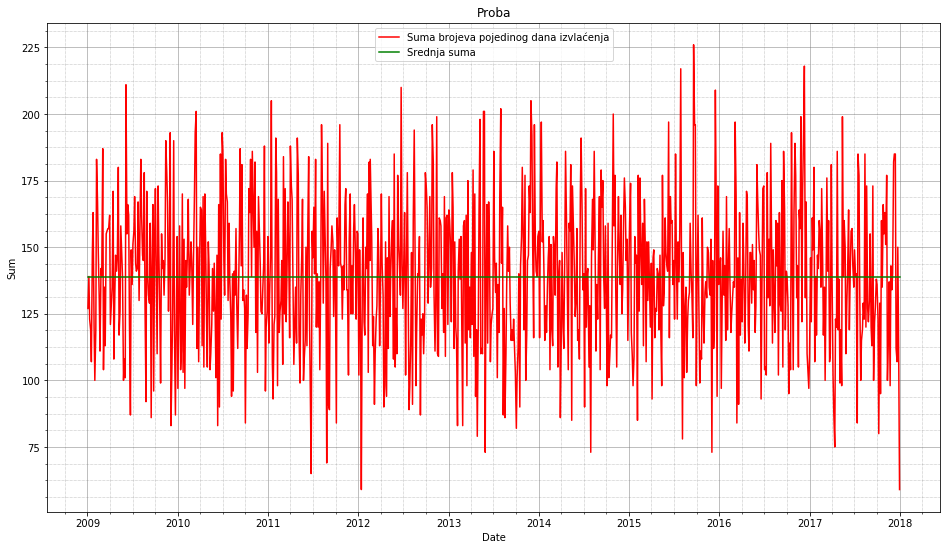

In [77]:
fig1, ax1 = plt.subplots()
ax1.set_title('Proba')
plt.xlabel('Date')
plt.ylabel('Sum')
plt.rcParams["figure.figsize"] = [16,9]
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey' )
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')

ax1.plot(loto['DATUM'], loto['SUMA'], color='r', label='Suma brojeva pojedinog dana izvlaćenja')

mid = np.full(num_of_rows, loto['SUMA'].mean() , dtype=np.int64)
ax1.plot(loto['DATUM'], mid, color='g', label='Srednja suma')

ax1.legend(loc=9)

TODO: 
- uvod koliko puta je izvucena ista suma brojeva
- kreiram listu tako da lista[0] = sum_28

In [31]:
min_sum = 1 + 2 + 3 + 4 + 5 + 6 + 7
max_sum = 39 + 38 + 37 + 36 + 35 + 34 + 33
print ('Minimalna suma je ', min_sum, ' maksimalna suma je ', max_sum)

Minimalna suma je  28  maksimalna suma je  252


In [32]:
possible_sum= np.zeros([max_sum - min_sum + 1, 2], dtype=np.int64)
#popuni prvi stupac (vrijednost sume)
for i in range (0, max_sum - min_sum + 1):
    possible_sum[i][0]=i + min_sum

In [33]:
for i in range (0, num_of_rows):
    possible_sum[loto['SUMA'][i] - min_sum][1] += 1
#possible_sum

Sortirajmo danu listu possible_sum prema broju pojavljivanja pojedine sume

In [34]:
from operator import itemgetter, attrgetter
sorted(possible_sum, key=itemgetter(1))

[array([28,  0]),
 array([29,  0]),
 array([30,  0]),
 array([31,  0]),
 array([32,  0]),
 array([33,  0]),
 array([34,  0]),
 array([35,  0]),
 array([36,  0]),
 array([37,  0]),
 array([38,  0]),
 array([39,  0]),
 array([40,  0]),
 array([41,  0]),
 array([42,  0]),
 array([43,  0]),
 array([44,  0]),
 array([45,  0]),
 array([46,  0]),
 array([47,  0]),
 array([48,  0]),
 array([49,  0]),
 array([50,  0]),
 array([51,  0]),
 array([52,  0]),
 array([53,  0]),
 array([54,  0]),
 array([55,  0]),
 array([56,  0]),
 array([57,  0]),
 array([58,  0]),
 array([60,  0]),
 array([61,  0]),
 array([62,  0]),
 array([63,  0]),
 array([64,  0]),
 array([66,  0]),
 array([67,  0]),
 array([68,  0]),
 array([70,  0]),
 array([71,  0]),
 array([72,  0]),
 array([74,  0]),
 array([76,  0]),
 array([77,  0]),
 array([81,  0]),
 array([195,   0]),
 array([203,   0]),
 array([204,   0]),
 array([206,   0]),
 array([207,   0]),
 array([208,   0]),
 array([212,   0]),
 array([213,   0]),
 array([214,

In [35]:
suma, appear = possible_sum.T
br=0
lista = []
print ('Sume koje se pojavljuju ', appear.min(), 'puta (ujedno i minimalno): ')
for i in range (0, max_sum - min_sum +1):
    if possible_sum[i][1] == appear.min():
        lista.insert (br, i + min_sum)
        br += 1
print(lista)

Sume koje se pojavljuju  0 puta (ujedno i minimalno): 
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 67, 68, 70, 71, 72, 74, 76, 77, 81, 195, 203, 204, 206, 207, 208, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252]


In [36]:
br / (max_sum - min_sum) * 100 

40.17857142857143

Uoćimo da se čak 90 od 224 suma jos nikada nisu pojavile tj 40.1786% se nikada nisu pojavile.

In [45]:
appear_max_sum=[] #potrebno kasnije 
print ('Sume koje se pojavljuju najčešće tj.', appear.max(), 'puta: ')
for i in range (0, max_sum - min_sum +1):
    if possible_sum[i][1] == appear.max():
        print (i + min_sum)
        appear_max_sum.append(i+min_sum)

Sume koje se pojavljuju najčešće tj. 17 puta: 
119
143


In [46]:
appear_max_sum

[119, 143]

#### Provjerimo je li koji niz dva puta izvučen

In [ ]:
def twice_draw (array_num_):
    #print(array_num_)
    br = 0
    suma = sum(array_num_)
    #print (suma)
    for i in range (0, num_of_rows):
        if loto['SUMA'][i] == suma:
            if loto['1BR'][i]  == array_num_[0] and loto['2BR'][i]  == array_num_[1] and loto['3BR'][i]  == array_num_[2] and loto['4BR'][i]  == array_num_[3] and loto['5BR'][i]  == array_num_[4] and loto['6BR'][i]  == array_num_[5] and loto['7BR'][i]  == array_num_[6] :
                br += 1
    #print ( 'Niz se pojavljuje', br, 'puta')
    return ( br )

In [43]:
for i in range (0, num_of_rows):
    array_num = []
    array_num.append (loto['1BR'][i])
    array_num.append (loto['2BR'][i])
    array_num.append (loto['3BR'][i])
    array_num.append (loto['4BR'][i])
    array_num.append (loto['5BR'][i])
    array_num.append (loto['6BR'][i])
    array_num.append (loto['7BR'][i])
    appear_array = twice_draw (array_num)
    if appear_array > 1 :
        print (array_num, 'se pojavljuje', appear_array, 'puta')

#### Rekurzivna funkcija za permutiranje svih mogućih izvućenih nizova brojeva uz uvjet da je suma određeni broj

In [138]:
def permutacija ( goal_sum, array, br_elem, result):
    if goal_sum < sum(array):
        return
    for i in range (1, 40):
        if br_elem > 7:
            return
        
        if br_elem == 0:
            array.append(i)
            permutacija (goal_sum, array, br_elem + 1, result)
            array.pop()
            
        elif br_elem > 0:
            if i > array[br_elem - 1]:
                array.insert( br_elem, i)
                permutacija ( goal_sum, array, br_elem + 1, result)
                array.pop()
            elif br_elem == 7 and goal_sum == sum(array):
                result.append ( array )
                print ( array )
                return

In [139]:
result= []
permutacija (35, [], 0, result)
len(result)

[1, 2, 3, 4, 5, 6, 14]
[1, 2, 3, 4, 5, 7, 13]
[1, 2, 3, 4, 5, 8, 12]
[1, 2, 3, 4, 5, 9, 11]
[1, 2, 3, 4, 6, 7, 12]
[1, 2, 3, 4, 6, 8, 11]
[1, 2, 3, 4, 6, 9, 10]
[1, 2, 3, 4, 7, 8, 10]
[1, 2, 3, 5, 6, 7, 11]
[1, 2, 3, 5, 6, 8, 10]
[1, 2, 3, 5, 7, 8, 9]
[1, 2, 4, 5, 6, 7, 10]
[1, 2, 4, 5, 6, 8, 9]
[1, 3, 4, 5, 6, 7, 9]
[2, 3, 4, 5, 6, 7, 8]


15

Koji su nizovi sa sumom jednakom sumama koje se najčešče pjavljuju

In [170]:
result = []
for i in range (0, len(appear_max_sum)):
    permutacija (appear_max_sum[i], [], 0, result)
len(result)

Pomoću rekurzije dobili smo da postoji 167238 nizova čija je suma jednaka 119. Iz predhodnih naredbi znamo da je samo N nizova za sada izvućena sa tom sumom. Što je ukupno ..%

koliko je nizova sa srednjom sumom?

In [89]:
print(loto['SUMA'].mean(), '-->', int(loto['SUMA'].mean()))

139.12140575079871 --> 139


In [87]:
mid_result = []
permutacija (int(loto['SUMA'].mean()), [], 0, mid_result)
len(mid_result)

219336

Pronađimo 7 brojeva koji se najčešče pojavljuju 
    - jesu li se kada pojavili u kombinaciji?
    - kolika je njihova samu
        - kolika se ta suma često pojavljuje?

In [155]:
appear_num_ = (sorted(draw_number, key=itemgetter(1)))[32:39]
oft_appear_num = []
for i in range (0, 7):
    oft_appear_num.append(appear_num_[i][0])
oft_appear_num = sorted (oft_appear_num)
oft_appear_num

[1, 3, 7, 22, 26, 27, 30]

In [156]:
twice_draw (oft_appear_num)

0

In [157]:
sum(oft_appear_num)

116

In [158]:
oft_appear_num_res = []
permutacija (sum(oft_appear_num), [], 0, oft_appear_num_res)
len(oft_appear_num_res) #153765

[1, 2, 3, 4, 29, 38, 39]
[1, 2, 3, 4, 30, 37, 39]
[1, 2, 3, 4, 31, 36, 39]
[1, 2, 3, 4, 31, 37, 38]
[1, 2, 3, 4, 32, 35, 39]
[1, 2, 3, 4, 32, 36, 38]
[1, 2, 3, 4, 33, 34, 39]
[1, 2, 3, 4, 33, 35, 38]
[1, 2, 3, 4, 33, 36, 37]
[1, 2, 3, 4, 34, 35, 37]
[1, 2, 3, 5, 28, 38, 39]
[1, 2, 3, 5, 29, 37, 39]
[1, 2, 3, 5, 30, 36, 39]
[1, 2, 3, 5, 30, 37, 38]
[1, 2, 3, 5, 31, 35, 39]
[1, 2, 3, 5, 31, 36, 38]
[1, 2, 3, 5, 32, 34, 39]
[1, 2, 3, 5, 32, 35, 38]
[1, 2, 3, 5, 32, 36, 37]
[1, 2, 3, 5, 33, 34, 38]
[1, 2, 3, 5, 33, 35, 37]
[1, 2, 3, 5, 34, 35, 36]
[1, 2, 3, 6, 27, 38, 39]
[1, 2, 3, 6, 28, 37, 39]
[1, 2, 3, 6, 29, 36, 39]
[1, 2, 3, 6, 29, 37, 38]
[1, 2, 3, 6, 30, 35, 39]
[1, 2, 3, 6, 30, 36, 38]
[1, 2, 3, 6, 31, 34, 39]
[1, 2, 3, 6, 31, 35, 38]
[1, 2, 3, 6, 31, 36, 37]
[1, 2, 3, 6, 32, 33, 39]
[1, 2, 3, 6, 32, 34, 38]
[1, 2, 3, 6, 32, 35, 37]
[1, 2, 3, 6, 33, 34, 37]
[1, 2, 3, 6, 33, 35, 36]
[1, 2, 3, 7, 26, 38, 39]
[1, 2, 3, 7, 27, 37, 39]
[1, 2, 3, 7, 28, 36, 39]
[1, 2, 3, 7, 28, 37, 38]


[1, 2, 4, 5, 27, 38, 39]
[1, 2, 4, 5, 28, 37, 39]
[1, 2, 4, 5, 29, 36, 39]
[1, 2, 4, 5, 29, 37, 38]
[1, 2, 4, 5, 30, 35, 39]
[1, 2, 4, 5, 30, 36, 38]
[1, 2, 4, 5, 31, 34, 39]
[1, 2, 4, 5, 31, 35, 38]
[1, 2, 4, 5, 31, 36, 37]
[1, 2, 4, 5, 32, 33, 39]
[1, 2, 4, 5, 32, 34, 38]
[1, 2, 4, 5, 32, 35, 37]
[1, 2, 4, 5, 33, 34, 37]
[1, 2, 4, 5, 33, 35, 36]
[1, 2, 4, 6, 26, 38, 39]
[1, 2, 4, 6, 27, 37, 39]
[1, 2, 4, 6, 28, 36, 39]
[1, 2, 4, 6, 28, 37, 38]
[1, 2, 4, 6, 29, 35, 39]
[1, 2, 4, 6, 29, 36, 38]
[1, 2, 4, 6, 30, 34, 39]
[1, 2, 4, 6, 30, 35, 38]
[1, 2, 4, 6, 30, 36, 37]
[1, 2, 4, 6, 31, 33, 39]
[1, 2, 4, 6, 31, 34, 38]
[1, 2, 4, 6, 31, 35, 37]
[1, 2, 4, 6, 32, 33, 38]
[1, 2, 4, 6, 32, 34, 37]
[1, 2, 4, 6, 32, 35, 36]
[1, 2, 4, 6, 33, 34, 36]
[1, 2, 4, 7, 25, 38, 39]
[1, 2, 4, 7, 26, 37, 39]
[1, 2, 4, 7, 27, 36, 39]
[1, 2, 4, 7, 27, 37, 38]
[1, 2, 4, 7, 28, 35, 39]
[1, 2, 4, 7, 28, 36, 38]
[1, 2, 4, 7, 29, 34, 39]
[1, 2, 4, 7, 29, 35, 38]
[1, 2, 4, 7, 29, 36, 37]
[1, 2, 4, 7, 30, 33, 39]


[1, 2, 5, 6, 25, 38, 39]
[1, 2, 5, 6, 26, 37, 39]
[1, 2, 5, 6, 27, 36, 39]
[1, 2, 5, 6, 27, 37, 38]
[1, 2, 5, 6, 28, 35, 39]
[1, 2, 5, 6, 28, 36, 38]
[1, 2, 5, 6, 29, 34, 39]
[1, 2, 5, 6, 29, 35, 38]
[1, 2, 5, 6, 29, 36, 37]
[1, 2, 5, 6, 30, 33, 39]
[1, 2, 5, 6, 30, 34, 38]
[1, 2, 5, 6, 30, 35, 37]
[1, 2, 5, 6, 31, 32, 39]
[1, 2, 5, 6, 31, 33, 38]
[1, 2, 5, 6, 31, 34, 37]
[1, 2, 5, 6, 31, 35, 36]
[1, 2, 5, 6, 32, 33, 37]
[1, 2, 5, 6, 32, 34, 36]
[1, 2, 5, 6, 33, 34, 35]
[1, 2, 5, 7, 24, 38, 39]
[1, 2, 5, 7, 25, 37, 39]
[1, 2, 5, 7, 26, 36, 39]
[1, 2, 5, 7, 26, 37, 38]
[1, 2, 5, 7, 27, 35, 39]
[1, 2, 5, 7, 27, 36, 38]
[1, 2, 5, 7, 28, 34, 39]
[1, 2, 5, 7, 28, 35, 38]
[1, 2, 5, 7, 28, 36, 37]
[1, 2, 5, 7, 29, 33, 39]
[1, 2, 5, 7, 29, 34, 38]
[1, 2, 5, 7, 29, 35, 37]
[1, 2, 5, 7, 30, 32, 39]
[1, 2, 5, 7, 30, 33, 38]
[1, 2, 5, 7, 30, 34, 37]
[1, 2, 5, 7, 30, 35, 36]
[1, 2, 5, 7, 31, 32, 38]
[1, 2, 5, 7, 31, 33, 37]
[1, 2, 5, 7, 31, 34, 36]
[1, 2, 5, 7, 32, 33, 36]
[1, 2, 5, 7, 32, 34, 35]


[1, 2, 5, 20, 23, 26, 39]
[1, 2, 5, 20, 23, 27, 38]
[1, 2, 5, 20, 23, 28, 37]
[1, 2, 5, 20, 23, 29, 36]
[1, 2, 5, 20, 23, 30, 35]
[1, 2, 5, 20, 23, 31, 34]
[1, 2, 5, 20, 23, 32, 33]
[1, 2, 5, 20, 24, 25, 39]
[1, 2, 5, 20, 24, 26, 38]
[1, 2, 5, 20, 24, 27, 37]
[1, 2, 5, 20, 24, 28, 36]
[1, 2, 5, 20, 24, 29, 35]
[1, 2, 5, 20, 24, 30, 34]
[1, 2, 5, 20, 24, 31, 33]
[1, 2, 5, 20, 25, 26, 37]
[1, 2, 5, 20, 25, 27, 36]
[1, 2, 5, 20, 25, 28, 35]
[1, 2, 5, 20, 25, 29, 34]
[1, 2, 5, 20, 25, 30, 33]
[1, 2, 5, 20, 25, 31, 32]
[1, 2, 5, 20, 26, 27, 35]
[1, 2, 5, 20, 26, 28, 34]
[1, 2, 5, 20, 26, 29, 33]
[1, 2, 5, 20, 26, 30, 32]
[1, 2, 5, 20, 27, 28, 33]
[1, 2, 5, 20, 27, 29, 32]
[1, 2, 5, 20, 27, 30, 31]
[1, 2, 5, 20, 28, 29, 31]
[1, 2, 5, 21, 22, 26, 39]
[1, 2, 5, 21, 22, 27, 38]
[1, 2, 5, 21, 22, 28, 37]
[1, 2, 5, 21, 22, 29, 36]
[1, 2, 5, 21, 22, 30, 35]
[1, 2, 5, 21, 22, 31, 34]
[1, 2, 5, 21, 22, 32, 33]
[1, 2, 5, 21, 23, 25, 39]
[1, 2, 5, 21, 23, 26, 38]
[1, 2, 5, 21, 23, 27, 37]
[1, 2, 5, 21

[1, 2, 6, 14, 20, 34, 39]
[1, 2, 6, 14, 20, 35, 38]
[1, 2, 6, 14, 20, 36, 37]
[1, 2, 6, 14, 21, 33, 39]
[1, 2, 6, 14, 21, 34, 38]
[1, 2, 6, 14, 21, 35, 37]
[1, 2, 6, 14, 22, 32, 39]
[1, 2, 6, 14, 22, 33, 38]
[1, 2, 6, 14, 22, 34, 37]
[1, 2, 6, 14, 22, 35, 36]
[1, 2, 6, 14, 23, 31, 39]
[1, 2, 6, 14, 23, 32, 38]
[1, 2, 6, 14, 23, 33, 37]
[1, 2, 6, 14, 23, 34, 36]
[1, 2, 6, 14, 24, 30, 39]
[1, 2, 6, 14, 24, 31, 38]
[1, 2, 6, 14, 24, 32, 37]
[1, 2, 6, 14, 24, 33, 36]
[1, 2, 6, 14, 24, 34, 35]
[1, 2, 6, 14, 25, 29, 39]
[1, 2, 6, 14, 25, 30, 38]
[1, 2, 6, 14, 25, 31, 37]
[1, 2, 6, 14, 25, 32, 36]
[1, 2, 6, 14, 25, 33, 35]
[1, 2, 6, 14, 26, 28, 39]
[1, 2, 6, 14, 26, 29, 38]
[1, 2, 6, 14, 26, 30, 37]
[1, 2, 6, 14, 26, 31, 36]
[1, 2, 6, 14, 26, 32, 35]
[1, 2, 6, 14, 26, 33, 34]
[1, 2, 6, 14, 27, 28, 38]
[1, 2, 6, 14, 27, 29, 37]
[1, 2, 6, 14, 27, 30, 36]
[1, 2, 6, 14, 27, 31, 35]
[1, 2, 6, 14, 27, 32, 34]
[1, 2, 6, 14, 28, 29, 36]
[1, 2, 6, 14, 28, 30, 35]
[1, 2, 6, 14, 28, 31, 34]
[1, 2, 6, 14

[1, 2, 7, 8, 21, 38, 39]
[1, 2, 7, 8, 22, 37, 39]
[1, 2, 7, 8, 23, 36, 39]
[1, 2, 7, 8, 23, 37, 38]
[1, 2, 7, 8, 24, 35, 39]
[1, 2, 7, 8, 24, 36, 38]
[1, 2, 7, 8, 25, 34, 39]
[1, 2, 7, 8, 25, 35, 38]
[1, 2, 7, 8, 25, 36, 37]
[1, 2, 7, 8, 26, 33, 39]
[1, 2, 7, 8, 26, 34, 38]
[1, 2, 7, 8, 26, 35, 37]
[1, 2, 7, 8, 27, 32, 39]
[1, 2, 7, 8, 27, 33, 38]
[1, 2, 7, 8, 27, 34, 37]
[1, 2, 7, 8, 27, 35, 36]
[1, 2, 7, 8, 28, 31, 39]
[1, 2, 7, 8, 28, 32, 38]
[1, 2, 7, 8, 28, 33, 37]
[1, 2, 7, 8, 28, 34, 36]
[1, 2, 7, 8, 29, 30, 39]
[1, 2, 7, 8, 29, 31, 38]
[1, 2, 7, 8, 29, 32, 37]
[1, 2, 7, 8, 29, 33, 36]
[1, 2, 7, 8, 29, 34, 35]
[1, 2, 7, 8, 30, 31, 37]
[1, 2, 7, 8, 30, 32, 36]
[1, 2, 7, 8, 30, 33, 35]
[1, 2, 7, 8, 31, 32, 35]
[1, 2, 7, 8, 31, 33, 34]
[1, 2, 7, 9, 20, 38, 39]
[1, 2, 7, 9, 21, 37, 39]
[1, 2, 7, 9, 22, 36, 39]
[1, 2, 7, 9, 22, 37, 38]
[1, 2, 7, 9, 23, 35, 39]
[1, 2, 7, 9, 23, 36, 38]
[1, 2, 7, 9, 24, 34, 39]
[1, 2, 7, 9, 24, 35, 38]
[1, 2, 7, 9, 24, 36, 37]
[1, 2, 7, 9, 25, 33, 39]


[1, 2, 7, 16, 17, 34, 39]
[1, 2, 7, 16, 17, 35, 38]
[1, 2, 7, 16, 17, 36, 37]
[1, 2, 7, 16, 18, 33, 39]
[1, 2, 7, 16, 18, 34, 38]
[1, 2, 7, 16, 18, 35, 37]
[1, 2, 7, 16, 19, 32, 39]
[1, 2, 7, 16, 19, 33, 38]
[1, 2, 7, 16, 19, 34, 37]
[1, 2, 7, 16, 19, 35, 36]
[1, 2, 7, 16, 20, 31, 39]
[1, 2, 7, 16, 20, 32, 38]
[1, 2, 7, 16, 20, 33, 37]
[1, 2, 7, 16, 20, 34, 36]
[1, 2, 7, 16, 21, 30, 39]
[1, 2, 7, 16, 21, 31, 38]
[1, 2, 7, 16, 21, 32, 37]
[1, 2, 7, 16, 21, 33, 36]
[1, 2, 7, 16, 21, 34, 35]
[1, 2, 7, 16, 22, 29, 39]
[1, 2, 7, 16, 22, 30, 38]
[1, 2, 7, 16, 22, 31, 37]
[1, 2, 7, 16, 22, 32, 36]
[1, 2, 7, 16, 22, 33, 35]
[1, 2, 7, 16, 23, 28, 39]
[1, 2, 7, 16, 23, 29, 38]
[1, 2, 7, 16, 23, 30, 37]
[1, 2, 7, 16, 23, 31, 36]
[1, 2, 7, 16, 23, 32, 35]
[1, 2, 7, 16, 23, 33, 34]
[1, 2, 7, 16, 24, 27, 39]
[1, 2, 7, 16, 24, 28, 38]
[1, 2, 7, 16, 24, 29, 37]
[1, 2, 7, 16, 24, 30, 36]
[1, 2, 7, 16, 24, 31, 35]
[1, 2, 7, 16, 24, 32, 34]
[1, 2, 7, 16, 25, 26, 39]
[1, 2, 7, 16, 25, 27, 38]
[1, 2, 7, 16

[1, 2, 8, 11, 26, 31, 37]
[1, 2, 8, 11, 26, 32, 36]
[1, 2, 8, 11, 26, 33, 35]
[1, 2, 8, 11, 27, 28, 39]
[1, 2, 8, 11, 27, 29, 38]
[1, 2, 8, 11, 27, 30, 37]
[1, 2, 8, 11, 27, 31, 36]
[1, 2, 8, 11, 27, 32, 35]
[1, 2, 8, 11, 27, 33, 34]
[1, 2, 8, 11, 28, 29, 37]
[1, 2, 8, 11, 28, 30, 36]
[1, 2, 8, 11, 28, 31, 35]
[1, 2, 8, 11, 28, 32, 34]
[1, 2, 8, 11, 29, 30, 35]
[1, 2, 8, 11, 29, 31, 34]
[1, 2, 8, 11, 29, 32, 33]
[1, 2, 8, 11, 30, 31, 33]
[1, 2, 8, 12, 16, 38, 39]
[1, 2, 8, 12, 17, 37, 39]
[1, 2, 8, 12, 18, 36, 39]
[1, 2, 8, 12, 18, 37, 38]
[1, 2, 8, 12, 19, 35, 39]
[1, 2, 8, 12, 19, 36, 38]
[1, 2, 8, 12, 20, 34, 39]
[1, 2, 8, 12, 20, 35, 38]
[1, 2, 8, 12, 20, 36, 37]
[1, 2, 8, 12, 21, 33, 39]
[1, 2, 8, 12, 21, 34, 38]
[1, 2, 8, 12, 21, 35, 37]
[1, 2, 8, 12, 22, 32, 39]
[1, 2, 8, 12, 22, 33, 38]
[1, 2, 8, 12, 22, 34, 37]
[1, 2, 8, 12, 22, 35, 36]
[1, 2, 8, 12, 23, 31, 39]
[1, 2, 8, 12, 23, 32, 38]
[1, 2, 8, 12, 23, 33, 37]
[1, 2, 8, 12, 23, 34, 36]
[1, 2, 8, 12, 24, 30, 39]
[1, 2, 8, 12

[1, 2, 8, 22, 23, 27, 33]
[1, 2, 8, 22, 23, 28, 32]
[1, 2, 8, 22, 23, 29, 31]
[1, 2, 8, 22, 24, 25, 34]
[1, 2, 8, 22, 24, 26, 33]
[1, 2, 8, 22, 24, 27, 32]
[1, 2, 8, 22, 24, 28, 31]
[1, 2, 8, 22, 24, 29, 30]
[1, 2, 8, 22, 25, 26, 32]
[1, 2, 8, 22, 25, 27, 31]
[1, 2, 8, 22, 25, 28, 30]
[1, 2, 8, 22, 26, 27, 30]
[1, 2, 8, 22, 26, 28, 29]
[1, 2, 8, 23, 24, 25, 33]
[1, 2, 8, 23, 24, 26, 32]
[1, 2, 8, 23, 24, 27, 31]
[1, 2, 8, 23, 24, 28, 30]
[1, 2, 8, 23, 25, 26, 31]
[1, 2, 8, 23, 25, 27, 30]
[1, 2, 8, 23, 25, 28, 29]
[1, 2, 8, 23, 26, 27, 29]
[1, 2, 8, 24, 25, 26, 30]
[1, 2, 8, 24, 25, 27, 29]
[1, 2, 8, 24, 26, 27, 28]
[1, 2, 9, 10, 17, 38, 39]
[1, 2, 9, 10, 18, 37, 39]
[1, 2, 9, 10, 19, 36, 39]
[1, 2, 9, 10, 19, 37, 38]
[1, 2, 9, 10, 20, 35, 39]
[1, 2, 9, 10, 20, 36, 38]
[1, 2, 9, 10, 21, 34, 39]
[1, 2, 9, 10, 21, 35, 38]
[1, 2, 9, 10, 21, 36, 37]
[1, 2, 9, 10, 22, 33, 39]
[1, 2, 9, 10, 22, 34, 38]
[1, 2, 9, 10, 22, 35, 37]
[1, 2, 9, 10, 23, 32, 39]
[1, 2, 9, 10, 23, 33, 38]
[1, 2, 9, 10

[1, 2, 10, 11, 15, 38, 39]
[1, 2, 10, 11, 16, 37, 39]
[1, 2, 10, 11, 17, 36, 39]
[1, 2, 10, 11, 17, 37, 38]
[1, 2, 10, 11, 18, 35, 39]
[1, 2, 10, 11, 18, 36, 38]
[1, 2, 10, 11, 19, 34, 39]
[1, 2, 10, 11, 19, 35, 38]
[1, 2, 10, 11, 19, 36, 37]
[1, 2, 10, 11, 20, 33, 39]
[1, 2, 10, 11, 20, 34, 38]
[1, 2, 10, 11, 20, 35, 37]
[1, 2, 10, 11, 21, 32, 39]
[1, 2, 10, 11, 21, 33, 38]
[1, 2, 10, 11, 21, 34, 37]
[1, 2, 10, 11, 21, 35, 36]
[1, 2, 10, 11, 22, 31, 39]
[1, 2, 10, 11, 22, 32, 38]
[1, 2, 10, 11, 22, 33, 37]
[1, 2, 10, 11, 22, 34, 36]
[1, 2, 10, 11, 23, 30, 39]
[1, 2, 10, 11, 23, 31, 38]
[1, 2, 10, 11, 23, 32, 37]
[1, 2, 10, 11, 23, 33, 36]
[1, 2, 10, 11, 23, 34, 35]
[1, 2, 10, 11, 24, 29, 39]
[1, 2, 10, 11, 24, 30, 38]
[1, 2, 10, 11, 24, 31, 37]
[1, 2, 10, 11, 24, 32, 36]
[1, 2, 10, 11, 24, 33, 35]
[1, 2, 10, 11, 25, 28, 39]
[1, 2, 10, 11, 25, 29, 38]
[1, 2, 10, 11, 25, 30, 37]
[1, 2, 10, 11, 25, 31, 36]
[1, 2, 10, 11, 25, 32, 35]
[1, 2, 10, 11, 25, 33, 34]
[1, 2, 10, 11, 26, 27, 39]
[

[1, 2, 10, 18, 19, 27, 39]
[1, 2, 10, 18, 19, 28, 38]
[1, 2, 10, 18, 19, 29, 37]
[1, 2, 10, 18, 19, 30, 36]
[1, 2, 10, 18, 19, 31, 35]
[1, 2, 10, 18, 19, 32, 34]
[1, 2, 10, 18, 20, 26, 39]
[1, 2, 10, 18, 20, 27, 38]
[1, 2, 10, 18, 20, 28, 37]
[1, 2, 10, 18, 20, 29, 36]
[1, 2, 10, 18, 20, 30, 35]
[1, 2, 10, 18, 20, 31, 34]
[1, 2, 10, 18, 20, 32, 33]
[1, 2, 10, 18, 21, 25, 39]
[1, 2, 10, 18, 21, 26, 38]
[1, 2, 10, 18, 21, 27, 37]
[1, 2, 10, 18, 21, 28, 36]
[1, 2, 10, 18, 21, 29, 35]
[1, 2, 10, 18, 21, 30, 34]
[1, 2, 10, 18, 21, 31, 33]
[1, 2, 10, 18, 22, 24, 39]
[1, 2, 10, 18, 22, 25, 38]
[1, 2, 10, 18, 22, 26, 37]
[1, 2, 10, 18, 22, 27, 36]
[1, 2, 10, 18, 22, 28, 35]
[1, 2, 10, 18, 22, 29, 34]
[1, 2, 10, 18, 22, 30, 33]
[1, 2, 10, 18, 22, 31, 32]
[1, 2, 10, 18, 23, 24, 38]
[1, 2, 10, 18, 23, 25, 37]
[1, 2, 10, 18, 23, 26, 36]
[1, 2, 10, 18, 23, 27, 35]
[1, 2, 10, 18, 23, 28, 34]
[1, 2, 10, 18, 23, 29, 33]
[1, 2, 10, 18, 23, 30, 32]
[1, 2, 10, 18, 24, 25, 36]
[1, 2, 10, 18, 24, 26, 35]
[

[1, 2, 12, 13, 14, 35, 39]
[1, 2, 12, 13, 14, 36, 38]
[1, 2, 12, 13, 15, 34, 39]
[1, 2, 12, 13, 15, 35, 38]
[1, 2, 12, 13, 15, 36, 37]
[1, 2, 12, 13, 16, 33, 39]
[1, 2, 12, 13, 16, 34, 38]
[1, 2, 12, 13, 16, 35, 37]
[1, 2, 12, 13, 17, 32, 39]
[1, 2, 12, 13, 17, 33, 38]
[1, 2, 12, 13, 17, 34, 37]
[1, 2, 12, 13, 17, 35, 36]
[1, 2, 12, 13, 18, 31, 39]
[1, 2, 12, 13, 18, 32, 38]
[1, 2, 12, 13, 18, 33, 37]
[1, 2, 12, 13, 18, 34, 36]
[1, 2, 12, 13, 19, 30, 39]
[1, 2, 12, 13, 19, 31, 38]
[1, 2, 12, 13, 19, 32, 37]
[1, 2, 12, 13, 19, 33, 36]
[1, 2, 12, 13, 19, 34, 35]
[1, 2, 12, 13, 20, 29, 39]
[1, 2, 12, 13, 20, 30, 38]
[1, 2, 12, 13, 20, 31, 37]
[1, 2, 12, 13, 20, 32, 36]
[1, 2, 12, 13, 20, 33, 35]
[1, 2, 12, 13, 21, 28, 39]
[1, 2, 12, 13, 21, 29, 38]
[1, 2, 12, 13, 21, 30, 37]
[1, 2, 12, 13, 21, 31, 36]
[1, 2, 12, 13, 21, 32, 35]
[1, 2, 12, 13, 21, 33, 34]
[1, 2, 12, 13, 22, 27, 39]
[1, 2, 12, 13, 22, 28, 38]
[1, 2, 12, 13, 22, 29, 37]
[1, 2, 12, 13, 22, 30, 36]
[1, 2, 12, 13, 22, 31, 35]
[

[1, 2, 13, 16, 17, 28, 39]
[1, 2, 13, 16, 17, 29, 38]
[1, 2, 13, 16, 17, 30, 37]
[1, 2, 13, 16, 17, 31, 36]
[1, 2, 13, 16, 17, 32, 35]
[1, 2, 13, 16, 17, 33, 34]
[1, 2, 13, 16, 18, 27, 39]
[1, 2, 13, 16, 18, 28, 38]
[1, 2, 13, 16, 18, 29, 37]
[1, 2, 13, 16, 18, 30, 36]
[1, 2, 13, 16, 18, 31, 35]
[1, 2, 13, 16, 18, 32, 34]
[1, 2, 13, 16, 19, 26, 39]
[1, 2, 13, 16, 19, 27, 38]
[1, 2, 13, 16, 19, 28, 37]
[1, 2, 13, 16, 19, 29, 36]
[1, 2, 13, 16, 19, 30, 35]
[1, 2, 13, 16, 19, 31, 34]
[1, 2, 13, 16, 19, 32, 33]
[1, 2, 13, 16, 20, 25, 39]
[1, 2, 13, 16, 20, 26, 38]
[1, 2, 13, 16, 20, 27, 37]
[1, 2, 13, 16, 20, 28, 36]
[1, 2, 13, 16, 20, 29, 35]
[1, 2, 13, 16, 20, 30, 34]
[1, 2, 13, 16, 20, 31, 33]
[1, 2, 13, 16, 21, 24, 39]
[1, 2, 13, 16, 21, 25, 38]
[1, 2, 13, 16, 21, 26, 37]
[1, 2, 13, 16, 21, 27, 36]
[1, 2, 13, 16, 21, 28, 35]
[1, 2, 13, 16, 21, 29, 34]
[1, 2, 13, 16, 21, 30, 33]
[1, 2, 13, 16, 21, 31, 32]
[1, 2, 13, 16, 22, 23, 39]
[1, 2, 13, 16, 22, 24, 38]
[1, 2, 13, 16, 22, 25, 37]
[

[1, 2, 15, 16, 17, 26, 39]
[1, 2, 15, 16, 17, 27, 38]
[1, 2, 15, 16, 17, 28, 37]
[1, 2, 15, 16, 17, 29, 36]
[1, 2, 15, 16, 17, 30, 35]
[1, 2, 15, 16, 17, 31, 34]
[1, 2, 15, 16, 17, 32, 33]
[1, 2, 15, 16, 18, 25, 39]
[1, 2, 15, 16, 18, 26, 38]
[1, 2, 15, 16, 18, 27, 37]
[1, 2, 15, 16, 18, 28, 36]
[1, 2, 15, 16, 18, 29, 35]
[1, 2, 15, 16, 18, 30, 34]
[1, 2, 15, 16, 18, 31, 33]
[1, 2, 15, 16, 19, 24, 39]
[1, 2, 15, 16, 19, 25, 38]
[1, 2, 15, 16, 19, 26, 37]
[1, 2, 15, 16, 19, 27, 36]
[1, 2, 15, 16, 19, 28, 35]
[1, 2, 15, 16, 19, 29, 34]
[1, 2, 15, 16, 19, 30, 33]
[1, 2, 15, 16, 19, 31, 32]
[1, 2, 15, 16, 20, 23, 39]
[1, 2, 15, 16, 20, 24, 38]
[1, 2, 15, 16, 20, 25, 37]
[1, 2, 15, 16, 20, 26, 36]
[1, 2, 15, 16, 20, 27, 35]
[1, 2, 15, 16, 20, 28, 34]
[1, 2, 15, 16, 20, 29, 33]
[1, 2, 15, 16, 20, 30, 32]
[1, 2, 15, 16, 21, 22, 39]
[1, 2, 15, 16, 21, 23, 38]
[1, 2, 15, 16, 21, 24, 37]
[1, 2, 15, 16, 21, 25, 36]
[1, 2, 15, 16, 21, 26, 35]
[1, 2, 15, 16, 21, 27, 34]
[1, 2, 15, 16, 21, 28, 33]
[

[1, 2, 20, 21, 22, 23, 27]
[1, 2, 20, 21, 22, 24, 26]
[1, 2, 20, 21, 23, 24, 25]
[1, 3, 4, 5, 26, 38, 39]
[1, 3, 4, 5, 27, 37, 39]
[1, 3, 4, 5, 28, 36, 39]
[1, 3, 4, 5, 28, 37, 38]
[1, 3, 4, 5, 29, 35, 39]
[1, 3, 4, 5, 29, 36, 38]
[1, 3, 4, 5, 30, 34, 39]
[1, 3, 4, 5, 30, 35, 38]
[1, 3, 4, 5, 30, 36, 37]
[1, 3, 4, 5, 31, 33, 39]
[1, 3, 4, 5, 31, 34, 38]
[1, 3, 4, 5, 31, 35, 37]
[1, 3, 4, 5, 32, 33, 38]
[1, 3, 4, 5, 32, 34, 37]
[1, 3, 4, 5, 32, 35, 36]
[1, 3, 4, 5, 33, 34, 36]
[1, 3, 4, 6, 25, 38, 39]
[1, 3, 4, 6, 26, 37, 39]
[1, 3, 4, 6, 27, 36, 39]
[1, 3, 4, 6, 27, 37, 38]
[1, 3, 4, 6, 28, 35, 39]
[1, 3, 4, 6, 28, 36, 38]
[1, 3, 4, 6, 29, 34, 39]
[1, 3, 4, 6, 29, 35, 38]
[1, 3, 4, 6, 29, 36, 37]
[1, 3, 4, 6, 30, 33, 39]
[1, 3, 4, 6, 30, 34, 38]
[1, 3, 4, 6, 30, 35, 37]
[1, 3, 4, 6, 31, 32, 39]
[1, 3, 4, 6, 31, 33, 38]
[1, 3, 4, 6, 31, 34, 37]
[1, 3, 4, 6, 31, 35, 36]
[1, 3, 4, 6, 32, 33, 37]
[1, 3, 4, 6, 32, 34, 36]
[1, 3, 4, 6, 33, 34, 35]
[1, 3, 4, 7, 24, 38, 39]
[1, 3, 4, 7, 25, 37

[1, 3, 4, 25, 26, 28, 29]
[1, 3, 5, 6, 24, 38, 39]
[1, 3, 5, 6, 25, 37, 39]
[1, 3, 5, 6, 26, 36, 39]
[1, 3, 5, 6, 26, 37, 38]
[1, 3, 5, 6, 27, 35, 39]
[1, 3, 5, 6, 27, 36, 38]
[1, 3, 5, 6, 28, 34, 39]
[1, 3, 5, 6, 28, 35, 38]
[1, 3, 5, 6, 28, 36, 37]
[1, 3, 5, 6, 29, 33, 39]
[1, 3, 5, 6, 29, 34, 38]
[1, 3, 5, 6, 29, 35, 37]
[1, 3, 5, 6, 30, 32, 39]
[1, 3, 5, 6, 30, 33, 38]
[1, 3, 5, 6, 30, 34, 37]
[1, 3, 5, 6, 30, 35, 36]
[1, 3, 5, 6, 31, 32, 38]
[1, 3, 5, 6, 31, 33, 37]
[1, 3, 5, 6, 31, 34, 36]
[1, 3, 5, 6, 32, 33, 36]
[1, 3, 5, 6, 32, 34, 35]
[1, 3, 5, 7, 23, 38, 39]
[1, 3, 5, 7, 24, 37, 39]
[1, 3, 5, 7, 25, 36, 39]
[1, 3, 5, 7, 25, 37, 38]
[1, 3, 5, 7, 26, 35, 39]
[1, 3, 5, 7, 26, 36, 38]
[1, 3, 5, 7, 27, 34, 39]
[1, 3, 5, 7, 27, 35, 38]
[1, 3, 5, 7, 27, 36, 37]
[1, 3, 5, 7, 28, 33, 39]
[1, 3, 5, 7, 28, 34, 38]
[1, 3, 5, 7, 28, 35, 37]
[1, 3, 5, 7, 29, 32, 39]
[1, 3, 5, 7, 29, 33, 38]
[1, 3, 5, 7, 29, 34, 37]
[1, 3, 5, 7, 29, 35, 36]
[1, 3, 5, 7, 30, 31, 39]
[1, 3, 5, 7, 30, 32, 38]

[1, 3, 6, 7, 22, 38, 39]
[1, 3, 6, 7, 23, 37, 39]
[1, 3, 6, 7, 24, 36, 39]
[1, 3, 6, 7, 24, 37, 38]
[1, 3, 6, 7, 25, 35, 39]
[1, 3, 6, 7, 25, 36, 38]
[1, 3, 6, 7, 26, 34, 39]
[1, 3, 6, 7, 26, 35, 38]
[1, 3, 6, 7, 26, 36, 37]
[1, 3, 6, 7, 27, 33, 39]
[1, 3, 6, 7, 27, 34, 38]
[1, 3, 6, 7, 27, 35, 37]
[1, 3, 6, 7, 28, 32, 39]
[1, 3, 6, 7, 28, 33, 38]
[1, 3, 6, 7, 28, 34, 37]
[1, 3, 6, 7, 28, 35, 36]
[1, 3, 6, 7, 29, 31, 39]
[1, 3, 6, 7, 29, 32, 38]
[1, 3, 6, 7, 29, 33, 37]
[1, 3, 6, 7, 29, 34, 36]
[1, 3, 6, 7, 30, 31, 38]
[1, 3, 6, 7, 30, 32, 37]
[1, 3, 6, 7, 30, 33, 36]
[1, 3, 6, 7, 30, 34, 35]
[1, 3, 6, 7, 31, 32, 36]
[1, 3, 6, 7, 31, 33, 35]
[1, 3, 6, 7, 32, 33, 34]
[1, 3, 6, 8, 21, 38, 39]
[1, 3, 6, 8, 22, 37, 39]
[1, 3, 6, 8, 23, 36, 39]
[1, 3, 6, 8, 23, 37, 38]
[1, 3, 6, 8, 24, 35, 39]
[1, 3, 6, 8, 24, 36, 38]
[1, 3, 6, 8, 25, 34, 39]
[1, 3, 6, 8, 25, 35, 38]
[1, 3, 6, 8, 25, 36, 37]
[1, 3, 6, 8, 26, 33, 39]
[1, 3, 6, 8, 26, 34, 38]
[1, 3, 6, 8, 26, 35, 37]
[1, 3, 6, 8, 27, 32, 39]


[1, 3, 7, 8, 20, 38, 39]
[1, 3, 7, 8, 21, 37, 39]
[1, 3, 7, 8, 22, 36, 39]
[1, 3, 7, 8, 22, 37, 38]
[1, 3, 7, 8, 23, 35, 39]
[1, 3, 7, 8, 23, 36, 38]
[1, 3, 7, 8, 24, 34, 39]
[1, 3, 7, 8, 24, 35, 38]
[1, 3, 7, 8, 24, 36, 37]
[1, 3, 7, 8, 25, 33, 39]
[1, 3, 7, 8, 25, 34, 38]
[1, 3, 7, 8, 25, 35, 37]
[1, 3, 7, 8, 26, 32, 39]
[1, 3, 7, 8, 26, 33, 38]
[1, 3, 7, 8, 26, 34, 37]
[1, 3, 7, 8, 26, 35, 36]
[1, 3, 7, 8, 27, 31, 39]
[1, 3, 7, 8, 27, 32, 38]
[1, 3, 7, 8, 27, 33, 37]
[1, 3, 7, 8, 27, 34, 36]
[1, 3, 7, 8, 28, 30, 39]
[1, 3, 7, 8, 28, 31, 38]
[1, 3, 7, 8, 28, 32, 37]
[1, 3, 7, 8, 28, 33, 36]
[1, 3, 7, 8, 28, 34, 35]
[1, 3, 7, 8, 29, 30, 38]
[1, 3, 7, 8, 29, 31, 37]
[1, 3, 7, 8, 29, 32, 36]
[1, 3, 7, 8, 29, 33, 35]
[1, 3, 7, 8, 30, 31, 36]
[1, 3, 7, 8, 30, 32, 35]
[1, 3, 7, 8, 30, 33, 34]
[1, 3, 7, 8, 31, 32, 34]
[1, 3, 7, 9, 19, 38, 39]
[1, 3, 7, 9, 20, 37, 39]
[1, 3, 7, 9, 21, 36, 39]
[1, 3, 7, 9, 21, 37, 38]
[1, 3, 7, 9, 22, 35, 39]
[1, 3, 7, 9, 22, 36, 38]
[1, 3, 7, 9, 23, 34, 39]


[1, 3, 7, 18, 19, 29, 39]
[1, 3, 7, 18, 19, 30, 38]
[1, 3, 7, 18, 19, 31, 37]
[1, 3, 7, 18, 19, 32, 36]
[1, 3, 7, 18, 19, 33, 35]
[1, 3, 7, 18, 20, 28, 39]
[1, 3, 7, 18, 20, 29, 38]
[1, 3, 7, 18, 20, 30, 37]
[1, 3, 7, 18, 20, 31, 36]
[1, 3, 7, 18, 20, 32, 35]
[1, 3, 7, 18, 20, 33, 34]
[1, 3, 7, 18, 21, 27, 39]
[1, 3, 7, 18, 21, 28, 38]
[1, 3, 7, 18, 21, 29, 37]
[1, 3, 7, 18, 21, 30, 36]
[1, 3, 7, 18, 21, 31, 35]
[1, 3, 7, 18, 21, 32, 34]
[1, 3, 7, 18, 22, 26, 39]
[1, 3, 7, 18, 22, 27, 38]
[1, 3, 7, 18, 22, 28, 37]
[1, 3, 7, 18, 22, 29, 36]
[1, 3, 7, 18, 22, 30, 35]
[1, 3, 7, 18, 22, 31, 34]
[1, 3, 7, 18, 22, 32, 33]
[1, 3, 7, 18, 23, 25, 39]
[1, 3, 7, 18, 23, 26, 38]
[1, 3, 7, 18, 23, 27, 37]
[1, 3, 7, 18, 23, 28, 36]
[1, 3, 7, 18, 23, 29, 35]
[1, 3, 7, 18, 23, 30, 34]
[1, 3, 7, 18, 23, 31, 33]
[1, 3, 7, 18, 24, 25, 38]
[1, 3, 7, 18, 24, 26, 37]
[1, 3, 7, 18, 24, 27, 36]
[1, 3, 7, 18, 24, 28, 35]
[1, 3, 7, 18, 24, 29, 34]
[1, 3, 7, 18, 24, 30, 33]
[1, 3, 7, 18, 24, 31, 32]
[1, 3, 7, 18

[1, 3, 8, 13, 15, 37, 39]
[1, 3, 8, 13, 16, 36, 39]
[1, 3, 8, 13, 16, 37, 38]
[1, 3, 8, 13, 17, 35, 39]
[1, 3, 8, 13, 17, 36, 38]
[1, 3, 8, 13, 18, 34, 39]
[1, 3, 8, 13, 18, 35, 38]
[1, 3, 8, 13, 18, 36, 37]
[1, 3, 8, 13, 19, 33, 39]
[1, 3, 8, 13, 19, 34, 38]
[1, 3, 8, 13, 19, 35, 37]
[1, 3, 8, 13, 20, 32, 39]
[1, 3, 8, 13, 20, 33, 38]
[1, 3, 8, 13, 20, 34, 37]
[1, 3, 8, 13, 20, 35, 36]
[1, 3, 8, 13, 21, 31, 39]
[1, 3, 8, 13, 21, 32, 38]
[1, 3, 8, 13, 21, 33, 37]
[1, 3, 8, 13, 21, 34, 36]
[1, 3, 8, 13, 22, 30, 39]
[1, 3, 8, 13, 22, 31, 38]
[1, 3, 8, 13, 22, 32, 37]
[1, 3, 8, 13, 22, 33, 36]
[1, 3, 8, 13, 22, 34, 35]
[1, 3, 8, 13, 23, 29, 39]
[1, 3, 8, 13, 23, 30, 38]
[1, 3, 8, 13, 23, 31, 37]
[1, 3, 8, 13, 23, 32, 36]
[1, 3, 8, 13, 23, 33, 35]
[1, 3, 8, 13, 24, 28, 39]
[1, 3, 8, 13, 24, 29, 38]
[1, 3, 8, 13, 24, 30, 37]
[1, 3, 8, 13, 24, 31, 36]
[1, 3, 8, 13, 24, 32, 35]
[1, 3, 8, 13, 24, 33, 34]
[1, 3, 8, 13, 25, 27, 39]
[1, 3, 8, 13, 25, 28, 38]
[1, 3, 8, 13, 25, 29, 37]
[1, 3, 8, 13

[1, 3, 9, 10, 20, 34, 39]
[1, 3, 9, 10, 20, 35, 38]
[1, 3, 9, 10, 20, 36, 37]
[1, 3, 9, 10, 21, 33, 39]
[1, 3, 9, 10, 21, 34, 38]
[1, 3, 9, 10, 21, 35, 37]
[1, 3, 9, 10, 22, 32, 39]
[1, 3, 9, 10, 22, 33, 38]
[1, 3, 9, 10, 22, 34, 37]
[1, 3, 9, 10, 22, 35, 36]
[1, 3, 9, 10, 23, 31, 39]
[1, 3, 9, 10, 23, 32, 38]
[1, 3, 9, 10, 23, 33, 37]
[1, 3, 9, 10, 23, 34, 36]
[1, 3, 9, 10, 24, 30, 39]
[1, 3, 9, 10, 24, 31, 38]
[1, 3, 9, 10, 24, 32, 37]
[1, 3, 9, 10, 24, 33, 36]
[1, 3, 9, 10, 24, 34, 35]
[1, 3, 9, 10, 25, 29, 39]
[1, 3, 9, 10, 25, 30, 38]
[1, 3, 9, 10, 25, 31, 37]
[1, 3, 9, 10, 25, 32, 36]
[1, 3, 9, 10, 25, 33, 35]
[1, 3, 9, 10, 26, 28, 39]
[1, 3, 9, 10, 26, 29, 38]
[1, 3, 9, 10, 26, 30, 37]
[1, 3, 9, 10, 26, 31, 36]
[1, 3, 9, 10, 26, 32, 35]
[1, 3, 9, 10, 26, 33, 34]
[1, 3, 9, 10, 27, 28, 38]
[1, 3, 9, 10, 27, 29, 37]
[1, 3, 9, 10, 27, 30, 36]
[1, 3, 9, 10, 27, 31, 35]
[1, 3, 9, 10, 27, 32, 34]
[1, 3, 9, 10, 28, 29, 36]
[1, 3, 9, 10, 28, 30, 35]
[1, 3, 9, 10, 28, 31, 34]
[1, 3, 9, 10

[1, 3, 9, 17, 18, 29, 39]
[1, 3, 9, 17, 18, 30, 38]
[1, 3, 9, 17, 18, 31, 37]
[1, 3, 9, 17, 18, 32, 36]
[1, 3, 9, 17, 18, 33, 35]
[1, 3, 9, 17, 19, 28, 39]
[1, 3, 9, 17, 19, 29, 38]
[1, 3, 9, 17, 19, 30, 37]
[1, 3, 9, 17, 19, 31, 36]
[1, 3, 9, 17, 19, 32, 35]
[1, 3, 9, 17, 19, 33, 34]
[1, 3, 9, 17, 20, 27, 39]
[1, 3, 9, 17, 20, 28, 38]
[1, 3, 9, 17, 20, 29, 37]
[1, 3, 9, 17, 20, 30, 36]
[1, 3, 9, 17, 20, 31, 35]
[1, 3, 9, 17, 20, 32, 34]
[1, 3, 9, 17, 21, 26, 39]
[1, 3, 9, 17, 21, 27, 38]
[1, 3, 9, 17, 21, 28, 37]
[1, 3, 9, 17, 21, 29, 36]
[1, 3, 9, 17, 21, 30, 35]
[1, 3, 9, 17, 21, 31, 34]
[1, 3, 9, 17, 21, 32, 33]
[1, 3, 9, 17, 22, 25, 39]
[1, 3, 9, 17, 22, 26, 38]
[1, 3, 9, 17, 22, 27, 37]
[1, 3, 9, 17, 22, 28, 36]
[1, 3, 9, 17, 22, 29, 35]
[1, 3, 9, 17, 22, 30, 34]
[1, 3, 9, 17, 22, 31, 33]
[1, 3, 9, 17, 23, 24, 39]
[1, 3, 9, 17, 23, 25, 38]
[1, 3, 9, 17, 23, 26, 37]
[1, 3, 9, 17, 23, 27, 36]
[1, 3, 9, 17, 23, 28, 35]
[1, 3, 9, 17, 23, 29, 34]
[1, 3, 9, 17, 23, 30, 33]
[1, 3, 9, 17

[1, 3, 10, 13, 15, 35, 39]
[1, 3, 10, 13, 15, 36, 38]
[1, 3, 10, 13, 16, 34, 39]
[1, 3, 10, 13, 16, 35, 38]
[1, 3, 10, 13, 16, 36, 37]
[1, 3, 10, 13, 17, 33, 39]
[1, 3, 10, 13, 17, 34, 38]
[1, 3, 10, 13, 17, 35, 37]
[1, 3, 10, 13, 18, 32, 39]
[1, 3, 10, 13, 18, 33, 38]
[1, 3, 10, 13, 18, 34, 37]
[1, 3, 10, 13, 18, 35, 36]
[1, 3, 10, 13, 19, 31, 39]
[1, 3, 10, 13, 19, 32, 38]
[1, 3, 10, 13, 19, 33, 37]
[1, 3, 10, 13, 19, 34, 36]
[1, 3, 10, 13, 20, 30, 39]
[1, 3, 10, 13, 20, 31, 38]
[1, 3, 10, 13, 20, 32, 37]
[1, 3, 10, 13, 20, 33, 36]
[1, 3, 10, 13, 20, 34, 35]
[1, 3, 10, 13, 21, 29, 39]
[1, 3, 10, 13, 21, 30, 38]
[1, 3, 10, 13, 21, 31, 37]
[1, 3, 10, 13, 21, 32, 36]
[1, 3, 10, 13, 21, 33, 35]
[1, 3, 10, 13, 22, 28, 39]
[1, 3, 10, 13, 22, 29, 38]
[1, 3, 10, 13, 22, 30, 37]
[1, 3, 10, 13, 22, 31, 36]
[1, 3, 10, 13, 22, 32, 35]
[1, 3, 10, 13, 22, 33, 34]
[1, 3, 10, 13, 23, 27, 39]
[1, 3, 10, 13, 23, 28, 38]
[1, 3, 10, 13, 23, 29, 37]
[1, 3, 10, 13, 23, 30, 36]
[1, 3, 10, 13, 23, 31, 35]
[

[1, 3, 11, 14, 22, 26, 39]
[1, 3, 11, 14, 22, 27, 38]
[1, 3, 11, 14, 22, 28, 37]
[1, 3, 11, 14, 22, 29, 36]
[1, 3, 11, 14, 22, 30, 35]
[1, 3, 11, 14, 22, 31, 34]
[1, 3, 11, 14, 22, 32, 33]
[1, 3, 11, 14, 23, 25, 39]
[1, 3, 11, 14, 23, 26, 38]
[1, 3, 11, 14, 23, 27, 37]
[1, 3, 11, 14, 23, 28, 36]
[1, 3, 11, 14, 23, 29, 35]
[1, 3, 11, 14, 23, 30, 34]
[1, 3, 11, 14, 23, 31, 33]
[1, 3, 11, 14, 24, 25, 38]
[1, 3, 11, 14, 24, 26, 37]
[1, 3, 11, 14, 24, 27, 36]
[1, 3, 11, 14, 24, 28, 35]
[1, 3, 11, 14, 24, 29, 34]
[1, 3, 11, 14, 24, 30, 33]
[1, 3, 11, 14, 24, 31, 32]
[1, 3, 11, 14, 25, 26, 36]
[1, 3, 11, 14, 25, 27, 35]
[1, 3, 11, 14, 25, 28, 34]
[1, 3, 11, 14, 25, 29, 33]
[1, 3, 11, 14, 25, 30, 32]
[1, 3, 11, 14, 26, 27, 34]
[1, 3, 11, 14, 26, 28, 33]
[1, 3, 11, 14, 26, 29, 32]
[1, 3, 11, 14, 26, 30, 31]
[1, 3, 11, 14, 27, 28, 32]
[1, 3, 11, 14, 27, 29, 31]
[1, 3, 11, 14, 28, 29, 30]
[1, 3, 11, 15, 16, 31, 39]
[1, 3, 11, 15, 16, 32, 38]
[1, 3, 11, 15, 16, 33, 37]
[1, 3, 11, 15, 16, 34, 36]
[

[1, 3, 12, 13, 16, 32, 39]
[1, 3, 12, 13, 16, 33, 38]
[1, 3, 12, 13, 16, 34, 37]
[1, 3, 12, 13, 16, 35, 36]
[1, 3, 12, 13, 17, 31, 39]
[1, 3, 12, 13, 17, 32, 38]
[1, 3, 12, 13, 17, 33, 37]
[1, 3, 12, 13, 17, 34, 36]
[1, 3, 12, 13, 18, 30, 39]
[1, 3, 12, 13, 18, 31, 38]
[1, 3, 12, 13, 18, 32, 37]
[1, 3, 12, 13, 18, 33, 36]
[1, 3, 12, 13, 18, 34, 35]
[1, 3, 12, 13, 19, 29, 39]
[1, 3, 12, 13, 19, 30, 38]
[1, 3, 12, 13, 19, 31, 37]
[1, 3, 12, 13, 19, 32, 36]
[1, 3, 12, 13, 19, 33, 35]
[1, 3, 12, 13, 20, 28, 39]
[1, 3, 12, 13, 20, 29, 38]
[1, 3, 12, 13, 20, 30, 37]
[1, 3, 12, 13, 20, 31, 36]
[1, 3, 12, 13, 20, 32, 35]
[1, 3, 12, 13, 20, 33, 34]
[1, 3, 12, 13, 21, 27, 39]
[1, 3, 12, 13, 21, 28, 38]
[1, 3, 12, 13, 21, 29, 37]
[1, 3, 12, 13, 21, 30, 36]
[1, 3, 12, 13, 21, 31, 35]
[1, 3, 12, 13, 21, 32, 34]
[1, 3, 12, 13, 22, 26, 39]
[1, 3, 12, 13, 22, 27, 38]
[1, 3, 12, 13, 22, 28, 37]
[1, 3, 12, 13, 22, 29, 36]
[1, 3, 12, 13, 22, 30, 35]
[1, 3, 12, 13, 22, 31, 34]
[1, 3, 12, 13, 22, 32, 33]
[

[1, 3, 13, 14, 15, 31, 39]
[1, 3, 13, 14, 15, 32, 38]
[1, 3, 13, 14, 15, 33, 37]
[1, 3, 13, 14, 15, 34, 36]
[1, 3, 13, 14, 16, 30, 39]
[1, 3, 13, 14, 16, 31, 38]
[1, 3, 13, 14, 16, 32, 37]
[1, 3, 13, 14, 16, 33, 36]
[1, 3, 13, 14, 16, 34, 35]
[1, 3, 13, 14, 17, 29, 39]
[1, 3, 13, 14, 17, 30, 38]
[1, 3, 13, 14, 17, 31, 37]
[1, 3, 13, 14, 17, 32, 36]
[1, 3, 13, 14, 17, 33, 35]
[1, 3, 13, 14, 18, 28, 39]
[1, 3, 13, 14, 18, 29, 38]
[1, 3, 13, 14, 18, 30, 37]
[1, 3, 13, 14, 18, 31, 36]
[1, 3, 13, 14, 18, 32, 35]
[1, 3, 13, 14, 18, 33, 34]
[1, 3, 13, 14, 19, 27, 39]
[1, 3, 13, 14, 19, 28, 38]
[1, 3, 13, 14, 19, 29, 37]
[1, 3, 13, 14, 19, 30, 36]
[1, 3, 13, 14, 19, 31, 35]
[1, 3, 13, 14, 19, 32, 34]
[1, 3, 13, 14, 20, 26, 39]
[1, 3, 13, 14, 20, 27, 38]
[1, 3, 13, 14, 20, 28, 37]
[1, 3, 13, 14, 20, 29, 36]
[1, 3, 13, 14, 20, 30, 35]
[1, 3, 13, 14, 20, 31, 34]
[1, 3, 13, 14, 20, 32, 33]
[1, 3, 13, 14, 21, 25, 39]
[1, 3, 13, 14, 21, 26, 38]
[1, 3, 13, 14, 21, 27, 37]
[1, 3, 13, 14, 21, 28, 36]
[

[1, 3, 15, 16, 17, 25, 39]
[1, 3, 15, 16, 17, 26, 38]
[1, 3, 15, 16, 17, 27, 37]
[1, 3, 15, 16, 17, 28, 36]
[1, 3, 15, 16, 17, 29, 35]
[1, 3, 15, 16, 17, 30, 34]
[1, 3, 15, 16, 17, 31, 33]
[1, 3, 15, 16, 18, 24, 39]
[1, 3, 15, 16, 18, 25, 38]
[1, 3, 15, 16, 18, 26, 37]
[1, 3, 15, 16, 18, 27, 36]
[1, 3, 15, 16, 18, 28, 35]
[1, 3, 15, 16, 18, 29, 34]
[1, 3, 15, 16, 18, 30, 33]
[1, 3, 15, 16, 18, 31, 32]
[1, 3, 15, 16, 19, 23, 39]
[1, 3, 15, 16, 19, 24, 38]
[1, 3, 15, 16, 19, 25, 37]
[1, 3, 15, 16, 19, 26, 36]
[1, 3, 15, 16, 19, 27, 35]
[1, 3, 15, 16, 19, 28, 34]
[1, 3, 15, 16, 19, 29, 33]
[1, 3, 15, 16, 19, 30, 32]
[1, 3, 15, 16, 20, 22, 39]
[1, 3, 15, 16, 20, 23, 38]
[1, 3, 15, 16, 20, 24, 37]
[1, 3, 15, 16, 20, 25, 36]
[1, 3, 15, 16, 20, 26, 35]
[1, 3, 15, 16, 20, 27, 34]
[1, 3, 15, 16, 20, 28, 33]
[1, 3, 15, 16, 20, 29, 32]
[1, 3, 15, 16, 20, 30, 31]
[1, 3, 15, 16, 21, 22, 38]
[1, 3, 15, 16, 21, 23, 37]
[1, 3, 15, 16, 21, 24, 36]
[1, 3, 15, 16, 21, 25, 35]
[1, 3, 15, 16, 21, 26, 34]
[

[1, 3, 19, 20, 21, 22, 30]
[1, 3, 19, 20, 21, 23, 29]
[1, 3, 19, 20, 21, 24, 28]
[1, 3, 19, 20, 21, 25, 27]
[1, 3, 19, 20, 22, 23, 28]
[1, 3, 19, 20, 22, 24, 27]
[1, 3, 19, 20, 22, 25, 26]
[1, 3, 19, 20, 23, 24, 26]
[1, 3, 19, 21, 22, 23, 27]
[1, 3, 19, 21, 22, 24, 26]
[1, 3, 19, 21, 23, 24, 25]
[1, 3, 20, 21, 22, 23, 26]
[1, 3, 20, 21, 22, 24, 25]
[1, 4, 5, 6, 23, 38, 39]
[1, 4, 5, 6, 24, 37, 39]
[1, 4, 5, 6, 25, 36, 39]
[1, 4, 5, 6, 25, 37, 38]
[1, 4, 5, 6, 26, 35, 39]
[1, 4, 5, 6, 26, 36, 38]
[1, 4, 5, 6, 27, 34, 39]
[1, 4, 5, 6, 27, 35, 38]
[1, 4, 5, 6, 27, 36, 37]
[1, 4, 5, 6, 28, 33, 39]
[1, 4, 5, 6, 28, 34, 38]
[1, 4, 5, 6, 28, 35, 37]
[1, 4, 5, 6, 29, 32, 39]
[1, 4, 5, 6, 29, 33, 38]
[1, 4, 5, 6, 29, 34, 37]
[1, 4, 5, 6, 29, 35, 36]
[1, 4, 5, 6, 30, 31, 39]
[1, 4, 5, 6, 30, 32, 38]
[1, 4, 5, 6, 30, 33, 37]
[1, 4, 5, 6, 30, 34, 36]
[1, 4, 5, 6, 31, 32, 37]
[1, 4, 5, 6, 31, 33, 36]
[1, 4, 5, 6, 31, 34, 35]
[1, 4, 5, 6, 32, 33, 35]
[1, 4, 5, 7, 22, 38, 39]
[1, 4, 5, 7, 23, 37, 39]

[1, 4, 5, 16, 18, 33, 39]
[1, 4, 5, 16, 18, 34, 38]
[1, 4, 5, 16, 18, 35, 37]
[1, 4, 5, 16, 19, 32, 39]
[1, 4, 5, 16, 19, 33, 38]
[1, 4, 5, 16, 19, 34, 37]
[1, 4, 5, 16, 19, 35, 36]
[1, 4, 5, 16, 20, 31, 39]
[1, 4, 5, 16, 20, 32, 38]
[1, 4, 5, 16, 20, 33, 37]
[1, 4, 5, 16, 20, 34, 36]
[1, 4, 5, 16, 21, 30, 39]
[1, 4, 5, 16, 21, 31, 38]
[1, 4, 5, 16, 21, 32, 37]
[1, 4, 5, 16, 21, 33, 36]
[1, 4, 5, 16, 21, 34, 35]
[1, 4, 5, 16, 22, 29, 39]
[1, 4, 5, 16, 22, 30, 38]
[1, 4, 5, 16, 22, 31, 37]
[1, 4, 5, 16, 22, 32, 36]
[1, 4, 5, 16, 22, 33, 35]
[1, 4, 5, 16, 23, 28, 39]
[1, 4, 5, 16, 23, 29, 38]
[1, 4, 5, 16, 23, 30, 37]
[1, 4, 5, 16, 23, 31, 36]
[1, 4, 5, 16, 23, 32, 35]
[1, 4, 5, 16, 23, 33, 34]
[1, 4, 5, 16, 24, 27, 39]
[1, 4, 5, 16, 24, 28, 38]
[1, 4, 5, 16, 24, 29, 37]
[1, 4, 5, 16, 24, 30, 36]
[1, 4, 5, 16, 24, 31, 35]
[1, 4, 5, 16, 24, 32, 34]
[1, 4, 5, 16, 25, 26, 39]
[1, 4, 5, 16, 25, 27, 38]
[1, 4, 5, 16, 25, 28, 37]
[1, 4, 5, 16, 25, 29, 36]
[1, 4, 5, 16, 25, 30, 35]
[1, 4, 5, 16

[1, 4, 6, 9, 19, 38, 39]
[1, 4, 6, 9, 20, 37, 39]
[1, 4, 6, 9, 21, 36, 39]
[1, 4, 6, 9, 21, 37, 38]
[1, 4, 6, 9, 22, 35, 39]
[1, 4, 6, 9, 22, 36, 38]
[1, 4, 6, 9, 23, 34, 39]
[1, 4, 6, 9, 23, 35, 38]
[1, 4, 6, 9, 23, 36, 37]
[1, 4, 6, 9, 24, 33, 39]
[1, 4, 6, 9, 24, 34, 38]
[1, 4, 6, 9, 24, 35, 37]
[1, 4, 6, 9, 25, 32, 39]
[1, 4, 6, 9, 25, 33, 38]
[1, 4, 6, 9, 25, 34, 37]
[1, 4, 6, 9, 25, 35, 36]
[1, 4, 6, 9, 26, 31, 39]
[1, 4, 6, 9, 26, 32, 38]
[1, 4, 6, 9, 26, 33, 37]
[1, 4, 6, 9, 26, 34, 36]
[1, 4, 6, 9, 27, 30, 39]
[1, 4, 6, 9, 27, 31, 38]
[1, 4, 6, 9, 27, 32, 37]
[1, 4, 6, 9, 27, 33, 36]
[1, 4, 6, 9, 27, 34, 35]
[1, 4, 6, 9, 28, 29, 39]
[1, 4, 6, 9, 28, 30, 38]
[1, 4, 6, 9, 28, 31, 37]
[1, 4, 6, 9, 28, 32, 36]
[1, 4, 6, 9, 28, 33, 35]
[1, 4, 6, 9, 29, 30, 37]
[1, 4, 6, 9, 29, 31, 36]
[1, 4, 6, 9, 29, 32, 35]
[1, 4, 6, 9, 29, 33, 34]
[1, 4, 6, 9, 30, 31, 35]
[1, 4, 6, 9, 30, 32, 34]
[1, 4, 6, 9, 31, 32, 33]
[1, 4, 6, 10, 18, 38, 39]
[1, 4, 6, 10, 19, 37, 39]
[1, 4, 6, 10, 20, 36, 3

[1, 4, 6, 24, 25, 27, 29]
[1, 4, 6, 24, 26, 27, 28]
[1, 4, 7, 8, 19, 38, 39]
[1, 4, 7, 8, 20, 37, 39]
[1, 4, 7, 8, 21, 36, 39]
[1, 4, 7, 8, 21, 37, 38]
[1, 4, 7, 8, 22, 35, 39]
[1, 4, 7, 8, 22, 36, 38]
[1, 4, 7, 8, 23, 34, 39]
[1, 4, 7, 8, 23, 35, 38]
[1, 4, 7, 8, 23, 36, 37]
[1, 4, 7, 8, 24, 33, 39]
[1, 4, 7, 8, 24, 34, 38]
[1, 4, 7, 8, 24, 35, 37]
[1, 4, 7, 8, 25, 32, 39]
[1, 4, 7, 8, 25, 33, 38]
[1, 4, 7, 8, 25, 34, 37]
[1, 4, 7, 8, 25, 35, 36]
[1, 4, 7, 8, 26, 31, 39]
[1, 4, 7, 8, 26, 32, 38]
[1, 4, 7, 8, 26, 33, 37]
[1, 4, 7, 8, 26, 34, 36]
[1, 4, 7, 8, 27, 30, 39]
[1, 4, 7, 8, 27, 31, 38]
[1, 4, 7, 8, 27, 32, 37]
[1, 4, 7, 8, 27, 33, 36]
[1, 4, 7, 8, 27, 34, 35]
[1, 4, 7, 8, 28, 29, 39]
[1, 4, 7, 8, 28, 30, 38]
[1, 4, 7, 8, 28, 31, 37]
[1, 4, 7, 8, 28, 32, 36]
[1, 4, 7, 8, 28, 33, 35]
[1, 4, 7, 8, 29, 30, 37]
[1, 4, 7, 8, 29, 31, 36]
[1, 4, 7, 8, 29, 32, 35]
[1, 4, 7, 8, 29, 33, 34]
[1, 4, 7, 8, 30, 31, 35]
[1, 4, 7, 8, 30, 32, 34]
[1, 4, 7, 8, 31, 32, 33]
[1, 4, 7, 9, 18, 38, 39

[1, 4, 7, 15, 16, 34, 39]
[1, 4, 7, 15, 16, 35, 38]
[1, 4, 7, 15, 16, 36, 37]
[1, 4, 7, 15, 17, 33, 39]
[1, 4, 7, 15, 17, 34, 38]
[1, 4, 7, 15, 17, 35, 37]
[1, 4, 7, 15, 18, 32, 39]
[1, 4, 7, 15, 18, 33, 38]
[1, 4, 7, 15, 18, 34, 37]
[1, 4, 7, 15, 18, 35, 36]
[1, 4, 7, 15, 19, 31, 39]
[1, 4, 7, 15, 19, 32, 38]
[1, 4, 7, 15, 19, 33, 37]
[1, 4, 7, 15, 19, 34, 36]
[1, 4, 7, 15, 20, 30, 39]
[1, 4, 7, 15, 20, 31, 38]
[1, 4, 7, 15, 20, 32, 37]
[1, 4, 7, 15, 20, 33, 36]
[1, 4, 7, 15, 20, 34, 35]
[1, 4, 7, 15, 21, 29, 39]
[1, 4, 7, 15, 21, 30, 38]
[1, 4, 7, 15, 21, 31, 37]
[1, 4, 7, 15, 21, 32, 36]
[1, 4, 7, 15, 21, 33, 35]
[1, 4, 7, 15, 22, 28, 39]
[1, 4, 7, 15, 22, 29, 38]
[1, 4, 7, 15, 22, 30, 37]
[1, 4, 7, 15, 22, 31, 36]
[1, 4, 7, 15, 22, 32, 35]
[1, 4, 7, 15, 22, 33, 34]
[1, 4, 7, 15, 23, 27, 39]
[1, 4, 7, 15, 23, 28, 38]
[1, 4, 7, 15, 23, 29, 37]
[1, 4, 7, 15, 23, 30, 36]
[1, 4, 7, 15, 23, 31, 35]
[1, 4, 7, 15, 23, 32, 34]
[1, 4, 7, 15, 24, 26, 39]
[1, 4, 7, 15, 24, 27, 38]
[1, 4, 7, 15

[1, 4, 8, 9, 17, 38, 39]
[1, 4, 8, 9, 18, 37, 39]
[1, 4, 8, 9, 19, 36, 39]
[1, 4, 8, 9, 19, 37, 38]
[1, 4, 8, 9, 20, 35, 39]
[1, 4, 8, 9, 20, 36, 38]
[1, 4, 8, 9, 21, 34, 39]
[1, 4, 8, 9, 21, 35, 38]
[1, 4, 8, 9, 21, 36, 37]
[1, 4, 8, 9, 22, 33, 39]
[1, 4, 8, 9, 22, 34, 38]
[1, 4, 8, 9, 22, 35, 37]
[1, 4, 8, 9, 23, 32, 39]
[1, 4, 8, 9, 23, 33, 38]
[1, 4, 8, 9, 23, 34, 37]
[1, 4, 8, 9, 23, 35, 36]
[1, 4, 8, 9, 24, 31, 39]
[1, 4, 8, 9, 24, 32, 38]
[1, 4, 8, 9, 24, 33, 37]
[1, 4, 8, 9, 24, 34, 36]
[1, 4, 8, 9, 25, 30, 39]
[1, 4, 8, 9, 25, 31, 38]
[1, 4, 8, 9, 25, 32, 37]
[1, 4, 8, 9, 25, 33, 36]
[1, 4, 8, 9, 25, 34, 35]
[1, 4, 8, 9, 26, 29, 39]
[1, 4, 8, 9, 26, 30, 38]
[1, 4, 8, 9, 26, 31, 37]
[1, 4, 8, 9, 26, 32, 36]
[1, 4, 8, 9, 26, 33, 35]
[1, 4, 8, 9, 27, 28, 39]
[1, 4, 8, 9, 27, 29, 38]
[1, 4, 8, 9, 27, 30, 37]
[1, 4, 8, 9, 27, 31, 36]
[1, 4, 8, 9, 27, 32, 35]
[1, 4, 8, 9, 27, 33, 34]
[1, 4, 8, 9, 28, 29, 37]
[1, 4, 8, 9, 28, 30, 36]
[1, 4, 8, 9, 28, 31, 35]
[1, 4, 8, 9, 28, 32, 34]


[1, 4, 8, 18, 23, 25, 37]
[1, 4, 8, 18, 23, 26, 36]
[1, 4, 8, 18, 23, 27, 35]
[1, 4, 8, 18, 23, 28, 34]
[1, 4, 8, 18, 23, 29, 33]
[1, 4, 8, 18, 23, 30, 32]
[1, 4, 8, 18, 24, 25, 36]
[1, 4, 8, 18, 24, 26, 35]
[1, 4, 8, 18, 24, 27, 34]
[1, 4, 8, 18, 24, 28, 33]
[1, 4, 8, 18, 24, 29, 32]
[1, 4, 8, 18, 24, 30, 31]
[1, 4, 8, 18, 25, 26, 34]
[1, 4, 8, 18, 25, 27, 33]
[1, 4, 8, 18, 25, 28, 32]
[1, 4, 8, 18, 25, 29, 31]
[1, 4, 8, 18, 26, 27, 32]
[1, 4, 8, 18, 26, 28, 31]
[1, 4, 8, 18, 26, 29, 30]
[1, 4, 8, 18, 27, 28, 30]
[1, 4, 8, 19, 20, 25, 39]
[1, 4, 8, 19, 20, 26, 38]
[1, 4, 8, 19, 20, 27, 37]
[1, 4, 8, 19, 20, 28, 36]
[1, 4, 8, 19, 20, 29, 35]
[1, 4, 8, 19, 20, 30, 34]
[1, 4, 8, 19, 20, 31, 33]
[1, 4, 8, 19, 21, 24, 39]
[1, 4, 8, 19, 21, 25, 38]
[1, 4, 8, 19, 21, 26, 37]
[1, 4, 8, 19, 21, 27, 36]
[1, 4, 8, 19, 21, 28, 35]
[1, 4, 8, 19, 21, 29, 34]
[1, 4, 8, 19, 21, 30, 33]
[1, 4, 8, 19, 21, 31, 32]
[1, 4, 8, 19, 22, 23, 39]
[1, 4, 8, 19, 22, 24, 38]
[1, 4, 8, 19, 22, 25, 37]
[1, 4, 8, 19

[1, 4, 9, 15, 16, 32, 39]
[1, 4, 9, 15, 16, 33, 38]
[1, 4, 9, 15, 16, 34, 37]
[1, 4, 9, 15, 16, 35, 36]
[1, 4, 9, 15, 17, 31, 39]
[1, 4, 9, 15, 17, 32, 38]
[1, 4, 9, 15, 17, 33, 37]
[1, 4, 9, 15, 17, 34, 36]
[1, 4, 9, 15, 18, 30, 39]
[1, 4, 9, 15, 18, 31, 38]
[1, 4, 9, 15, 18, 32, 37]
[1, 4, 9, 15, 18, 33, 36]
[1, 4, 9, 15, 18, 34, 35]
[1, 4, 9, 15, 19, 29, 39]
[1, 4, 9, 15, 19, 30, 38]
[1, 4, 9, 15, 19, 31, 37]
[1, 4, 9, 15, 19, 32, 36]
[1, 4, 9, 15, 19, 33, 35]
[1, 4, 9, 15, 20, 28, 39]
[1, 4, 9, 15, 20, 29, 38]
[1, 4, 9, 15, 20, 30, 37]
[1, 4, 9, 15, 20, 31, 36]
[1, 4, 9, 15, 20, 32, 35]
[1, 4, 9, 15, 20, 33, 34]
[1, 4, 9, 15, 21, 27, 39]
[1, 4, 9, 15, 21, 28, 38]
[1, 4, 9, 15, 21, 29, 37]
[1, 4, 9, 15, 21, 30, 36]
[1, 4, 9, 15, 21, 31, 35]
[1, 4, 9, 15, 21, 32, 34]
[1, 4, 9, 15, 22, 26, 39]
[1, 4, 9, 15, 22, 27, 38]
[1, 4, 9, 15, 22, 28, 37]
[1, 4, 9, 15, 22, 29, 36]
[1, 4, 9, 15, 22, 30, 35]
[1, 4, 9, 15, 22, 31, 34]
[1, 4, 9, 15, 22, 32, 33]
[1, 4, 9, 15, 23, 25, 39]
[1, 4, 9, 15

[1, 4, 10, 11, 16, 35, 39]
[1, 4, 10, 11, 16, 36, 38]
[1, 4, 10, 11, 17, 34, 39]
[1, 4, 10, 11, 17, 35, 38]
[1, 4, 10, 11, 17, 36, 37]
[1, 4, 10, 11, 18, 33, 39]
[1, 4, 10, 11, 18, 34, 38]
[1, 4, 10, 11, 18, 35, 37]
[1, 4, 10, 11, 19, 32, 39]
[1, 4, 10, 11, 19, 33, 38]
[1, 4, 10, 11, 19, 34, 37]
[1, 4, 10, 11, 19, 35, 36]
[1, 4, 10, 11, 20, 31, 39]
[1, 4, 10, 11, 20, 32, 38]
[1, 4, 10, 11, 20, 33, 37]
[1, 4, 10, 11, 20, 34, 36]
[1, 4, 10, 11, 21, 30, 39]
[1, 4, 10, 11, 21, 31, 38]
[1, 4, 10, 11, 21, 32, 37]
[1, 4, 10, 11, 21, 33, 36]
[1, 4, 10, 11, 21, 34, 35]
[1, 4, 10, 11, 22, 29, 39]
[1, 4, 10, 11, 22, 30, 38]
[1, 4, 10, 11, 22, 31, 37]
[1, 4, 10, 11, 22, 32, 36]
[1, 4, 10, 11, 22, 33, 35]
[1, 4, 10, 11, 23, 28, 39]
[1, 4, 10, 11, 23, 29, 38]
[1, 4, 10, 11, 23, 30, 37]
[1, 4, 10, 11, 23, 31, 36]
[1, 4, 10, 11, 23, 32, 35]
[1, 4, 10, 11, 23, 33, 34]
[1, 4, 10, 11, 24, 27, 39]
[1, 4, 10, 11, 24, 28, 38]
[1, 4, 10, 11, 24, 29, 37]
[1, 4, 10, 11, 24, 30, 36]
[1, 4, 10, 11, 24, 31, 35]
[

[1, 4, 11, 12, 18, 31, 39]
[1, 4, 11, 12, 18, 32, 38]
[1, 4, 11, 12, 18, 33, 37]
[1, 4, 11, 12, 18, 34, 36]
[1, 4, 11, 12, 19, 30, 39]
[1, 4, 11, 12, 19, 31, 38]
[1, 4, 11, 12, 19, 32, 37]
[1, 4, 11, 12, 19, 33, 36]
[1, 4, 11, 12, 19, 34, 35]
[1, 4, 11, 12, 20, 29, 39]
[1, 4, 11, 12, 20, 30, 38]
[1, 4, 11, 12, 20, 31, 37]
[1, 4, 11, 12, 20, 32, 36]
[1, 4, 11, 12, 20, 33, 35]
[1, 4, 11, 12, 21, 28, 39]
[1, 4, 11, 12, 21, 29, 38]
[1, 4, 11, 12, 21, 30, 37]
[1, 4, 11, 12, 21, 31, 36]
[1, 4, 11, 12, 21, 32, 35]
[1, 4, 11, 12, 21, 33, 34]
[1, 4, 11, 12, 22, 27, 39]
[1, 4, 11, 12, 22, 28, 38]
[1, 4, 11, 12, 22, 29, 37]
[1, 4, 11, 12, 22, 30, 36]
[1, 4, 11, 12, 22, 31, 35]
[1, 4, 11, 12, 22, 32, 34]
[1, 4, 11, 12, 23, 26, 39]
[1, 4, 11, 12, 23, 27, 38]
[1, 4, 11, 12, 23, 28, 37]
[1, 4, 11, 12, 23, 29, 36]
[1, 4, 11, 12, 23, 30, 35]
[1, 4, 11, 12, 23, 31, 34]
[1, 4, 11, 12, 23, 32, 33]
[1, 4, 11, 12, 24, 25, 39]
[1, 4, 11, 12, 24, 26, 38]
[1, 4, 11, 12, 24, 27, 37]
[1, 4, 11, 12, 24, 28, 36]
[

[1, 4, 12, 16, 17, 27, 39]
[1, 4, 12, 16, 17, 28, 38]
[1, 4, 12, 16, 17, 29, 37]
[1, 4, 12, 16, 17, 30, 36]
[1, 4, 12, 16, 17, 31, 35]
[1, 4, 12, 16, 17, 32, 34]
[1, 4, 12, 16, 18, 26, 39]
[1, 4, 12, 16, 18, 27, 38]
[1, 4, 12, 16, 18, 28, 37]
[1, 4, 12, 16, 18, 29, 36]
[1, 4, 12, 16, 18, 30, 35]
[1, 4, 12, 16, 18, 31, 34]
[1, 4, 12, 16, 18, 32, 33]
[1, 4, 12, 16, 19, 25, 39]
[1, 4, 12, 16, 19, 26, 38]
[1, 4, 12, 16, 19, 27, 37]
[1, 4, 12, 16, 19, 28, 36]
[1, 4, 12, 16, 19, 29, 35]
[1, 4, 12, 16, 19, 30, 34]
[1, 4, 12, 16, 19, 31, 33]
[1, 4, 12, 16, 20, 24, 39]
[1, 4, 12, 16, 20, 25, 38]
[1, 4, 12, 16, 20, 26, 37]
[1, 4, 12, 16, 20, 27, 36]
[1, 4, 12, 16, 20, 28, 35]
[1, 4, 12, 16, 20, 29, 34]
[1, 4, 12, 16, 20, 30, 33]
[1, 4, 12, 16, 20, 31, 32]
[1, 4, 12, 16, 21, 23, 39]
[1, 4, 12, 16, 21, 24, 38]
[1, 4, 12, 16, 21, 25, 37]
[1, 4, 12, 16, 21, 26, 36]
[1, 4, 12, 16, 21, 27, 35]
[1, 4, 12, 16, 21, 28, 34]
[1, 4, 12, 16, 21, 29, 33]
[1, 4, 12, 16, 21, 30, 32]
[1, 4, 12, 16, 22, 23, 38]
[

[1, 4, 14, 15, 16, 27, 39]
[1, 4, 14, 15, 16, 28, 38]
[1, 4, 14, 15, 16, 29, 37]
[1, 4, 14, 15, 16, 30, 36]
[1, 4, 14, 15, 16, 31, 35]
[1, 4, 14, 15, 16, 32, 34]
[1, 4, 14, 15, 17, 26, 39]
[1, 4, 14, 15, 17, 27, 38]
[1, 4, 14, 15, 17, 28, 37]
[1, 4, 14, 15, 17, 29, 36]
[1, 4, 14, 15, 17, 30, 35]
[1, 4, 14, 15, 17, 31, 34]
[1, 4, 14, 15, 17, 32, 33]
[1, 4, 14, 15, 18, 25, 39]
[1, 4, 14, 15, 18, 26, 38]
[1, 4, 14, 15, 18, 27, 37]
[1, 4, 14, 15, 18, 28, 36]
[1, 4, 14, 15, 18, 29, 35]
[1, 4, 14, 15, 18, 30, 34]
[1, 4, 14, 15, 18, 31, 33]
[1, 4, 14, 15, 19, 24, 39]
[1, 4, 14, 15, 19, 25, 38]
[1, 4, 14, 15, 19, 26, 37]
[1, 4, 14, 15, 19, 27, 36]
[1, 4, 14, 15, 19, 28, 35]
[1, 4, 14, 15, 19, 29, 34]
[1, 4, 14, 15, 19, 30, 33]
[1, 4, 14, 15, 19, 31, 32]
[1, 4, 14, 15, 20, 23, 39]
[1, 4, 14, 15, 20, 24, 38]
[1, 4, 14, 15, 20, 25, 37]
[1, 4, 14, 15, 20, 26, 36]
[1, 4, 14, 15, 20, 27, 35]
[1, 4, 14, 15, 20, 28, 34]
[1, 4, 14, 15, 20, 29, 33]
[1, 4, 14, 15, 20, 30, 32]
[1, 4, 14, 15, 21, 22, 39]
[

[1, 4, 16, 17, 18, 21, 39]
[1, 4, 16, 17, 18, 22, 38]
[1, 4, 16, 17, 18, 23, 37]
[1, 4, 16, 17, 18, 24, 36]
[1, 4, 16, 17, 18, 25, 35]
[1, 4, 16, 17, 18, 26, 34]
[1, 4, 16, 17, 18, 27, 33]
[1, 4, 16, 17, 18, 28, 32]
[1, 4, 16, 17, 18, 29, 31]
[1, 4, 16, 17, 19, 20, 39]
[1, 4, 16, 17, 19, 21, 38]
[1, 4, 16, 17, 19, 22, 37]
[1, 4, 16, 17, 19, 23, 36]
[1, 4, 16, 17, 19, 24, 35]
[1, 4, 16, 17, 19, 25, 34]
[1, 4, 16, 17, 19, 26, 33]
[1, 4, 16, 17, 19, 27, 32]
[1, 4, 16, 17, 19, 28, 31]
[1, 4, 16, 17, 19, 29, 30]
[1, 4, 16, 17, 20, 21, 37]
[1, 4, 16, 17, 20, 22, 36]
[1, 4, 16, 17, 20, 23, 35]
[1, 4, 16, 17, 20, 24, 34]
[1, 4, 16, 17, 20, 25, 33]
[1, 4, 16, 17, 20, 26, 32]
[1, 4, 16, 17, 20, 27, 31]
[1, 4, 16, 17, 20, 28, 30]
[1, 4, 16, 17, 21, 22, 35]
[1, 4, 16, 17, 21, 23, 34]
[1, 4, 16, 17, 21, 24, 33]
[1, 4, 16, 17, 21, 25, 32]
[1, 4, 16, 17, 21, 26, 31]
[1, 4, 16, 17, 21, 27, 30]
[1, 4, 16, 17, 21, 28, 29]
[1, 4, 16, 17, 22, 23, 33]
[1, 4, 16, 17, 22, 24, 32]
[1, 4, 16, 17, 22, 25, 31]
[

[1, 5, 6, 11, 24, 34, 35]
[1, 5, 6, 11, 25, 29, 39]
[1, 5, 6, 11, 25, 30, 38]
[1, 5, 6, 11, 25, 31, 37]
[1, 5, 6, 11, 25, 32, 36]
[1, 5, 6, 11, 25, 33, 35]
[1, 5, 6, 11, 26, 28, 39]
[1, 5, 6, 11, 26, 29, 38]
[1, 5, 6, 11, 26, 30, 37]
[1, 5, 6, 11, 26, 31, 36]
[1, 5, 6, 11, 26, 32, 35]
[1, 5, 6, 11, 26, 33, 34]
[1, 5, 6, 11, 27, 28, 38]
[1, 5, 6, 11, 27, 29, 37]
[1, 5, 6, 11, 27, 30, 36]
[1, 5, 6, 11, 27, 31, 35]
[1, 5, 6, 11, 27, 32, 34]
[1, 5, 6, 11, 28, 29, 36]
[1, 5, 6, 11, 28, 30, 35]
[1, 5, 6, 11, 28, 31, 34]
[1, 5, 6, 11, 28, 32, 33]
[1, 5, 6, 11, 29, 30, 34]
[1, 5, 6, 11, 29, 31, 33]
[1, 5, 6, 11, 30, 31, 32]
[1, 5, 6, 12, 15, 38, 39]
[1, 5, 6, 12, 16, 37, 39]
[1, 5, 6, 12, 17, 36, 39]
[1, 5, 6, 12, 17, 37, 38]
[1, 5, 6, 12, 18, 35, 39]
[1, 5, 6, 12, 18, 36, 38]
[1, 5, 6, 12, 19, 34, 39]
[1, 5, 6, 12, 19, 35, 38]
[1, 5, 6, 12, 19, 36, 37]
[1, 5, 6, 12, 20, 33, 39]
[1, 5, 6, 12, 20, 34, 38]
[1, 5, 6, 12, 20, 35, 37]
[1, 5, 6, 12, 21, 32, 39]
[1, 5, 6, 12, 21, 33, 38]
[1, 5, 6, 12

[1, 5, 7, 8, 18, 38, 39]
[1, 5, 7, 8, 19, 37, 39]
[1, 5, 7, 8, 20, 36, 39]
[1, 5, 7, 8, 20, 37, 38]
[1, 5, 7, 8, 21, 35, 39]
[1, 5, 7, 8, 21, 36, 38]
[1, 5, 7, 8, 22, 34, 39]
[1, 5, 7, 8, 22, 35, 38]
[1, 5, 7, 8, 22, 36, 37]
[1, 5, 7, 8, 23, 33, 39]
[1, 5, 7, 8, 23, 34, 38]
[1, 5, 7, 8, 23, 35, 37]
[1, 5, 7, 8, 24, 32, 39]
[1, 5, 7, 8, 24, 33, 38]
[1, 5, 7, 8, 24, 34, 37]
[1, 5, 7, 8, 24, 35, 36]
[1, 5, 7, 8, 25, 31, 39]
[1, 5, 7, 8, 25, 32, 38]
[1, 5, 7, 8, 25, 33, 37]
[1, 5, 7, 8, 25, 34, 36]
[1, 5, 7, 8, 26, 30, 39]
[1, 5, 7, 8, 26, 31, 38]
[1, 5, 7, 8, 26, 32, 37]
[1, 5, 7, 8, 26, 33, 36]
[1, 5, 7, 8, 26, 34, 35]
[1, 5, 7, 8, 27, 29, 39]
[1, 5, 7, 8, 27, 30, 38]
[1, 5, 7, 8, 27, 31, 37]
[1, 5, 7, 8, 27, 32, 36]
[1, 5, 7, 8, 27, 33, 35]
[1, 5, 7, 8, 28, 29, 38]
[1, 5, 7, 8, 28, 30, 37]
[1, 5, 7, 8, 28, 31, 36]
[1, 5, 7, 8, 28, 32, 35]
[1, 5, 7, 8, 28, 33, 34]
[1, 5, 7, 8, 29, 30, 36]
[1, 5, 7, 8, 29, 31, 35]
[1, 5, 7, 8, 29, 32, 34]
[1, 5, 7, 8, 30, 31, 34]
[1, 5, 7, 8, 30, 32, 33]


[1, 5, 7, 16, 23, 30, 34]
[1, 5, 7, 16, 23, 31, 33]
[1, 5, 7, 16, 24, 25, 38]
[1, 5, 7, 16, 24, 26, 37]
[1, 5, 7, 16, 24, 27, 36]
[1, 5, 7, 16, 24, 28, 35]
[1, 5, 7, 16, 24, 29, 34]
[1, 5, 7, 16, 24, 30, 33]
[1, 5, 7, 16, 24, 31, 32]
[1, 5, 7, 16, 25, 26, 36]
[1, 5, 7, 16, 25, 27, 35]
[1, 5, 7, 16, 25, 28, 34]
[1, 5, 7, 16, 25, 29, 33]
[1, 5, 7, 16, 25, 30, 32]
[1, 5, 7, 16, 26, 27, 34]
[1, 5, 7, 16, 26, 28, 33]
[1, 5, 7, 16, 26, 29, 32]
[1, 5, 7, 16, 26, 30, 31]
[1, 5, 7, 16, 27, 28, 32]
[1, 5, 7, 16, 27, 29, 31]
[1, 5, 7, 16, 28, 29, 30]
[1, 5, 7, 17, 18, 29, 39]
[1, 5, 7, 17, 18, 30, 38]
[1, 5, 7, 17, 18, 31, 37]
[1, 5, 7, 17, 18, 32, 36]
[1, 5, 7, 17, 18, 33, 35]
[1, 5, 7, 17, 19, 28, 39]
[1, 5, 7, 17, 19, 29, 38]
[1, 5, 7, 17, 19, 30, 37]
[1, 5, 7, 17, 19, 31, 36]
[1, 5, 7, 17, 19, 32, 35]
[1, 5, 7, 17, 19, 33, 34]
[1, 5, 7, 17, 20, 27, 39]
[1, 5, 7, 17, 20, 28, 38]
[1, 5, 7, 17, 20, 29, 37]
[1, 5, 7, 17, 20, 30, 36]
[1, 5, 7, 17, 20, 31, 35]
[1, 5, 7, 17, 20, 32, 34]
[1, 5, 7, 17

[1, 5, 8, 11, 16, 36, 39]
[1, 5, 8, 11, 16, 37, 38]
[1, 5, 8, 11, 17, 35, 39]
[1, 5, 8, 11, 17, 36, 38]
[1, 5, 8, 11, 18, 34, 39]
[1, 5, 8, 11, 18, 35, 38]
[1, 5, 8, 11, 18, 36, 37]
[1, 5, 8, 11, 19, 33, 39]
[1, 5, 8, 11, 19, 34, 38]
[1, 5, 8, 11, 19, 35, 37]
[1, 5, 8, 11, 20, 32, 39]
[1, 5, 8, 11, 20, 33, 38]
[1, 5, 8, 11, 20, 34, 37]
[1, 5, 8, 11, 20, 35, 36]
[1, 5, 8, 11, 21, 31, 39]
[1, 5, 8, 11, 21, 32, 38]
[1, 5, 8, 11, 21, 33, 37]
[1, 5, 8, 11, 21, 34, 36]
[1, 5, 8, 11, 22, 30, 39]
[1, 5, 8, 11, 22, 31, 38]
[1, 5, 8, 11, 22, 32, 37]
[1, 5, 8, 11, 22, 33, 36]
[1, 5, 8, 11, 22, 34, 35]
[1, 5, 8, 11, 23, 29, 39]
[1, 5, 8, 11, 23, 30, 38]
[1, 5, 8, 11, 23, 31, 37]
[1, 5, 8, 11, 23, 32, 36]
[1, 5, 8, 11, 23, 33, 35]
[1, 5, 8, 11, 24, 28, 39]
[1, 5, 8, 11, 24, 29, 38]
[1, 5, 8, 11, 24, 30, 37]
[1, 5, 8, 11, 24, 31, 36]
[1, 5, 8, 11, 24, 32, 35]
[1, 5, 8, 11, 24, 33, 34]
[1, 5, 8, 11, 25, 27, 39]
[1, 5, 8, 11, 25, 28, 38]
[1, 5, 8, 11, 25, 29, 37]
[1, 5, 8, 11, 25, 30, 36]
[1, 5, 8, 11

[1, 5, 9, 10, 14, 38, 39]
[1, 5, 9, 10, 15, 37, 39]
[1, 5, 9, 10, 16, 36, 39]
[1, 5, 9, 10, 16, 37, 38]
[1, 5, 9, 10, 17, 35, 39]
[1, 5, 9, 10, 17, 36, 38]
[1, 5, 9, 10, 18, 34, 39]
[1, 5, 9, 10, 18, 35, 38]
[1, 5, 9, 10, 18, 36, 37]
[1, 5, 9, 10, 19, 33, 39]
[1, 5, 9, 10, 19, 34, 38]
[1, 5, 9, 10, 19, 35, 37]
[1, 5, 9, 10, 20, 32, 39]
[1, 5, 9, 10, 20, 33, 38]
[1, 5, 9, 10, 20, 34, 37]
[1, 5, 9, 10, 20, 35, 36]
[1, 5, 9, 10, 21, 31, 39]
[1, 5, 9, 10, 21, 32, 38]
[1, 5, 9, 10, 21, 33, 37]
[1, 5, 9, 10, 21, 34, 36]
[1, 5, 9, 10, 22, 30, 39]
[1, 5, 9, 10, 22, 31, 38]
[1, 5, 9, 10, 22, 32, 37]
[1, 5, 9, 10, 22, 33, 36]
[1, 5, 9, 10, 22, 34, 35]
[1, 5, 9, 10, 23, 29, 39]
[1, 5, 9, 10, 23, 30, 38]
[1, 5, 9, 10, 23, 31, 37]
[1, 5, 9, 10, 23, 32, 36]
[1, 5, 9, 10, 23, 33, 35]
[1, 5, 9, 10, 24, 28, 39]
[1, 5, 9, 10, 24, 29, 38]
[1, 5, 9, 10, 24, 30, 37]
[1, 5, 9, 10, 24, 31, 36]
[1, 5, 9, 10, 24, 32, 35]
[1, 5, 9, 10, 24, 33, 34]
[1, 5, 9, 10, 25, 27, 39]
[1, 5, 9, 10, 25, 28, 38]
[1, 5, 9, 10

[1, 5, 10, 11, 15, 35, 39]
[1, 5, 10, 11, 15, 36, 38]
[1, 5, 10, 11, 16, 34, 39]
[1, 5, 10, 11, 16, 35, 38]
[1, 5, 10, 11, 16, 36, 37]
[1, 5, 10, 11, 17, 33, 39]
[1, 5, 10, 11, 17, 34, 38]
[1, 5, 10, 11, 17, 35, 37]
[1, 5, 10, 11, 18, 32, 39]
[1, 5, 10, 11, 18, 33, 38]
[1, 5, 10, 11, 18, 34, 37]
[1, 5, 10, 11, 18, 35, 36]
[1, 5, 10, 11, 19, 31, 39]
[1, 5, 10, 11, 19, 32, 38]
[1, 5, 10, 11, 19, 33, 37]
[1, 5, 10, 11, 19, 34, 36]
[1, 5, 10, 11, 20, 30, 39]
[1, 5, 10, 11, 20, 31, 38]
[1, 5, 10, 11, 20, 32, 37]
[1, 5, 10, 11, 20, 33, 36]
[1, 5, 10, 11, 20, 34, 35]
[1, 5, 10, 11, 21, 29, 39]
[1, 5, 10, 11, 21, 30, 38]
[1, 5, 10, 11, 21, 31, 37]
[1, 5, 10, 11, 21, 32, 36]
[1, 5, 10, 11, 21, 33, 35]
[1, 5, 10, 11, 22, 28, 39]
[1, 5, 10, 11, 22, 29, 38]
[1, 5, 10, 11, 22, 30, 37]
[1, 5, 10, 11, 22, 31, 36]
[1, 5, 10, 11, 22, 32, 35]
[1, 5, 10, 11, 22, 33, 34]
[1, 5, 10, 11, 23, 27, 39]
[1, 5, 10, 11, 23, 28, 38]
[1, 5, 10, 11, 23, 29, 37]
[1, 5, 10, 11, 23, 30, 36]
[1, 5, 10, 11, 23, 31, 35]
[

[1, 5, 11, 12, 15, 33, 39]
[1, 5, 11, 12, 15, 34, 38]
[1, 5, 11, 12, 15, 35, 37]
[1, 5, 11, 12, 16, 32, 39]
[1, 5, 11, 12, 16, 33, 38]
[1, 5, 11, 12, 16, 34, 37]
[1, 5, 11, 12, 16, 35, 36]
[1, 5, 11, 12, 17, 31, 39]
[1, 5, 11, 12, 17, 32, 38]
[1, 5, 11, 12, 17, 33, 37]
[1, 5, 11, 12, 17, 34, 36]
[1, 5, 11, 12, 18, 30, 39]
[1, 5, 11, 12, 18, 31, 38]
[1, 5, 11, 12, 18, 32, 37]
[1, 5, 11, 12, 18, 33, 36]
[1, 5, 11, 12, 18, 34, 35]
[1, 5, 11, 12, 19, 29, 39]
[1, 5, 11, 12, 19, 30, 38]
[1, 5, 11, 12, 19, 31, 37]
[1, 5, 11, 12, 19, 32, 36]
[1, 5, 11, 12, 19, 33, 35]
[1, 5, 11, 12, 20, 28, 39]
[1, 5, 11, 12, 20, 29, 38]
[1, 5, 11, 12, 20, 30, 37]
[1, 5, 11, 12, 20, 31, 36]
[1, 5, 11, 12, 20, 32, 35]
[1, 5, 11, 12, 20, 33, 34]
[1, 5, 11, 12, 21, 27, 39]
[1, 5, 11, 12, 21, 28, 38]
[1, 5, 11, 12, 21, 29, 37]
[1, 5, 11, 12, 21, 30, 36]
[1, 5, 11, 12, 21, 31, 35]
[1, 5, 11, 12, 21, 32, 34]
[1, 5, 11, 12, 22, 26, 39]
[1, 5, 11, 12, 22, 27, 38]
[1, 5, 11, 12, 22, 28, 37]
[1, 5, 11, 12, 22, 29, 36]
[

[1, 5, 11, 17, 22, 26, 34]
[1, 5, 11, 17, 22, 27, 33]
[1, 5, 11, 17, 22, 28, 32]
[1, 5, 11, 17, 22, 29, 31]
[1, 5, 11, 17, 23, 24, 35]
[1, 5, 11, 17, 23, 25, 34]
[1, 5, 11, 17, 23, 26, 33]
[1, 5, 11, 17, 23, 27, 32]
[1, 5, 11, 17, 23, 28, 31]
[1, 5, 11, 17, 23, 29, 30]
[1, 5, 11, 17, 24, 25, 33]
[1, 5, 11, 17, 24, 26, 32]
[1, 5, 11, 17, 24, 27, 31]
[1, 5, 11, 17, 24, 28, 30]
[1, 5, 11, 17, 25, 26, 31]
[1, 5, 11, 17, 25, 27, 30]
[1, 5, 11, 17, 25, 28, 29]
[1, 5, 11, 17, 26, 27, 29]
[1, 5, 11, 18, 19, 23, 39]
[1, 5, 11, 18, 19, 24, 38]
[1, 5, 11, 18, 19, 25, 37]
[1, 5, 11, 18, 19, 26, 36]
[1, 5, 11, 18, 19, 27, 35]
[1, 5, 11, 18, 19, 28, 34]
[1, 5, 11, 18, 19, 29, 33]
[1, 5, 11, 18, 19, 30, 32]
[1, 5, 11, 18, 20, 22, 39]
[1, 5, 11, 18, 20, 23, 38]
[1, 5, 11, 18, 20, 24, 37]
[1, 5, 11, 18, 20, 25, 36]
[1, 5, 11, 18, 20, 26, 35]
[1, 5, 11, 18, 20, 27, 34]
[1, 5, 11, 18, 20, 28, 33]
[1, 5, 11, 18, 20, 29, 32]
[1, 5, 11, 18, 20, 30, 31]
[1, 5, 11, 18, 21, 22, 38]
[1, 5, 11, 18, 21, 23, 37]
[

[1, 5, 12, 16, 17, 26, 39]
[1, 5, 12, 16, 17, 27, 38]
[1, 5, 12, 16, 17, 28, 37]
[1, 5, 12, 16, 17, 29, 36]
[1, 5, 12, 16, 17, 30, 35]
[1, 5, 12, 16, 17, 31, 34]
[1, 5, 12, 16, 17, 32, 33]
[1, 5, 12, 16, 18, 25, 39]
[1, 5, 12, 16, 18, 26, 38]
[1, 5, 12, 16, 18, 27, 37]
[1, 5, 12, 16, 18, 28, 36]
[1, 5, 12, 16, 18, 29, 35]
[1, 5, 12, 16, 18, 30, 34]
[1, 5, 12, 16, 18, 31, 33]
[1, 5, 12, 16, 19, 24, 39]
[1, 5, 12, 16, 19, 25, 38]
[1, 5, 12, 16, 19, 26, 37]
[1, 5, 12, 16, 19, 27, 36]
[1, 5, 12, 16, 19, 28, 35]
[1, 5, 12, 16, 19, 29, 34]
[1, 5, 12, 16, 19, 30, 33]
[1, 5, 12, 16, 19, 31, 32]
[1, 5, 12, 16, 20, 23, 39]
[1, 5, 12, 16, 20, 24, 38]
[1, 5, 12, 16, 20, 25, 37]
[1, 5, 12, 16, 20, 26, 36]
[1, 5, 12, 16, 20, 27, 35]
[1, 5, 12, 16, 20, 28, 34]
[1, 5, 12, 16, 20, 29, 33]
[1, 5, 12, 16, 20, 30, 32]
[1, 5, 12, 16, 21, 22, 39]
[1, 5, 12, 16, 21, 23, 38]
[1, 5, 12, 16, 21, 24, 37]
[1, 5, 12, 16, 21, 25, 36]
[1, 5, 12, 16, 21, 26, 35]
[1, 5, 12, 16, 21, 27, 34]
[1, 5, 12, 16, 21, 28, 33]
[

[1, 5, 14, 15, 16, 26, 39]
[1, 5, 14, 15, 16, 27, 38]
[1, 5, 14, 15, 16, 28, 37]
[1, 5, 14, 15, 16, 29, 36]
[1, 5, 14, 15, 16, 30, 35]
[1, 5, 14, 15, 16, 31, 34]
[1, 5, 14, 15, 16, 32, 33]
[1, 5, 14, 15, 17, 25, 39]
[1, 5, 14, 15, 17, 26, 38]
[1, 5, 14, 15, 17, 27, 37]
[1, 5, 14, 15, 17, 28, 36]
[1, 5, 14, 15, 17, 29, 35]
[1, 5, 14, 15, 17, 30, 34]
[1, 5, 14, 15, 17, 31, 33]
[1, 5, 14, 15, 18, 24, 39]
[1, 5, 14, 15, 18, 25, 38]
[1, 5, 14, 15, 18, 26, 37]
[1, 5, 14, 15, 18, 27, 36]
[1, 5, 14, 15, 18, 28, 35]
[1, 5, 14, 15, 18, 29, 34]
[1, 5, 14, 15, 18, 30, 33]
[1, 5, 14, 15, 18, 31, 32]
[1, 5, 14, 15, 19, 23, 39]
[1, 5, 14, 15, 19, 24, 38]
[1, 5, 14, 15, 19, 25, 37]
[1, 5, 14, 15, 19, 26, 36]
[1, 5, 14, 15, 19, 27, 35]
[1, 5, 14, 15, 19, 28, 34]
[1, 5, 14, 15, 19, 29, 33]
[1, 5, 14, 15, 19, 30, 32]
[1, 5, 14, 15, 20, 22, 39]
[1, 5, 14, 15, 20, 23, 38]
[1, 5, 14, 15, 20, 24, 37]
[1, 5, 14, 15, 20, 25, 36]
[1, 5, 14, 15, 20, 26, 35]
[1, 5, 14, 15, 20, 27, 34]
[1, 5, 14, 15, 20, 28, 33]
[

[1, 5, 17, 18, 19, 20, 36]
[1, 5, 17, 18, 19, 21, 35]
[1, 5, 17, 18, 19, 22, 34]
[1, 5, 17, 18, 19, 23, 33]
[1, 5, 17, 18, 19, 24, 32]
[1, 5, 17, 18, 19, 25, 31]
[1, 5, 17, 18, 19, 26, 30]
[1, 5, 17, 18, 19, 27, 29]
[1, 5, 17, 18, 20, 21, 34]
[1, 5, 17, 18, 20, 22, 33]
[1, 5, 17, 18, 20, 23, 32]
[1, 5, 17, 18, 20, 24, 31]
[1, 5, 17, 18, 20, 25, 30]
[1, 5, 17, 18, 20, 26, 29]
[1, 5, 17, 18, 20, 27, 28]
[1, 5, 17, 18, 21, 22, 32]
[1, 5, 17, 18, 21, 23, 31]
[1, 5, 17, 18, 21, 24, 30]
[1, 5, 17, 18, 21, 25, 29]
[1, 5, 17, 18, 21, 26, 28]
[1, 5, 17, 18, 22, 23, 30]
[1, 5, 17, 18, 22, 24, 29]
[1, 5, 17, 18, 22, 25, 28]
[1, 5, 17, 18, 22, 26, 27]
[1, 5, 17, 18, 23, 24, 28]
[1, 5, 17, 18, 23, 25, 27]
[1, 5, 17, 18, 24, 25, 26]
[1, 5, 17, 19, 20, 21, 33]
[1, 5, 17, 19, 20, 22, 32]
[1, 5, 17, 19, 20, 23, 31]
[1, 5, 17, 19, 20, 24, 30]
[1, 5, 17, 19, 20, 25, 29]
[1, 5, 17, 19, 20, 26, 28]
[1, 5, 17, 19, 21, 22, 31]
[1, 5, 17, 19, 21, 23, 30]
[1, 5, 17, 19, 21, 24, 29]
[1, 5, 17, 19, 21, 25, 28]
[

[1, 6, 7, 16, 21, 27, 38]
[1, 6, 7, 16, 21, 28, 37]
[1, 6, 7, 16, 21, 29, 36]
[1, 6, 7, 16, 21, 30, 35]
[1, 6, 7, 16, 21, 31, 34]
[1, 6, 7, 16, 21, 32, 33]
[1, 6, 7, 16, 22, 25, 39]
[1, 6, 7, 16, 22, 26, 38]
[1, 6, 7, 16, 22, 27, 37]
[1, 6, 7, 16, 22, 28, 36]
[1, 6, 7, 16, 22, 29, 35]
[1, 6, 7, 16, 22, 30, 34]
[1, 6, 7, 16, 22, 31, 33]
[1, 6, 7, 16, 23, 24, 39]
[1, 6, 7, 16, 23, 25, 38]
[1, 6, 7, 16, 23, 26, 37]
[1, 6, 7, 16, 23, 27, 36]
[1, 6, 7, 16, 23, 28, 35]
[1, 6, 7, 16, 23, 29, 34]
[1, 6, 7, 16, 23, 30, 33]
[1, 6, 7, 16, 23, 31, 32]
[1, 6, 7, 16, 24, 25, 37]
[1, 6, 7, 16, 24, 26, 36]
[1, 6, 7, 16, 24, 27, 35]
[1, 6, 7, 16, 24, 28, 34]
[1, 6, 7, 16, 24, 29, 33]
[1, 6, 7, 16, 24, 30, 32]
[1, 6, 7, 16, 25, 26, 35]
[1, 6, 7, 16, 25, 27, 34]
[1, 6, 7, 16, 25, 28, 33]
[1, 6, 7, 16, 25, 29, 32]
[1, 6, 7, 16, 25, 30, 31]
[1, 6, 7, 16, 26, 27, 33]
[1, 6, 7, 16, 26, 28, 32]
[1, 6, 7, 16, 26, 29, 31]
[1, 6, 7, 16, 27, 28, 31]
[1, 6, 7, 16, 27, 29, 30]
[1, 6, 7, 17, 18, 28, 39]
[1, 6, 7, 17

[1, 6, 8, 11, 22, 29, 39]
[1, 6, 8, 11, 22, 30, 38]
[1, 6, 8, 11, 22, 31, 37]
[1, 6, 8, 11, 22, 32, 36]
[1, 6, 8, 11, 22, 33, 35]
[1, 6, 8, 11, 23, 28, 39]
[1, 6, 8, 11, 23, 29, 38]
[1, 6, 8, 11, 23, 30, 37]
[1, 6, 8, 11, 23, 31, 36]
[1, 6, 8, 11, 23, 32, 35]
[1, 6, 8, 11, 23, 33, 34]
[1, 6, 8, 11, 24, 27, 39]
[1, 6, 8, 11, 24, 28, 38]
[1, 6, 8, 11, 24, 29, 37]
[1, 6, 8, 11, 24, 30, 36]
[1, 6, 8, 11, 24, 31, 35]
[1, 6, 8, 11, 24, 32, 34]
[1, 6, 8, 11, 25, 26, 39]
[1, 6, 8, 11, 25, 27, 38]
[1, 6, 8, 11, 25, 28, 37]
[1, 6, 8, 11, 25, 29, 36]
[1, 6, 8, 11, 25, 30, 35]
[1, 6, 8, 11, 25, 31, 34]
[1, 6, 8, 11, 25, 32, 33]
[1, 6, 8, 11, 26, 27, 37]
[1, 6, 8, 11, 26, 28, 36]
[1, 6, 8, 11, 26, 29, 35]
[1, 6, 8, 11, 26, 30, 34]
[1, 6, 8, 11, 26, 31, 33]
[1, 6, 8, 11, 27, 28, 35]
[1, 6, 8, 11, 27, 29, 34]
[1, 6, 8, 11, 27, 30, 33]
[1, 6, 8, 11, 27, 31, 32]
[1, 6, 8, 11, 28, 29, 33]
[1, 6, 8, 11, 28, 30, 32]
[1, 6, 8, 11, 29, 30, 31]
[1, 6, 8, 12, 13, 37, 39]
[1, 6, 8, 12, 14, 36, 39]
[1, 6, 8, 12

[1, 6, 9, 10, 18, 33, 39]
[1, 6, 9, 10, 18, 34, 38]
[1, 6, 9, 10, 18, 35, 37]
[1, 6, 9, 10, 19, 32, 39]
[1, 6, 9, 10, 19, 33, 38]
[1, 6, 9, 10, 19, 34, 37]
[1, 6, 9, 10, 19, 35, 36]
[1, 6, 9, 10, 20, 31, 39]
[1, 6, 9, 10, 20, 32, 38]
[1, 6, 9, 10, 20, 33, 37]
[1, 6, 9, 10, 20, 34, 36]
[1, 6, 9, 10, 21, 30, 39]
[1, 6, 9, 10, 21, 31, 38]
[1, 6, 9, 10, 21, 32, 37]
[1, 6, 9, 10, 21, 33, 36]
[1, 6, 9, 10, 21, 34, 35]
[1, 6, 9, 10, 22, 29, 39]
[1, 6, 9, 10, 22, 30, 38]
[1, 6, 9, 10, 22, 31, 37]
[1, 6, 9, 10, 22, 32, 36]
[1, 6, 9, 10, 22, 33, 35]
[1, 6, 9, 10, 23, 28, 39]
[1, 6, 9, 10, 23, 29, 38]
[1, 6, 9, 10, 23, 30, 37]
[1, 6, 9, 10, 23, 31, 36]
[1, 6, 9, 10, 23, 32, 35]
[1, 6, 9, 10, 23, 33, 34]
[1, 6, 9, 10, 24, 27, 39]
[1, 6, 9, 10, 24, 28, 38]
[1, 6, 9, 10, 24, 29, 37]
[1, 6, 9, 10, 24, 30, 36]
[1, 6, 9, 10, 24, 31, 35]
[1, 6, 9, 10, 24, 32, 34]
[1, 6, 9, 10, 25, 26, 39]
[1, 6, 9, 10, 25, 27, 38]
[1, 6, 9, 10, 25, 28, 37]
[1, 6, 9, 10, 25, 29, 36]
[1, 6, 9, 10, 25, 30, 35]
[1, 6, 9, 10

[1, 6, 9, 19, 21, 25, 35]
[1, 6, 9, 19, 21, 26, 34]
[1, 6, 9, 19, 21, 27, 33]
[1, 6, 9, 19, 21, 28, 32]
[1, 6, 9, 19, 21, 29, 31]
[1, 6, 9, 19, 22, 23, 36]
[1, 6, 9, 19, 22, 24, 35]
[1, 6, 9, 19, 22, 25, 34]
[1, 6, 9, 19, 22, 26, 33]
[1, 6, 9, 19, 22, 27, 32]
[1, 6, 9, 19, 22, 28, 31]
[1, 6, 9, 19, 22, 29, 30]
[1, 6, 9, 19, 23, 24, 34]
[1, 6, 9, 19, 23, 25, 33]
[1, 6, 9, 19, 23, 26, 32]
[1, 6, 9, 19, 23, 27, 31]
[1, 6, 9, 19, 23, 28, 30]
[1, 6, 9, 19, 24, 25, 32]
[1, 6, 9, 19, 24, 26, 31]
[1, 6, 9, 19, 24, 27, 30]
[1, 6, 9, 19, 24, 28, 29]
[1, 6, 9, 19, 25, 26, 30]
[1, 6, 9, 19, 25, 27, 29]
[1, 6, 9, 19, 26, 27, 28]
[1, 6, 9, 20, 21, 22, 37]
[1, 6, 9, 20, 21, 23, 36]
[1, 6, 9, 20, 21, 24, 35]
[1, 6, 9, 20, 21, 25, 34]
[1, 6, 9, 20, 21, 26, 33]
[1, 6, 9, 20, 21, 27, 32]
[1, 6, 9, 20, 21, 28, 31]
[1, 6, 9, 20, 21, 29, 30]
[1, 6, 9, 20, 22, 23, 35]
[1, 6, 9, 20, 22, 24, 34]
[1, 6, 9, 20, 22, 25, 33]
[1, 6, 9, 20, 22, 26, 32]
[1, 6, 9, 20, 22, 27, 31]
[1, 6, 9, 20, 22, 28, 30]
[1, 6, 9, 20

[1, 6, 10, 17, 20, 30, 32]
[1, 6, 10, 17, 21, 22, 39]
[1, 6, 10, 17, 21, 23, 38]
[1, 6, 10, 17, 21, 24, 37]
[1, 6, 10, 17, 21, 25, 36]
[1, 6, 10, 17, 21, 26, 35]
[1, 6, 10, 17, 21, 27, 34]
[1, 6, 10, 17, 21, 28, 33]
[1, 6, 10, 17, 21, 29, 32]
[1, 6, 10, 17, 21, 30, 31]
[1, 6, 10, 17, 22, 23, 37]
[1, 6, 10, 17, 22, 24, 36]
[1, 6, 10, 17, 22, 25, 35]
[1, 6, 10, 17, 22, 26, 34]
[1, 6, 10, 17, 22, 27, 33]
[1, 6, 10, 17, 22, 28, 32]
[1, 6, 10, 17, 22, 29, 31]
[1, 6, 10, 17, 23, 24, 35]
[1, 6, 10, 17, 23, 25, 34]
[1, 6, 10, 17, 23, 26, 33]
[1, 6, 10, 17, 23, 27, 32]
[1, 6, 10, 17, 23, 28, 31]
[1, 6, 10, 17, 23, 29, 30]
[1, 6, 10, 17, 24, 25, 33]
[1, 6, 10, 17, 24, 26, 32]
[1, 6, 10, 17, 24, 27, 31]
[1, 6, 10, 17, 24, 28, 30]
[1, 6, 10, 17, 25, 26, 31]
[1, 6, 10, 17, 25, 27, 30]
[1, 6, 10, 17, 25, 28, 29]
[1, 6, 10, 17, 26, 27, 29]
[1, 6, 10, 18, 19, 23, 39]
[1, 6, 10, 18, 19, 24, 38]
[1, 6, 10, 18, 19, 25, 37]
[1, 6, 10, 18, 19, 26, 36]
[1, 6, 10, 18, 19, 27, 35]
[1, 6, 10, 18, 19, 28, 34]
[

[1, 6, 12, 13, 15, 30, 39]
[1, 6, 12, 13, 15, 31, 38]
[1, 6, 12, 13, 15, 32, 37]
[1, 6, 12, 13, 15, 33, 36]
[1, 6, 12, 13, 15, 34, 35]
[1, 6, 12, 13, 16, 29, 39]
[1, 6, 12, 13, 16, 30, 38]
[1, 6, 12, 13, 16, 31, 37]
[1, 6, 12, 13, 16, 32, 36]
[1, 6, 12, 13, 16, 33, 35]
[1, 6, 12, 13, 17, 28, 39]
[1, 6, 12, 13, 17, 29, 38]
[1, 6, 12, 13, 17, 30, 37]
[1, 6, 12, 13, 17, 31, 36]
[1, 6, 12, 13, 17, 32, 35]
[1, 6, 12, 13, 17, 33, 34]
[1, 6, 12, 13, 18, 27, 39]
[1, 6, 12, 13, 18, 28, 38]
[1, 6, 12, 13, 18, 29, 37]
[1, 6, 12, 13, 18, 30, 36]
[1, 6, 12, 13, 18, 31, 35]
[1, 6, 12, 13, 18, 32, 34]
[1, 6, 12, 13, 19, 26, 39]
[1, 6, 12, 13, 19, 27, 38]
[1, 6, 12, 13, 19, 28, 37]
[1, 6, 12, 13, 19, 29, 36]
[1, 6, 12, 13, 19, 30, 35]
[1, 6, 12, 13, 19, 31, 34]
[1, 6, 12, 13, 19, 32, 33]
[1, 6, 12, 13, 20, 25, 39]
[1, 6, 12, 13, 20, 26, 38]
[1, 6, 12, 13, 20, 27, 37]
[1, 6, 12, 13, 20, 28, 36]
[1, 6, 12, 13, 20, 29, 35]
[1, 6, 12, 13, 20, 30, 34]
[1, 6, 12, 13, 20, 31, 33]
[1, 6, 12, 13, 21, 24, 39]
[

[1, 6, 13, 14, 15, 28, 39]
[1, 6, 13, 14, 15, 29, 38]
[1, 6, 13, 14, 15, 30, 37]
[1, 6, 13, 14, 15, 31, 36]
[1, 6, 13, 14, 15, 32, 35]
[1, 6, 13, 14, 15, 33, 34]
[1, 6, 13, 14, 16, 27, 39]
[1, 6, 13, 14, 16, 28, 38]
[1, 6, 13, 14, 16, 29, 37]
[1, 6, 13, 14, 16, 30, 36]
[1, 6, 13, 14, 16, 31, 35]
[1, 6, 13, 14, 16, 32, 34]
[1, 6, 13, 14, 17, 26, 39]
[1, 6, 13, 14, 17, 27, 38]
[1, 6, 13, 14, 17, 28, 37]
[1, 6, 13, 14, 17, 29, 36]
[1, 6, 13, 14, 17, 30, 35]
[1, 6, 13, 14, 17, 31, 34]
[1, 6, 13, 14, 17, 32, 33]
[1, 6, 13, 14, 18, 25, 39]
[1, 6, 13, 14, 18, 26, 38]
[1, 6, 13, 14, 18, 27, 37]
[1, 6, 13, 14, 18, 28, 36]
[1, 6, 13, 14, 18, 29, 35]
[1, 6, 13, 14, 18, 30, 34]
[1, 6, 13, 14, 18, 31, 33]
[1, 6, 13, 14, 19, 24, 39]
[1, 6, 13, 14, 19, 25, 38]
[1, 6, 13, 14, 19, 26, 37]
[1, 6, 13, 14, 19, 27, 36]
[1, 6, 13, 14, 19, 28, 35]
[1, 6, 13, 14, 19, 29, 34]
[1, 6, 13, 14, 19, 30, 33]
[1, 6, 13, 14, 19, 31, 32]
[1, 6, 13, 14, 20, 23, 39]
[1, 6, 13, 14, 20, 24, 38]
[1, 6, 13, 14, 20, 25, 37]
[

[1, 6, 17, 18, 19, 20, 35]
[1, 6, 17, 18, 19, 21, 34]
[1, 6, 17, 18, 19, 22, 33]
[1, 6, 17, 18, 19, 23, 32]
[1, 6, 17, 18, 19, 24, 31]
[1, 6, 17, 18, 19, 25, 30]
[1, 6, 17, 18, 19, 26, 29]
[1, 6, 17, 18, 19, 27, 28]
[1, 6, 17, 18, 20, 21, 33]
[1, 6, 17, 18, 20, 22, 32]
[1, 6, 17, 18, 20, 23, 31]
[1, 6, 17, 18, 20, 24, 30]
[1, 6, 17, 18, 20, 25, 29]
[1, 6, 17, 18, 20, 26, 28]
[1, 6, 17, 18, 21, 22, 31]
[1, 6, 17, 18, 21, 23, 30]
[1, 6, 17, 18, 21, 24, 29]
[1, 6, 17, 18, 21, 25, 28]
[1, 6, 17, 18, 21, 26, 27]
[1, 6, 17, 18, 22, 23, 29]
[1, 6, 17, 18, 22, 24, 28]
[1, 6, 17, 18, 22, 25, 27]
[1, 6, 17, 18, 23, 24, 27]
[1, 6, 17, 18, 23, 25, 26]
[1, 6, 17, 19, 20, 21, 32]
[1, 6, 17, 19, 20, 22, 31]
[1, 6, 17, 19, 20, 23, 30]
[1, 6, 17, 19, 20, 24, 29]
[1, 6, 17, 19, 20, 25, 28]
[1, 6, 17, 19, 20, 26, 27]
[1, 6, 17, 19, 21, 22, 30]
[1, 6, 17, 19, 21, 23, 29]
[1, 6, 17, 19, 21, 24, 28]
[1, 6, 17, 19, 21, 25, 27]
[1, 6, 17, 19, 22, 23, 28]
[1, 6, 17, 19, 22, 24, 27]
[1, 6, 17, 19, 22, 25, 26]
[

[1, 7, 8, 15, 18, 28, 39]
[1, 7, 8, 15, 18, 29, 38]
[1, 7, 8, 15, 18, 30, 37]
[1, 7, 8, 15, 18, 31, 36]
[1, 7, 8, 15, 18, 32, 35]
[1, 7, 8, 15, 18, 33, 34]
[1, 7, 8, 15, 19, 27, 39]
[1, 7, 8, 15, 19, 28, 38]
[1, 7, 8, 15, 19, 29, 37]
[1, 7, 8, 15, 19, 30, 36]
[1, 7, 8, 15, 19, 31, 35]
[1, 7, 8, 15, 19, 32, 34]
[1, 7, 8, 15, 20, 26, 39]
[1, 7, 8, 15, 20, 27, 38]
[1, 7, 8, 15, 20, 28, 37]
[1, 7, 8, 15, 20, 29, 36]
[1, 7, 8, 15, 20, 30, 35]
[1, 7, 8, 15, 20, 31, 34]
[1, 7, 8, 15, 20, 32, 33]
[1, 7, 8, 15, 21, 25, 39]
[1, 7, 8, 15, 21, 26, 38]
[1, 7, 8, 15, 21, 27, 37]
[1, 7, 8, 15, 21, 28, 36]
[1, 7, 8, 15, 21, 29, 35]
[1, 7, 8, 15, 21, 30, 34]
[1, 7, 8, 15, 21, 31, 33]
[1, 7, 8, 15, 22, 24, 39]
[1, 7, 8, 15, 22, 25, 38]
[1, 7, 8, 15, 22, 26, 37]
[1, 7, 8, 15, 22, 27, 36]
[1, 7, 8, 15, 22, 28, 35]
[1, 7, 8, 15, 22, 29, 34]
[1, 7, 8, 15, 22, 30, 33]
[1, 7, 8, 15, 22, 31, 32]
[1, 7, 8, 15, 23, 24, 38]
[1, 7, 8, 15, 23, 25, 37]
[1, 7, 8, 15, 23, 26, 36]
[1, 7, 8, 15, 23, 27, 35]
[1, 7, 8, 15

[1, 7, 9, 11, 12, 37, 39]
[1, 7, 9, 11, 13, 36, 39]
[1, 7, 9, 11, 13, 37, 38]
[1, 7, 9, 11, 14, 35, 39]
[1, 7, 9, 11, 14, 36, 38]
[1, 7, 9, 11, 15, 34, 39]
[1, 7, 9, 11, 15, 35, 38]
[1, 7, 9, 11, 15, 36, 37]
[1, 7, 9, 11, 16, 33, 39]
[1, 7, 9, 11, 16, 34, 38]
[1, 7, 9, 11, 16, 35, 37]
[1, 7, 9, 11, 17, 32, 39]
[1, 7, 9, 11, 17, 33, 38]
[1, 7, 9, 11, 17, 34, 37]
[1, 7, 9, 11, 17, 35, 36]
[1, 7, 9, 11, 18, 31, 39]
[1, 7, 9, 11, 18, 32, 38]
[1, 7, 9, 11, 18, 33, 37]
[1, 7, 9, 11, 18, 34, 36]
[1, 7, 9, 11, 19, 30, 39]
[1, 7, 9, 11, 19, 31, 38]
[1, 7, 9, 11, 19, 32, 37]
[1, 7, 9, 11, 19, 33, 36]
[1, 7, 9, 11, 19, 34, 35]
[1, 7, 9, 11, 20, 29, 39]
[1, 7, 9, 11, 20, 30, 38]
[1, 7, 9, 11, 20, 31, 37]
[1, 7, 9, 11, 20, 32, 36]
[1, 7, 9, 11, 20, 33, 35]
[1, 7, 9, 11, 21, 28, 39]
[1, 7, 9, 11, 21, 29, 38]
[1, 7, 9, 11, 21, 30, 37]
[1, 7, 9, 11, 21, 31, 36]
[1, 7, 9, 11, 21, 32, 35]
[1, 7, 9, 11, 21, 33, 34]
[1, 7, 9, 11, 22, 27, 39]
[1, 7, 9, 11, 22, 28, 38]
[1, 7, 9, 11, 22, 29, 37]
[1, 7, 9, 11

[1, 7, 10, 11, 13, 35, 39]
[1, 7, 10, 11, 13, 36, 38]
[1, 7, 10, 11, 14, 34, 39]
[1, 7, 10, 11, 14, 35, 38]
[1, 7, 10, 11, 14, 36, 37]
[1, 7, 10, 11, 15, 33, 39]
[1, 7, 10, 11, 15, 34, 38]
[1, 7, 10, 11, 15, 35, 37]
[1, 7, 10, 11, 16, 32, 39]
[1, 7, 10, 11, 16, 33, 38]
[1, 7, 10, 11, 16, 34, 37]
[1, 7, 10, 11, 16, 35, 36]
[1, 7, 10, 11, 17, 31, 39]
[1, 7, 10, 11, 17, 32, 38]
[1, 7, 10, 11, 17, 33, 37]
[1, 7, 10, 11, 17, 34, 36]
[1, 7, 10, 11, 18, 30, 39]
[1, 7, 10, 11, 18, 31, 38]
[1, 7, 10, 11, 18, 32, 37]
[1, 7, 10, 11, 18, 33, 36]
[1, 7, 10, 11, 18, 34, 35]
[1, 7, 10, 11, 19, 29, 39]
[1, 7, 10, 11, 19, 30, 38]
[1, 7, 10, 11, 19, 31, 37]
[1, 7, 10, 11, 19, 32, 36]
[1, 7, 10, 11, 19, 33, 35]
[1, 7, 10, 11, 20, 28, 39]
[1, 7, 10, 11, 20, 29, 38]
[1, 7, 10, 11, 20, 30, 37]
[1, 7, 10, 11, 20, 31, 36]
[1, 7, 10, 11, 20, 32, 35]
[1, 7, 10, 11, 20, 33, 34]
[1, 7, 10, 11, 21, 27, 39]
[1, 7, 10, 11, 21, 28, 38]
[1, 7, 10, 11, 21, 29, 37]
[1, 7, 10, 11, 21, 30, 36]
[1, 7, 10, 11, 21, 31, 35]
[

[1, 7, 11, 13, 14, 31, 39]
[1, 7, 11, 13, 14, 32, 38]
[1, 7, 11, 13, 14, 33, 37]
[1, 7, 11, 13, 14, 34, 36]
[1, 7, 11, 13, 15, 30, 39]
[1, 7, 11, 13, 15, 31, 38]
[1, 7, 11, 13, 15, 32, 37]
[1, 7, 11, 13, 15, 33, 36]
[1, 7, 11, 13, 15, 34, 35]
[1, 7, 11, 13, 16, 29, 39]
[1, 7, 11, 13, 16, 30, 38]
[1, 7, 11, 13, 16, 31, 37]
[1, 7, 11, 13, 16, 32, 36]
[1, 7, 11, 13, 16, 33, 35]
[1, 7, 11, 13, 17, 28, 39]
[1, 7, 11, 13, 17, 29, 38]
[1, 7, 11, 13, 17, 30, 37]
[1, 7, 11, 13, 17, 31, 36]
[1, 7, 11, 13, 17, 32, 35]
[1, 7, 11, 13, 17, 33, 34]
[1, 7, 11, 13, 18, 27, 39]
[1, 7, 11, 13, 18, 28, 38]
[1, 7, 11, 13, 18, 29, 37]
[1, 7, 11, 13, 18, 30, 36]
[1, 7, 11, 13, 18, 31, 35]
[1, 7, 11, 13, 18, 32, 34]
[1, 7, 11, 13, 19, 26, 39]
[1, 7, 11, 13, 19, 27, 38]
[1, 7, 11, 13, 19, 28, 37]
[1, 7, 11, 13, 19, 29, 36]
[1, 7, 11, 13, 19, 30, 35]
[1, 7, 11, 13, 19, 31, 34]
[1, 7, 11, 13, 19, 32, 33]
[1, 7, 11, 13, 20, 25, 39]
[1, 7, 11, 13, 20, 26, 38]
[1, 7, 11, 13, 20, 27, 37]
[1, 7, 11, 13, 20, 28, 36]
[

[1, 7, 12, 13, 14, 30, 39]
[1, 7, 12, 13, 14, 31, 38]
[1, 7, 12, 13, 14, 32, 37]
[1, 7, 12, 13, 14, 33, 36]
[1, 7, 12, 13, 14, 34, 35]
[1, 7, 12, 13, 15, 29, 39]
[1, 7, 12, 13, 15, 30, 38]
[1, 7, 12, 13, 15, 31, 37]
[1, 7, 12, 13, 15, 32, 36]
[1, 7, 12, 13, 15, 33, 35]
[1, 7, 12, 13, 16, 28, 39]
[1, 7, 12, 13, 16, 29, 38]
[1, 7, 12, 13, 16, 30, 37]
[1, 7, 12, 13, 16, 31, 36]
[1, 7, 12, 13, 16, 32, 35]
[1, 7, 12, 13, 16, 33, 34]
[1, 7, 12, 13, 17, 27, 39]
[1, 7, 12, 13, 17, 28, 38]
[1, 7, 12, 13, 17, 29, 37]
[1, 7, 12, 13, 17, 30, 36]
[1, 7, 12, 13, 17, 31, 35]
[1, 7, 12, 13, 17, 32, 34]
[1, 7, 12, 13, 18, 26, 39]
[1, 7, 12, 13, 18, 27, 38]
[1, 7, 12, 13, 18, 28, 37]
[1, 7, 12, 13, 18, 29, 36]
[1, 7, 12, 13, 18, 30, 35]
[1, 7, 12, 13, 18, 31, 34]
[1, 7, 12, 13, 18, 32, 33]
[1, 7, 12, 13, 19, 25, 39]
[1, 7, 12, 13, 19, 26, 38]
[1, 7, 12, 13, 19, 27, 37]
[1, 7, 12, 13, 19, 28, 36]
[1, 7, 12, 13, 19, 29, 35]
[1, 7, 12, 13, 19, 30, 34]
[1, 7, 12, 13, 19, 31, 33]
[1, 7, 12, 13, 20, 24, 39]
[

[1, 7, 13, 14, 15, 27, 39]
[1, 7, 13, 14, 15, 28, 38]
[1, 7, 13, 14, 15, 29, 37]
[1, 7, 13, 14, 15, 30, 36]
[1, 7, 13, 14, 15, 31, 35]
[1, 7, 13, 14, 15, 32, 34]
[1, 7, 13, 14, 16, 26, 39]
[1, 7, 13, 14, 16, 27, 38]
[1, 7, 13, 14, 16, 28, 37]
[1, 7, 13, 14, 16, 29, 36]
[1, 7, 13, 14, 16, 30, 35]
[1, 7, 13, 14, 16, 31, 34]
[1, 7, 13, 14, 16, 32, 33]
[1, 7, 13, 14, 17, 25, 39]
[1, 7, 13, 14, 17, 26, 38]
[1, 7, 13, 14, 17, 27, 37]
[1, 7, 13, 14, 17, 28, 36]
[1, 7, 13, 14, 17, 29, 35]
[1, 7, 13, 14, 17, 30, 34]
[1, 7, 13, 14, 17, 31, 33]
[1, 7, 13, 14, 18, 24, 39]
[1, 7, 13, 14, 18, 25, 38]
[1, 7, 13, 14, 18, 26, 37]
[1, 7, 13, 14, 18, 27, 36]
[1, 7, 13, 14, 18, 28, 35]
[1, 7, 13, 14, 18, 29, 34]
[1, 7, 13, 14, 18, 30, 33]
[1, 7, 13, 14, 18, 31, 32]
[1, 7, 13, 14, 19, 23, 39]
[1, 7, 13, 14, 19, 24, 38]
[1, 7, 13, 14, 19, 25, 37]
[1, 7, 13, 14, 19, 26, 36]
[1, 7, 13, 14, 19, 27, 35]
[1, 7, 13, 14, 19, 28, 34]
[1, 7, 13, 14, 19, 29, 33]
[1, 7, 13, 14, 19, 30, 32]
[1, 7, 13, 14, 20, 22, 39]
[

[1, 7, 15, 16, 17, 21, 39]
[1, 7, 15, 16, 17, 22, 38]
[1, 7, 15, 16, 17, 23, 37]
[1, 7, 15, 16, 17, 24, 36]
[1, 7, 15, 16, 17, 25, 35]
[1, 7, 15, 16, 17, 26, 34]
[1, 7, 15, 16, 17, 27, 33]
[1, 7, 15, 16, 17, 28, 32]
[1, 7, 15, 16, 17, 29, 31]
[1, 7, 15, 16, 18, 20, 39]
[1, 7, 15, 16, 18, 21, 38]
[1, 7, 15, 16, 18, 22, 37]
[1, 7, 15, 16, 18, 23, 36]
[1, 7, 15, 16, 18, 24, 35]
[1, 7, 15, 16, 18, 25, 34]
[1, 7, 15, 16, 18, 26, 33]
[1, 7, 15, 16, 18, 27, 32]
[1, 7, 15, 16, 18, 28, 31]
[1, 7, 15, 16, 18, 29, 30]
[1, 7, 15, 16, 19, 20, 38]
[1, 7, 15, 16, 19, 21, 37]
[1, 7, 15, 16, 19, 22, 36]
[1, 7, 15, 16, 19, 23, 35]
[1, 7, 15, 16, 19, 24, 34]
[1, 7, 15, 16, 19, 25, 33]
[1, 7, 15, 16, 19, 26, 32]
[1, 7, 15, 16, 19, 27, 31]
[1, 7, 15, 16, 19, 28, 30]
[1, 7, 15, 16, 20, 21, 36]
[1, 7, 15, 16, 20, 22, 35]
[1, 7, 15, 16, 20, 23, 34]
[1, 7, 15, 16, 20, 24, 33]
[1, 7, 15, 16, 20, 25, 32]
[1, 7, 15, 16, 20, 26, 31]
[1, 7, 15, 16, 20, 27, 30]
[1, 7, 15, 16, 20, 28, 29]
[1, 7, 15, 16, 21, 22, 34]
[

[1, 8, 9, 13, 14, 32, 39]
[1, 8, 9, 13, 14, 33, 38]
[1, 8, 9, 13, 14, 34, 37]
[1, 8, 9, 13, 14, 35, 36]
[1, 8, 9, 13, 15, 31, 39]
[1, 8, 9, 13, 15, 32, 38]
[1, 8, 9, 13, 15, 33, 37]
[1, 8, 9, 13, 15, 34, 36]
[1, 8, 9, 13, 16, 30, 39]
[1, 8, 9, 13, 16, 31, 38]
[1, 8, 9, 13, 16, 32, 37]
[1, 8, 9, 13, 16, 33, 36]
[1, 8, 9, 13, 16, 34, 35]
[1, 8, 9, 13, 17, 29, 39]
[1, 8, 9, 13, 17, 30, 38]
[1, 8, 9, 13, 17, 31, 37]
[1, 8, 9, 13, 17, 32, 36]
[1, 8, 9, 13, 17, 33, 35]
[1, 8, 9, 13, 18, 28, 39]
[1, 8, 9, 13, 18, 29, 38]
[1, 8, 9, 13, 18, 30, 37]
[1, 8, 9, 13, 18, 31, 36]
[1, 8, 9, 13, 18, 32, 35]
[1, 8, 9, 13, 18, 33, 34]
[1, 8, 9, 13, 19, 27, 39]
[1, 8, 9, 13, 19, 28, 38]
[1, 8, 9, 13, 19, 29, 37]
[1, 8, 9, 13, 19, 30, 36]
[1, 8, 9, 13, 19, 31, 35]
[1, 8, 9, 13, 19, 32, 34]
[1, 8, 9, 13, 20, 26, 39]
[1, 8, 9, 13, 20, 27, 38]
[1, 8, 9, 13, 20, 28, 37]
[1, 8, 9, 13, 20, 29, 36]
[1, 8, 9, 13, 20, 30, 35]
[1, 8, 9, 13, 20, 31, 34]
[1, 8, 9, 13, 20, 32, 33]
[1, 8, 9, 13, 21, 25, 39]
[1, 8, 9, 13

[1, 8, 10, 11, 12, 35, 39]
[1, 8, 10, 11, 12, 36, 38]
[1, 8, 10, 11, 13, 34, 39]
[1, 8, 10, 11, 13, 35, 38]
[1, 8, 10, 11, 13, 36, 37]
[1, 8, 10, 11, 14, 33, 39]
[1, 8, 10, 11, 14, 34, 38]
[1, 8, 10, 11, 14, 35, 37]
[1, 8, 10, 11, 15, 32, 39]
[1, 8, 10, 11, 15, 33, 38]
[1, 8, 10, 11, 15, 34, 37]
[1, 8, 10, 11, 15, 35, 36]
[1, 8, 10, 11, 16, 31, 39]
[1, 8, 10, 11, 16, 32, 38]
[1, 8, 10, 11, 16, 33, 37]
[1, 8, 10, 11, 16, 34, 36]
[1, 8, 10, 11, 17, 30, 39]
[1, 8, 10, 11, 17, 31, 38]
[1, 8, 10, 11, 17, 32, 37]
[1, 8, 10, 11, 17, 33, 36]
[1, 8, 10, 11, 17, 34, 35]
[1, 8, 10, 11, 18, 29, 39]
[1, 8, 10, 11, 18, 30, 38]
[1, 8, 10, 11, 18, 31, 37]
[1, 8, 10, 11, 18, 32, 36]
[1, 8, 10, 11, 18, 33, 35]
[1, 8, 10, 11, 19, 28, 39]
[1, 8, 10, 11, 19, 29, 38]
[1, 8, 10, 11, 19, 30, 37]
[1, 8, 10, 11, 19, 31, 36]
[1, 8, 10, 11, 19, 32, 35]
[1, 8, 10, 11, 19, 33, 34]
[1, 8, 10, 11, 20, 27, 39]
[1, 8, 10, 11, 20, 28, 38]
[1, 8, 10, 11, 20, 29, 37]
[1, 8, 10, 11, 20, 30, 36]
[1, 8, 10, 11, 20, 31, 35]
[

[1, 8, 11, 13, 15, 29, 39]
[1, 8, 11, 13, 15, 30, 38]
[1, 8, 11, 13, 15, 31, 37]
[1, 8, 11, 13, 15, 32, 36]
[1, 8, 11, 13, 15, 33, 35]
[1, 8, 11, 13, 16, 28, 39]
[1, 8, 11, 13, 16, 29, 38]
[1, 8, 11, 13, 16, 30, 37]
[1, 8, 11, 13, 16, 31, 36]
[1, 8, 11, 13, 16, 32, 35]
[1, 8, 11, 13, 16, 33, 34]
[1, 8, 11, 13, 17, 27, 39]
[1, 8, 11, 13, 17, 28, 38]
[1, 8, 11, 13, 17, 29, 37]
[1, 8, 11, 13, 17, 30, 36]
[1, 8, 11, 13, 17, 31, 35]
[1, 8, 11, 13, 17, 32, 34]
[1, 8, 11, 13, 18, 26, 39]
[1, 8, 11, 13, 18, 27, 38]
[1, 8, 11, 13, 18, 28, 37]
[1, 8, 11, 13, 18, 29, 36]
[1, 8, 11, 13, 18, 30, 35]
[1, 8, 11, 13, 18, 31, 34]
[1, 8, 11, 13, 18, 32, 33]
[1, 8, 11, 13, 19, 25, 39]
[1, 8, 11, 13, 19, 26, 38]
[1, 8, 11, 13, 19, 27, 37]
[1, 8, 11, 13, 19, 28, 36]
[1, 8, 11, 13, 19, 29, 35]
[1, 8, 11, 13, 19, 30, 34]
[1, 8, 11, 13, 19, 31, 33]
[1, 8, 11, 13, 20, 24, 39]
[1, 8, 11, 13, 20, 25, 38]
[1, 8, 11, 13, 20, 26, 37]
[1, 8, 11, 13, 20, 27, 36]
[1, 8, 11, 13, 20, 28, 35]
[1, 8, 11, 13, 20, 29, 34]
[

[1, 8, 12, 13, 14, 29, 39]
[1, 8, 12, 13, 14, 30, 38]
[1, 8, 12, 13, 14, 31, 37]
[1, 8, 12, 13, 14, 32, 36]
[1, 8, 12, 13, 14, 33, 35]
[1, 8, 12, 13, 15, 28, 39]
[1, 8, 12, 13, 15, 29, 38]
[1, 8, 12, 13, 15, 30, 37]
[1, 8, 12, 13, 15, 31, 36]
[1, 8, 12, 13, 15, 32, 35]
[1, 8, 12, 13, 15, 33, 34]
[1, 8, 12, 13, 16, 27, 39]
[1, 8, 12, 13, 16, 28, 38]
[1, 8, 12, 13, 16, 29, 37]
[1, 8, 12, 13, 16, 30, 36]
[1, 8, 12, 13, 16, 31, 35]
[1, 8, 12, 13, 16, 32, 34]
[1, 8, 12, 13, 17, 26, 39]
[1, 8, 12, 13, 17, 27, 38]
[1, 8, 12, 13, 17, 28, 37]
[1, 8, 12, 13, 17, 29, 36]
[1, 8, 12, 13, 17, 30, 35]
[1, 8, 12, 13, 17, 31, 34]
[1, 8, 12, 13, 17, 32, 33]
[1, 8, 12, 13, 18, 25, 39]
[1, 8, 12, 13, 18, 26, 38]
[1, 8, 12, 13, 18, 27, 37]
[1, 8, 12, 13, 18, 28, 36]
[1, 8, 12, 13, 18, 29, 35]
[1, 8, 12, 13, 18, 30, 34]
[1, 8, 12, 13, 18, 31, 33]
[1, 8, 12, 13, 19, 24, 39]
[1, 8, 12, 13, 19, 25, 38]
[1, 8, 12, 13, 19, 26, 37]
[1, 8, 12, 13, 19, 27, 36]
[1, 8, 12, 13, 19, 28, 35]
[1, 8, 12, 13, 19, 29, 34]
[

[1, 8, 13, 14, 15, 26, 39]
[1, 8, 13, 14, 15, 27, 38]
[1, 8, 13, 14, 15, 28, 37]
[1, 8, 13, 14, 15, 29, 36]
[1, 8, 13, 14, 15, 30, 35]
[1, 8, 13, 14, 15, 31, 34]
[1, 8, 13, 14, 15, 32, 33]
[1, 8, 13, 14, 16, 25, 39]
[1, 8, 13, 14, 16, 26, 38]
[1, 8, 13, 14, 16, 27, 37]
[1, 8, 13, 14, 16, 28, 36]
[1, 8, 13, 14, 16, 29, 35]
[1, 8, 13, 14, 16, 30, 34]
[1, 8, 13, 14, 16, 31, 33]
[1, 8, 13, 14, 17, 24, 39]
[1, 8, 13, 14, 17, 25, 38]
[1, 8, 13, 14, 17, 26, 37]
[1, 8, 13, 14, 17, 27, 36]
[1, 8, 13, 14, 17, 28, 35]
[1, 8, 13, 14, 17, 29, 34]
[1, 8, 13, 14, 17, 30, 33]
[1, 8, 13, 14, 17, 31, 32]
[1, 8, 13, 14, 18, 23, 39]
[1, 8, 13, 14, 18, 24, 38]
[1, 8, 13, 14, 18, 25, 37]
[1, 8, 13, 14, 18, 26, 36]
[1, 8, 13, 14, 18, 27, 35]
[1, 8, 13, 14, 18, 28, 34]
[1, 8, 13, 14, 18, 29, 33]
[1, 8, 13, 14, 18, 30, 32]
[1, 8, 13, 14, 19, 22, 39]
[1, 8, 13, 14, 19, 23, 38]
[1, 8, 13, 14, 19, 24, 37]
[1, 8, 13, 14, 19, 25, 36]
[1, 8, 13, 14, 19, 26, 35]
[1, 8, 13, 14, 19, 27, 34]
[1, 8, 13, 14, 19, 28, 33]
[

[1, 8, 15, 16, 17, 20, 39]
[1, 8, 15, 16, 17, 21, 38]
[1, 8, 15, 16, 17, 22, 37]
[1, 8, 15, 16, 17, 23, 36]
[1, 8, 15, 16, 17, 24, 35]
[1, 8, 15, 16, 17, 25, 34]
[1, 8, 15, 16, 17, 26, 33]
[1, 8, 15, 16, 17, 27, 32]
[1, 8, 15, 16, 17, 28, 31]
[1, 8, 15, 16, 17, 29, 30]
[1, 8, 15, 16, 18, 19, 39]
[1, 8, 15, 16, 18, 20, 38]
[1, 8, 15, 16, 18, 21, 37]
[1, 8, 15, 16, 18, 22, 36]
[1, 8, 15, 16, 18, 23, 35]
[1, 8, 15, 16, 18, 24, 34]
[1, 8, 15, 16, 18, 25, 33]
[1, 8, 15, 16, 18, 26, 32]
[1, 8, 15, 16, 18, 27, 31]
[1, 8, 15, 16, 18, 28, 30]
[1, 8, 15, 16, 19, 20, 37]
[1, 8, 15, 16, 19, 21, 36]
[1, 8, 15, 16, 19, 22, 35]
[1, 8, 15, 16, 19, 23, 34]
[1, 8, 15, 16, 19, 24, 33]
[1, 8, 15, 16, 19, 25, 32]
[1, 8, 15, 16, 19, 26, 31]
[1, 8, 15, 16, 19, 27, 30]
[1, 8, 15, 16, 19, 28, 29]
[1, 8, 15, 16, 20, 21, 35]
[1, 8, 15, 16, 20, 22, 34]
[1, 8, 15, 16, 20, 23, 33]
[1, 8, 15, 16, 20, 24, 32]
[1, 8, 15, 16, 20, 25, 31]
[1, 8, 15, 16, 20, 26, 30]
[1, 8, 15, 16, 20, 27, 29]
[1, 8, 15, 16, 21, 22, 33]
[

[1, 9, 10, 12, 14, 31, 39]
[1, 9, 10, 12, 14, 32, 38]
[1, 9, 10, 12, 14, 33, 37]
[1, 9, 10, 12, 14, 34, 36]
[1, 9, 10, 12, 15, 30, 39]
[1, 9, 10, 12, 15, 31, 38]
[1, 9, 10, 12, 15, 32, 37]
[1, 9, 10, 12, 15, 33, 36]
[1, 9, 10, 12, 15, 34, 35]
[1, 9, 10, 12, 16, 29, 39]
[1, 9, 10, 12, 16, 30, 38]
[1, 9, 10, 12, 16, 31, 37]
[1, 9, 10, 12, 16, 32, 36]
[1, 9, 10, 12, 16, 33, 35]
[1, 9, 10, 12, 17, 28, 39]
[1, 9, 10, 12, 17, 29, 38]
[1, 9, 10, 12, 17, 30, 37]
[1, 9, 10, 12, 17, 31, 36]
[1, 9, 10, 12, 17, 32, 35]
[1, 9, 10, 12, 17, 33, 34]
[1, 9, 10, 12, 18, 27, 39]
[1, 9, 10, 12, 18, 28, 38]
[1, 9, 10, 12, 18, 29, 37]
[1, 9, 10, 12, 18, 30, 36]
[1, 9, 10, 12, 18, 31, 35]
[1, 9, 10, 12, 18, 32, 34]
[1, 9, 10, 12, 19, 26, 39]
[1, 9, 10, 12, 19, 27, 38]
[1, 9, 10, 12, 19, 28, 37]
[1, 9, 10, 12, 19, 29, 36]
[1, 9, 10, 12, 19, 30, 35]
[1, 9, 10, 12, 19, 31, 34]
[1, 9, 10, 12, 19, 32, 33]
[1, 9, 10, 12, 20, 25, 39]
[1, 9, 10, 12, 20, 26, 38]
[1, 9, 10, 12, 20, 27, 37]
[1, 9, 10, 12, 20, 28, 36]
[

[1, 9, 10, 22, 23, 25, 26]
[1, 9, 11, 12, 13, 31, 39]
[1, 9, 11, 12, 13, 32, 38]
[1, 9, 11, 12, 13, 33, 37]
[1, 9, 11, 12, 13, 34, 36]
[1, 9, 11, 12, 14, 30, 39]
[1, 9, 11, 12, 14, 31, 38]
[1, 9, 11, 12, 14, 32, 37]
[1, 9, 11, 12, 14, 33, 36]
[1, 9, 11, 12, 14, 34, 35]
[1, 9, 11, 12, 15, 29, 39]
[1, 9, 11, 12, 15, 30, 38]
[1, 9, 11, 12, 15, 31, 37]
[1, 9, 11, 12, 15, 32, 36]
[1, 9, 11, 12, 15, 33, 35]
[1, 9, 11, 12, 16, 28, 39]
[1, 9, 11, 12, 16, 29, 38]
[1, 9, 11, 12, 16, 30, 37]
[1, 9, 11, 12, 16, 31, 36]
[1, 9, 11, 12, 16, 32, 35]
[1, 9, 11, 12, 16, 33, 34]
[1, 9, 11, 12, 17, 27, 39]
[1, 9, 11, 12, 17, 28, 38]
[1, 9, 11, 12, 17, 29, 37]
[1, 9, 11, 12, 17, 30, 36]
[1, 9, 11, 12, 17, 31, 35]
[1, 9, 11, 12, 17, 32, 34]
[1, 9, 11, 12, 18, 26, 39]
[1, 9, 11, 12, 18, 27, 38]
[1, 9, 11, 12, 18, 28, 37]
[1, 9, 11, 12, 18, 29, 36]
[1, 9, 11, 12, 18, 30, 35]
[1, 9, 11, 12, 18, 31, 34]
[1, 9, 11, 12, 18, 32, 33]
[1, 9, 11, 12, 19, 25, 39]
[1, 9, 11, 12, 19, 26, 38]
[1, 9, 11, 12, 19, 27, 37]
[

[1, 9, 13, 14, 15, 25, 39]
[1, 9, 13, 14, 15, 26, 38]
[1, 9, 13, 14, 15, 27, 37]
[1, 9, 13, 14, 15, 28, 36]
[1, 9, 13, 14, 15, 29, 35]
[1, 9, 13, 14, 15, 30, 34]
[1, 9, 13, 14, 15, 31, 33]
[1, 9, 13, 14, 16, 24, 39]
[1, 9, 13, 14, 16, 25, 38]
[1, 9, 13, 14, 16, 26, 37]
[1, 9, 13, 14, 16, 27, 36]
[1, 9, 13, 14, 16, 28, 35]
[1, 9, 13, 14, 16, 29, 34]
[1, 9, 13, 14, 16, 30, 33]
[1, 9, 13, 14, 16, 31, 32]
[1, 9, 13, 14, 17, 23, 39]
[1, 9, 13, 14, 17, 24, 38]
[1, 9, 13, 14, 17, 25, 37]
[1, 9, 13, 14, 17, 26, 36]
[1, 9, 13, 14, 17, 27, 35]
[1, 9, 13, 14, 17, 28, 34]
[1, 9, 13, 14, 17, 29, 33]
[1, 9, 13, 14, 17, 30, 32]
[1, 9, 13, 14, 18, 22, 39]
[1, 9, 13, 14, 18, 23, 38]
[1, 9, 13, 14, 18, 24, 37]
[1, 9, 13, 14, 18, 25, 36]
[1, 9, 13, 14, 18, 26, 35]
[1, 9, 13, 14, 18, 27, 34]
[1, 9, 13, 14, 18, 28, 33]
[1, 9, 13, 14, 18, 29, 32]
[1, 9, 13, 14, 18, 30, 31]
[1, 9, 13, 14, 19, 21, 39]
[1, 9, 13, 14, 19, 22, 38]
[1, 9, 13, 14, 19, 23, 37]
[1, 9, 13, 14, 19, 24, 36]
[1, 9, 13, 14, 19, 25, 35]
[

[1, 9, 16, 17, 18, 19, 36]
[1, 9, 16, 17, 18, 20, 35]
[1, 9, 16, 17, 18, 21, 34]
[1, 9, 16, 17, 18, 22, 33]
[1, 9, 16, 17, 18, 23, 32]
[1, 9, 16, 17, 18, 24, 31]
[1, 9, 16, 17, 18, 25, 30]
[1, 9, 16, 17, 18, 26, 29]
[1, 9, 16, 17, 18, 27, 28]
[1, 9, 16, 17, 19, 20, 34]
[1, 9, 16, 17, 19, 21, 33]
[1, 9, 16, 17, 19, 22, 32]
[1, 9, 16, 17, 19, 23, 31]
[1, 9, 16, 17, 19, 24, 30]
[1, 9, 16, 17, 19, 25, 29]
[1, 9, 16, 17, 19, 26, 28]
[1, 9, 16, 17, 20, 21, 32]
[1, 9, 16, 17, 20, 22, 31]
[1, 9, 16, 17, 20, 23, 30]
[1, 9, 16, 17, 20, 24, 29]
[1, 9, 16, 17, 20, 25, 28]
[1, 9, 16, 17, 20, 26, 27]
[1, 9, 16, 17, 21, 22, 30]
[1, 9, 16, 17, 21, 23, 29]
[1, 9, 16, 17, 21, 24, 28]
[1, 9, 16, 17, 21, 25, 27]
[1, 9, 16, 17, 22, 23, 28]
[1, 9, 16, 17, 22, 24, 27]
[1, 9, 16, 17, 22, 25, 26]
[1, 9, 16, 17, 23, 24, 26]
[1, 9, 16, 18, 19, 20, 33]
[1, 9, 16, 18, 19, 21, 32]
[1, 9, 16, 18, 19, 22, 31]
[1, 9, 16, 18, 19, 23, 30]
[1, 9, 16, 18, 19, 24, 29]
[1, 9, 16, 18, 19, 25, 28]
[1, 9, 16, 18, 19, 26, 27]
[

[1, 10, 12, 13, 16, 25, 39]
[1, 10, 12, 13, 16, 26, 38]
[1, 10, 12, 13, 16, 27, 37]
[1, 10, 12, 13, 16, 28, 36]
[1, 10, 12, 13, 16, 29, 35]
[1, 10, 12, 13, 16, 30, 34]
[1, 10, 12, 13, 16, 31, 33]
[1, 10, 12, 13, 17, 24, 39]
[1, 10, 12, 13, 17, 25, 38]
[1, 10, 12, 13, 17, 26, 37]
[1, 10, 12, 13, 17, 27, 36]
[1, 10, 12, 13, 17, 28, 35]
[1, 10, 12, 13, 17, 29, 34]
[1, 10, 12, 13, 17, 30, 33]
[1, 10, 12, 13, 17, 31, 32]
[1, 10, 12, 13, 18, 23, 39]
[1, 10, 12, 13, 18, 24, 38]
[1, 10, 12, 13, 18, 25, 37]
[1, 10, 12, 13, 18, 26, 36]
[1, 10, 12, 13, 18, 27, 35]
[1, 10, 12, 13, 18, 28, 34]
[1, 10, 12, 13, 18, 29, 33]
[1, 10, 12, 13, 18, 30, 32]
[1, 10, 12, 13, 19, 22, 39]
[1, 10, 12, 13, 19, 23, 38]
[1, 10, 12, 13, 19, 24, 37]
[1, 10, 12, 13, 19, 25, 36]
[1, 10, 12, 13, 19, 26, 35]
[1, 10, 12, 13, 19, 27, 34]
[1, 10, 12, 13, 19, 28, 33]
[1, 10, 12, 13, 19, 29, 32]
[1, 10, 12, 13, 19, 30, 31]
[1, 10, 12, 13, 20, 21, 39]
[1, 10, 12, 13, 20, 22, 38]
[1, 10, 12, 13, 20, 23, 37]
[1, 10, 12, 13, 20, 

[1, 10, 14, 15, 16, 21, 39]
[1, 10, 14, 15, 16, 22, 38]
[1, 10, 14, 15, 16, 23, 37]
[1, 10, 14, 15, 16, 24, 36]
[1, 10, 14, 15, 16, 25, 35]
[1, 10, 14, 15, 16, 26, 34]
[1, 10, 14, 15, 16, 27, 33]
[1, 10, 14, 15, 16, 28, 32]
[1, 10, 14, 15, 16, 29, 31]
[1, 10, 14, 15, 17, 20, 39]
[1, 10, 14, 15, 17, 21, 38]
[1, 10, 14, 15, 17, 22, 37]
[1, 10, 14, 15, 17, 23, 36]
[1, 10, 14, 15, 17, 24, 35]
[1, 10, 14, 15, 17, 25, 34]
[1, 10, 14, 15, 17, 26, 33]
[1, 10, 14, 15, 17, 27, 32]
[1, 10, 14, 15, 17, 28, 31]
[1, 10, 14, 15, 17, 29, 30]
[1, 10, 14, 15, 18, 19, 39]
[1, 10, 14, 15, 18, 20, 38]
[1, 10, 14, 15, 18, 21, 37]
[1, 10, 14, 15, 18, 22, 36]
[1, 10, 14, 15, 18, 23, 35]
[1, 10, 14, 15, 18, 24, 34]
[1, 10, 14, 15, 18, 25, 33]
[1, 10, 14, 15, 18, 26, 32]
[1, 10, 14, 15, 18, 27, 31]
[1, 10, 14, 15, 18, 28, 30]
[1, 10, 14, 15, 19, 20, 37]
[1, 10, 14, 15, 19, 21, 36]
[1, 10, 14, 15, 19, 22, 35]
[1, 10, 14, 15, 19, 23, 34]
[1, 10, 14, 15, 19, 24, 33]
[1, 10, 14, 15, 19, 25, 32]
[1, 10, 14, 15, 19, 

[1, 11, 12, 13, 14, 30, 35]
[1, 11, 12, 13, 14, 31, 34]
[1, 11, 12, 13, 14, 32, 33]
[1, 11, 12, 13, 15, 25, 39]
[1, 11, 12, 13, 15, 26, 38]
[1, 11, 12, 13, 15, 27, 37]
[1, 11, 12, 13, 15, 28, 36]
[1, 11, 12, 13, 15, 29, 35]
[1, 11, 12, 13, 15, 30, 34]
[1, 11, 12, 13, 15, 31, 33]
[1, 11, 12, 13, 16, 24, 39]
[1, 11, 12, 13, 16, 25, 38]
[1, 11, 12, 13, 16, 26, 37]
[1, 11, 12, 13, 16, 27, 36]
[1, 11, 12, 13, 16, 28, 35]
[1, 11, 12, 13, 16, 29, 34]
[1, 11, 12, 13, 16, 30, 33]
[1, 11, 12, 13, 16, 31, 32]
[1, 11, 12, 13, 17, 23, 39]
[1, 11, 12, 13, 17, 24, 38]
[1, 11, 12, 13, 17, 25, 37]
[1, 11, 12, 13, 17, 26, 36]
[1, 11, 12, 13, 17, 27, 35]
[1, 11, 12, 13, 17, 28, 34]
[1, 11, 12, 13, 17, 29, 33]
[1, 11, 12, 13, 17, 30, 32]
[1, 11, 12, 13, 18, 22, 39]
[1, 11, 12, 13, 18, 23, 38]
[1, 11, 12, 13, 18, 24, 37]
[1, 11, 12, 13, 18, 25, 36]
[1, 11, 12, 13, 18, 26, 35]
[1, 11, 12, 13, 18, 27, 34]
[1, 11, 12, 13, 18, 28, 33]
[1, 11, 12, 13, 18, 29, 32]
[1, 11, 12, 13, 18, 30, 31]
[1, 11, 12, 13, 19, 

[1, 11, 13, 15, 16, 21, 39]
[1, 11, 13, 15, 16, 22, 38]
[1, 11, 13, 15, 16, 23, 37]
[1, 11, 13, 15, 16, 24, 36]
[1, 11, 13, 15, 16, 25, 35]
[1, 11, 13, 15, 16, 26, 34]
[1, 11, 13, 15, 16, 27, 33]
[1, 11, 13, 15, 16, 28, 32]
[1, 11, 13, 15, 16, 29, 31]
[1, 11, 13, 15, 17, 20, 39]
[1, 11, 13, 15, 17, 21, 38]
[1, 11, 13, 15, 17, 22, 37]
[1, 11, 13, 15, 17, 23, 36]
[1, 11, 13, 15, 17, 24, 35]
[1, 11, 13, 15, 17, 25, 34]
[1, 11, 13, 15, 17, 26, 33]
[1, 11, 13, 15, 17, 27, 32]
[1, 11, 13, 15, 17, 28, 31]
[1, 11, 13, 15, 17, 29, 30]
[1, 11, 13, 15, 18, 19, 39]
[1, 11, 13, 15, 18, 20, 38]
[1, 11, 13, 15, 18, 21, 37]
[1, 11, 13, 15, 18, 22, 36]
[1, 11, 13, 15, 18, 23, 35]
[1, 11, 13, 15, 18, 24, 34]
[1, 11, 13, 15, 18, 25, 33]
[1, 11, 13, 15, 18, 26, 32]
[1, 11, 13, 15, 18, 27, 31]
[1, 11, 13, 15, 18, 28, 30]
[1, 11, 13, 15, 19, 20, 37]
[1, 11, 13, 15, 19, 21, 36]
[1, 11, 13, 15, 19, 22, 35]
[1, 11, 13, 15, 19, 23, 34]
[1, 11, 13, 15, 19, 24, 33]
[1, 11, 13, 15, 19, 25, 32]
[1, 11, 13, 15, 19, 

[1, 11, 16, 17, 18, 19, 34]
[1, 11, 16, 17, 18, 20, 33]
[1, 11, 16, 17, 18, 21, 32]
[1, 11, 16, 17, 18, 22, 31]
[1, 11, 16, 17, 18, 23, 30]
[1, 11, 16, 17, 18, 24, 29]
[1, 11, 16, 17, 18, 25, 28]
[1, 11, 16, 17, 18, 26, 27]
[1, 11, 16, 17, 19, 20, 32]
[1, 11, 16, 17, 19, 21, 31]
[1, 11, 16, 17, 19, 22, 30]
[1, 11, 16, 17, 19, 23, 29]
[1, 11, 16, 17, 19, 24, 28]
[1, 11, 16, 17, 19, 25, 27]
[1, 11, 16, 17, 20, 21, 30]
[1, 11, 16, 17, 20, 22, 29]
[1, 11, 16, 17, 20, 23, 28]
[1, 11, 16, 17, 20, 24, 27]
[1, 11, 16, 17, 20, 25, 26]
[1, 11, 16, 17, 21, 22, 28]
[1, 11, 16, 17, 21, 23, 27]
[1, 11, 16, 17, 21, 24, 26]
[1, 11, 16, 17, 22, 23, 26]
[1, 11, 16, 17, 22, 24, 25]
[1, 11, 16, 18, 19, 20, 31]
[1, 11, 16, 18, 19, 21, 30]
[1, 11, 16, 18, 19, 22, 29]
[1, 11, 16, 18, 19, 23, 28]
[1, 11, 16, 18, 19, 24, 27]
[1, 11, 16, 18, 19, 25, 26]
[1, 11, 16, 18, 20, 21, 29]
[1, 11, 16, 18, 20, 22, 28]
[1, 11, 16, 18, 20, 23, 27]
[1, 11, 16, 18, 20, 24, 26]
[1, 11, 16, 18, 21, 22, 27]
[1, 11, 16, 18, 21, 

[1, 12, 14, 15, 18, 19, 37]
[1, 12, 14, 15, 18, 20, 36]
[1, 12, 14, 15, 18, 21, 35]
[1, 12, 14, 15, 18, 22, 34]
[1, 12, 14, 15, 18, 23, 33]
[1, 12, 14, 15, 18, 24, 32]
[1, 12, 14, 15, 18, 25, 31]
[1, 12, 14, 15, 18, 26, 30]
[1, 12, 14, 15, 18, 27, 29]
[1, 12, 14, 15, 19, 20, 35]
[1, 12, 14, 15, 19, 21, 34]
[1, 12, 14, 15, 19, 22, 33]
[1, 12, 14, 15, 19, 23, 32]
[1, 12, 14, 15, 19, 24, 31]
[1, 12, 14, 15, 19, 25, 30]
[1, 12, 14, 15, 19, 26, 29]
[1, 12, 14, 15, 19, 27, 28]
[1, 12, 14, 15, 20, 21, 33]
[1, 12, 14, 15, 20, 22, 32]
[1, 12, 14, 15, 20, 23, 31]
[1, 12, 14, 15, 20, 24, 30]
[1, 12, 14, 15, 20, 25, 29]
[1, 12, 14, 15, 20, 26, 28]
[1, 12, 14, 15, 21, 22, 31]
[1, 12, 14, 15, 21, 23, 30]
[1, 12, 14, 15, 21, 24, 29]
[1, 12, 14, 15, 21, 25, 28]
[1, 12, 14, 15, 21, 26, 27]
[1, 12, 14, 15, 22, 23, 29]
[1, 12, 14, 15, 22, 24, 28]
[1, 12, 14, 15, 22, 25, 27]
[1, 12, 14, 15, 23, 24, 27]
[1, 12, 14, 15, 23, 25, 26]
[1, 12, 14, 16, 17, 18, 38]
[1, 12, 14, 16, 17, 19, 37]
[1, 12, 14, 16, 17, 

[1, 13, 15, 16, 17, 18, 36]
[1, 13, 15, 16, 17, 19, 35]
[1, 13, 15, 16, 17, 20, 34]
[1, 13, 15, 16, 17, 21, 33]
[1, 13, 15, 16, 17, 22, 32]
[1, 13, 15, 16, 17, 23, 31]
[1, 13, 15, 16, 17, 24, 30]
[1, 13, 15, 16, 17, 25, 29]
[1, 13, 15, 16, 17, 26, 28]
[1, 13, 15, 16, 18, 19, 34]
[1, 13, 15, 16, 18, 20, 33]
[1, 13, 15, 16, 18, 21, 32]
[1, 13, 15, 16, 18, 22, 31]
[1, 13, 15, 16, 18, 23, 30]
[1, 13, 15, 16, 18, 24, 29]
[1, 13, 15, 16, 18, 25, 28]
[1, 13, 15, 16, 18, 26, 27]
[1, 13, 15, 16, 19, 20, 32]
[1, 13, 15, 16, 19, 21, 31]
[1, 13, 15, 16, 19, 22, 30]
[1, 13, 15, 16, 19, 23, 29]
[1, 13, 15, 16, 19, 24, 28]
[1, 13, 15, 16, 19, 25, 27]
[1, 13, 15, 16, 20, 21, 30]
[1, 13, 15, 16, 20, 22, 29]
[1, 13, 15, 16, 20, 23, 28]
[1, 13, 15, 16, 20, 24, 27]
[1, 13, 15, 16, 20, 25, 26]
[1, 13, 15, 16, 21, 22, 28]
[1, 13, 15, 16, 21, 23, 27]
[1, 13, 15, 16, 21, 24, 26]
[1, 13, 15, 16, 22, 23, 26]
[1, 13, 15, 16, 22, 24, 25]
[1, 13, 15, 17, 18, 19, 33]
[1, 13, 15, 17, 18, 20, 32]
[1, 13, 15, 17, 18, 

[2, 3, 4, 9, 21, 38, 39]
[2, 3, 4, 9, 22, 37, 39]
[2, 3, 4, 9, 23, 36, 39]
[2, 3, 4, 9, 23, 37, 38]
[2, 3, 4, 9, 24, 35, 39]
[2, 3, 4, 9, 24, 36, 38]
[2, 3, 4, 9, 25, 34, 39]
[2, 3, 4, 9, 25, 35, 38]
[2, 3, 4, 9, 25, 36, 37]
[2, 3, 4, 9, 26, 33, 39]
[2, 3, 4, 9, 26, 34, 38]
[2, 3, 4, 9, 26, 35, 37]
[2, 3, 4, 9, 27, 32, 39]
[2, 3, 4, 9, 27, 33, 38]
[2, 3, 4, 9, 27, 34, 37]
[2, 3, 4, 9, 27, 35, 36]
[2, 3, 4, 9, 28, 31, 39]
[2, 3, 4, 9, 28, 32, 38]
[2, 3, 4, 9, 28, 33, 37]
[2, 3, 4, 9, 28, 34, 36]
[2, 3, 4, 9, 29, 30, 39]
[2, 3, 4, 9, 29, 31, 38]
[2, 3, 4, 9, 29, 32, 37]
[2, 3, 4, 9, 29, 33, 36]
[2, 3, 4, 9, 29, 34, 35]
[2, 3, 4, 9, 30, 31, 37]
[2, 3, 4, 9, 30, 32, 36]
[2, 3, 4, 9, 30, 33, 35]
[2, 3, 4, 9, 31, 32, 35]
[2, 3, 4, 9, 31, 33, 34]
[2, 3, 4, 10, 20, 38, 39]
[2, 3, 4, 10, 21, 37, 39]
[2, 3, 4, 10, 22, 36, 39]
[2, 3, 4, 10, 22, 37, 38]
[2, 3, 4, 10, 23, 35, 39]
[2, 3, 4, 10, 23, 36, 38]
[2, 3, 4, 10, 24, 34, 39]
[2, 3, 4, 10, 24, 35, 38]
[2, 3, 4, 10, 24, 36, 37]
[2, 3, 4, 10, 25

[2, 3, 4, 23, 24, 29, 31]
[2, 3, 4, 23, 25, 26, 33]
[2, 3, 4, 23, 25, 27, 32]
[2, 3, 4, 23, 25, 28, 31]
[2, 3, 4, 23, 25, 29, 30]
[2, 3, 4, 23, 26, 27, 31]
[2, 3, 4, 23, 26, 28, 30]
[2, 3, 4, 23, 27, 28, 29]
[2, 3, 4, 24, 25, 26, 32]
[2, 3, 4, 24, 25, 27, 31]
[2, 3, 4, 24, 25, 28, 30]
[2, 3, 4, 24, 26, 27, 30]
[2, 3, 4, 24, 26, 28, 29]
[2, 3, 4, 25, 26, 27, 29]
[2, 3, 5, 6, 23, 38, 39]
[2, 3, 5, 6, 24, 37, 39]
[2, 3, 5, 6, 25, 36, 39]
[2, 3, 5, 6, 25, 37, 38]
[2, 3, 5, 6, 26, 35, 39]
[2, 3, 5, 6, 26, 36, 38]
[2, 3, 5, 6, 27, 34, 39]
[2, 3, 5, 6, 27, 35, 38]
[2, 3, 5, 6, 27, 36, 37]
[2, 3, 5, 6, 28, 33, 39]
[2, 3, 5, 6, 28, 34, 38]
[2, 3, 5, 6, 28, 35, 37]
[2, 3, 5, 6, 29, 32, 39]
[2, 3, 5, 6, 29, 33, 38]
[2, 3, 5, 6, 29, 34, 37]
[2, 3, 5, 6, 29, 35, 36]
[2, 3, 5, 6, 30, 31, 39]
[2, 3, 5, 6, 30, 32, 38]
[2, 3, 5, 6, 30, 33, 37]
[2, 3, 5, 6, 30, 34, 36]
[2, 3, 5, 6, 31, 32, 37]
[2, 3, 5, 6, 31, 33, 36]
[2, 3, 5, 6, 31, 34, 35]
[2, 3, 5, 6, 32, 33, 35]
[2, 3, 5, 7, 22, 38, 39]
[2, 3, 5, 7

[2, 3, 5, 17, 19, 31, 39]
[2, 3, 5, 17, 19, 32, 38]
[2, 3, 5, 17, 19, 33, 37]
[2, 3, 5, 17, 19, 34, 36]
[2, 3, 5, 17, 20, 30, 39]
[2, 3, 5, 17, 20, 31, 38]
[2, 3, 5, 17, 20, 32, 37]
[2, 3, 5, 17, 20, 33, 36]
[2, 3, 5, 17, 20, 34, 35]
[2, 3, 5, 17, 21, 29, 39]
[2, 3, 5, 17, 21, 30, 38]
[2, 3, 5, 17, 21, 31, 37]
[2, 3, 5, 17, 21, 32, 36]
[2, 3, 5, 17, 21, 33, 35]
[2, 3, 5, 17, 22, 28, 39]
[2, 3, 5, 17, 22, 29, 38]
[2, 3, 5, 17, 22, 30, 37]
[2, 3, 5, 17, 22, 31, 36]
[2, 3, 5, 17, 22, 32, 35]
[2, 3, 5, 17, 22, 33, 34]
[2, 3, 5, 17, 23, 27, 39]
[2, 3, 5, 17, 23, 28, 38]
[2, 3, 5, 17, 23, 29, 37]
[2, 3, 5, 17, 23, 30, 36]
[2, 3, 5, 17, 23, 31, 35]
[2, 3, 5, 17, 23, 32, 34]
[2, 3, 5, 17, 24, 26, 39]
[2, 3, 5, 17, 24, 27, 38]
[2, 3, 5, 17, 24, 28, 37]
[2, 3, 5, 17, 24, 29, 36]
[2, 3, 5, 17, 24, 30, 35]
[2, 3, 5, 17, 24, 31, 34]
[2, 3, 5, 17, 24, 32, 33]
[2, 3, 5, 17, 25, 26, 38]
[2, 3, 5, 17, 25, 27, 37]
[2, 3, 5, 17, 25, 28, 36]
[2, 3, 5, 17, 25, 29, 35]
[2, 3, 5, 17, 25, 30, 34]
[2, 3, 5, 17

[2, 3, 6, 11, 17, 38, 39]
[2, 3, 6, 11, 18, 37, 39]
[2, 3, 6, 11, 19, 36, 39]
[2, 3, 6, 11, 19, 37, 38]
[2, 3, 6, 11, 20, 35, 39]
[2, 3, 6, 11, 20, 36, 38]
[2, 3, 6, 11, 21, 34, 39]
[2, 3, 6, 11, 21, 35, 38]
[2, 3, 6, 11, 21, 36, 37]
[2, 3, 6, 11, 22, 33, 39]
[2, 3, 6, 11, 22, 34, 38]
[2, 3, 6, 11, 22, 35, 37]
[2, 3, 6, 11, 23, 32, 39]
[2, 3, 6, 11, 23, 33, 38]
[2, 3, 6, 11, 23, 34, 37]
[2, 3, 6, 11, 23, 35, 36]
[2, 3, 6, 11, 24, 31, 39]
[2, 3, 6, 11, 24, 32, 38]
[2, 3, 6, 11, 24, 33, 37]
[2, 3, 6, 11, 24, 34, 36]
[2, 3, 6, 11, 25, 30, 39]
[2, 3, 6, 11, 25, 31, 38]
[2, 3, 6, 11, 25, 32, 37]
[2, 3, 6, 11, 25, 33, 36]
[2, 3, 6, 11, 25, 34, 35]
[2, 3, 6, 11, 26, 29, 39]
[2, 3, 6, 11, 26, 30, 38]
[2, 3, 6, 11, 26, 31, 37]
[2, 3, 6, 11, 26, 32, 36]
[2, 3, 6, 11, 26, 33, 35]
[2, 3, 6, 11, 27, 28, 39]
[2, 3, 6, 11, 27, 29, 38]
[2, 3, 6, 11, 27, 30, 37]
[2, 3, 6, 11, 27, 31, 36]
[2, 3, 6, 11, 27, 32, 35]
[2, 3, 6, 11, 27, 33, 34]
[2, 3, 6, 11, 28, 29, 37]
[2, 3, 6, 11, 28, 30, 36]
[2, 3, 6, 11

[2, 3, 6, 18, 19, 29, 39]
[2, 3, 6, 18, 19, 30, 38]
[2, 3, 6, 18, 19, 31, 37]
[2, 3, 6, 18, 19, 32, 36]
[2, 3, 6, 18, 19, 33, 35]
[2, 3, 6, 18, 20, 28, 39]
[2, 3, 6, 18, 20, 29, 38]
[2, 3, 6, 18, 20, 30, 37]
[2, 3, 6, 18, 20, 31, 36]
[2, 3, 6, 18, 20, 32, 35]
[2, 3, 6, 18, 20, 33, 34]
[2, 3, 6, 18, 21, 27, 39]
[2, 3, 6, 18, 21, 28, 38]
[2, 3, 6, 18, 21, 29, 37]
[2, 3, 6, 18, 21, 30, 36]
[2, 3, 6, 18, 21, 31, 35]
[2, 3, 6, 18, 21, 32, 34]
[2, 3, 6, 18, 22, 26, 39]
[2, 3, 6, 18, 22, 27, 38]
[2, 3, 6, 18, 22, 28, 37]
[2, 3, 6, 18, 22, 29, 36]
[2, 3, 6, 18, 22, 30, 35]
[2, 3, 6, 18, 22, 31, 34]
[2, 3, 6, 18, 22, 32, 33]
[2, 3, 6, 18, 23, 25, 39]
[2, 3, 6, 18, 23, 26, 38]
[2, 3, 6, 18, 23, 27, 37]
[2, 3, 6, 18, 23, 28, 36]
[2, 3, 6, 18, 23, 29, 35]
[2, 3, 6, 18, 23, 30, 34]
[2, 3, 6, 18, 23, 31, 33]
[2, 3, 6, 18, 24, 25, 38]
[2, 3, 6, 18, 24, 26, 37]
[2, 3, 6, 18, 24, 27, 36]
[2, 3, 6, 18, 24, 28, 35]
[2, 3, 6, 18, 24, 29, 34]
[2, 3, 6, 18, 24, 30, 33]
[2, 3, 6, 18, 24, 31, 32]
[2, 3, 6, 18

[2, 3, 7, 14, 16, 35, 39]
[2, 3, 7, 14, 16, 36, 38]
[2, 3, 7, 14, 17, 34, 39]
[2, 3, 7, 14, 17, 35, 38]
[2, 3, 7, 14, 17, 36, 37]
[2, 3, 7, 14, 18, 33, 39]
[2, 3, 7, 14, 18, 34, 38]
[2, 3, 7, 14, 18, 35, 37]
[2, 3, 7, 14, 19, 32, 39]
[2, 3, 7, 14, 19, 33, 38]
[2, 3, 7, 14, 19, 34, 37]
[2, 3, 7, 14, 19, 35, 36]
[2, 3, 7, 14, 20, 31, 39]
[2, 3, 7, 14, 20, 32, 38]
[2, 3, 7, 14, 20, 33, 37]
[2, 3, 7, 14, 20, 34, 36]
[2, 3, 7, 14, 21, 30, 39]
[2, 3, 7, 14, 21, 31, 38]
[2, 3, 7, 14, 21, 32, 37]
[2, 3, 7, 14, 21, 33, 36]
[2, 3, 7, 14, 21, 34, 35]
[2, 3, 7, 14, 22, 29, 39]
[2, 3, 7, 14, 22, 30, 38]
[2, 3, 7, 14, 22, 31, 37]
[2, 3, 7, 14, 22, 32, 36]
[2, 3, 7, 14, 22, 33, 35]
[2, 3, 7, 14, 23, 28, 39]
[2, 3, 7, 14, 23, 29, 38]
[2, 3, 7, 14, 23, 30, 37]
[2, 3, 7, 14, 23, 31, 36]
[2, 3, 7, 14, 23, 32, 35]
[2, 3, 7, 14, 23, 33, 34]
[2, 3, 7, 14, 24, 27, 39]
[2, 3, 7, 14, 24, 28, 38]
[2, 3, 7, 14, 24, 29, 37]
[2, 3, 7, 14, 24, 30, 36]
[2, 3, 7, 14, 24, 31, 35]
[2, 3, 7, 14, 24, 32, 34]
[2, 3, 7, 14

[2, 3, 8, 9, 17, 38, 39]
[2, 3, 8, 9, 18, 37, 39]
[2, 3, 8, 9, 19, 36, 39]
[2, 3, 8, 9, 19, 37, 38]
[2, 3, 8, 9, 20, 35, 39]
[2, 3, 8, 9, 20, 36, 38]
[2, 3, 8, 9, 21, 34, 39]
[2, 3, 8, 9, 21, 35, 38]
[2, 3, 8, 9, 21, 36, 37]
[2, 3, 8, 9, 22, 33, 39]
[2, 3, 8, 9, 22, 34, 38]
[2, 3, 8, 9, 22, 35, 37]
[2, 3, 8, 9, 23, 32, 39]
[2, 3, 8, 9, 23, 33, 38]
[2, 3, 8, 9, 23, 34, 37]
[2, 3, 8, 9, 23, 35, 36]
[2, 3, 8, 9, 24, 31, 39]
[2, 3, 8, 9, 24, 32, 38]
[2, 3, 8, 9, 24, 33, 37]
[2, 3, 8, 9, 24, 34, 36]
[2, 3, 8, 9, 25, 30, 39]
[2, 3, 8, 9, 25, 31, 38]
[2, 3, 8, 9, 25, 32, 37]
[2, 3, 8, 9, 25, 33, 36]
[2, 3, 8, 9, 25, 34, 35]
[2, 3, 8, 9, 26, 29, 39]
[2, 3, 8, 9, 26, 30, 38]
[2, 3, 8, 9, 26, 31, 37]
[2, 3, 8, 9, 26, 32, 36]
[2, 3, 8, 9, 26, 33, 35]
[2, 3, 8, 9, 27, 28, 39]
[2, 3, 8, 9, 27, 29, 38]
[2, 3, 8, 9, 27, 30, 37]
[2, 3, 8, 9, 27, 31, 36]
[2, 3, 8, 9, 27, 32, 35]
[2, 3, 8, 9, 27, 33, 34]
[2, 3, 8, 9, 28, 29, 37]
[2, 3, 8, 9, 28, 30, 36]
[2, 3, 8, 9, 28, 31, 35]
[2, 3, 8, 9, 28, 32, 34]


[2, 3, 9, 10, 15, 38, 39]
[2, 3, 9, 10, 16, 37, 39]
[2, 3, 9, 10, 17, 36, 39]
[2, 3, 9, 10, 17, 37, 38]
[2, 3, 9, 10, 18, 35, 39]
[2, 3, 9, 10, 18, 36, 38]
[2, 3, 9, 10, 19, 34, 39]
[2, 3, 9, 10, 19, 35, 38]
[2, 3, 9, 10, 19, 36, 37]
[2, 3, 9, 10, 20, 33, 39]
[2, 3, 9, 10, 20, 34, 38]
[2, 3, 9, 10, 20, 35, 37]
[2, 3, 9, 10, 21, 32, 39]
[2, 3, 9, 10, 21, 33, 38]
[2, 3, 9, 10, 21, 34, 37]
[2, 3, 9, 10, 21, 35, 36]
[2, 3, 9, 10, 22, 31, 39]
[2, 3, 9, 10, 22, 32, 38]
[2, 3, 9, 10, 22, 33, 37]
[2, 3, 9, 10, 22, 34, 36]
[2, 3, 9, 10, 23, 30, 39]
[2, 3, 9, 10, 23, 31, 38]
[2, 3, 9, 10, 23, 32, 37]
[2, 3, 9, 10, 23, 33, 36]
[2, 3, 9, 10, 23, 34, 35]
[2, 3, 9, 10, 24, 29, 39]
[2, 3, 9, 10, 24, 30, 38]
[2, 3, 9, 10, 24, 31, 37]
[2, 3, 9, 10, 24, 32, 36]
[2, 3, 9, 10, 24, 33, 35]
[2, 3, 9, 10, 25, 28, 39]
[2, 3, 9, 10, 25, 29, 38]
[2, 3, 9, 10, 25, 30, 37]
[2, 3, 9, 10, 25, 31, 36]
[2, 3, 9, 10, 25, 32, 35]
[2, 3, 9, 10, 25, 33, 34]
[2, 3, 9, 10, 26, 27, 39]
[2, 3, 9, 10, 26, 28, 38]
[2, 3, 9, 10

[2, 3, 9, 16, 17, 30, 39]
[2, 3, 9, 16, 17, 31, 38]
[2, 3, 9, 16, 17, 32, 37]
[2, 3, 9, 16, 17, 33, 36]
[2, 3, 9, 16, 17, 34, 35]
[2, 3, 9, 16, 18, 29, 39]
[2, 3, 9, 16, 18, 30, 38]
[2, 3, 9, 16, 18, 31, 37]
[2, 3, 9, 16, 18, 32, 36]
[2, 3, 9, 16, 18, 33, 35]
[2, 3, 9, 16, 19, 28, 39]
[2, 3, 9, 16, 19, 29, 38]
[2, 3, 9, 16, 19, 30, 37]
[2, 3, 9, 16, 19, 31, 36]
[2, 3, 9, 16, 19, 32, 35]
[2, 3, 9, 16, 19, 33, 34]
[2, 3, 9, 16, 20, 27, 39]
[2, 3, 9, 16, 20, 28, 38]
[2, 3, 9, 16, 20, 29, 37]
[2, 3, 9, 16, 20, 30, 36]
[2, 3, 9, 16, 20, 31, 35]
[2, 3, 9, 16, 20, 32, 34]
[2, 3, 9, 16, 21, 26, 39]
[2, 3, 9, 16, 21, 27, 38]
[2, 3, 9, 16, 21, 28, 37]
[2, 3, 9, 16, 21, 29, 36]
[2, 3, 9, 16, 21, 30, 35]
[2, 3, 9, 16, 21, 31, 34]
[2, 3, 9, 16, 21, 32, 33]
[2, 3, 9, 16, 22, 25, 39]
[2, 3, 9, 16, 22, 26, 38]
[2, 3, 9, 16, 22, 27, 37]
[2, 3, 9, 16, 22, 28, 36]
[2, 3, 9, 16, 22, 29, 35]
[2, 3, 9, 16, 22, 30, 34]
[2, 3, 9, 16, 22, 31, 33]
[2, 3, 9, 16, 23, 24, 39]
[2, 3, 9, 16, 23, 25, 38]
[2, 3, 9, 16

[2, 3, 10, 13, 14, 35, 39]
[2, 3, 10, 13, 14, 36, 38]
[2, 3, 10, 13, 15, 34, 39]
[2, 3, 10, 13, 15, 35, 38]
[2, 3, 10, 13, 15, 36, 37]
[2, 3, 10, 13, 16, 33, 39]
[2, 3, 10, 13, 16, 34, 38]
[2, 3, 10, 13, 16, 35, 37]
[2, 3, 10, 13, 17, 32, 39]
[2, 3, 10, 13, 17, 33, 38]
[2, 3, 10, 13, 17, 34, 37]
[2, 3, 10, 13, 17, 35, 36]
[2, 3, 10, 13, 18, 31, 39]
[2, 3, 10, 13, 18, 32, 38]
[2, 3, 10, 13, 18, 33, 37]
[2, 3, 10, 13, 18, 34, 36]
[2, 3, 10, 13, 19, 30, 39]
[2, 3, 10, 13, 19, 31, 38]
[2, 3, 10, 13, 19, 32, 37]
[2, 3, 10, 13, 19, 33, 36]
[2, 3, 10, 13, 19, 34, 35]
[2, 3, 10, 13, 20, 29, 39]
[2, 3, 10, 13, 20, 30, 38]
[2, 3, 10, 13, 20, 31, 37]
[2, 3, 10, 13, 20, 32, 36]
[2, 3, 10, 13, 20, 33, 35]
[2, 3, 10, 13, 21, 28, 39]
[2, 3, 10, 13, 21, 29, 38]
[2, 3, 10, 13, 21, 30, 37]
[2, 3, 10, 13, 21, 31, 36]
[2, 3, 10, 13, 21, 32, 35]
[2, 3, 10, 13, 21, 33, 34]
[2, 3, 10, 13, 22, 27, 39]
[2, 3, 10, 13, 22, 28, 38]
[2, 3, 10, 13, 22, 29, 37]
[2, 3, 10, 13, 22, 30, 36]
[2, 3, 10, 13, 22, 31, 35]
[

[2, 3, 11, 14, 16, 31, 39]
[2, 3, 11, 14, 16, 32, 38]
[2, 3, 11, 14, 16, 33, 37]
[2, 3, 11, 14, 16, 34, 36]
[2, 3, 11, 14, 17, 30, 39]
[2, 3, 11, 14, 17, 31, 38]
[2, 3, 11, 14, 17, 32, 37]
[2, 3, 11, 14, 17, 33, 36]
[2, 3, 11, 14, 17, 34, 35]
[2, 3, 11, 14, 18, 29, 39]
[2, 3, 11, 14, 18, 30, 38]
[2, 3, 11, 14, 18, 31, 37]
[2, 3, 11, 14, 18, 32, 36]
[2, 3, 11, 14, 18, 33, 35]
[2, 3, 11, 14, 19, 28, 39]
[2, 3, 11, 14, 19, 29, 38]
[2, 3, 11, 14, 19, 30, 37]
[2, 3, 11, 14, 19, 31, 36]
[2, 3, 11, 14, 19, 32, 35]
[2, 3, 11, 14, 19, 33, 34]
[2, 3, 11, 14, 20, 27, 39]
[2, 3, 11, 14, 20, 28, 38]
[2, 3, 11, 14, 20, 29, 37]
[2, 3, 11, 14, 20, 30, 36]
[2, 3, 11, 14, 20, 31, 35]
[2, 3, 11, 14, 20, 32, 34]
[2, 3, 11, 14, 21, 26, 39]
[2, 3, 11, 14, 21, 27, 38]
[2, 3, 11, 14, 21, 28, 37]
[2, 3, 11, 14, 21, 29, 36]
[2, 3, 11, 14, 21, 30, 35]
[2, 3, 11, 14, 21, 31, 34]
[2, 3, 11, 14, 21, 32, 33]
[2, 3, 11, 14, 22, 25, 39]
[2, 3, 11, 14, 22, 26, 38]
[2, 3, 11, 14, 22, 27, 37]
[2, 3, 11, 14, 22, 28, 36]
[

[2, 3, 12, 13, 15, 32, 39]
[2, 3, 12, 13, 15, 33, 38]
[2, 3, 12, 13, 15, 34, 37]
[2, 3, 12, 13, 15, 35, 36]
[2, 3, 12, 13, 16, 31, 39]
[2, 3, 12, 13, 16, 32, 38]
[2, 3, 12, 13, 16, 33, 37]
[2, 3, 12, 13, 16, 34, 36]
[2, 3, 12, 13, 17, 30, 39]
[2, 3, 12, 13, 17, 31, 38]
[2, 3, 12, 13, 17, 32, 37]
[2, 3, 12, 13, 17, 33, 36]
[2, 3, 12, 13, 17, 34, 35]
[2, 3, 12, 13, 18, 29, 39]
[2, 3, 12, 13, 18, 30, 38]
[2, 3, 12, 13, 18, 31, 37]
[2, 3, 12, 13, 18, 32, 36]
[2, 3, 12, 13, 18, 33, 35]
[2, 3, 12, 13, 19, 28, 39]
[2, 3, 12, 13, 19, 29, 38]
[2, 3, 12, 13, 19, 30, 37]
[2, 3, 12, 13, 19, 31, 36]
[2, 3, 12, 13, 19, 32, 35]
[2, 3, 12, 13, 19, 33, 34]
[2, 3, 12, 13, 20, 27, 39]
[2, 3, 12, 13, 20, 28, 38]
[2, 3, 12, 13, 20, 29, 37]
[2, 3, 12, 13, 20, 30, 36]
[2, 3, 12, 13, 20, 31, 35]
[2, 3, 12, 13, 20, 32, 34]
[2, 3, 12, 13, 21, 26, 39]
[2, 3, 12, 13, 21, 27, 38]
[2, 3, 12, 13, 21, 28, 37]
[2, 3, 12, 13, 21, 29, 36]
[2, 3, 12, 13, 21, 30, 35]
[2, 3, 12, 13, 21, 31, 34]
[2, 3, 12, 13, 21, 32, 33]
[

[2, 3, 14, 15, 16, 27, 39]
[2, 3, 14, 15, 16, 28, 38]
[2, 3, 14, 15, 16, 29, 37]
[2, 3, 14, 15, 16, 30, 36]
[2, 3, 14, 15, 16, 31, 35]
[2, 3, 14, 15, 16, 32, 34]
[2, 3, 14, 15, 17, 26, 39]
[2, 3, 14, 15, 17, 27, 38]
[2, 3, 14, 15, 17, 28, 37]
[2, 3, 14, 15, 17, 29, 36]
[2, 3, 14, 15, 17, 30, 35]
[2, 3, 14, 15, 17, 31, 34]
[2, 3, 14, 15, 17, 32, 33]
[2, 3, 14, 15, 18, 25, 39]
[2, 3, 14, 15, 18, 26, 38]
[2, 3, 14, 15, 18, 27, 37]
[2, 3, 14, 15, 18, 28, 36]
[2, 3, 14, 15, 18, 29, 35]
[2, 3, 14, 15, 18, 30, 34]
[2, 3, 14, 15, 18, 31, 33]
[2, 3, 14, 15, 19, 24, 39]
[2, 3, 14, 15, 19, 25, 38]
[2, 3, 14, 15, 19, 26, 37]
[2, 3, 14, 15, 19, 27, 36]
[2, 3, 14, 15, 19, 28, 35]
[2, 3, 14, 15, 19, 29, 34]
[2, 3, 14, 15, 19, 30, 33]
[2, 3, 14, 15, 19, 31, 32]
[2, 3, 14, 15, 20, 23, 39]
[2, 3, 14, 15, 20, 24, 38]
[2, 3, 14, 15, 20, 25, 37]
[2, 3, 14, 15, 20, 26, 36]
[2, 3, 14, 15, 20, 27, 35]
[2, 3, 14, 15, 20, 28, 34]
[2, 3, 14, 15, 20, 29, 33]
[2, 3, 14, 15, 20, 30, 32]
[2, 3, 14, 15, 21, 22, 39]
[

[2, 3, 16, 17, 18, 21, 39]
[2, 3, 16, 17, 18, 22, 38]
[2, 3, 16, 17, 18, 23, 37]
[2, 3, 16, 17, 18, 24, 36]
[2, 3, 16, 17, 18, 25, 35]
[2, 3, 16, 17, 18, 26, 34]
[2, 3, 16, 17, 18, 27, 33]
[2, 3, 16, 17, 18, 28, 32]
[2, 3, 16, 17, 18, 29, 31]
[2, 3, 16, 17, 19, 20, 39]
[2, 3, 16, 17, 19, 21, 38]
[2, 3, 16, 17, 19, 22, 37]
[2, 3, 16, 17, 19, 23, 36]
[2, 3, 16, 17, 19, 24, 35]
[2, 3, 16, 17, 19, 25, 34]
[2, 3, 16, 17, 19, 26, 33]
[2, 3, 16, 17, 19, 27, 32]
[2, 3, 16, 17, 19, 28, 31]
[2, 3, 16, 17, 19, 29, 30]
[2, 3, 16, 17, 20, 21, 37]
[2, 3, 16, 17, 20, 22, 36]
[2, 3, 16, 17, 20, 23, 35]
[2, 3, 16, 17, 20, 24, 34]
[2, 3, 16, 17, 20, 25, 33]
[2, 3, 16, 17, 20, 26, 32]
[2, 3, 16, 17, 20, 27, 31]
[2, 3, 16, 17, 20, 28, 30]
[2, 3, 16, 17, 21, 22, 35]
[2, 3, 16, 17, 21, 23, 34]
[2, 3, 16, 17, 21, 24, 33]
[2, 3, 16, 17, 21, 25, 32]
[2, 3, 16, 17, 21, 26, 31]
[2, 3, 16, 17, 21, 27, 30]
[2, 3, 16, 17, 21, 28, 29]
[2, 3, 16, 17, 22, 23, 33]
[2, 3, 16, 17, 22, 24, 32]
[2, 3, 16, 17, 22, 25, 31]
[

[2, 4, 5, 10, 18, 38, 39]
[2, 4, 5, 10, 19, 37, 39]
[2, 4, 5, 10, 20, 36, 39]
[2, 4, 5, 10, 20, 37, 38]
[2, 4, 5, 10, 21, 35, 39]
[2, 4, 5, 10, 21, 36, 38]
[2, 4, 5, 10, 22, 34, 39]
[2, 4, 5, 10, 22, 35, 38]
[2, 4, 5, 10, 22, 36, 37]
[2, 4, 5, 10, 23, 33, 39]
[2, 4, 5, 10, 23, 34, 38]
[2, 4, 5, 10, 23, 35, 37]
[2, 4, 5, 10, 24, 32, 39]
[2, 4, 5, 10, 24, 33, 38]
[2, 4, 5, 10, 24, 34, 37]
[2, 4, 5, 10, 24, 35, 36]
[2, 4, 5, 10, 25, 31, 39]
[2, 4, 5, 10, 25, 32, 38]
[2, 4, 5, 10, 25, 33, 37]
[2, 4, 5, 10, 25, 34, 36]
[2, 4, 5, 10, 26, 30, 39]
[2, 4, 5, 10, 26, 31, 38]
[2, 4, 5, 10, 26, 32, 37]
[2, 4, 5, 10, 26, 33, 36]
[2, 4, 5, 10, 26, 34, 35]
[2, 4, 5, 10, 27, 29, 39]
[2, 4, 5, 10, 27, 30, 38]
[2, 4, 5, 10, 27, 31, 37]
[2, 4, 5, 10, 27, 32, 36]
[2, 4, 5, 10, 27, 33, 35]
[2, 4, 5, 10, 28, 29, 38]
[2, 4, 5, 10, 28, 30, 37]
[2, 4, 5, 10, 28, 31, 36]
[2, 4, 5, 10, 28, 32, 35]
[2, 4, 5, 10, 28, 33, 34]
[2, 4, 5, 10, 29, 30, 36]
[2, 4, 5, 10, 29, 31, 35]
[2, 4, 5, 10, 29, 32, 34]
[2, 4, 5, 10

[2, 4, 5, 17, 18, 31, 39]
[2, 4, 5, 17, 18, 32, 38]
[2, 4, 5, 17, 18, 33, 37]
[2, 4, 5, 17, 18, 34, 36]
[2, 4, 5, 17, 19, 30, 39]
[2, 4, 5, 17, 19, 31, 38]
[2, 4, 5, 17, 19, 32, 37]
[2, 4, 5, 17, 19, 33, 36]
[2, 4, 5, 17, 19, 34, 35]
[2, 4, 5, 17, 20, 29, 39]
[2, 4, 5, 17, 20, 30, 38]
[2, 4, 5, 17, 20, 31, 37]
[2, 4, 5, 17, 20, 32, 36]
[2, 4, 5, 17, 20, 33, 35]
[2, 4, 5, 17, 21, 28, 39]
[2, 4, 5, 17, 21, 29, 38]
[2, 4, 5, 17, 21, 30, 37]
[2, 4, 5, 17, 21, 31, 36]
[2, 4, 5, 17, 21, 32, 35]
[2, 4, 5, 17, 21, 33, 34]
[2, 4, 5, 17, 22, 27, 39]
[2, 4, 5, 17, 22, 28, 38]
[2, 4, 5, 17, 22, 29, 37]
[2, 4, 5, 17, 22, 30, 36]
[2, 4, 5, 17, 22, 31, 35]
[2, 4, 5, 17, 22, 32, 34]
[2, 4, 5, 17, 23, 26, 39]
[2, 4, 5, 17, 23, 27, 38]
[2, 4, 5, 17, 23, 28, 37]
[2, 4, 5, 17, 23, 29, 36]
[2, 4, 5, 17, 23, 30, 35]
[2, 4, 5, 17, 23, 31, 34]
[2, 4, 5, 17, 23, 32, 33]
[2, 4, 5, 17, 24, 25, 39]
[2, 4, 5, 17, 24, 26, 38]
[2, 4, 5, 17, 24, 27, 37]
[2, 4, 5, 17, 24, 28, 36]
[2, 4, 5, 17, 24, 29, 35]
[2, 4, 5, 17

[2, 4, 6, 11, 16, 38, 39]
[2, 4, 6, 11, 17, 37, 39]
[2, 4, 6, 11, 18, 36, 39]
[2, 4, 6, 11, 18, 37, 38]
[2, 4, 6, 11, 19, 35, 39]
[2, 4, 6, 11, 19, 36, 38]
[2, 4, 6, 11, 20, 34, 39]
[2, 4, 6, 11, 20, 35, 38]
[2, 4, 6, 11, 20, 36, 37]
[2, 4, 6, 11, 21, 33, 39]
[2, 4, 6, 11, 21, 34, 38]
[2, 4, 6, 11, 21, 35, 37]
[2, 4, 6, 11, 22, 32, 39]
[2, 4, 6, 11, 22, 33, 38]
[2, 4, 6, 11, 22, 34, 37]
[2, 4, 6, 11, 22, 35, 36]
[2, 4, 6, 11, 23, 31, 39]
[2, 4, 6, 11, 23, 32, 38]
[2, 4, 6, 11, 23, 33, 37]
[2, 4, 6, 11, 23, 34, 36]
[2, 4, 6, 11, 24, 30, 39]
[2, 4, 6, 11, 24, 31, 38]
[2, 4, 6, 11, 24, 32, 37]
[2, 4, 6, 11, 24, 33, 36]
[2, 4, 6, 11, 24, 34, 35]
[2, 4, 6, 11, 25, 29, 39]
[2, 4, 6, 11, 25, 30, 38]
[2, 4, 6, 11, 25, 31, 37]
[2, 4, 6, 11, 25, 32, 36]
[2, 4, 6, 11, 25, 33, 35]
[2, 4, 6, 11, 26, 28, 39]
[2, 4, 6, 11, 26, 29, 38]
[2, 4, 6, 11, 26, 30, 37]
[2, 4, 6, 11, 26, 31, 36]
[2, 4, 6, 11, 26, 32, 35]
[2, 4, 6, 11, 26, 33, 34]
[2, 4, 6, 11, 27, 28, 38]
[2, 4, 6, 11, 27, 29, 37]
[2, 4, 6, 11

[2, 4, 7, 8, 18, 38, 39]
[2, 4, 7, 8, 19, 37, 39]
[2, 4, 7, 8, 20, 36, 39]
[2, 4, 7, 8, 20, 37, 38]
[2, 4, 7, 8, 21, 35, 39]
[2, 4, 7, 8, 21, 36, 38]
[2, 4, 7, 8, 22, 34, 39]
[2, 4, 7, 8, 22, 35, 38]
[2, 4, 7, 8, 22, 36, 37]
[2, 4, 7, 8, 23, 33, 39]
[2, 4, 7, 8, 23, 34, 38]
[2, 4, 7, 8, 23, 35, 37]
[2, 4, 7, 8, 24, 32, 39]
[2, 4, 7, 8, 24, 33, 38]
[2, 4, 7, 8, 24, 34, 37]
[2, 4, 7, 8, 24, 35, 36]
[2, 4, 7, 8, 25, 31, 39]
[2, 4, 7, 8, 25, 32, 38]
[2, 4, 7, 8, 25, 33, 37]
[2, 4, 7, 8, 25, 34, 36]
[2, 4, 7, 8, 26, 30, 39]
[2, 4, 7, 8, 26, 31, 38]
[2, 4, 7, 8, 26, 32, 37]
[2, 4, 7, 8, 26, 33, 36]
[2, 4, 7, 8, 26, 34, 35]
[2, 4, 7, 8, 27, 29, 39]
[2, 4, 7, 8, 27, 30, 38]
[2, 4, 7, 8, 27, 31, 37]
[2, 4, 7, 8, 27, 32, 36]
[2, 4, 7, 8, 27, 33, 35]
[2, 4, 7, 8, 28, 29, 38]
[2, 4, 7, 8, 28, 30, 37]
[2, 4, 7, 8, 28, 31, 36]
[2, 4, 7, 8, 28, 32, 35]
[2, 4, 7, 8, 28, 33, 34]
[2, 4, 7, 8, 29, 30, 36]
[2, 4, 7, 8, 29, 31, 35]
[2, 4, 7, 8, 29, 32, 34]
[2, 4, 7, 8, 30, 31, 34]
[2, 4, 7, 8, 30, 32, 33]


[2, 4, 7, 17, 18, 29, 39]
[2, 4, 7, 17, 18, 30, 38]
[2, 4, 7, 17, 18, 31, 37]
[2, 4, 7, 17, 18, 32, 36]
[2, 4, 7, 17, 18, 33, 35]
[2, 4, 7, 17, 19, 28, 39]
[2, 4, 7, 17, 19, 29, 38]
[2, 4, 7, 17, 19, 30, 37]
[2, 4, 7, 17, 19, 31, 36]
[2, 4, 7, 17, 19, 32, 35]
[2, 4, 7, 17, 19, 33, 34]
[2, 4, 7, 17, 20, 27, 39]
[2, 4, 7, 17, 20, 28, 38]
[2, 4, 7, 17, 20, 29, 37]
[2, 4, 7, 17, 20, 30, 36]
[2, 4, 7, 17, 20, 31, 35]
[2, 4, 7, 17, 20, 32, 34]
[2, 4, 7, 17, 21, 26, 39]
[2, 4, 7, 17, 21, 27, 38]
[2, 4, 7, 17, 21, 28, 37]
[2, 4, 7, 17, 21, 29, 36]
[2, 4, 7, 17, 21, 30, 35]
[2, 4, 7, 17, 21, 31, 34]
[2, 4, 7, 17, 21, 32, 33]
[2, 4, 7, 17, 22, 25, 39]
[2, 4, 7, 17, 22, 26, 38]
[2, 4, 7, 17, 22, 27, 37]
[2, 4, 7, 17, 22, 28, 36]
[2, 4, 7, 17, 22, 29, 35]
[2, 4, 7, 17, 22, 30, 34]
[2, 4, 7, 17, 22, 31, 33]
[2, 4, 7, 17, 23, 24, 39]
[2, 4, 7, 17, 23, 25, 38]
[2, 4, 7, 17, 23, 26, 37]
[2, 4, 7, 17, 23, 27, 36]
[2, 4, 7, 17, 23, 28, 35]
[2, 4, 7, 17, 23, 29, 34]
[2, 4, 7, 17, 23, 30, 33]
[2, 4, 7, 17

[2, 4, 8, 12, 18, 33, 39]
[2, 4, 8, 12, 18, 34, 38]
[2, 4, 8, 12, 18, 35, 37]
[2, 4, 8, 12, 19, 32, 39]
[2, 4, 8, 12, 19, 33, 38]
[2, 4, 8, 12, 19, 34, 37]
[2, 4, 8, 12, 19, 35, 36]
[2, 4, 8, 12, 20, 31, 39]
[2, 4, 8, 12, 20, 32, 38]
[2, 4, 8, 12, 20, 33, 37]
[2, 4, 8, 12, 20, 34, 36]
[2, 4, 8, 12, 21, 30, 39]
[2, 4, 8, 12, 21, 31, 38]
[2, 4, 8, 12, 21, 32, 37]
[2, 4, 8, 12, 21, 33, 36]
[2, 4, 8, 12, 21, 34, 35]
[2, 4, 8, 12, 22, 29, 39]
[2, 4, 8, 12, 22, 30, 38]
[2, 4, 8, 12, 22, 31, 37]
[2, 4, 8, 12, 22, 32, 36]
[2, 4, 8, 12, 22, 33, 35]
[2, 4, 8, 12, 23, 28, 39]
[2, 4, 8, 12, 23, 29, 38]
[2, 4, 8, 12, 23, 30, 37]
[2, 4, 8, 12, 23, 31, 36]
[2, 4, 8, 12, 23, 32, 35]
[2, 4, 8, 12, 23, 33, 34]
[2, 4, 8, 12, 24, 27, 39]
[2, 4, 8, 12, 24, 28, 38]
[2, 4, 8, 12, 24, 29, 37]
[2, 4, 8, 12, 24, 30, 36]
[2, 4, 8, 12, 24, 31, 35]
[2, 4, 8, 12, 24, 32, 34]
[2, 4, 8, 12, 25, 26, 39]
[2, 4, 8, 12, 25, 27, 38]
[2, 4, 8, 12, 25, 28, 37]
[2, 4, 8, 12, 25, 29, 36]
[2, 4, 8, 12, 25, 30, 35]
[2, 4, 8, 12

[2, 4, 9, 11, 13, 38, 39]
[2, 4, 9, 11, 14, 37, 39]
[2, 4, 9, 11, 15, 36, 39]
[2, 4, 9, 11, 15, 37, 38]
[2, 4, 9, 11, 16, 35, 39]
[2, 4, 9, 11, 16, 36, 38]
[2, 4, 9, 11, 17, 34, 39]
[2, 4, 9, 11, 17, 35, 38]
[2, 4, 9, 11, 17, 36, 37]
[2, 4, 9, 11, 18, 33, 39]
[2, 4, 9, 11, 18, 34, 38]
[2, 4, 9, 11, 18, 35, 37]
[2, 4, 9, 11, 19, 32, 39]
[2, 4, 9, 11, 19, 33, 38]
[2, 4, 9, 11, 19, 34, 37]
[2, 4, 9, 11, 19, 35, 36]
[2, 4, 9, 11, 20, 31, 39]
[2, 4, 9, 11, 20, 32, 38]
[2, 4, 9, 11, 20, 33, 37]
[2, 4, 9, 11, 20, 34, 36]
[2, 4, 9, 11, 21, 30, 39]
[2, 4, 9, 11, 21, 31, 38]
[2, 4, 9, 11, 21, 32, 37]
[2, 4, 9, 11, 21, 33, 36]
[2, 4, 9, 11, 21, 34, 35]
[2, 4, 9, 11, 22, 29, 39]
[2, 4, 9, 11, 22, 30, 38]
[2, 4, 9, 11, 22, 31, 37]
[2, 4, 9, 11, 22, 32, 36]
[2, 4, 9, 11, 22, 33, 35]
[2, 4, 9, 11, 23, 28, 39]
[2, 4, 9, 11, 23, 29, 38]
[2, 4, 9, 11, 23, 30, 37]
[2, 4, 9, 11, 23, 31, 36]
[2, 4, 9, 11, 23, 32, 35]
[2, 4, 9, 11, 23, 33, 34]
[2, 4, 9, 11, 24, 27, 39]
[2, 4, 9, 11, 24, 28, 38]
[2, 4, 9, 11

[2, 4, 9, 17, 24, 25, 35]
[2, 4, 9, 17, 24, 26, 34]
[2, 4, 9, 17, 24, 27, 33]
[2, 4, 9, 17, 24, 28, 32]
[2, 4, 9, 17, 24, 29, 31]
[2, 4, 9, 17, 25, 26, 33]
[2, 4, 9, 17, 25, 27, 32]
[2, 4, 9, 17, 25, 28, 31]
[2, 4, 9, 17, 25, 29, 30]
[2, 4, 9, 17, 26, 27, 31]
[2, 4, 9, 17, 26, 28, 30]
[2, 4, 9, 17, 27, 28, 29]
[2, 4, 9, 18, 19, 25, 39]
[2, 4, 9, 18, 19, 26, 38]
[2, 4, 9, 18, 19, 27, 37]
[2, 4, 9, 18, 19, 28, 36]
[2, 4, 9, 18, 19, 29, 35]
[2, 4, 9, 18, 19, 30, 34]
[2, 4, 9, 18, 19, 31, 33]
[2, 4, 9, 18, 20, 24, 39]
[2, 4, 9, 18, 20, 25, 38]
[2, 4, 9, 18, 20, 26, 37]
[2, 4, 9, 18, 20, 27, 36]
[2, 4, 9, 18, 20, 28, 35]
[2, 4, 9, 18, 20, 29, 34]
[2, 4, 9, 18, 20, 30, 33]
[2, 4, 9, 18, 20, 31, 32]
[2, 4, 9, 18, 21, 23, 39]
[2, 4, 9, 18, 21, 24, 38]
[2, 4, 9, 18, 21, 25, 37]
[2, 4, 9, 18, 21, 26, 36]
[2, 4, 9, 18, 21, 27, 35]
[2, 4, 9, 18, 21, 28, 34]
[2, 4, 9, 18, 21, 29, 33]
[2, 4, 9, 18, 21, 30, 32]
[2, 4, 9, 18, 22, 23, 38]
[2, 4, 9, 18, 22, 24, 37]
[2, 4, 9, 18, 22, 25, 36]
[2, 4, 9, 18

[2, 4, 10, 17, 18, 26, 39]
[2, 4, 10, 17, 18, 27, 38]
[2, 4, 10, 17, 18, 28, 37]
[2, 4, 10, 17, 18, 29, 36]
[2, 4, 10, 17, 18, 30, 35]
[2, 4, 10, 17, 18, 31, 34]
[2, 4, 10, 17, 18, 32, 33]
[2, 4, 10, 17, 19, 25, 39]
[2, 4, 10, 17, 19, 26, 38]
[2, 4, 10, 17, 19, 27, 37]
[2, 4, 10, 17, 19, 28, 36]
[2, 4, 10, 17, 19, 29, 35]
[2, 4, 10, 17, 19, 30, 34]
[2, 4, 10, 17, 19, 31, 33]
[2, 4, 10, 17, 20, 24, 39]
[2, 4, 10, 17, 20, 25, 38]
[2, 4, 10, 17, 20, 26, 37]
[2, 4, 10, 17, 20, 27, 36]
[2, 4, 10, 17, 20, 28, 35]
[2, 4, 10, 17, 20, 29, 34]
[2, 4, 10, 17, 20, 30, 33]
[2, 4, 10, 17, 20, 31, 32]
[2, 4, 10, 17, 21, 23, 39]
[2, 4, 10, 17, 21, 24, 38]
[2, 4, 10, 17, 21, 25, 37]
[2, 4, 10, 17, 21, 26, 36]
[2, 4, 10, 17, 21, 27, 35]
[2, 4, 10, 17, 21, 28, 34]
[2, 4, 10, 17, 21, 29, 33]
[2, 4, 10, 17, 21, 30, 32]
[2, 4, 10, 17, 22, 23, 38]
[2, 4, 10, 17, 22, 24, 37]
[2, 4, 10, 17, 22, 25, 36]
[2, 4, 10, 17, 22, 26, 35]
[2, 4, 10, 17, 22, 27, 34]
[2, 4, 10, 17, 22, 28, 33]
[2, 4, 10, 17, 22, 29, 32]
[

[2, 4, 11, 15, 16, 29, 39]
[2, 4, 11, 15, 16, 30, 38]
[2, 4, 11, 15, 16, 31, 37]
[2, 4, 11, 15, 16, 32, 36]
[2, 4, 11, 15, 16, 33, 35]
[2, 4, 11, 15, 17, 28, 39]
[2, 4, 11, 15, 17, 29, 38]
[2, 4, 11, 15, 17, 30, 37]
[2, 4, 11, 15, 17, 31, 36]
[2, 4, 11, 15, 17, 32, 35]
[2, 4, 11, 15, 17, 33, 34]
[2, 4, 11, 15, 18, 27, 39]
[2, 4, 11, 15, 18, 28, 38]
[2, 4, 11, 15, 18, 29, 37]
[2, 4, 11, 15, 18, 30, 36]
[2, 4, 11, 15, 18, 31, 35]
[2, 4, 11, 15, 18, 32, 34]
[2, 4, 11, 15, 19, 26, 39]
[2, 4, 11, 15, 19, 27, 38]
[2, 4, 11, 15, 19, 28, 37]
[2, 4, 11, 15, 19, 29, 36]
[2, 4, 11, 15, 19, 30, 35]
[2, 4, 11, 15, 19, 31, 34]
[2, 4, 11, 15, 19, 32, 33]
[2, 4, 11, 15, 20, 25, 39]
[2, 4, 11, 15, 20, 26, 38]
[2, 4, 11, 15, 20, 27, 37]
[2, 4, 11, 15, 20, 28, 36]
[2, 4, 11, 15, 20, 29, 35]
[2, 4, 11, 15, 20, 30, 34]
[2, 4, 11, 15, 20, 31, 33]
[2, 4, 11, 15, 21, 24, 39]
[2, 4, 11, 15, 21, 25, 38]
[2, 4, 11, 15, 21, 26, 37]
[2, 4, 11, 15, 21, 27, 36]
[2, 4, 11, 15, 21, 28, 35]
[2, 4, 11, 15, 21, 29, 34]
[

[2, 4, 12, 16, 17, 26, 39]
[2, 4, 12, 16, 17, 27, 38]
[2, 4, 12, 16, 17, 28, 37]
[2, 4, 12, 16, 17, 29, 36]
[2, 4, 12, 16, 17, 30, 35]
[2, 4, 12, 16, 17, 31, 34]
[2, 4, 12, 16, 17, 32, 33]
[2, 4, 12, 16, 18, 25, 39]
[2, 4, 12, 16, 18, 26, 38]
[2, 4, 12, 16, 18, 27, 37]
[2, 4, 12, 16, 18, 28, 36]
[2, 4, 12, 16, 18, 29, 35]
[2, 4, 12, 16, 18, 30, 34]
[2, 4, 12, 16, 18, 31, 33]
[2, 4, 12, 16, 19, 24, 39]
[2, 4, 12, 16, 19, 25, 38]
[2, 4, 12, 16, 19, 26, 37]
[2, 4, 12, 16, 19, 27, 36]
[2, 4, 12, 16, 19, 28, 35]
[2, 4, 12, 16, 19, 29, 34]
[2, 4, 12, 16, 19, 30, 33]
[2, 4, 12, 16, 19, 31, 32]
[2, 4, 12, 16, 20, 23, 39]
[2, 4, 12, 16, 20, 24, 38]
[2, 4, 12, 16, 20, 25, 37]
[2, 4, 12, 16, 20, 26, 36]
[2, 4, 12, 16, 20, 27, 35]
[2, 4, 12, 16, 20, 28, 34]
[2, 4, 12, 16, 20, 29, 33]
[2, 4, 12, 16, 20, 30, 32]
[2, 4, 12, 16, 21, 22, 39]
[2, 4, 12, 16, 21, 23, 38]
[2, 4, 12, 16, 21, 24, 37]
[2, 4, 12, 16, 21, 25, 36]
[2, 4, 12, 16, 21, 26, 35]
[2, 4, 12, 16, 21, 27, 34]
[2, 4, 12, 16, 21, 28, 33]
[

[2, 4, 14, 15, 16, 26, 39]
[2, 4, 14, 15, 16, 27, 38]
[2, 4, 14, 15, 16, 28, 37]
[2, 4, 14, 15, 16, 29, 36]
[2, 4, 14, 15, 16, 30, 35]
[2, 4, 14, 15, 16, 31, 34]
[2, 4, 14, 15, 16, 32, 33]
[2, 4, 14, 15, 17, 25, 39]
[2, 4, 14, 15, 17, 26, 38]
[2, 4, 14, 15, 17, 27, 37]
[2, 4, 14, 15, 17, 28, 36]
[2, 4, 14, 15, 17, 29, 35]
[2, 4, 14, 15, 17, 30, 34]
[2, 4, 14, 15, 17, 31, 33]
[2, 4, 14, 15, 18, 24, 39]
[2, 4, 14, 15, 18, 25, 38]
[2, 4, 14, 15, 18, 26, 37]
[2, 4, 14, 15, 18, 27, 36]
[2, 4, 14, 15, 18, 28, 35]
[2, 4, 14, 15, 18, 29, 34]
[2, 4, 14, 15, 18, 30, 33]
[2, 4, 14, 15, 18, 31, 32]
[2, 4, 14, 15, 19, 23, 39]
[2, 4, 14, 15, 19, 24, 38]
[2, 4, 14, 15, 19, 25, 37]
[2, 4, 14, 15, 19, 26, 36]
[2, 4, 14, 15, 19, 27, 35]
[2, 4, 14, 15, 19, 28, 34]
[2, 4, 14, 15, 19, 29, 33]
[2, 4, 14, 15, 19, 30, 32]
[2, 4, 14, 15, 20, 22, 39]
[2, 4, 14, 15, 20, 23, 38]
[2, 4, 14, 15, 20, 24, 37]
[2, 4, 14, 15, 20, 25, 36]
[2, 4, 14, 15, 20, 26, 35]
[2, 4, 14, 15, 20, 27, 34]
[2, 4, 14, 15, 20, 28, 33]
[

[2, 4, 19, 20, 21, 22, 28]
[2, 4, 19, 20, 21, 23, 27]
[2, 4, 19, 20, 21, 24, 26]
[2, 4, 19, 20, 22, 23, 26]
[2, 4, 19, 20, 22, 24, 25]
[2, 4, 19, 21, 22, 23, 25]
[2, 4, 20, 21, 22, 23, 24]
[2, 5, 6, 7, 19, 38, 39]
[2, 5, 6, 7, 20, 37, 39]
[2, 5, 6, 7, 21, 36, 39]
[2, 5, 6, 7, 21, 37, 38]
[2, 5, 6, 7, 22, 35, 39]
[2, 5, 6, 7, 22, 36, 38]
[2, 5, 6, 7, 23, 34, 39]
[2, 5, 6, 7, 23, 35, 38]
[2, 5, 6, 7, 23, 36, 37]
[2, 5, 6, 7, 24, 33, 39]
[2, 5, 6, 7, 24, 34, 38]
[2, 5, 6, 7, 24, 35, 37]
[2, 5, 6, 7, 25, 32, 39]
[2, 5, 6, 7, 25, 33, 38]
[2, 5, 6, 7, 25, 34, 37]
[2, 5, 6, 7, 25, 35, 36]
[2, 5, 6, 7, 26, 31, 39]
[2, 5, 6, 7, 26, 32, 38]
[2, 5, 6, 7, 26, 33, 37]
[2, 5, 6, 7, 26, 34, 36]
[2, 5, 6, 7, 27, 30, 39]
[2, 5, 6, 7, 27, 31, 38]
[2, 5, 6, 7, 27, 32, 37]
[2, 5, 6, 7, 27, 33, 36]
[2, 5, 6, 7, 27, 34, 35]
[2, 5, 6, 7, 28, 29, 39]
[2, 5, 6, 7, 28, 30, 38]
[2, 5, 6, 7, 28, 31, 37]
[2, 5, 6, 7, 28, 32, 36]
[2, 5, 6, 7, 28, 33, 35]
[2, 5, 6, 7, 29, 30, 37]
[2, 5, 6, 7, 29, 31, 36]
[2, 5, 6, 7

[2, 5, 6, 16, 18, 30, 39]
[2, 5, 6, 16, 18, 31, 38]
[2, 5, 6, 16, 18, 32, 37]
[2, 5, 6, 16, 18, 33, 36]
[2, 5, 6, 16, 18, 34, 35]
[2, 5, 6, 16, 19, 29, 39]
[2, 5, 6, 16, 19, 30, 38]
[2, 5, 6, 16, 19, 31, 37]
[2, 5, 6, 16, 19, 32, 36]
[2, 5, 6, 16, 19, 33, 35]
[2, 5, 6, 16, 20, 28, 39]
[2, 5, 6, 16, 20, 29, 38]
[2, 5, 6, 16, 20, 30, 37]
[2, 5, 6, 16, 20, 31, 36]
[2, 5, 6, 16, 20, 32, 35]
[2, 5, 6, 16, 20, 33, 34]
[2, 5, 6, 16, 21, 27, 39]
[2, 5, 6, 16, 21, 28, 38]
[2, 5, 6, 16, 21, 29, 37]
[2, 5, 6, 16, 21, 30, 36]
[2, 5, 6, 16, 21, 31, 35]
[2, 5, 6, 16, 21, 32, 34]
[2, 5, 6, 16, 22, 26, 39]
[2, 5, 6, 16, 22, 27, 38]
[2, 5, 6, 16, 22, 28, 37]
[2, 5, 6, 16, 22, 29, 36]
[2, 5, 6, 16, 22, 30, 35]
[2, 5, 6, 16, 22, 31, 34]
[2, 5, 6, 16, 22, 32, 33]
[2, 5, 6, 16, 23, 25, 39]
[2, 5, 6, 16, 23, 26, 38]
[2, 5, 6, 16, 23, 27, 37]
[2, 5, 6, 16, 23, 28, 36]
[2, 5, 6, 16, 23, 29, 35]
[2, 5, 6, 16, 23, 30, 34]
[2, 5, 6, 16, 23, 31, 33]
[2, 5, 6, 16, 24, 25, 38]
[2, 5, 6, 16, 24, 26, 37]
[2, 5, 6, 16

[2, 5, 7, 10, 18, 35, 39]
[2, 5, 7, 10, 18, 36, 38]
[2, 5, 7, 10, 19, 34, 39]
[2, 5, 7, 10, 19, 35, 38]
[2, 5, 7, 10, 19, 36, 37]
[2, 5, 7, 10, 20, 33, 39]
[2, 5, 7, 10, 20, 34, 38]
[2, 5, 7, 10, 20, 35, 37]
[2, 5, 7, 10, 21, 32, 39]
[2, 5, 7, 10, 21, 33, 38]
[2, 5, 7, 10, 21, 34, 37]
[2, 5, 7, 10, 21, 35, 36]
[2, 5, 7, 10, 22, 31, 39]
[2, 5, 7, 10, 22, 32, 38]
[2, 5, 7, 10, 22, 33, 37]
[2, 5, 7, 10, 22, 34, 36]
[2, 5, 7, 10, 23, 30, 39]
[2, 5, 7, 10, 23, 31, 38]
[2, 5, 7, 10, 23, 32, 37]
[2, 5, 7, 10, 23, 33, 36]
[2, 5, 7, 10, 23, 34, 35]
[2, 5, 7, 10, 24, 29, 39]
[2, 5, 7, 10, 24, 30, 38]
[2, 5, 7, 10, 24, 31, 37]
[2, 5, 7, 10, 24, 32, 36]
[2, 5, 7, 10, 24, 33, 35]
[2, 5, 7, 10, 25, 28, 39]
[2, 5, 7, 10, 25, 29, 38]
[2, 5, 7, 10, 25, 30, 37]
[2, 5, 7, 10, 25, 31, 36]
[2, 5, 7, 10, 25, 32, 35]
[2, 5, 7, 10, 25, 33, 34]
[2, 5, 7, 10, 26, 27, 39]
[2, 5, 7, 10, 26, 28, 38]
[2, 5, 7, 10, 26, 29, 37]
[2, 5, 7, 10, 26, 30, 36]
[2, 5, 7, 10, 26, 31, 35]
[2, 5, 7, 10, 26, 32, 34]
[2, 5, 7, 10

[2, 5, 7, 20, 23, 27, 32]
[2, 5, 7, 20, 23, 28, 31]
[2, 5, 7, 20, 23, 29, 30]
[2, 5, 7, 20, 24, 25, 33]
[2, 5, 7, 20, 24, 26, 32]
[2, 5, 7, 20, 24, 27, 31]
[2, 5, 7, 20, 24, 28, 30]
[2, 5, 7, 20, 25, 26, 31]
[2, 5, 7, 20, 25, 27, 30]
[2, 5, 7, 20, 25, 28, 29]
[2, 5, 7, 20, 26, 27, 29]
[2, 5, 7, 21, 22, 23, 36]
[2, 5, 7, 21, 22, 24, 35]
[2, 5, 7, 21, 22, 25, 34]
[2, 5, 7, 21, 22, 26, 33]
[2, 5, 7, 21, 22, 27, 32]
[2, 5, 7, 21, 22, 28, 31]
[2, 5, 7, 21, 22, 29, 30]
[2, 5, 7, 21, 23, 24, 34]
[2, 5, 7, 21, 23, 25, 33]
[2, 5, 7, 21, 23, 26, 32]
[2, 5, 7, 21, 23, 27, 31]
[2, 5, 7, 21, 23, 28, 30]
[2, 5, 7, 21, 24, 25, 32]
[2, 5, 7, 21, 24, 26, 31]
[2, 5, 7, 21, 24, 27, 30]
[2, 5, 7, 21, 24, 28, 29]
[2, 5, 7, 21, 25, 26, 30]
[2, 5, 7, 21, 25, 27, 29]
[2, 5, 7, 21, 26, 27, 28]
[2, 5, 7, 22, 23, 24, 33]
[2, 5, 7, 22, 23, 25, 32]
[2, 5, 7, 22, 23, 26, 31]
[2, 5, 7, 22, 23, 27, 30]
[2, 5, 7, 22, 23, 28, 29]
[2, 5, 7, 22, 24, 25, 31]
[2, 5, 7, 22, 24, 26, 30]
[2, 5, 7, 22, 24, 27, 29]
[2, 5, 7, 22

[2, 5, 9, 10, 13, 38, 39]
[2, 5, 9, 10, 14, 37, 39]
[2, 5, 9, 10, 15, 36, 39]
[2, 5, 9, 10, 15, 37, 38]
[2, 5, 9, 10, 16, 35, 39]
[2, 5, 9, 10, 16, 36, 38]
[2, 5, 9, 10, 17, 34, 39]
[2, 5, 9, 10, 17, 35, 38]
[2, 5, 9, 10, 17, 36, 37]
[2, 5, 9, 10, 18, 33, 39]
[2, 5, 9, 10, 18, 34, 38]
[2, 5, 9, 10, 18, 35, 37]
[2, 5, 9, 10, 19, 32, 39]
[2, 5, 9, 10, 19, 33, 38]
[2, 5, 9, 10, 19, 34, 37]
[2, 5, 9, 10, 19, 35, 36]
[2, 5, 9, 10, 20, 31, 39]
[2, 5, 9, 10, 20, 32, 38]
[2, 5, 9, 10, 20, 33, 37]
[2, 5, 9, 10, 20, 34, 36]
[2, 5, 9, 10, 21, 30, 39]
[2, 5, 9, 10, 21, 31, 38]
[2, 5, 9, 10, 21, 32, 37]
[2, 5, 9, 10, 21, 33, 36]
[2, 5, 9, 10, 21, 34, 35]
[2, 5, 9, 10, 22, 29, 39]
[2, 5, 9, 10, 22, 30, 38]
[2, 5, 9, 10, 22, 31, 37]
[2, 5, 9, 10, 22, 32, 36]
[2, 5, 9, 10, 22, 33, 35]
[2, 5, 9, 10, 23, 28, 39]
[2, 5, 9, 10, 23, 29, 38]
[2, 5, 9, 10, 23, 30, 37]
[2, 5, 9, 10, 23, 31, 36]
[2, 5, 9, 10, 23, 32, 35]
[2, 5, 9, 10, 23, 33, 34]
[2, 5, 9, 10, 24, 27, 39]
[2, 5, 9, 10, 24, 28, 38]
[2, 5, 9, 10

[2, 5, 9, 16, 17, 28, 39]
[2, 5, 9, 16, 17, 29, 38]
[2, 5, 9, 16, 17, 30, 37]
[2, 5, 9, 16, 17, 31, 36]
[2, 5, 9, 16, 17, 32, 35]
[2, 5, 9, 16, 17, 33, 34]
[2, 5, 9, 16, 18, 27, 39]
[2, 5, 9, 16, 18, 28, 38]
[2, 5, 9, 16, 18, 29, 37]
[2, 5, 9, 16, 18, 30, 36]
[2, 5, 9, 16, 18, 31, 35]
[2, 5, 9, 16, 18, 32, 34]
[2, 5, 9, 16, 19, 26, 39]
[2, 5, 9, 16, 19, 27, 38]
[2, 5, 9, 16, 19, 28, 37]
[2, 5, 9, 16, 19, 29, 36]
[2, 5, 9, 16, 19, 30, 35]
[2, 5, 9, 16, 19, 31, 34]
[2, 5, 9, 16, 19, 32, 33]
[2, 5, 9, 16, 20, 25, 39]
[2, 5, 9, 16, 20, 26, 38]
[2, 5, 9, 16, 20, 27, 37]
[2, 5, 9, 16, 20, 28, 36]
[2, 5, 9, 16, 20, 29, 35]
[2, 5, 9, 16, 20, 30, 34]
[2, 5, 9, 16, 20, 31, 33]
[2, 5, 9, 16, 21, 24, 39]
[2, 5, 9, 16, 21, 25, 38]
[2, 5, 9, 16, 21, 26, 37]
[2, 5, 9, 16, 21, 27, 36]
[2, 5, 9, 16, 21, 28, 35]
[2, 5, 9, 16, 21, 29, 34]
[2, 5, 9, 16, 21, 30, 33]
[2, 5, 9, 16, 21, 31, 32]
[2, 5, 9, 16, 22, 23, 39]
[2, 5, 9, 16, 22, 24, 38]
[2, 5, 9, 16, 22, 25, 37]
[2, 5, 9, 16, 22, 26, 36]
[2, 5, 9, 16

[2, 5, 10, 12, 14, 34, 39]
[2, 5, 10, 12, 14, 35, 38]
[2, 5, 10, 12, 14, 36, 37]
[2, 5, 10, 12, 15, 33, 39]
[2, 5, 10, 12, 15, 34, 38]
[2, 5, 10, 12, 15, 35, 37]
[2, 5, 10, 12, 16, 32, 39]
[2, 5, 10, 12, 16, 33, 38]
[2, 5, 10, 12, 16, 34, 37]
[2, 5, 10, 12, 16, 35, 36]
[2, 5, 10, 12, 17, 31, 39]
[2, 5, 10, 12, 17, 32, 38]
[2, 5, 10, 12, 17, 33, 37]
[2, 5, 10, 12, 17, 34, 36]
[2, 5, 10, 12, 18, 30, 39]
[2, 5, 10, 12, 18, 31, 38]
[2, 5, 10, 12, 18, 32, 37]
[2, 5, 10, 12, 18, 33, 36]
[2, 5, 10, 12, 18, 34, 35]
[2, 5, 10, 12, 19, 29, 39]
[2, 5, 10, 12, 19, 30, 38]
[2, 5, 10, 12, 19, 31, 37]
[2, 5, 10, 12, 19, 32, 36]
[2, 5, 10, 12, 19, 33, 35]
[2, 5, 10, 12, 20, 28, 39]
[2, 5, 10, 12, 20, 29, 38]
[2, 5, 10, 12, 20, 30, 37]
[2, 5, 10, 12, 20, 31, 36]
[2, 5, 10, 12, 20, 32, 35]
[2, 5, 10, 12, 20, 33, 34]
[2, 5, 10, 12, 21, 27, 39]
[2, 5, 10, 12, 21, 28, 38]
[2, 5, 10, 12, 21, 29, 37]
[2, 5, 10, 12, 21, 30, 36]
[2, 5, 10, 12, 21, 31, 35]
[2, 5, 10, 12, 21, 32, 34]
[2, 5, 10, 12, 22, 26, 39]
[

[2, 5, 11, 13, 14, 32, 39]
[2, 5, 11, 13, 14, 33, 38]
[2, 5, 11, 13, 14, 34, 37]
[2, 5, 11, 13, 14, 35, 36]
[2, 5, 11, 13, 15, 31, 39]
[2, 5, 11, 13, 15, 32, 38]
[2, 5, 11, 13, 15, 33, 37]
[2, 5, 11, 13, 15, 34, 36]
[2, 5, 11, 13, 16, 30, 39]
[2, 5, 11, 13, 16, 31, 38]
[2, 5, 11, 13, 16, 32, 37]
[2, 5, 11, 13, 16, 33, 36]
[2, 5, 11, 13, 16, 34, 35]
[2, 5, 11, 13, 17, 29, 39]
[2, 5, 11, 13, 17, 30, 38]
[2, 5, 11, 13, 17, 31, 37]
[2, 5, 11, 13, 17, 32, 36]
[2, 5, 11, 13, 17, 33, 35]
[2, 5, 11, 13, 18, 28, 39]
[2, 5, 11, 13, 18, 29, 38]
[2, 5, 11, 13, 18, 30, 37]
[2, 5, 11, 13, 18, 31, 36]
[2, 5, 11, 13, 18, 32, 35]
[2, 5, 11, 13, 18, 33, 34]
[2, 5, 11, 13, 19, 27, 39]
[2, 5, 11, 13, 19, 28, 38]
[2, 5, 11, 13, 19, 29, 37]
[2, 5, 11, 13, 19, 30, 36]
[2, 5, 11, 13, 19, 31, 35]
[2, 5, 11, 13, 19, 32, 34]
[2, 5, 11, 13, 20, 26, 39]
[2, 5, 11, 13, 20, 27, 38]
[2, 5, 11, 13, 20, 28, 37]
[2, 5, 11, 13, 20, 29, 36]
[2, 5, 11, 13, 20, 30, 35]
[2, 5, 11, 13, 20, 31, 34]
[2, 5, 11, 13, 20, 32, 33]
[

[2, 5, 12, 13, 14, 31, 39]
[2, 5, 12, 13, 14, 32, 38]
[2, 5, 12, 13, 14, 33, 37]
[2, 5, 12, 13, 14, 34, 36]
[2, 5, 12, 13, 15, 30, 39]
[2, 5, 12, 13, 15, 31, 38]
[2, 5, 12, 13, 15, 32, 37]
[2, 5, 12, 13, 15, 33, 36]
[2, 5, 12, 13, 15, 34, 35]
[2, 5, 12, 13, 16, 29, 39]
[2, 5, 12, 13, 16, 30, 38]
[2, 5, 12, 13, 16, 31, 37]
[2, 5, 12, 13, 16, 32, 36]
[2, 5, 12, 13, 16, 33, 35]
[2, 5, 12, 13, 17, 28, 39]
[2, 5, 12, 13, 17, 29, 38]
[2, 5, 12, 13, 17, 30, 37]
[2, 5, 12, 13, 17, 31, 36]
[2, 5, 12, 13, 17, 32, 35]
[2, 5, 12, 13, 17, 33, 34]
[2, 5, 12, 13, 18, 27, 39]
[2, 5, 12, 13, 18, 28, 38]
[2, 5, 12, 13, 18, 29, 37]
[2, 5, 12, 13, 18, 30, 36]
[2, 5, 12, 13, 18, 31, 35]
[2, 5, 12, 13, 18, 32, 34]
[2, 5, 12, 13, 19, 26, 39]
[2, 5, 12, 13, 19, 27, 38]
[2, 5, 12, 13, 19, 28, 37]
[2, 5, 12, 13, 19, 29, 36]
[2, 5, 12, 13, 19, 30, 35]
[2, 5, 12, 13, 19, 31, 34]
[2, 5, 12, 13, 19, 32, 33]
[2, 5, 12, 13, 20, 25, 39]
[2, 5, 12, 13, 20, 26, 38]
[2, 5, 12, 13, 20, 27, 37]
[2, 5, 12, 13, 20, 28, 36]
[

[2, 5, 13, 16, 17, 24, 39]
[2, 5, 13, 16, 17, 25, 38]
[2, 5, 13, 16, 17, 26, 37]
[2, 5, 13, 16, 17, 27, 36]
[2, 5, 13, 16, 17, 28, 35]
[2, 5, 13, 16, 17, 29, 34]
[2, 5, 13, 16, 17, 30, 33]
[2, 5, 13, 16, 17, 31, 32]
[2, 5, 13, 16, 18, 23, 39]
[2, 5, 13, 16, 18, 24, 38]
[2, 5, 13, 16, 18, 25, 37]
[2, 5, 13, 16, 18, 26, 36]
[2, 5, 13, 16, 18, 27, 35]
[2, 5, 13, 16, 18, 28, 34]
[2, 5, 13, 16, 18, 29, 33]
[2, 5, 13, 16, 18, 30, 32]
[2, 5, 13, 16, 19, 22, 39]
[2, 5, 13, 16, 19, 23, 38]
[2, 5, 13, 16, 19, 24, 37]
[2, 5, 13, 16, 19, 25, 36]
[2, 5, 13, 16, 19, 26, 35]
[2, 5, 13, 16, 19, 27, 34]
[2, 5, 13, 16, 19, 28, 33]
[2, 5, 13, 16, 19, 29, 32]
[2, 5, 13, 16, 19, 30, 31]
[2, 5, 13, 16, 20, 21, 39]
[2, 5, 13, 16, 20, 22, 38]
[2, 5, 13, 16, 20, 23, 37]
[2, 5, 13, 16, 20, 24, 36]
[2, 5, 13, 16, 20, 25, 35]
[2, 5, 13, 16, 20, 26, 34]
[2, 5, 13, 16, 20, 27, 33]
[2, 5, 13, 16, 20, 28, 32]
[2, 5, 13, 16, 20, 29, 31]
[2, 5, 13, 16, 21, 22, 37]
[2, 5, 13, 16, 21, 23, 36]
[2, 5, 13, 16, 21, 24, 35]
[

[2, 5, 16, 17, 18, 19, 39]
[2, 5, 16, 17, 18, 20, 38]
[2, 5, 16, 17, 18, 21, 37]
[2, 5, 16, 17, 18, 22, 36]
[2, 5, 16, 17, 18, 23, 35]
[2, 5, 16, 17, 18, 24, 34]
[2, 5, 16, 17, 18, 25, 33]
[2, 5, 16, 17, 18, 26, 32]
[2, 5, 16, 17, 18, 27, 31]
[2, 5, 16, 17, 18, 28, 30]
[2, 5, 16, 17, 19, 20, 37]
[2, 5, 16, 17, 19, 21, 36]
[2, 5, 16, 17, 19, 22, 35]
[2, 5, 16, 17, 19, 23, 34]
[2, 5, 16, 17, 19, 24, 33]
[2, 5, 16, 17, 19, 25, 32]
[2, 5, 16, 17, 19, 26, 31]
[2, 5, 16, 17, 19, 27, 30]
[2, 5, 16, 17, 19, 28, 29]
[2, 5, 16, 17, 20, 21, 35]
[2, 5, 16, 17, 20, 22, 34]
[2, 5, 16, 17, 20, 23, 33]
[2, 5, 16, 17, 20, 24, 32]
[2, 5, 16, 17, 20, 25, 31]
[2, 5, 16, 17, 20, 26, 30]
[2, 5, 16, 17, 20, 27, 29]
[2, 5, 16, 17, 21, 22, 33]
[2, 5, 16, 17, 21, 23, 32]
[2, 5, 16, 17, 21, 24, 31]
[2, 5, 16, 17, 21, 25, 30]
[2, 5, 16, 17, 21, 26, 29]
[2, 5, 16, 17, 21, 27, 28]
[2, 5, 16, 17, 22, 23, 31]
[2, 5, 16, 17, 22, 24, 30]
[2, 5, 16, 17, 22, 25, 29]
[2, 5, 16, 17, 22, 26, 28]
[2, 5, 16, 17, 23, 24, 29]
[

[2, 6, 7, 13, 17, 32, 39]
[2, 6, 7, 13, 17, 33, 38]
[2, 6, 7, 13, 17, 34, 37]
[2, 6, 7, 13, 17, 35, 36]
[2, 6, 7, 13, 18, 31, 39]
[2, 6, 7, 13, 18, 32, 38]
[2, 6, 7, 13, 18, 33, 37]
[2, 6, 7, 13, 18, 34, 36]
[2, 6, 7, 13, 19, 30, 39]
[2, 6, 7, 13, 19, 31, 38]
[2, 6, 7, 13, 19, 32, 37]
[2, 6, 7, 13, 19, 33, 36]
[2, 6, 7, 13, 19, 34, 35]
[2, 6, 7, 13, 20, 29, 39]
[2, 6, 7, 13, 20, 30, 38]
[2, 6, 7, 13, 20, 31, 37]
[2, 6, 7, 13, 20, 32, 36]
[2, 6, 7, 13, 20, 33, 35]
[2, 6, 7, 13, 21, 28, 39]
[2, 6, 7, 13, 21, 29, 38]
[2, 6, 7, 13, 21, 30, 37]
[2, 6, 7, 13, 21, 31, 36]
[2, 6, 7, 13, 21, 32, 35]
[2, 6, 7, 13, 21, 33, 34]
[2, 6, 7, 13, 22, 27, 39]
[2, 6, 7, 13, 22, 28, 38]
[2, 6, 7, 13, 22, 29, 37]
[2, 6, 7, 13, 22, 30, 36]
[2, 6, 7, 13, 22, 31, 35]
[2, 6, 7, 13, 22, 32, 34]
[2, 6, 7, 13, 23, 26, 39]
[2, 6, 7, 13, 23, 27, 38]
[2, 6, 7, 13, 23, 28, 37]
[2, 6, 7, 13, 23, 29, 36]
[2, 6, 7, 13, 23, 30, 35]
[2, 6, 7, 13, 23, 31, 34]
[2, 6, 7, 13, 23, 32, 33]
[2, 6, 7, 13, 24, 25, 39]
[2, 6, 7, 13

[2, 6, 8, 9, 14, 38, 39]
[2, 6, 8, 9, 15, 37, 39]
[2, 6, 8, 9, 16, 36, 39]
[2, 6, 8, 9, 16, 37, 38]
[2, 6, 8, 9, 17, 35, 39]
[2, 6, 8, 9, 17, 36, 38]
[2, 6, 8, 9, 18, 34, 39]
[2, 6, 8, 9, 18, 35, 38]
[2, 6, 8, 9, 18, 36, 37]
[2, 6, 8, 9, 19, 33, 39]
[2, 6, 8, 9, 19, 34, 38]
[2, 6, 8, 9, 19, 35, 37]
[2, 6, 8, 9, 20, 32, 39]
[2, 6, 8, 9, 20, 33, 38]
[2, 6, 8, 9, 20, 34, 37]
[2, 6, 8, 9, 20, 35, 36]
[2, 6, 8, 9, 21, 31, 39]
[2, 6, 8, 9, 21, 32, 38]
[2, 6, 8, 9, 21, 33, 37]
[2, 6, 8, 9, 21, 34, 36]
[2, 6, 8, 9, 22, 30, 39]
[2, 6, 8, 9, 22, 31, 38]
[2, 6, 8, 9, 22, 32, 37]
[2, 6, 8, 9, 22, 33, 36]
[2, 6, 8, 9, 22, 34, 35]
[2, 6, 8, 9, 23, 29, 39]
[2, 6, 8, 9, 23, 30, 38]
[2, 6, 8, 9, 23, 31, 37]
[2, 6, 8, 9, 23, 32, 36]
[2, 6, 8, 9, 23, 33, 35]
[2, 6, 8, 9, 24, 28, 39]
[2, 6, 8, 9, 24, 29, 38]
[2, 6, 8, 9, 24, 30, 37]
[2, 6, 8, 9, 24, 31, 36]
[2, 6, 8, 9, 24, 32, 35]
[2, 6, 8, 9, 24, 33, 34]
[2, 6, 8, 9, 25, 27, 39]
[2, 6, 8, 9, 25, 28, 38]
[2, 6, 8, 9, 25, 29, 37]
[2, 6, 8, 9, 25, 30, 36]


[2, 6, 9, 10, 12, 38, 39]
[2, 6, 9, 10, 13, 37, 39]
[2, 6, 9, 10, 14, 36, 39]
[2, 6, 9, 10, 14, 37, 38]
[2, 6, 9, 10, 15, 35, 39]
[2, 6, 9, 10, 15, 36, 38]
[2, 6, 9, 10, 16, 34, 39]
[2, 6, 9, 10, 16, 35, 38]
[2, 6, 9, 10, 16, 36, 37]
[2, 6, 9, 10, 17, 33, 39]
[2, 6, 9, 10, 17, 34, 38]
[2, 6, 9, 10, 17, 35, 37]
[2, 6, 9, 10, 18, 32, 39]
[2, 6, 9, 10, 18, 33, 38]
[2, 6, 9, 10, 18, 34, 37]
[2, 6, 9, 10, 18, 35, 36]
[2, 6, 9, 10, 19, 31, 39]
[2, 6, 9, 10, 19, 32, 38]
[2, 6, 9, 10, 19, 33, 37]
[2, 6, 9, 10, 19, 34, 36]
[2, 6, 9, 10, 20, 30, 39]
[2, 6, 9, 10, 20, 31, 38]
[2, 6, 9, 10, 20, 32, 37]
[2, 6, 9, 10, 20, 33, 36]
[2, 6, 9, 10, 20, 34, 35]
[2, 6, 9, 10, 21, 29, 39]
[2, 6, 9, 10, 21, 30, 38]
[2, 6, 9, 10, 21, 31, 37]
[2, 6, 9, 10, 21, 32, 36]
[2, 6, 9, 10, 21, 33, 35]
[2, 6, 9, 10, 22, 28, 39]
[2, 6, 9, 10, 22, 29, 38]
[2, 6, 9, 10, 22, 30, 37]
[2, 6, 9, 10, 22, 31, 36]
[2, 6, 9, 10, 22, 32, 35]
[2, 6, 9, 10, 22, 33, 34]
[2, 6, 9, 10, 23, 27, 39]
[2, 6, 9, 10, 23, 28, 38]
[2, 6, 9, 10

[2, 6, 9, 17, 18, 25, 39]
[2, 6, 9, 17, 18, 26, 38]
[2, 6, 9, 17, 18, 27, 37]
[2, 6, 9, 17, 18, 28, 36]
[2, 6, 9, 17, 18, 29, 35]
[2, 6, 9, 17, 18, 30, 34]
[2, 6, 9, 17, 18, 31, 33]
[2, 6, 9, 17, 19, 24, 39]
[2, 6, 9, 17, 19, 25, 38]
[2, 6, 9, 17, 19, 26, 37]
[2, 6, 9, 17, 19, 27, 36]
[2, 6, 9, 17, 19, 28, 35]
[2, 6, 9, 17, 19, 29, 34]
[2, 6, 9, 17, 19, 30, 33]
[2, 6, 9, 17, 19, 31, 32]
[2, 6, 9, 17, 20, 23, 39]
[2, 6, 9, 17, 20, 24, 38]
[2, 6, 9, 17, 20, 25, 37]
[2, 6, 9, 17, 20, 26, 36]
[2, 6, 9, 17, 20, 27, 35]
[2, 6, 9, 17, 20, 28, 34]
[2, 6, 9, 17, 20, 29, 33]
[2, 6, 9, 17, 20, 30, 32]
[2, 6, 9, 17, 21, 22, 39]
[2, 6, 9, 17, 21, 23, 38]
[2, 6, 9, 17, 21, 24, 37]
[2, 6, 9, 17, 21, 25, 36]
[2, 6, 9, 17, 21, 26, 35]
[2, 6, 9, 17, 21, 27, 34]
[2, 6, 9, 17, 21, 28, 33]
[2, 6, 9, 17, 21, 29, 32]
[2, 6, 9, 17, 21, 30, 31]
[2, 6, 9, 17, 22, 23, 37]
[2, 6, 9, 17, 22, 24, 36]
[2, 6, 9, 17, 22, 25, 35]
[2, 6, 9, 17, 22, 26, 34]
[2, 6, 9, 17, 22, 27, 33]
[2, 6, 9, 17, 22, 28, 32]
[2, 6, 9, 17

[2, 6, 10, 16, 22, 27, 33]
[2, 6, 10, 16, 22, 28, 32]
[2, 6, 10, 16, 22, 29, 31]
[2, 6, 10, 16, 23, 24, 35]
[2, 6, 10, 16, 23, 25, 34]
[2, 6, 10, 16, 23, 26, 33]
[2, 6, 10, 16, 23, 27, 32]
[2, 6, 10, 16, 23, 28, 31]
[2, 6, 10, 16, 23, 29, 30]
[2, 6, 10, 16, 24, 25, 33]
[2, 6, 10, 16, 24, 26, 32]
[2, 6, 10, 16, 24, 27, 31]
[2, 6, 10, 16, 24, 28, 30]
[2, 6, 10, 16, 25, 26, 31]
[2, 6, 10, 16, 25, 27, 30]
[2, 6, 10, 16, 25, 28, 29]
[2, 6, 10, 16, 26, 27, 29]
[2, 6, 10, 17, 18, 24, 39]
[2, 6, 10, 17, 18, 25, 38]
[2, 6, 10, 17, 18, 26, 37]
[2, 6, 10, 17, 18, 27, 36]
[2, 6, 10, 17, 18, 28, 35]
[2, 6, 10, 17, 18, 29, 34]
[2, 6, 10, 17, 18, 30, 33]
[2, 6, 10, 17, 18, 31, 32]
[2, 6, 10, 17, 19, 23, 39]
[2, 6, 10, 17, 19, 24, 38]
[2, 6, 10, 17, 19, 25, 37]
[2, 6, 10, 17, 19, 26, 36]
[2, 6, 10, 17, 19, 27, 35]
[2, 6, 10, 17, 19, 28, 34]
[2, 6, 10, 17, 19, 29, 33]
[2, 6, 10, 17, 19, 30, 32]
[2, 6, 10, 17, 20, 22, 39]
[2, 6, 10, 17, 20, 23, 38]
[2, 6, 10, 17, 20, 24, 37]
[2, 6, 10, 17, 20, 25, 36]
[

[2, 6, 11, 14, 15, 29, 39]
[2, 6, 11, 14, 15, 30, 38]
[2, 6, 11, 14, 15, 31, 37]
[2, 6, 11, 14, 15, 32, 36]
[2, 6, 11, 14, 15, 33, 35]
[2, 6, 11, 14, 16, 28, 39]
[2, 6, 11, 14, 16, 29, 38]
[2, 6, 11, 14, 16, 30, 37]
[2, 6, 11, 14, 16, 31, 36]
[2, 6, 11, 14, 16, 32, 35]
[2, 6, 11, 14, 16, 33, 34]
[2, 6, 11, 14, 17, 27, 39]
[2, 6, 11, 14, 17, 28, 38]
[2, 6, 11, 14, 17, 29, 37]
[2, 6, 11, 14, 17, 30, 36]
[2, 6, 11, 14, 17, 31, 35]
[2, 6, 11, 14, 17, 32, 34]
[2, 6, 11, 14, 18, 26, 39]
[2, 6, 11, 14, 18, 27, 38]
[2, 6, 11, 14, 18, 28, 37]
[2, 6, 11, 14, 18, 29, 36]
[2, 6, 11, 14, 18, 30, 35]
[2, 6, 11, 14, 18, 31, 34]
[2, 6, 11, 14, 18, 32, 33]
[2, 6, 11, 14, 19, 25, 39]
[2, 6, 11, 14, 19, 26, 38]
[2, 6, 11, 14, 19, 27, 37]
[2, 6, 11, 14, 19, 28, 36]
[2, 6, 11, 14, 19, 29, 35]
[2, 6, 11, 14, 19, 30, 34]
[2, 6, 11, 14, 19, 31, 33]
[2, 6, 11, 14, 20, 24, 39]
[2, 6, 11, 14, 20, 25, 38]
[2, 6, 11, 14, 20, 26, 37]
[2, 6, 11, 14, 20, 27, 36]
[2, 6, 11, 14, 20, 28, 35]
[2, 6, 11, 14, 20, 29, 34]
[

[2, 6, 12, 14, 15, 28, 39]
[2, 6, 12, 14, 15, 29, 38]
[2, 6, 12, 14, 15, 30, 37]
[2, 6, 12, 14, 15, 31, 36]
[2, 6, 12, 14, 15, 32, 35]
[2, 6, 12, 14, 15, 33, 34]
[2, 6, 12, 14, 16, 27, 39]
[2, 6, 12, 14, 16, 28, 38]
[2, 6, 12, 14, 16, 29, 37]
[2, 6, 12, 14, 16, 30, 36]
[2, 6, 12, 14, 16, 31, 35]
[2, 6, 12, 14, 16, 32, 34]
[2, 6, 12, 14, 17, 26, 39]
[2, 6, 12, 14, 17, 27, 38]
[2, 6, 12, 14, 17, 28, 37]
[2, 6, 12, 14, 17, 29, 36]
[2, 6, 12, 14, 17, 30, 35]
[2, 6, 12, 14, 17, 31, 34]
[2, 6, 12, 14, 17, 32, 33]
[2, 6, 12, 14, 18, 25, 39]
[2, 6, 12, 14, 18, 26, 38]
[2, 6, 12, 14, 18, 27, 37]
[2, 6, 12, 14, 18, 28, 36]
[2, 6, 12, 14, 18, 29, 35]
[2, 6, 12, 14, 18, 30, 34]
[2, 6, 12, 14, 18, 31, 33]
[2, 6, 12, 14, 19, 24, 39]
[2, 6, 12, 14, 19, 25, 38]
[2, 6, 12, 14, 19, 26, 37]
[2, 6, 12, 14, 19, 27, 36]
[2, 6, 12, 14, 19, 28, 35]
[2, 6, 12, 14, 19, 29, 34]
[2, 6, 12, 14, 19, 30, 33]
[2, 6, 12, 14, 19, 31, 32]
[2, 6, 12, 14, 20, 23, 39]
[2, 6, 12, 14, 20, 24, 38]
[2, 6, 12, 14, 20, 25, 37]
[

[2, 6, 13, 16, 17, 23, 39]
[2, 6, 13, 16, 17, 24, 38]
[2, 6, 13, 16, 17, 25, 37]
[2, 6, 13, 16, 17, 26, 36]
[2, 6, 13, 16, 17, 27, 35]
[2, 6, 13, 16, 17, 28, 34]
[2, 6, 13, 16, 17, 29, 33]
[2, 6, 13, 16, 17, 30, 32]
[2, 6, 13, 16, 18, 22, 39]
[2, 6, 13, 16, 18, 23, 38]
[2, 6, 13, 16, 18, 24, 37]
[2, 6, 13, 16, 18, 25, 36]
[2, 6, 13, 16, 18, 26, 35]
[2, 6, 13, 16, 18, 27, 34]
[2, 6, 13, 16, 18, 28, 33]
[2, 6, 13, 16, 18, 29, 32]
[2, 6, 13, 16, 18, 30, 31]
[2, 6, 13, 16, 19, 21, 39]
[2, 6, 13, 16, 19, 22, 38]
[2, 6, 13, 16, 19, 23, 37]
[2, 6, 13, 16, 19, 24, 36]
[2, 6, 13, 16, 19, 25, 35]
[2, 6, 13, 16, 19, 26, 34]
[2, 6, 13, 16, 19, 27, 33]
[2, 6, 13, 16, 19, 28, 32]
[2, 6, 13, 16, 19, 29, 31]
[2, 6, 13, 16, 20, 21, 38]
[2, 6, 13, 16, 20, 22, 37]
[2, 6, 13, 16, 20, 23, 36]
[2, 6, 13, 16, 20, 24, 35]
[2, 6, 13, 16, 20, 25, 34]
[2, 6, 13, 16, 20, 26, 33]
[2, 6, 13, 16, 20, 27, 32]
[2, 6, 13, 16, 20, 28, 31]
[2, 6, 13, 16, 20, 29, 30]
[2, 6, 13, 16, 21, 22, 36]
[2, 6, 13, 16, 21, 23, 35]
[

[2, 6, 18, 19, 20, 21, 30]
[2, 6, 18, 19, 20, 22, 29]
[2, 6, 18, 19, 20, 23, 28]
[2, 6, 18, 19, 20, 24, 27]
[2, 6, 18, 19, 20, 25, 26]
[2, 6, 18, 19, 21, 22, 28]
[2, 6, 18, 19, 21, 23, 27]
[2, 6, 18, 19, 21, 24, 26]
[2, 6, 18, 19, 22, 23, 26]
[2, 6, 18, 19, 22, 24, 25]
[2, 6, 18, 20, 21, 22, 27]
[2, 6, 18, 20, 21, 23, 26]
[2, 6, 18, 20, 21, 24, 25]
[2, 6, 18, 20, 22, 23, 25]
[2, 6, 18, 21, 22, 23, 24]
[2, 6, 19, 20, 21, 22, 26]
[2, 6, 19, 20, 21, 23, 25]
[2, 6, 19, 20, 22, 23, 24]
[2, 7, 8, 9, 13, 38, 39]
[2, 7, 8, 9, 14, 37, 39]
[2, 7, 8, 9, 15, 36, 39]
[2, 7, 8, 9, 15, 37, 38]
[2, 7, 8, 9, 16, 35, 39]
[2, 7, 8, 9, 16, 36, 38]
[2, 7, 8, 9, 17, 34, 39]
[2, 7, 8, 9, 17, 35, 38]
[2, 7, 8, 9, 17, 36, 37]
[2, 7, 8, 9, 18, 33, 39]
[2, 7, 8, 9, 18, 34, 38]
[2, 7, 8, 9, 18, 35, 37]
[2, 7, 8, 9, 19, 32, 39]
[2, 7, 8, 9, 19, 33, 38]
[2, 7, 8, 9, 19, 34, 37]
[2, 7, 8, 9, 19, 35, 36]
[2, 7, 8, 9, 20, 31, 39]
[2, 7, 8, 9, 20, 32, 38]
[2, 7, 8, 9, 20, 33, 37]
[2, 7, 8, 9, 20, 34, 36]
[2, 7, 8, 9, 2

[2, 7, 8, 17, 19, 24, 39]
[2, 7, 8, 17, 19, 25, 38]
[2, 7, 8, 17, 19, 26, 37]
[2, 7, 8, 17, 19, 27, 36]
[2, 7, 8, 17, 19, 28, 35]
[2, 7, 8, 17, 19, 29, 34]
[2, 7, 8, 17, 19, 30, 33]
[2, 7, 8, 17, 19, 31, 32]
[2, 7, 8, 17, 20, 23, 39]
[2, 7, 8, 17, 20, 24, 38]
[2, 7, 8, 17, 20, 25, 37]
[2, 7, 8, 17, 20, 26, 36]
[2, 7, 8, 17, 20, 27, 35]
[2, 7, 8, 17, 20, 28, 34]
[2, 7, 8, 17, 20, 29, 33]
[2, 7, 8, 17, 20, 30, 32]
[2, 7, 8, 17, 21, 22, 39]
[2, 7, 8, 17, 21, 23, 38]
[2, 7, 8, 17, 21, 24, 37]
[2, 7, 8, 17, 21, 25, 36]
[2, 7, 8, 17, 21, 26, 35]
[2, 7, 8, 17, 21, 27, 34]
[2, 7, 8, 17, 21, 28, 33]
[2, 7, 8, 17, 21, 29, 32]
[2, 7, 8, 17, 21, 30, 31]
[2, 7, 8, 17, 22, 23, 37]
[2, 7, 8, 17, 22, 24, 36]
[2, 7, 8, 17, 22, 25, 35]
[2, 7, 8, 17, 22, 26, 34]
[2, 7, 8, 17, 22, 27, 33]
[2, 7, 8, 17, 22, 28, 32]
[2, 7, 8, 17, 22, 29, 31]
[2, 7, 8, 17, 23, 24, 35]
[2, 7, 8, 17, 23, 25, 34]
[2, 7, 8, 17, 23, 26, 33]
[2, 7, 8, 17, 23, 27, 32]
[2, 7, 8, 17, 23, 28, 31]
[2, 7, 8, 17, 23, 29, 30]
[2, 7, 8, 17

[2, 7, 9, 12, 21, 28, 37]
[2, 7, 9, 12, 21, 29, 36]
[2, 7, 9, 12, 21, 30, 35]
[2, 7, 9, 12, 21, 31, 34]
[2, 7, 9, 12, 21, 32, 33]
[2, 7, 9, 12, 22, 25, 39]
[2, 7, 9, 12, 22, 26, 38]
[2, 7, 9, 12, 22, 27, 37]
[2, 7, 9, 12, 22, 28, 36]
[2, 7, 9, 12, 22, 29, 35]
[2, 7, 9, 12, 22, 30, 34]
[2, 7, 9, 12, 22, 31, 33]
[2, 7, 9, 12, 23, 24, 39]
[2, 7, 9, 12, 23, 25, 38]
[2, 7, 9, 12, 23, 26, 37]
[2, 7, 9, 12, 23, 27, 36]
[2, 7, 9, 12, 23, 28, 35]
[2, 7, 9, 12, 23, 29, 34]
[2, 7, 9, 12, 23, 30, 33]
[2, 7, 9, 12, 23, 31, 32]
[2, 7, 9, 12, 24, 25, 37]
[2, 7, 9, 12, 24, 26, 36]
[2, 7, 9, 12, 24, 27, 35]
[2, 7, 9, 12, 24, 28, 34]
[2, 7, 9, 12, 24, 29, 33]
[2, 7, 9, 12, 24, 30, 32]
[2, 7, 9, 12, 25, 26, 35]
[2, 7, 9, 12, 25, 27, 34]
[2, 7, 9, 12, 25, 28, 33]
[2, 7, 9, 12, 25, 29, 32]
[2, 7, 9, 12, 25, 30, 31]
[2, 7, 9, 12, 26, 27, 33]
[2, 7, 9, 12, 26, 28, 32]
[2, 7, 9, 12, 26, 29, 31]
[2, 7, 9, 12, 27, 28, 31]
[2, 7, 9, 12, 27, 29, 30]
[2, 7, 9, 13, 14, 32, 39]
[2, 7, 9, 13, 14, 33, 38]
[2, 7, 9, 13

[2, 7, 10, 12, 14, 32, 39]
[2, 7, 10, 12, 14, 33, 38]
[2, 7, 10, 12, 14, 34, 37]
[2, 7, 10, 12, 14, 35, 36]
[2, 7, 10, 12, 15, 31, 39]
[2, 7, 10, 12, 15, 32, 38]
[2, 7, 10, 12, 15, 33, 37]
[2, 7, 10, 12, 15, 34, 36]
[2, 7, 10, 12, 16, 30, 39]
[2, 7, 10, 12, 16, 31, 38]
[2, 7, 10, 12, 16, 32, 37]
[2, 7, 10, 12, 16, 33, 36]
[2, 7, 10, 12, 16, 34, 35]
[2, 7, 10, 12, 17, 29, 39]
[2, 7, 10, 12, 17, 30, 38]
[2, 7, 10, 12, 17, 31, 37]
[2, 7, 10, 12, 17, 32, 36]
[2, 7, 10, 12, 17, 33, 35]
[2, 7, 10, 12, 18, 28, 39]
[2, 7, 10, 12, 18, 29, 38]
[2, 7, 10, 12, 18, 30, 37]
[2, 7, 10, 12, 18, 31, 36]
[2, 7, 10, 12, 18, 32, 35]
[2, 7, 10, 12, 18, 33, 34]
[2, 7, 10, 12, 19, 27, 39]
[2, 7, 10, 12, 19, 28, 38]
[2, 7, 10, 12, 19, 29, 37]
[2, 7, 10, 12, 19, 30, 36]
[2, 7, 10, 12, 19, 31, 35]
[2, 7, 10, 12, 19, 32, 34]
[2, 7, 10, 12, 20, 26, 39]
[2, 7, 10, 12, 20, 27, 38]
[2, 7, 10, 12, 20, 28, 37]
[2, 7, 10, 12, 20, 29, 36]
[2, 7, 10, 12, 20, 30, 35]
[2, 7, 10, 12, 20, 31, 34]
[2, 7, 10, 12, 20, 32, 33]
[

[2, 7, 11, 12, 18, 27, 39]
[2, 7, 11, 12, 18, 28, 38]
[2, 7, 11, 12, 18, 29, 37]
[2, 7, 11, 12, 18, 30, 36]
[2, 7, 11, 12, 18, 31, 35]
[2, 7, 11, 12, 18, 32, 34]
[2, 7, 11, 12, 19, 26, 39]
[2, 7, 11, 12, 19, 27, 38]
[2, 7, 11, 12, 19, 28, 37]
[2, 7, 11, 12, 19, 29, 36]
[2, 7, 11, 12, 19, 30, 35]
[2, 7, 11, 12, 19, 31, 34]
[2, 7, 11, 12, 19, 32, 33]
[2, 7, 11, 12, 20, 25, 39]
[2, 7, 11, 12, 20, 26, 38]
[2, 7, 11, 12, 20, 27, 37]
[2, 7, 11, 12, 20, 28, 36]
[2, 7, 11, 12, 20, 29, 35]
[2, 7, 11, 12, 20, 30, 34]
[2, 7, 11, 12, 20, 31, 33]
[2, 7, 11, 12, 21, 24, 39]
[2, 7, 11, 12, 21, 25, 38]
[2, 7, 11, 12, 21, 26, 37]
[2, 7, 11, 12, 21, 27, 36]
[2, 7, 11, 12, 21, 28, 35]
[2, 7, 11, 12, 21, 29, 34]
[2, 7, 11, 12, 21, 30, 33]
[2, 7, 11, 12, 21, 31, 32]
[2, 7, 11, 12, 22, 23, 39]
[2, 7, 11, 12, 22, 24, 38]
[2, 7, 11, 12, 22, 25, 37]
[2, 7, 11, 12, 22, 26, 36]
[2, 7, 11, 12, 22, 27, 35]
[2, 7, 11, 12, 22, 28, 34]
[2, 7, 11, 12, 22, 29, 33]
[2, 7, 11, 12, 22, 30, 32]
[2, 7, 11, 12, 23, 24, 37]
[

[2, 7, 12, 15, 21, 22, 37]
[2, 7, 12, 15, 21, 23, 36]
[2, 7, 12, 15, 21, 24, 35]
[2, 7, 12, 15, 21, 25, 34]
[2, 7, 12, 15, 21, 26, 33]
[2, 7, 12, 15, 21, 27, 32]
[2, 7, 12, 15, 21, 28, 31]
[2, 7, 12, 15, 21, 29, 30]
[2, 7, 12, 15, 22, 23, 35]
[2, 7, 12, 15, 22, 24, 34]
[2, 7, 12, 15, 22, 25, 33]
[2, 7, 12, 15, 22, 26, 32]
[2, 7, 12, 15, 22, 27, 31]
[2, 7, 12, 15, 22, 28, 30]
[2, 7, 12, 15, 23, 24, 33]
[2, 7, 12, 15, 23, 25, 32]
[2, 7, 12, 15, 23, 26, 31]
[2, 7, 12, 15, 23, 27, 30]
[2, 7, 12, 15, 23, 28, 29]
[2, 7, 12, 15, 24, 25, 31]
[2, 7, 12, 15, 24, 26, 30]
[2, 7, 12, 15, 24, 27, 29]
[2, 7, 12, 15, 25, 26, 29]
[2, 7, 12, 15, 25, 27, 28]
[2, 7, 12, 16, 17, 23, 39]
[2, 7, 12, 16, 17, 24, 38]
[2, 7, 12, 16, 17, 25, 37]
[2, 7, 12, 16, 17, 26, 36]
[2, 7, 12, 16, 17, 27, 35]
[2, 7, 12, 16, 17, 28, 34]
[2, 7, 12, 16, 17, 29, 33]
[2, 7, 12, 16, 17, 30, 32]
[2, 7, 12, 16, 18, 22, 39]
[2, 7, 12, 16, 18, 23, 38]
[2, 7, 12, 16, 18, 24, 37]
[2, 7, 12, 16, 18, 25, 36]
[2, 7, 12, 16, 18, 26, 35]
[

[2, 7, 14, 15, 16, 23, 39]
[2, 7, 14, 15, 16, 24, 38]
[2, 7, 14, 15, 16, 25, 37]
[2, 7, 14, 15, 16, 26, 36]
[2, 7, 14, 15, 16, 27, 35]
[2, 7, 14, 15, 16, 28, 34]
[2, 7, 14, 15, 16, 29, 33]
[2, 7, 14, 15, 16, 30, 32]
[2, 7, 14, 15, 17, 22, 39]
[2, 7, 14, 15, 17, 23, 38]
[2, 7, 14, 15, 17, 24, 37]
[2, 7, 14, 15, 17, 25, 36]
[2, 7, 14, 15, 17, 26, 35]
[2, 7, 14, 15, 17, 27, 34]
[2, 7, 14, 15, 17, 28, 33]
[2, 7, 14, 15, 17, 29, 32]
[2, 7, 14, 15, 17, 30, 31]
[2, 7, 14, 15, 18, 21, 39]
[2, 7, 14, 15, 18, 22, 38]
[2, 7, 14, 15, 18, 23, 37]
[2, 7, 14, 15, 18, 24, 36]
[2, 7, 14, 15, 18, 25, 35]
[2, 7, 14, 15, 18, 26, 34]
[2, 7, 14, 15, 18, 27, 33]
[2, 7, 14, 15, 18, 28, 32]
[2, 7, 14, 15, 18, 29, 31]
[2, 7, 14, 15, 19, 20, 39]
[2, 7, 14, 15, 19, 21, 38]
[2, 7, 14, 15, 19, 22, 37]
[2, 7, 14, 15, 19, 23, 36]
[2, 7, 14, 15, 19, 24, 35]
[2, 7, 14, 15, 19, 25, 34]
[2, 7, 14, 15, 19, 26, 33]
[2, 7, 14, 15, 19, 27, 32]
[2, 7, 14, 15, 19, 28, 31]
[2, 7, 14, 15, 19, 29, 30]
[2, 7, 14, 15, 20, 21, 37]
[

[2, 7, 15, 18, 20, 23, 31]
[2, 7, 15, 18, 20, 24, 30]
[2, 7, 15, 18, 20, 25, 29]
[2, 7, 15, 18, 20, 26, 28]
[2, 7, 15, 18, 21, 22, 31]
[2, 7, 15, 18, 21, 23, 30]
[2, 7, 15, 18, 21, 24, 29]
[2, 7, 15, 18, 21, 25, 28]
[2, 7, 15, 18, 21, 26, 27]
[2, 7, 15, 18, 22, 23, 29]
[2, 7, 15, 18, 22, 24, 28]
[2, 7, 15, 18, 22, 25, 27]
[2, 7, 15, 18, 23, 24, 27]
[2, 7, 15, 18, 23, 25, 26]
[2, 7, 15, 19, 20, 21, 32]
[2, 7, 15, 19, 20, 22, 31]
[2, 7, 15, 19, 20, 23, 30]
[2, 7, 15, 19, 20, 24, 29]
[2, 7, 15, 19, 20, 25, 28]
[2, 7, 15, 19, 20, 26, 27]
[2, 7, 15, 19, 21, 22, 30]
[2, 7, 15, 19, 21, 23, 29]
[2, 7, 15, 19, 21, 24, 28]
[2, 7, 15, 19, 21, 25, 27]
[2, 7, 15, 19, 22, 23, 28]
[2, 7, 15, 19, 22, 24, 27]
[2, 7, 15, 19, 22, 25, 26]
[2, 7, 15, 19, 23, 24, 26]
[2, 7, 15, 20, 21, 22, 29]
[2, 7, 15, 20, 21, 23, 28]
[2, 7, 15, 20, 21, 24, 27]
[2, 7, 15, 20, 21, 25, 26]
[2, 7, 15, 20, 22, 23, 27]
[2, 7, 15, 20, 22, 24, 26]
[2, 7, 15, 20, 23, 24, 25]
[2, 7, 15, 21, 22, 23, 26]
[2, 7, 15, 21, 22, 24, 25]
[

[2, 8, 9, 13, 14, 31, 39]
[2, 8, 9, 13, 14, 32, 38]
[2, 8, 9, 13, 14, 33, 37]
[2, 8, 9, 13, 14, 34, 36]
[2, 8, 9, 13, 15, 30, 39]
[2, 8, 9, 13, 15, 31, 38]
[2, 8, 9, 13, 15, 32, 37]
[2, 8, 9, 13, 15, 33, 36]
[2, 8, 9, 13, 15, 34, 35]
[2, 8, 9, 13, 16, 29, 39]
[2, 8, 9, 13, 16, 30, 38]
[2, 8, 9, 13, 16, 31, 37]
[2, 8, 9, 13, 16, 32, 36]
[2, 8, 9, 13, 16, 33, 35]
[2, 8, 9, 13, 17, 28, 39]
[2, 8, 9, 13, 17, 29, 38]
[2, 8, 9, 13, 17, 30, 37]
[2, 8, 9, 13, 17, 31, 36]
[2, 8, 9, 13, 17, 32, 35]
[2, 8, 9, 13, 17, 33, 34]
[2, 8, 9, 13, 18, 27, 39]
[2, 8, 9, 13, 18, 28, 38]
[2, 8, 9, 13, 18, 29, 37]
[2, 8, 9, 13, 18, 30, 36]
[2, 8, 9, 13, 18, 31, 35]
[2, 8, 9, 13, 18, 32, 34]
[2, 8, 9, 13, 19, 26, 39]
[2, 8, 9, 13, 19, 27, 38]
[2, 8, 9, 13, 19, 28, 37]
[2, 8, 9, 13, 19, 29, 36]
[2, 8, 9, 13, 19, 30, 35]
[2, 8, 9, 13, 19, 31, 34]
[2, 8, 9, 13, 19, 32, 33]
[2, 8, 9, 13, 20, 25, 39]
[2, 8, 9, 13, 20, 26, 38]
[2, 8, 9, 13, 20, 27, 37]
[2, 8, 9, 13, 20, 28, 36]
[2, 8, 9, 13, 20, 29, 35]
[2, 8, 9, 13

[2, 8, 9, 18, 19, 28, 32]
[2, 8, 9, 18, 19, 29, 31]
[2, 8, 9, 18, 20, 21, 38]
[2, 8, 9, 18, 20, 22, 37]
[2, 8, 9, 18, 20, 23, 36]
[2, 8, 9, 18, 20, 24, 35]
[2, 8, 9, 18, 20, 25, 34]
[2, 8, 9, 18, 20, 26, 33]
[2, 8, 9, 18, 20, 27, 32]
[2, 8, 9, 18, 20, 28, 31]
[2, 8, 9, 18, 20, 29, 30]
[2, 8, 9, 18, 21, 22, 36]
[2, 8, 9, 18, 21, 23, 35]
[2, 8, 9, 18, 21, 24, 34]
[2, 8, 9, 18, 21, 25, 33]
[2, 8, 9, 18, 21, 26, 32]
[2, 8, 9, 18, 21, 27, 31]
[2, 8, 9, 18, 21, 28, 30]
[2, 8, 9, 18, 22, 23, 34]
[2, 8, 9, 18, 22, 24, 33]
[2, 8, 9, 18, 22, 25, 32]
[2, 8, 9, 18, 22, 26, 31]
[2, 8, 9, 18, 22, 27, 30]
[2, 8, 9, 18, 22, 28, 29]
[2, 8, 9, 18, 23, 24, 32]
[2, 8, 9, 18, 23, 25, 31]
[2, 8, 9, 18, 23, 26, 30]
[2, 8, 9, 18, 23, 27, 29]
[2, 8, 9, 18, 24, 25, 30]
[2, 8, 9, 18, 24, 26, 29]
[2, 8, 9, 18, 24, 27, 28]
[2, 8, 9, 18, 25, 26, 28]
[2, 8, 9, 19, 20, 21, 37]
[2, 8, 9, 19, 20, 22, 36]
[2, 8, 9, 19, 20, 23, 35]
[2, 8, 9, 19, 20, 24, 34]
[2, 8, 9, 19, 20, 25, 33]
[2, 8, 9, 19, 20, 26, 32]
[2, 8, 9, 19

[2, 8, 11, 12, 13, 31, 39]
[2, 8, 11, 12, 13, 32, 38]
[2, 8, 11, 12, 13, 33, 37]
[2, 8, 11, 12, 13, 34, 36]
[2, 8, 11, 12, 14, 30, 39]
[2, 8, 11, 12, 14, 31, 38]
[2, 8, 11, 12, 14, 32, 37]
[2, 8, 11, 12, 14, 33, 36]
[2, 8, 11, 12, 14, 34, 35]
[2, 8, 11, 12, 15, 29, 39]
[2, 8, 11, 12, 15, 30, 38]
[2, 8, 11, 12, 15, 31, 37]
[2, 8, 11, 12, 15, 32, 36]
[2, 8, 11, 12, 15, 33, 35]
[2, 8, 11, 12, 16, 28, 39]
[2, 8, 11, 12, 16, 29, 38]
[2, 8, 11, 12, 16, 30, 37]
[2, 8, 11, 12, 16, 31, 36]
[2, 8, 11, 12, 16, 32, 35]
[2, 8, 11, 12, 16, 33, 34]
[2, 8, 11, 12, 17, 27, 39]
[2, 8, 11, 12, 17, 28, 38]
[2, 8, 11, 12, 17, 29, 37]
[2, 8, 11, 12, 17, 30, 36]
[2, 8, 11, 12, 17, 31, 35]
[2, 8, 11, 12, 17, 32, 34]
[2, 8, 11, 12, 18, 26, 39]
[2, 8, 11, 12, 18, 27, 38]
[2, 8, 11, 12, 18, 28, 37]
[2, 8, 11, 12, 18, 29, 36]
[2, 8, 11, 12, 18, 30, 35]
[2, 8, 11, 12, 18, 31, 34]
[2, 8, 11, 12, 18, 32, 33]
[2, 8, 11, 12, 19, 25, 39]
[2, 8, 11, 12, 19, 26, 38]
[2, 8, 11, 12, 19, 27, 37]
[2, 8, 11, 12, 19, 28, 36]
[

[2, 8, 12, 13, 14, 28, 39]
[2, 8, 12, 13, 14, 29, 38]
[2, 8, 12, 13, 14, 30, 37]
[2, 8, 12, 13, 14, 31, 36]
[2, 8, 12, 13, 14, 32, 35]
[2, 8, 12, 13, 14, 33, 34]
[2, 8, 12, 13, 15, 27, 39]
[2, 8, 12, 13, 15, 28, 38]
[2, 8, 12, 13, 15, 29, 37]
[2, 8, 12, 13, 15, 30, 36]
[2, 8, 12, 13, 15, 31, 35]
[2, 8, 12, 13, 15, 32, 34]
[2, 8, 12, 13, 16, 26, 39]
[2, 8, 12, 13, 16, 27, 38]
[2, 8, 12, 13, 16, 28, 37]
[2, 8, 12, 13, 16, 29, 36]
[2, 8, 12, 13, 16, 30, 35]
[2, 8, 12, 13, 16, 31, 34]
[2, 8, 12, 13, 16, 32, 33]
[2, 8, 12, 13, 17, 25, 39]
[2, 8, 12, 13, 17, 26, 38]
[2, 8, 12, 13, 17, 27, 37]
[2, 8, 12, 13, 17, 28, 36]
[2, 8, 12, 13, 17, 29, 35]
[2, 8, 12, 13, 17, 30, 34]
[2, 8, 12, 13, 17, 31, 33]
[2, 8, 12, 13, 18, 24, 39]
[2, 8, 12, 13, 18, 25, 38]
[2, 8, 12, 13, 18, 26, 37]
[2, 8, 12, 13, 18, 27, 36]
[2, 8, 12, 13, 18, 28, 35]
[2, 8, 12, 13, 18, 29, 34]
[2, 8, 12, 13, 18, 30, 33]
[2, 8, 12, 13, 18, 31, 32]
[2, 8, 12, 13, 19, 23, 39]
[2, 8, 12, 13, 19, 24, 38]
[2, 8, 12, 13, 19, 25, 37]
[

[2, 8, 15, 16, 17, 19, 39]
[2, 8, 15, 16, 17, 20, 38]
[2, 8, 15, 16, 17, 21, 37]
[2, 8, 15, 16, 17, 22, 36]
[2, 8, 15, 16, 17, 23, 35]
[2, 8, 15, 16, 17, 24, 34]
[2, 8, 15, 16, 17, 25, 33]
[2, 8, 15, 16, 17, 26, 32]
[2, 8, 15, 16, 17, 27, 31]
[2, 8, 15, 16, 17, 28, 30]
[2, 8, 15, 16, 18, 19, 38]
[2, 8, 15, 16, 18, 20, 37]
[2, 8, 15, 16, 18, 21, 36]
[2, 8, 15, 16, 18, 22, 35]
[2, 8, 15, 16, 18, 23, 34]
[2, 8, 15, 16, 18, 24, 33]
[2, 8, 15, 16, 18, 25, 32]
[2, 8, 15, 16, 18, 26, 31]
[2, 8, 15, 16, 18, 27, 30]
[2, 8, 15, 16, 18, 28, 29]
[2, 8, 15, 16, 19, 20, 36]
[2, 8, 15, 16, 19, 21, 35]
[2, 8, 15, 16, 19, 22, 34]
[2, 8, 15, 16, 19, 23, 33]
[2, 8, 15, 16, 19, 24, 32]
[2, 8, 15, 16, 19, 25, 31]
[2, 8, 15, 16, 19, 26, 30]
[2, 8, 15, 16, 19, 27, 29]
[2, 8, 15, 16, 20, 21, 34]
[2, 8, 15, 16, 20, 22, 33]
[2, 8, 15, 16, 20, 23, 32]
[2, 8, 15, 16, 20, 24, 31]
[2, 8, 15, 16, 20, 25, 30]
[2, 8, 15, 16, 20, 26, 29]
[2, 8, 15, 16, 20, 27, 28]
[2, 8, 15, 16, 21, 22, 32]
[2, 8, 15, 16, 21, 23, 31]
[

[2, 9, 10, 14, 16, 26, 39]
[2, 9, 10, 14, 16, 27, 38]
[2, 9, 10, 14, 16, 28, 37]
[2, 9, 10, 14, 16, 29, 36]
[2, 9, 10, 14, 16, 30, 35]
[2, 9, 10, 14, 16, 31, 34]
[2, 9, 10, 14, 16, 32, 33]
[2, 9, 10, 14, 17, 25, 39]
[2, 9, 10, 14, 17, 26, 38]
[2, 9, 10, 14, 17, 27, 37]
[2, 9, 10, 14, 17, 28, 36]
[2, 9, 10, 14, 17, 29, 35]
[2, 9, 10, 14, 17, 30, 34]
[2, 9, 10, 14, 17, 31, 33]
[2, 9, 10, 14, 18, 24, 39]
[2, 9, 10, 14, 18, 25, 38]
[2, 9, 10, 14, 18, 26, 37]
[2, 9, 10, 14, 18, 27, 36]
[2, 9, 10, 14, 18, 28, 35]
[2, 9, 10, 14, 18, 29, 34]
[2, 9, 10, 14, 18, 30, 33]
[2, 9, 10, 14, 18, 31, 32]
[2, 9, 10, 14, 19, 23, 39]
[2, 9, 10, 14, 19, 24, 38]
[2, 9, 10, 14, 19, 25, 37]
[2, 9, 10, 14, 19, 26, 36]
[2, 9, 10, 14, 19, 27, 35]
[2, 9, 10, 14, 19, 28, 34]
[2, 9, 10, 14, 19, 29, 33]
[2, 9, 10, 14, 19, 30, 32]
[2, 9, 10, 14, 20, 22, 39]
[2, 9, 10, 14, 20, 23, 38]
[2, 9, 10, 14, 20, 24, 37]
[2, 9, 10, 14, 20, 25, 36]
[2, 9, 10, 14, 20, 26, 35]
[2, 9, 10, 14, 20, 27, 34]
[2, 9, 10, 14, 20, 28, 33]
[

[2, 9, 11, 12, 16, 27, 39]
[2, 9, 11, 12, 16, 28, 38]
[2, 9, 11, 12, 16, 29, 37]
[2, 9, 11, 12, 16, 30, 36]
[2, 9, 11, 12, 16, 31, 35]
[2, 9, 11, 12, 16, 32, 34]
[2, 9, 11, 12, 17, 26, 39]
[2, 9, 11, 12, 17, 27, 38]
[2, 9, 11, 12, 17, 28, 37]
[2, 9, 11, 12, 17, 29, 36]
[2, 9, 11, 12, 17, 30, 35]
[2, 9, 11, 12, 17, 31, 34]
[2, 9, 11, 12, 17, 32, 33]
[2, 9, 11, 12, 18, 25, 39]
[2, 9, 11, 12, 18, 26, 38]
[2, 9, 11, 12, 18, 27, 37]
[2, 9, 11, 12, 18, 28, 36]
[2, 9, 11, 12, 18, 29, 35]
[2, 9, 11, 12, 18, 30, 34]
[2, 9, 11, 12, 18, 31, 33]
[2, 9, 11, 12, 19, 24, 39]
[2, 9, 11, 12, 19, 25, 38]
[2, 9, 11, 12, 19, 26, 37]
[2, 9, 11, 12, 19, 27, 36]
[2, 9, 11, 12, 19, 28, 35]
[2, 9, 11, 12, 19, 29, 34]
[2, 9, 11, 12, 19, 30, 33]
[2, 9, 11, 12, 19, 31, 32]
[2, 9, 11, 12, 20, 23, 39]
[2, 9, 11, 12, 20, 24, 38]
[2, 9, 11, 12, 20, 25, 37]
[2, 9, 11, 12, 20, 26, 36]
[2, 9, 11, 12, 20, 27, 35]
[2, 9, 11, 12, 20, 28, 34]
[2, 9, 11, 12, 20, 29, 33]
[2, 9, 11, 12, 20, 30, 32]
[2, 9, 11, 12, 21, 22, 39]
[

[2, 9, 12, 13, 14, 27, 39]
[2, 9, 12, 13, 14, 28, 38]
[2, 9, 12, 13, 14, 29, 37]
[2, 9, 12, 13, 14, 30, 36]
[2, 9, 12, 13, 14, 31, 35]
[2, 9, 12, 13, 14, 32, 34]
[2, 9, 12, 13, 15, 26, 39]
[2, 9, 12, 13, 15, 27, 38]
[2, 9, 12, 13, 15, 28, 37]
[2, 9, 12, 13, 15, 29, 36]
[2, 9, 12, 13, 15, 30, 35]
[2, 9, 12, 13, 15, 31, 34]
[2, 9, 12, 13, 15, 32, 33]
[2, 9, 12, 13, 16, 25, 39]
[2, 9, 12, 13, 16, 26, 38]
[2, 9, 12, 13, 16, 27, 37]
[2, 9, 12, 13, 16, 28, 36]
[2, 9, 12, 13, 16, 29, 35]
[2, 9, 12, 13, 16, 30, 34]
[2, 9, 12, 13, 16, 31, 33]
[2, 9, 12, 13, 17, 24, 39]
[2, 9, 12, 13, 17, 25, 38]
[2, 9, 12, 13, 17, 26, 37]
[2, 9, 12, 13, 17, 27, 36]
[2, 9, 12, 13, 17, 28, 35]
[2, 9, 12, 13, 17, 29, 34]
[2, 9, 12, 13, 17, 30, 33]
[2, 9, 12, 13, 17, 31, 32]
[2, 9, 12, 13, 18, 23, 39]
[2, 9, 12, 13, 18, 24, 38]
[2, 9, 12, 13, 18, 25, 37]
[2, 9, 12, 13, 18, 26, 36]
[2, 9, 12, 13, 18, 27, 35]
[2, 9, 12, 13, 18, 28, 34]
[2, 9, 12, 13, 18, 29, 33]
[2, 9, 12, 13, 18, 30, 32]
[2, 9, 12, 13, 19, 22, 39]
[

[2, 9, 13, 14, 15, 24, 39]
[2, 9, 13, 14, 15, 25, 38]
[2, 9, 13, 14, 15, 26, 37]
[2, 9, 13, 14, 15, 27, 36]
[2, 9, 13, 14, 15, 28, 35]
[2, 9, 13, 14, 15, 29, 34]
[2, 9, 13, 14, 15, 30, 33]
[2, 9, 13, 14, 15, 31, 32]
[2, 9, 13, 14, 16, 23, 39]
[2, 9, 13, 14, 16, 24, 38]
[2, 9, 13, 14, 16, 25, 37]
[2, 9, 13, 14, 16, 26, 36]
[2, 9, 13, 14, 16, 27, 35]
[2, 9, 13, 14, 16, 28, 34]
[2, 9, 13, 14, 16, 29, 33]
[2, 9, 13, 14, 16, 30, 32]
[2, 9, 13, 14, 17, 22, 39]
[2, 9, 13, 14, 17, 23, 38]
[2, 9, 13, 14, 17, 24, 37]
[2, 9, 13, 14, 17, 25, 36]
[2, 9, 13, 14, 17, 26, 35]
[2, 9, 13, 14, 17, 27, 34]
[2, 9, 13, 14, 17, 28, 33]
[2, 9, 13, 14, 17, 29, 32]
[2, 9, 13, 14, 17, 30, 31]
[2, 9, 13, 14, 18, 21, 39]
[2, 9, 13, 14, 18, 22, 38]
[2, 9, 13, 14, 18, 23, 37]
[2, 9, 13, 14, 18, 24, 36]
[2, 9, 13, 14, 18, 25, 35]
[2, 9, 13, 14, 18, 26, 34]
[2, 9, 13, 14, 18, 27, 33]
[2, 9, 13, 14, 18, 28, 32]
[2, 9, 13, 14, 18, 29, 31]
[2, 9, 13, 14, 19, 20, 39]
[2, 9, 13, 14, 19, 21, 38]
[2, 9, 13, 14, 19, 22, 37]
[

[2, 10, 11, 12, 13, 29, 39]
[2, 10, 11, 12, 13, 30, 38]
[2, 10, 11, 12, 13, 31, 37]
[2, 10, 11, 12, 13, 32, 36]
[2, 10, 11, 12, 13, 33, 35]
[2, 10, 11, 12, 14, 28, 39]
[2, 10, 11, 12, 14, 29, 38]
[2, 10, 11, 12, 14, 30, 37]
[2, 10, 11, 12, 14, 31, 36]
[2, 10, 11, 12, 14, 32, 35]
[2, 10, 11, 12, 14, 33, 34]
[2, 10, 11, 12, 15, 27, 39]
[2, 10, 11, 12, 15, 28, 38]
[2, 10, 11, 12, 15, 29, 37]
[2, 10, 11, 12, 15, 30, 36]
[2, 10, 11, 12, 15, 31, 35]
[2, 10, 11, 12, 15, 32, 34]
[2, 10, 11, 12, 16, 26, 39]
[2, 10, 11, 12, 16, 27, 38]
[2, 10, 11, 12, 16, 28, 37]
[2, 10, 11, 12, 16, 29, 36]
[2, 10, 11, 12, 16, 30, 35]
[2, 10, 11, 12, 16, 31, 34]
[2, 10, 11, 12, 16, 32, 33]
[2, 10, 11, 12, 17, 25, 39]
[2, 10, 11, 12, 17, 26, 38]
[2, 10, 11, 12, 17, 27, 37]
[2, 10, 11, 12, 17, 28, 36]
[2, 10, 11, 12, 17, 29, 35]
[2, 10, 11, 12, 17, 30, 34]
[2, 10, 11, 12, 17, 31, 33]
[2, 10, 11, 12, 18, 24, 39]
[2, 10, 11, 12, 18, 25, 38]
[2, 10, 11, 12, 18, 26, 37]
[2, 10, 11, 12, 18, 27, 36]
[2, 10, 11, 12, 18, 

[2, 10, 12, 14, 15, 24, 39]
[2, 10, 12, 14, 15, 25, 38]
[2, 10, 12, 14, 15, 26, 37]
[2, 10, 12, 14, 15, 27, 36]
[2, 10, 12, 14, 15, 28, 35]
[2, 10, 12, 14, 15, 29, 34]
[2, 10, 12, 14, 15, 30, 33]
[2, 10, 12, 14, 15, 31, 32]
[2, 10, 12, 14, 16, 23, 39]
[2, 10, 12, 14, 16, 24, 38]
[2, 10, 12, 14, 16, 25, 37]
[2, 10, 12, 14, 16, 26, 36]
[2, 10, 12, 14, 16, 27, 35]
[2, 10, 12, 14, 16, 28, 34]
[2, 10, 12, 14, 16, 29, 33]
[2, 10, 12, 14, 16, 30, 32]
[2, 10, 12, 14, 17, 22, 39]
[2, 10, 12, 14, 17, 23, 38]
[2, 10, 12, 14, 17, 24, 37]
[2, 10, 12, 14, 17, 25, 36]
[2, 10, 12, 14, 17, 26, 35]
[2, 10, 12, 14, 17, 27, 34]
[2, 10, 12, 14, 17, 28, 33]
[2, 10, 12, 14, 17, 29, 32]
[2, 10, 12, 14, 17, 30, 31]
[2, 10, 12, 14, 18, 21, 39]
[2, 10, 12, 14, 18, 22, 38]
[2, 10, 12, 14, 18, 23, 37]
[2, 10, 12, 14, 18, 24, 36]
[2, 10, 12, 14, 18, 25, 35]
[2, 10, 12, 14, 18, 26, 34]
[2, 10, 12, 14, 18, 27, 33]
[2, 10, 12, 14, 18, 28, 32]
[2, 10, 12, 14, 18, 29, 31]
[2, 10, 12, 14, 19, 20, 39]
[2, 10, 12, 14, 19, 

[2, 10, 14, 17, 21, 25, 27]
[2, 10, 14, 17, 22, 23, 28]
[2, 10, 14, 17, 22, 24, 27]
[2, 10, 14, 17, 22, 25, 26]
[2, 10, 14, 17, 23, 24, 26]
[2, 10, 14, 18, 19, 20, 33]
[2, 10, 14, 18, 19, 21, 32]
[2, 10, 14, 18, 19, 22, 31]
[2, 10, 14, 18, 19, 23, 30]
[2, 10, 14, 18, 19, 24, 29]
[2, 10, 14, 18, 19, 25, 28]
[2, 10, 14, 18, 19, 26, 27]
[2, 10, 14, 18, 20, 21, 31]
[2, 10, 14, 18, 20, 22, 30]
[2, 10, 14, 18, 20, 23, 29]
[2, 10, 14, 18, 20, 24, 28]
[2, 10, 14, 18, 20, 25, 27]
[2, 10, 14, 18, 21, 22, 29]
[2, 10, 14, 18, 21, 23, 28]
[2, 10, 14, 18, 21, 24, 27]
[2, 10, 14, 18, 21, 25, 26]
[2, 10, 14, 18, 22, 23, 27]
[2, 10, 14, 18, 22, 24, 26]
[2, 10, 14, 18, 23, 24, 25]
[2, 10, 14, 19, 20, 21, 30]
[2, 10, 14, 19, 20, 22, 29]
[2, 10, 14, 19, 20, 23, 28]
[2, 10, 14, 19, 20, 24, 27]
[2, 10, 14, 19, 20, 25, 26]
[2, 10, 14, 19, 21, 22, 28]
[2, 10, 14, 19, 21, 23, 27]
[2, 10, 14, 19, 21, 24, 26]
[2, 10, 14, 19, 22, 23, 26]
[2, 10, 14, 19, 22, 24, 25]
[2, 10, 14, 20, 21, 22, 27]
[2, 10, 14, 20, 21, 

[2, 11, 14, 18, 22, 24, 25]
[2, 11, 14, 19, 20, 21, 29]
[2, 11, 14, 19, 20, 22, 28]
[2, 11, 14, 19, 20, 23, 27]
[2, 11, 14, 19, 20, 24, 26]
[2, 11, 14, 19, 21, 22, 27]
[2, 11, 14, 19, 21, 23, 26]
[2, 11, 14, 19, 21, 24, 25]
[2, 11, 14, 19, 22, 23, 25]
[2, 11, 14, 20, 21, 22, 26]
[2, 11, 14, 20, 21, 23, 25]
[2, 11, 14, 20, 22, 23, 24]
[2, 11, 15, 16, 17, 18, 37]
[2, 11, 15, 16, 17, 19, 36]
[2, 11, 15, 16, 17, 20, 35]
[2, 11, 15, 16, 17, 21, 34]
[2, 11, 15, 16, 17, 22, 33]
[2, 11, 15, 16, 17, 23, 32]
[2, 11, 15, 16, 17, 24, 31]
[2, 11, 15, 16, 17, 25, 30]
[2, 11, 15, 16, 17, 26, 29]
[2, 11, 15, 16, 17, 27, 28]
[2, 11, 15, 16, 18, 19, 35]
[2, 11, 15, 16, 18, 20, 34]
[2, 11, 15, 16, 18, 21, 33]
[2, 11, 15, 16, 18, 22, 32]
[2, 11, 15, 16, 18, 23, 31]
[2, 11, 15, 16, 18, 24, 30]
[2, 11, 15, 16, 18, 25, 29]
[2, 11, 15, 16, 18, 26, 28]
[2, 11, 15, 16, 19, 20, 33]
[2, 11, 15, 16, 19, 21, 32]
[2, 11, 15, 16, 19, 22, 31]
[2, 11, 15, 16, 19, 23, 30]
[2, 11, 15, 16, 19, 24, 29]
[2, 11, 15, 16, 19, 

[2, 12, 14, 15, 16, 18, 39]
[2, 12, 14, 15, 16, 19, 38]
[2, 12, 14, 15, 16, 20, 37]
[2, 12, 14, 15, 16, 21, 36]
[2, 12, 14, 15, 16, 22, 35]
[2, 12, 14, 15, 16, 23, 34]
[2, 12, 14, 15, 16, 24, 33]
[2, 12, 14, 15, 16, 25, 32]
[2, 12, 14, 15, 16, 26, 31]
[2, 12, 14, 15, 16, 27, 30]
[2, 12, 14, 15, 16, 28, 29]
[2, 12, 14, 15, 17, 18, 38]
[2, 12, 14, 15, 17, 19, 37]
[2, 12, 14, 15, 17, 20, 36]
[2, 12, 14, 15, 17, 21, 35]
[2, 12, 14, 15, 17, 22, 34]
[2, 12, 14, 15, 17, 23, 33]
[2, 12, 14, 15, 17, 24, 32]
[2, 12, 14, 15, 17, 25, 31]
[2, 12, 14, 15, 17, 26, 30]
[2, 12, 14, 15, 17, 27, 29]
[2, 12, 14, 15, 18, 19, 36]
[2, 12, 14, 15, 18, 20, 35]
[2, 12, 14, 15, 18, 21, 34]
[2, 12, 14, 15, 18, 22, 33]
[2, 12, 14, 15, 18, 23, 32]
[2, 12, 14, 15, 18, 24, 31]
[2, 12, 14, 15, 18, 25, 30]
[2, 12, 14, 15, 18, 26, 29]
[2, 12, 14, 15, 18, 27, 28]
[2, 12, 14, 15, 19, 20, 34]
[2, 12, 14, 15, 19, 21, 33]
[2, 12, 14, 15, 19, 22, 32]
[2, 12, 14, 15, 19, 23, 31]
[2, 12, 14, 15, 19, 24, 30]
[2, 12, 14, 15, 19, 

[2, 13, 15, 16, 17, 25, 28]
[2, 13, 15, 16, 17, 26, 27]
[2, 13, 15, 16, 18, 19, 33]
[2, 13, 15, 16, 18, 20, 32]
[2, 13, 15, 16, 18, 21, 31]
[2, 13, 15, 16, 18, 22, 30]
[2, 13, 15, 16, 18, 23, 29]
[2, 13, 15, 16, 18, 24, 28]
[2, 13, 15, 16, 18, 25, 27]
[2, 13, 15, 16, 19, 20, 31]
[2, 13, 15, 16, 19, 21, 30]
[2, 13, 15, 16, 19, 22, 29]
[2, 13, 15, 16, 19, 23, 28]
[2, 13, 15, 16, 19, 24, 27]
[2, 13, 15, 16, 19, 25, 26]
[2, 13, 15, 16, 20, 21, 29]
[2, 13, 15, 16, 20, 22, 28]
[2, 13, 15, 16, 20, 23, 27]
[2, 13, 15, 16, 20, 24, 26]
[2, 13, 15, 16, 21, 22, 27]
[2, 13, 15, 16, 21, 23, 26]
[2, 13, 15, 16, 21, 24, 25]
[2, 13, 15, 16, 22, 23, 25]
[2, 13, 15, 17, 18, 19, 32]
[2, 13, 15, 17, 18, 20, 31]
[2, 13, 15, 17, 18, 21, 30]
[2, 13, 15, 17, 18, 22, 29]
[2, 13, 15, 17, 18, 23, 28]
[2, 13, 15, 17, 18, 24, 27]
[2, 13, 15, 17, 18, 25, 26]
[2, 13, 15, 17, 19, 20, 30]
[2, 13, 15, 17, 19, 21, 29]
[2, 13, 15, 17, 19, 22, 28]
[2, 13, 15, 17, 19, 23, 27]
[2, 13, 15, 17, 19, 24, 26]
[2, 13, 15, 17, 20, 

[3, 4, 5, 10, 17, 38, 39]
[3, 4, 5, 10, 18, 37, 39]
[3, 4, 5, 10, 19, 36, 39]
[3, 4, 5, 10, 19, 37, 38]
[3, 4, 5, 10, 20, 35, 39]
[3, 4, 5, 10, 20, 36, 38]
[3, 4, 5, 10, 21, 34, 39]
[3, 4, 5, 10, 21, 35, 38]
[3, 4, 5, 10, 21, 36, 37]
[3, 4, 5, 10, 22, 33, 39]
[3, 4, 5, 10, 22, 34, 38]
[3, 4, 5, 10, 22, 35, 37]
[3, 4, 5, 10, 23, 32, 39]
[3, 4, 5, 10, 23, 33, 38]
[3, 4, 5, 10, 23, 34, 37]
[3, 4, 5, 10, 23, 35, 36]
[3, 4, 5, 10, 24, 31, 39]
[3, 4, 5, 10, 24, 32, 38]
[3, 4, 5, 10, 24, 33, 37]
[3, 4, 5, 10, 24, 34, 36]
[3, 4, 5, 10, 25, 30, 39]
[3, 4, 5, 10, 25, 31, 38]
[3, 4, 5, 10, 25, 32, 37]
[3, 4, 5, 10, 25, 33, 36]
[3, 4, 5, 10, 25, 34, 35]
[3, 4, 5, 10, 26, 29, 39]
[3, 4, 5, 10, 26, 30, 38]
[3, 4, 5, 10, 26, 31, 37]
[3, 4, 5, 10, 26, 32, 36]
[3, 4, 5, 10, 26, 33, 35]
[3, 4, 5, 10, 27, 28, 39]
[3, 4, 5, 10, 27, 29, 38]
[3, 4, 5, 10, 27, 30, 37]
[3, 4, 5, 10, 27, 31, 36]
[3, 4, 5, 10, 27, 32, 35]
[3, 4, 5, 10, 27, 33, 34]
[3, 4, 5, 10, 28, 29, 37]
[3, 4, 5, 10, 28, 30, 36]
[3, 4, 5, 10

[3, 4, 5, 17, 18, 30, 39]
[3, 4, 5, 17, 18, 31, 38]
[3, 4, 5, 17, 18, 32, 37]
[3, 4, 5, 17, 18, 33, 36]
[3, 4, 5, 17, 18, 34, 35]
[3, 4, 5, 17, 19, 29, 39]
[3, 4, 5, 17, 19, 30, 38]
[3, 4, 5, 17, 19, 31, 37]
[3, 4, 5, 17, 19, 32, 36]
[3, 4, 5, 17, 19, 33, 35]
[3, 4, 5, 17, 20, 28, 39]
[3, 4, 5, 17, 20, 29, 38]
[3, 4, 5, 17, 20, 30, 37]
[3, 4, 5, 17, 20, 31, 36]
[3, 4, 5, 17, 20, 32, 35]
[3, 4, 5, 17, 20, 33, 34]
[3, 4, 5, 17, 21, 27, 39]
[3, 4, 5, 17, 21, 28, 38]
[3, 4, 5, 17, 21, 29, 37]
[3, 4, 5, 17, 21, 30, 36]
[3, 4, 5, 17, 21, 31, 35]
[3, 4, 5, 17, 21, 32, 34]
[3, 4, 5, 17, 22, 26, 39]
[3, 4, 5, 17, 22, 27, 38]
[3, 4, 5, 17, 22, 28, 37]
[3, 4, 5, 17, 22, 29, 36]
[3, 4, 5, 17, 22, 30, 35]
[3, 4, 5, 17, 22, 31, 34]
[3, 4, 5, 17, 22, 32, 33]
[3, 4, 5, 17, 23, 25, 39]
[3, 4, 5, 17, 23, 26, 38]
[3, 4, 5, 17, 23, 27, 37]
[3, 4, 5, 17, 23, 28, 36]
[3, 4, 5, 17, 23, 29, 35]
[3, 4, 5, 17, 23, 30, 34]
[3, 4, 5, 17, 23, 31, 33]
[3, 4, 5, 17, 24, 25, 38]
[3, 4, 5, 17, 24, 26, 37]
[3, 4, 5, 17

[3, 4, 6, 10, 16, 38, 39]
[3, 4, 6, 10, 17, 37, 39]
[3, 4, 6, 10, 18, 36, 39]
[3, 4, 6, 10, 18, 37, 38]
[3, 4, 6, 10, 19, 35, 39]
[3, 4, 6, 10, 19, 36, 38]
[3, 4, 6, 10, 20, 34, 39]
[3, 4, 6, 10, 20, 35, 38]
[3, 4, 6, 10, 20, 36, 37]
[3, 4, 6, 10, 21, 33, 39]
[3, 4, 6, 10, 21, 34, 38]
[3, 4, 6, 10, 21, 35, 37]
[3, 4, 6, 10, 22, 32, 39]
[3, 4, 6, 10, 22, 33, 38]
[3, 4, 6, 10, 22, 34, 37]
[3, 4, 6, 10, 22, 35, 36]
[3, 4, 6, 10, 23, 31, 39]
[3, 4, 6, 10, 23, 32, 38]
[3, 4, 6, 10, 23, 33, 37]
[3, 4, 6, 10, 23, 34, 36]
[3, 4, 6, 10, 24, 30, 39]
[3, 4, 6, 10, 24, 31, 38]
[3, 4, 6, 10, 24, 32, 37]
[3, 4, 6, 10, 24, 33, 36]
[3, 4, 6, 10, 24, 34, 35]
[3, 4, 6, 10, 25, 29, 39]
[3, 4, 6, 10, 25, 30, 38]
[3, 4, 6, 10, 25, 31, 37]
[3, 4, 6, 10, 25, 32, 36]
[3, 4, 6, 10, 25, 33, 35]
[3, 4, 6, 10, 26, 28, 39]
[3, 4, 6, 10, 26, 29, 38]
[3, 4, 6, 10, 26, 30, 37]
[3, 4, 6, 10, 26, 31, 36]
[3, 4, 6, 10, 26, 32, 35]
[3, 4, 6, 10, 26, 33, 34]
[3, 4, 6, 10, 27, 28, 38]
[3, 4, 6, 10, 27, 29, 37]
[3, 4, 6, 10

[3, 4, 6, 17, 18, 29, 39]
[3, 4, 6, 17, 18, 30, 38]
[3, 4, 6, 17, 18, 31, 37]
[3, 4, 6, 17, 18, 32, 36]
[3, 4, 6, 17, 18, 33, 35]
[3, 4, 6, 17, 19, 28, 39]
[3, 4, 6, 17, 19, 29, 38]
[3, 4, 6, 17, 19, 30, 37]
[3, 4, 6, 17, 19, 31, 36]
[3, 4, 6, 17, 19, 32, 35]
[3, 4, 6, 17, 19, 33, 34]
[3, 4, 6, 17, 20, 27, 39]
[3, 4, 6, 17, 20, 28, 38]
[3, 4, 6, 17, 20, 29, 37]
[3, 4, 6, 17, 20, 30, 36]
[3, 4, 6, 17, 20, 31, 35]
[3, 4, 6, 17, 20, 32, 34]
[3, 4, 6, 17, 21, 26, 39]
[3, 4, 6, 17, 21, 27, 38]
[3, 4, 6, 17, 21, 28, 37]
[3, 4, 6, 17, 21, 29, 36]
[3, 4, 6, 17, 21, 30, 35]
[3, 4, 6, 17, 21, 31, 34]
[3, 4, 6, 17, 21, 32, 33]
[3, 4, 6, 17, 22, 25, 39]
[3, 4, 6, 17, 22, 26, 38]
[3, 4, 6, 17, 22, 27, 37]
[3, 4, 6, 17, 22, 28, 36]
[3, 4, 6, 17, 22, 29, 35]
[3, 4, 6, 17, 22, 30, 34]
[3, 4, 6, 17, 22, 31, 33]
[3, 4, 6, 17, 23, 24, 39]
[3, 4, 6, 17, 23, 25, 38]
[3, 4, 6, 17, 23, 26, 37]
[3, 4, 6, 17, 23, 27, 36]
[3, 4, 6, 17, 23, 28, 35]
[3, 4, 6, 17, 23, 29, 34]
[3, 4, 6, 17, 23, 30, 33]
[3, 4, 6, 17

[3, 4, 7, 13, 17, 33, 39]
[3, 4, 7, 13, 17, 34, 38]
[3, 4, 7, 13, 17, 35, 37]
[3, 4, 7, 13, 18, 32, 39]
[3, 4, 7, 13, 18, 33, 38]
[3, 4, 7, 13, 18, 34, 37]
[3, 4, 7, 13, 18, 35, 36]
[3, 4, 7, 13, 19, 31, 39]
[3, 4, 7, 13, 19, 32, 38]
[3, 4, 7, 13, 19, 33, 37]
[3, 4, 7, 13, 19, 34, 36]
[3, 4, 7, 13, 20, 30, 39]
[3, 4, 7, 13, 20, 31, 38]
[3, 4, 7, 13, 20, 32, 37]
[3, 4, 7, 13, 20, 33, 36]
[3, 4, 7, 13, 20, 34, 35]
[3, 4, 7, 13, 21, 29, 39]
[3, 4, 7, 13, 21, 30, 38]
[3, 4, 7, 13, 21, 31, 37]
[3, 4, 7, 13, 21, 32, 36]
[3, 4, 7, 13, 21, 33, 35]
[3, 4, 7, 13, 22, 28, 39]
[3, 4, 7, 13, 22, 29, 38]
[3, 4, 7, 13, 22, 30, 37]
[3, 4, 7, 13, 22, 31, 36]
[3, 4, 7, 13, 22, 32, 35]
[3, 4, 7, 13, 22, 33, 34]
[3, 4, 7, 13, 23, 27, 39]
[3, 4, 7, 13, 23, 28, 38]
[3, 4, 7, 13, 23, 29, 37]
[3, 4, 7, 13, 23, 30, 36]
[3, 4, 7, 13, 23, 31, 35]
[3, 4, 7, 13, 23, 32, 34]
[3, 4, 7, 13, 24, 26, 39]
[3, 4, 7, 13, 24, 27, 38]
[3, 4, 7, 13, 24, 28, 37]
[3, 4, 7, 13, 24, 29, 36]
[3, 4, 7, 13, 24, 30, 35]
[3, 4, 7, 13

[3, 4, 8, 10, 17, 35, 39]
[3, 4, 8, 10, 17, 36, 38]
[3, 4, 8, 10, 18, 34, 39]
[3, 4, 8, 10, 18, 35, 38]
[3, 4, 8, 10, 18, 36, 37]
[3, 4, 8, 10, 19, 33, 39]
[3, 4, 8, 10, 19, 34, 38]
[3, 4, 8, 10, 19, 35, 37]
[3, 4, 8, 10, 20, 32, 39]
[3, 4, 8, 10, 20, 33, 38]
[3, 4, 8, 10, 20, 34, 37]
[3, 4, 8, 10, 20, 35, 36]
[3, 4, 8, 10, 21, 31, 39]
[3, 4, 8, 10, 21, 32, 38]
[3, 4, 8, 10, 21, 33, 37]
[3, 4, 8, 10, 21, 34, 36]
[3, 4, 8, 10, 22, 30, 39]
[3, 4, 8, 10, 22, 31, 38]
[3, 4, 8, 10, 22, 32, 37]
[3, 4, 8, 10, 22, 33, 36]
[3, 4, 8, 10, 22, 34, 35]
[3, 4, 8, 10, 23, 29, 39]
[3, 4, 8, 10, 23, 30, 38]
[3, 4, 8, 10, 23, 31, 37]
[3, 4, 8, 10, 23, 32, 36]
[3, 4, 8, 10, 23, 33, 35]
[3, 4, 8, 10, 24, 28, 39]
[3, 4, 8, 10, 24, 29, 38]
[3, 4, 8, 10, 24, 30, 37]
[3, 4, 8, 10, 24, 31, 36]
[3, 4, 8, 10, 24, 32, 35]
[3, 4, 8, 10, 24, 33, 34]
[3, 4, 8, 10, 25, 27, 39]
[3, 4, 8, 10, 25, 28, 38]
[3, 4, 8, 10, 25, 29, 37]
[3, 4, 8, 10, 25, 30, 36]
[3, 4, 8, 10, 25, 31, 35]
[3, 4, 8, 10, 25, 32, 34]
[3, 4, 8, 10

[3, 4, 8, 17, 18, 27, 39]
[3, 4, 8, 17, 18, 28, 38]
[3, 4, 8, 17, 18, 29, 37]
[3, 4, 8, 17, 18, 30, 36]
[3, 4, 8, 17, 18, 31, 35]
[3, 4, 8, 17, 18, 32, 34]
[3, 4, 8, 17, 19, 26, 39]
[3, 4, 8, 17, 19, 27, 38]
[3, 4, 8, 17, 19, 28, 37]
[3, 4, 8, 17, 19, 29, 36]
[3, 4, 8, 17, 19, 30, 35]
[3, 4, 8, 17, 19, 31, 34]
[3, 4, 8, 17, 19, 32, 33]
[3, 4, 8, 17, 20, 25, 39]
[3, 4, 8, 17, 20, 26, 38]
[3, 4, 8, 17, 20, 27, 37]
[3, 4, 8, 17, 20, 28, 36]
[3, 4, 8, 17, 20, 29, 35]
[3, 4, 8, 17, 20, 30, 34]
[3, 4, 8, 17, 20, 31, 33]
[3, 4, 8, 17, 21, 24, 39]
[3, 4, 8, 17, 21, 25, 38]
[3, 4, 8, 17, 21, 26, 37]
[3, 4, 8, 17, 21, 27, 36]
[3, 4, 8, 17, 21, 28, 35]
[3, 4, 8, 17, 21, 29, 34]
[3, 4, 8, 17, 21, 30, 33]
[3, 4, 8, 17, 21, 31, 32]
[3, 4, 8, 17, 22, 23, 39]
[3, 4, 8, 17, 22, 24, 38]
[3, 4, 8, 17, 22, 25, 37]
[3, 4, 8, 17, 22, 26, 36]
[3, 4, 8, 17, 22, 27, 35]
[3, 4, 8, 17, 22, 28, 34]
[3, 4, 8, 17, 22, 29, 33]
[3, 4, 8, 17, 22, 30, 32]
[3, 4, 8, 17, 23, 24, 37]
[3, 4, 8, 17, 23, 25, 36]
[3, 4, 8, 17

[3, 4, 9, 14, 15, 32, 39]
[3, 4, 9, 14, 15, 33, 38]
[3, 4, 9, 14, 15, 34, 37]
[3, 4, 9, 14, 15, 35, 36]
[3, 4, 9, 14, 16, 31, 39]
[3, 4, 9, 14, 16, 32, 38]
[3, 4, 9, 14, 16, 33, 37]
[3, 4, 9, 14, 16, 34, 36]
[3, 4, 9, 14, 17, 30, 39]
[3, 4, 9, 14, 17, 31, 38]
[3, 4, 9, 14, 17, 32, 37]
[3, 4, 9, 14, 17, 33, 36]
[3, 4, 9, 14, 17, 34, 35]
[3, 4, 9, 14, 18, 29, 39]
[3, 4, 9, 14, 18, 30, 38]
[3, 4, 9, 14, 18, 31, 37]
[3, 4, 9, 14, 18, 32, 36]
[3, 4, 9, 14, 18, 33, 35]
[3, 4, 9, 14, 19, 28, 39]
[3, 4, 9, 14, 19, 29, 38]
[3, 4, 9, 14, 19, 30, 37]
[3, 4, 9, 14, 19, 31, 36]
[3, 4, 9, 14, 19, 32, 35]
[3, 4, 9, 14, 19, 33, 34]
[3, 4, 9, 14, 20, 27, 39]
[3, 4, 9, 14, 20, 28, 38]
[3, 4, 9, 14, 20, 29, 37]
[3, 4, 9, 14, 20, 30, 36]
[3, 4, 9, 14, 20, 31, 35]
[3, 4, 9, 14, 20, 32, 34]
[3, 4, 9, 14, 21, 26, 39]
[3, 4, 9, 14, 21, 27, 38]
[3, 4, 9, 14, 21, 28, 37]
[3, 4, 9, 14, 21, 29, 36]
[3, 4, 9, 14, 21, 30, 35]
[3, 4, 9, 14, 21, 31, 34]
[3, 4, 9, 14, 21, 32, 33]
[3, 4, 9, 14, 22, 25, 39]
[3, 4, 9, 14

[3, 4, 10, 11, 12, 37, 39]
[3, 4, 10, 11, 13, 36, 39]
[3, 4, 10, 11, 13, 37, 38]
[3, 4, 10, 11, 14, 35, 39]
[3, 4, 10, 11, 14, 36, 38]
[3, 4, 10, 11, 15, 34, 39]
[3, 4, 10, 11, 15, 35, 38]
[3, 4, 10, 11, 15, 36, 37]
[3, 4, 10, 11, 16, 33, 39]
[3, 4, 10, 11, 16, 34, 38]
[3, 4, 10, 11, 16, 35, 37]
[3, 4, 10, 11, 17, 32, 39]
[3, 4, 10, 11, 17, 33, 38]
[3, 4, 10, 11, 17, 34, 37]
[3, 4, 10, 11, 17, 35, 36]
[3, 4, 10, 11, 18, 31, 39]
[3, 4, 10, 11, 18, 32, 38]
[3, 4, 10, 11, 18, 33, 37]
[3, 4, 10, 11, 18, 34, 36]
[3, 4, 10, 11, 19, 30, 39]
[3, 4, 10, 11, 19, 31, 38]
[3, 4, 10, 11, 19, 32, 37]
[3, 4, 10, 11, 19, 33, 36]
[3, 4, 10, 11, 19, 34, 35]
[3, 4, 10, 11, 20, 29, 39]
[3, 4, 10, 11, 20, 30, 38]
[3, 4, 10, 11, 20, 31, 37]
[3, 4, 10, 11, 20, 32, 36]
[3, 4, 10, 11, 20, 33, 35]
[3, 4, 10, 11, 21, 28, 39]
[3, 4, 10, 11, 21, 29, 38]
[3, 4, 10, 11, 21, 30, 37]
[3, 4, 10, 11, 21, 31, 36]
[3, 4, 10, 11, 21, 32, 35]
[3, 4, 10, 11, 21, 33, 34]
[3, 4, 10, 11, 22, 27, 39]
[3, 4, 10, 11, 22, 28, 38]
[

[3, 4, 11, 12, 13, 34, 39]
[3, 4, 11, 12, 13, 35, 38]
[3, 4, 11, 12, 13, 36, 37]
[3, 4, 11, 12, 14, 33, 39]
[3, 4, 11, 12, 14, 34, 38]
[3, 4, 11, 12, 14, 35, 37]
[3, 4, 11, 12, 15, 32, 39]
[3, 4, 11, 12, 15, 33, 38]
[3, 4, 11, 12, 15, 34, 37]
[3, 4, 11, 12, 15, 35, 36]
[3, 4, 11, 12, 16, 31, 39]
[3, 4, 11, 12, 16, 32, 38]
[3, 4, 11, 12, 16, 33, 37]
[3, 4, 11, 12, 16, 34, 36]
[3, 4, 11, 12, 17, 30, 39]
[3, 4, 11, 12, 17, 31, 38]
[3, 4, 11, 12, 17, 32, 37]
[3, 4, 11, 12, 17, 33, 36]
[3, 4, 11, 12, 17, 34, 35]
[3, 4, 11, 12, 18, 29, 39]
[3, 4, 11, 12, 18, 30, 38]
[3, 4, 11, 12, 18, 31, 37]
[3, 4, 11, 12, 18, 32, 36]
[3, 4, 11, 12, 18, 33, 35]
[3, 4, 11, 12, 19, 28, 39]
[3, 4, 11, 12, 19, 29, 38]
[3, 4, 11, 12, 19, 30, 37]
[3, 4, 11, 12, 19, 31, 36]
[3, 4, 11, 12, 19, 32, 35]
[3, 4, 11, 12, 19, 33, 34]
[3, 4, 11, 12, 20, 27, 39]
[3, 4, 11, 12, 20, 28, 38]
[3, 4, 11, 12, 20, 29, 37]
[3, 4, 11, 12, 20, 30, 36]
[3, 4, 11, 12, 20, 31, 35]
[3, 4, 11, 12, 20, 32, 34]
[3, 4, 11, 12, 21, 26, 39]
[

[3, 4, 13, 14, 15, 28, 39]
[3, 4, 13, 14, 15, 29, 38]
[3, 4, 13, 14, 15, 30, 37]
[3, 4, 13, 14, 15, 31, 36]
[3, 4, 13, 14, 15, 32, 35]
[3, 4, 13, 14, 15, 33, 34]
[3, 4, 13, 14, 16, 27, 39]
[3, 4, 13, 14, 16, 28, 38]
[3, 4, 13, 14, 16, 29, 37]
[3, 4, 13, 14, 16, 30, 36]
[3, 4, 13, 14, 16, 31, 35]
[3, 4, 13, 14, 16, 32, 34]
[3, 4, 13, 14, 17, 26, 39]
[3, 4, 13, 14, 17, 27, 38]
[3, 4, 13, 14, 17, 28, 37]
[3, 4, 13, 14, 17, 29, 36]
[3, 4, 13, 14, 17, 30, 35]
[3, 4, 13, 14, 17, 31, 34]
[3, 4, 13, 14, 17, 32, 33]
[3, 4, 13, 14, 18, 25, 39]
[3, 4, 13, 14, 18, 26, 38]
[3, 4, 13, 14, 18, 27, 37]
[3, 4, 13, 14, 18, 28, 36]
[3, 4, 13, 14, 18, 29, 35]
[3, 4, 13, 14, 18, 30, 34]
[3, 4, 13, 14, 18, 31, 33]
[3, 4, 13, 14, 19, 24, 39]
[3, 4, 13, 14, 19, 25, 38]
[3, 4, 13, 14, 19, 26, 37]
[3, 4, 13, 14, 19, 27, 36]
[3, 4, 13, 14, 19, 28, 35]
[3, 4, 13, 14, 19, 29, 34]
[3, 4, 13, 14, 19, 30, 33]
[3, 4, 13, 14, 19, 31, 32]
[3, 4, 13, 14, 20, 23, 39]
[3, 4, 13, 14, 20, 24, 38]
[3, 4, 13, 14, 20, 25, 37]
[

[3, 4, 16, 17, 18, 19, 39]
[3, 4, 16, 17, 18, 20, 38]
[3, 4, 16, 17, 18, 21, 37]
[3, 4, 16, 17, 18, 22, 36]
[3, 4, 16, 17, 18, 23, 35]
[3, 4, 16, 17, 18, 24, 34]
[3, 4, 16, 17, 18, 25, 33]
[3, 4, 16, 17, 18, 26, 32]
[3, 4, 16, 17, 18, 27, 31]
[3, 4, 16, 17, 18, 28, 30]
[3, 4, 16, 17, 19, 20, 37]
[3, 4, 16, 17, 19, 21, 36]
[3, 4, 16, 17, 19, 22, 35]
[3, 4, 16, 17, 19, 23, 34]
[3, 4, 16, 17, 19, 24, 33]
[3, 4, 16, 17, 19, 25, 32]
[3, 4, 16, 17, 19, 26, 31]
[3, 4, 16, 17, 19, 27, 30]
[3, 4, 16, 17, 19, 28, 29]
[3, 4, 16, 17, 20, 21, 35]
[3, 4, 16, 17, 20, 22, 34]
[3, 4, 16, 17, 20, 23, 33]
[3, 4, 16, 17, 20, 24, 32]
[3, 4, 16, 17, 20, 25, 31]
[3, 4, 16, 17, 20, 26, 30]
[3, 4, 16, 17, 20, 27, 29]
[3, 4, 16, 17, 21, 22, 33]
[3, 4, 16, 17, 21, 23, 32]
[3, 4, 16, 17, 21, 24, 31]
[3, 4, 16, 17, 21, 25, 30]
[3, 4, 16, 17, 21, 26, 29]
[3, 4, 16, 17, 21, 27, 28]
[3, 4, 16, 17, 22, 23, 31]
[3, 4, 16, 17, 22, 24, 30]
[3, 4, 16, 17, 22, 25, 29]
[3, 4, 16, 17, 22, 26, 28]
[3, 4, 16, 17, 23, 24, 29]
[

[3, 5, 6, 11, 16, 36, 39]
[3, 5, 6, 11, 16, 37, 38]
[3, 5, 6, 11, 17, 35, 39]
[3, 5, 6, 11, 17, 36, 38]
[3, 5, 6, 11, 18, 34, 39]
[3, 5, 6, 11, 18, 35, 38]
[3, 5, 6, 11, 18, 36, 37]
[3, 5, 6, 11, 19, 33, 39]
[3, 5, 6, 11, 19, 34, 38]
[3, 5, 6, 11, 19, 35, 37]
[3, 5, 6, 11, 20, 32, 39]
[3, 5, 6, 11, 20, 33, 38]
[3, 5, 6, 11, 20, 34, 37]
[3, 5, 6, 11, 20, 35, 36]
[3, 5, 6, 11, 21, 31, 39]
[3, 5, 6, 11, 21, 32, 38]
[3, 5, 6, 11, 21, 33, 37]
[3, 5, 6, 11, 21, 34, 36]
[3, 5, 6, 11, 22, 30, 39]
[3, 5, 6, 11, 22, 31, 38]
[3, 5, 6, 11, 22, 32, 37]
[3, 5, 6, 11, 22, 33, 36]
[3, 5, 6, 11, 22, 34, 35]
[3, 5, 6, 11, 23, 29, 39]
[3, 5, 6, 11, 23, 30, 38]
[3, 5, 6, 11, 23, 31, 37]
[3, 5, 6, 11, 23, 32, 36]
[3, 5, 6, 11, 23, 33, 35]
[3, 5, 6, 11, 24, 28, 39]
[3, 5, 6, 11, 24, 29, 38]
[3, 5, 6, 11, 24, 30, 37]
[3, 5, 6, 11, 24, 31, 36]
[3, 5, 6, 11, 24, 32, 35]
[3, 5, 6, 11, 24, 33, 34]
[3, 5, 6, 11, 25, 27, 39]
[3, 5, 6, 11, 25, 28, 38]
[3, 5, 6, 11, 25, 29, 37]
[3, 5, 6, 11, 25, 30, 36]
[3, 5, 6, 11

[3, 5, 7, 8, 16, 38, 39]
[3, 5, 7, 8, 17, 37, 39]
[3, 5, 7, 8, 18, 36, 39]
[3, 5, 7, 8, 18, 37, 38]
[3, 5, 7, 8, 19, 35, 39]
[3, 5, 7, 8, 19, 36, 38]
[3, 5, 7, 8, 20, 34, 39]
[3, 5, 7, 8, 20, 35, 38]
[3, 5, 7, 8, 20, 36, 37]
[3, 5, 7, 8, 21, 33, 39]
[3, 5, 7, 8, 21, 34, 38]
[3, 5, 7, 8, 21, 35, 37]
[3, 5, 7, 8, 22, 32, 39]
[3, 5, 7, 8, 22, 33, 38]
[3, 5, 7, 8, 22, 34, 37]
[3, 5, 7, 8, 22, 35, 36]
[3, 5, 7, 8, 23, 31, 39]
[3, 5, 7, 8, 23, 32, 38]
[3, 5, 7, 8, 23, 33, 37]
[3, 5, 7, 8, 23, 34, 36]
[3, 5, 7, 8, 24, 30, 39]
[3, 5, 7, 8, 24, 31, 38]
[3, 5, 7, 8, 24, 32, 37]
[3, 5, 7, 8, 24, 33, 36]
[3, 5, 7, 8, 24, 34, 35]
[3, 5, 7, 8, 25, 29, 39]
[3, 5, 7, 8, 25, 30, 38]
[3, 5, 7, 8, 25, 31, 37]
[3, 5, 7, 8, 25, 32, 36]
[3, 5, 7, 8, 25, 33, 35]
[3, 5, 7, 8, 26, 28, 39]
[3, 5, 7, 8, 26, 29, 38]
[3, 5, 7, 8, 26, 30, 37]
[3, 5, 7, 8, 26, 31, 36]
[3, 5, 7, 8, 26, 32, 35]
[3, 5, 7, 8, 26, 33, 34]
[3, 5, 7, 8, 27, 28, 38]
[3, 5, 7, 8, 27, 29, 37]
[3, 5, 7, 8, 27, 30, 36]
[3, 5, 7, 8, 27, 31, 35]


[3, 5, 7, 17, 18, 27, 39]
[3, 5, 7, 17, 18, 28, 38]
[3, 5, 7, 17, 18, 29, 37]
[3, 5, 7, 17, 18, 30, 36]
[3, 5, 7, 17, 18, 31, 35]
[3, 5, 7, 17, 18, 32, 34]
[3, 5, 7, 17, 19, 26, 39]
[3, 5, 7, 17, 19, 27, 38]
[3, 5, 7, 17, 19, 28, 37]
[3, 5, 7, 17, 19, 29, 36]
[3, 5, 7, 17, 19, 30, 35]
[3, 5, 7, 17, 19, 31, 34]
[3, 5, 7, 17, 19, 32, 33]
[3, 5, 7, 17, 20, 25, 39]
[3, 5, 7, 17, 20, 26, 38]
[3, 5, 7, 17, 20, 27, 37]
[3, 5, 7, 17, 20, 28, 36]
[3, 5, 7, 17, 20, 29, 35]
[3, 5, 7, 17, 20, 30, 34]
[3, 5, 7, 17, 20, 31, 33]
[3, 5, 7, 17, 21, 24, 39]
[3, 5, 7, 17, 21, 25, 38]
[3, 5, 7, 17, 21, 26, 37]
[3, 5, 7, 17, 21, 27, 36]
[3, 5, 7, 17, 21, 28, 35]
[3, 5, 7, 17, 21, 29, 34]
[3, 5, 7, 17, 21, 30, 33]
[3, 5, 7, 17, 21, 31, 32]
[3, 5, 7, 17, 22, 23, 39]
[3, 5, 7, 17, 22, 24, 38]
[3, 5, 7, 17, 22, 25, 37]
[3, 5, 7, 17, 22, 26, 36]
[3, 5, 7, 17, 22, 27, 35]
[3, 5, 7, 17, 22, 28, 34]
[3, 5, 7, 17, 22, 29, 33]
[3, 5, 7, 17, 22, 30, 32]
[3, 5, 7, 17, 23, 24, 37]
[3, 5, 7, 17, 23, 25, 36]
[3, 5, 7, 17

[3, 5, 8, 12, 13, 36, 39]
[3, 5, 8, 12, 13, 37, 38]
[3, 5, 8, 12, 14, 35, 39]
[3, 5, 8, 12, 14, 36, 38]
[3, 5, 8, 12, 15, 34, 39]
[3, 5, 8, 12, 15, 35, 38]
[3, 5, 8, 12, 15, 36, 37]
[3, 5, 8, 12, 16, 33, 39]
[3, 5, 8, 12, 16, 34, 38]
[3, 5, 8, 12, 16, 35, 37]
[3, 5, 8, 12, 17, 32, 39]
[3, 5, 8, 12, 17, 33, 38]
[3, 5, 8, 12, 17, 34, 37]
[3, 5, 8, 12, 17, 35, 36]
[3, 5, 8, 12, 18, 31, 39]
[3, 5, 8, 12, 18, 32, 38]
[3, 5, 8, 12, 18, 33, 37]
[3, 5, 8, 12, 18, 34, 36]
[3, 5, 8, 12, 19, 30, 39]
[3, 5, 8, 12, 19, 31, 38]
[3, 5, 8, 12, 19, 32, 37]
[3, 5, 8, 12, 19, 33, 36]
[3, 5, 8, 12, 19, 34, 35]
[3, 5, 8, 12, 20, 29, 39]
[3, 5, 8, 12, 20, 30, 38]
[3, 5, 8, 12, 20, 31, 37]
[3, 5, 8, 12, 20, 32, 36]
[3, 5, 8, 12, 20, 33, 35]
[3, 5, 8, 12, 21, 28, 39]
[3, 5, 8, 12, 21, 29, 38]
[3, 5, 8, 12, 21, 30, 37]
[3, 5, 8, 12, 21, 31, 36]
[3, 5, 8, 12, 21, 32, 35]
[3, 5, 8, 12, 21, 33, 34]
[3, 5, 8, 12, 22, 27, 39]
[3, 5, 8, 12, 22, 28, 38]
[3, 5, 8, 12, 22, 29, 37]
[3, 5, 8, 12, 22, 30, 36]
[3, 5, 8, 12

[3, 5, 9, 10, 13, 37, 39]
[3, 5, 9, 10, 14, 36, 39]
[3, 5, 9, 10, 14, 37, 38]
[3, 5, 9, 10, 15, 35, 39]
[3, 5, 9, 10, 15, 36, 38]
[3, 5, 9, 10, 16, 34, 39]
[3, 5, 9, 10, 16, 35, 38]
[3, 5, 9, 10, 16, 36, 37]
[3, 5, 9, 10, 17, 33, 39]
[3, 5, 9, 10, 17, 34, 38]
[3, 5, 9, 10, 17, 35, 37]
[3, 5, 9, 10, 18, 32, 39]
[3, 5, 9, 10, 18, 33, 38]
[3, 5, 9, 10, 18, 34, 37]
[3, 5, 9, 10, 18, 35, 36]
[3, 5, 9, 10, 19, 31, 39]
[3, 5, 9, 10, 19, 32, 38]
[3, 5, 9, 10, 19, 33, 37]
[3, 5, 9, 10, 19, 34, 36]
[3, 5, 9, 10, 20, 30, 39]
[3, 5, 9, 10, 20, 31, 38]
[3, 5, 9, 10, 20, 32, 37]
[3, 5, 9, 10, 20, 33, 36]
[3, 5, 9, 10, 20, 34, 35]
[3, 5, 9, 10, 21, 29, 39]
[3, 5, 9, 10, 21, 30, 38]
[3, 5, 9, 10, 21, 31, 37]
[3, 5, 9, 10, 21, 32, 36]
[3, 5, 9, 10, 21, 33, 35]
[3, 5, 9, 10, 22, 28, 39]
[3, 5, 9, 10, 22, 29, 38]
[3, 5, 9, 10, 22, 30, 37]
[3, 5, 9, 10, 22, 31, 36]
[3, 5, 9, 10, 22, 32, 35]
[3, 5, 9, 10, 22, 33, 34]
[3, 5, 9, 10, 23, 27, 39]
[3, 5, 9, 10, 23, 28, 38]
[3, 5, 9, 10, 23, 29, 37]
[3, 5, 9, 10

[3, 5, 9, 15, 25, 29, 30]
[3, 5, 9, 15, 26, 27, 31]
[3, 5, 9, 15, 26, 28, 30]
[3, 5, 9, 15, 27, 28, 29]
[3, 5, 9, 16, 17, 27, 39]
[3, 5, 9, 16, 17, 28, 38]
[3, 5, 9, 16, 17, 29, 37]
[3, 5, 9, 16, 17, 30, 36]
[3, 5, 9, 16, 17, 31, 35]
[3, 5, 9, 16, 17, 32, 34]
[3, 5, 9, 16, 18, 26, 39]
[3, 5, 9, 16, 18, 27, 38]
[3, 5, 9, 16, 18, 28, 37]
[3, 5, 9, 16, 18, 29, 36]
[3, 5, 9, 16, 18, 30, 35]
[3, 5, 9, 16, 18, 31, 34]
[3, 5, 9, 16, 18, 32, 33]
[3, 5, 9, 16, 19, 25, 39]
[3, 5, 9, 16, 19, 26, 38]
[3, 5, 9, 16, 19, 27, 37]
[3, 5, 9, 16, 19, 28, 36]
[3, 5, 9, 16, 19, 29, 35]
[3, 5, 9, 16, 19, 30, 34]
[3, 5, 9, 16, 19, 31, 33]
[3, 5, 9, 16, 20, 24, 39]
[3, 5, 9, 16, 20, 25, 38]
[3, 5, 9, 16, 20, 26, 37]
[3, 5, 9, 16, 20, 27, 36]
[3, 5, 9, 16, 20, 28, 35]
[3, 5, 9, 16, 20, 29, 34]
[3, 5, 9, 16, 20, 30, 33]
[3, 5, 9, 16, 20, 31, 32]
[3, 5, 9, 16, 21, 23, 39]
[3, 5, 9, 16, 21, 24, 38]
[3, 5, 9, 16, 21, 25, 37]
[3, 5, 9, 16, 21, 26, 36]
[3, 5, 9, 16, 21, 27, 35]
[3, 5, 9, 16, 21, 28, 34]
[3, 5, 9, 16

[3, 5, 10, 13, 14, 32, 39]
[3, 5, 10, 13, 14, 33, 38]
[3, 5, 10, 13, 14, 34, 37]
[3, 5, 10, 13, 14, 35, 36]
[3, 5, 10, 13, 15, 31, 39]
[3, 5, 10, 13, 15, 32, 38]
[3, 5, 10, 13, 15, 33, 37]
[3, 5, 10, 13, 15, 34, 36]
[3, 5, 10, 13, 16, 30, 39]
[3, 5, 10, 13, 16, 31, 38]
[3, 5, 10, 13, 16, 32, 37]
[3, 5, 10, 13, 16, 33, 36]
[3, 5, 10, 13, 16, 34, 35]
[3, 5, 10, 13, 17, 29, 39]
[3, 5, 10, 13, 17, 30, 38]
[3, 5, 10, 13, 17, 31, 37]
[3, 5, 10, 13, 17, 32, 36]
[3, 5, 10, 13, 17, 33, 35]
[3, 5, 10, 13, 18, 28, 39]
[3, 5, 10, 13, 18, 29, 38]
[3, 5, 10, 13, 18, 30, 37]
[3, 5, 10, 13, 18, 31, 36]
[3, 5, 10, 13, 18, 32, 35]
[3, 5, 10, 13, 18, 33, 34]
[3, 5, 10, 13, 19, 27, 39]
[3, 5, 10, 13, 19, 28, 38]
[3, 5, 10, 13, 19, 29, 37]
[3, 5, 10, 13, 19, 30, 36]
[3, 5, 10, 13, 19, 31, 35]
[3, 5, 10, 13, 19, 32, 34]
[3, 5, 10, 13, 20, 26, 39]
[3, 5, 10, 13, 20, 27, 38]
[3, 5, 10, 13, 20, 28, 37]
[3, 5, 10, 13, 20, 29, 36]
[3, 5, 10, 13, 20, 30, 35]
[3, 5, 10, 13, 20, 31, 34]
[3, 5, 10, 13, 20, 32, 33]
[

[3, 5, 10, 20, 21, 24, 33]
[3, 5, 10, 20, 21, 25, 32]
[3, 5, 10, 20, 21, 26, 31]
[3, 5, 10, 20, 21, 27, 30]
[3, 5, 10, 20, 21, 28, 29]
[3, 5, 10, 20, 22, 23, 33]
[3, 5, 10, 20, 22, 24, 32]
[3, 5, 10, 20, 22, 25, 31]
[3, 5, 10, 20, 22, 26, 30]
[3, 5, 10, 20, 22, 27, 29]
[3, 5, 10, 20, 23, 24, 31]
[3, 5, 10, 20, 23, 25, 30]
[3, 5, 10, 20, 23, 26, 29]
[3, 5, 10, 20, 23, 27, 28]
[3, 5, 10, 20, 24, 25, 29]
[3, 5, 10, 20, 24, 26, 28]
[3, 5, 10, 20, 25, 26, 27]
[3, 5, 10, 21, 22, 23, 32]
[3, 5, 10, 21, 22, 24, 31]
[3, 5, 10, 21, 22, 25, 30]
[3, 5, 10, 21, 22, 26, 29]
[3, 5, 10, 21, 22, 27, 28]
[3, 5, 10, 21, 23, 24, 30]
[3, 5, 10, 21, 23, 25, 29]
[3, 5, 10, 21, 23, 26, 28]
[3, 5, 10, 21, 24, 25, 28]
[3, 5, 10, 21, 24, 26, 27]
[3, 5, 10, 22, 23, 24, 29]
[3, 5, 10, 22, 23, 25, 28]
[3, 5, 10, 22, 23, 26, 27]
[3, 5, 10, 22, 24, 25, 27]
[3, 5, 10, 23, 24, 25, 26]
[3, 5, 11, 12, 13, 33, 39]
[3, 5, 11, 12, 13, 34, 38]
[3, 5, 11, 12, 13, 35, 37]
[3, 5, 11, 12, 14, 32, 39]
[3, 5, 11, 12, 14, 33, 38]
[

[3, 5, 12, 16, 17, 24, 39]
[3, 5, 12, 16, 17, 25, 38]
[3, 5, 12, 16, 17, 26, 37]
[3, 5, 12, 16, 17, 27, 36]
[3, 5, 12, 16, 17, 28, 35]
[3, 5, 12, 16, 17, 29, 34]
[3, 5, 12, 16, 17, 30, 33]
[3, 5, 12, 16, 17, 31, 32]
[3, 5, 12, 16, 18, 23, 39]
[3, 5, 12, 16, 18, 24, 38]
[3, 5, 12, 16, 18, 25, 37]
[3, 5, 12, 16, 18, 26, 36]
[3, 5, 12, 16, 18, 27, 35]
[3, 5, 12, 16, 18, 28, 34]
[3, 5, 12, 16, 18, 29, 33]
[3, 5, 12, 16, 18, 30, 32]
[3, 5, 12, 16, 19, 22, 39]
[3, 5, 12, 16, 19, 23, 38]
[3, 5, 12, 16, 19, 24, 37]
[3, 5, 12, 16, 19, 25, 36]
[3, 5, 12, 16, 19, 26, 35]
[3, 5, 12, 16, 19, 27, 34]
[3, 5, 12, 16, 19, 28, 33]
[3, 5, 12, 16, 19, 29, 32]
[3, 5, 12, 16, 19, 30, 31]
[3, 5, 12, 16, 20, 21, 39]
[3, 5, 12, 16, 20, 22, 38]
[3, 5, 12, 16, 20, 23, 37]
[3, 5, 12, 16, 20, 24, 36]
[3, 5, 12, 16, 20, 25, 35]
[3, 5, 12, 16, 20, 26, 34]
[3, 5, 12, 16, 20, 27, 33]
[3, 5, 12, 16, 20, 28, 32]
[3, 5, 12, 16, 20, 29, 31]
[3, 5, 12, 16, 21, 22, 37]
[3, 5, 12, 16, 21, 23, 36]
[3, 5, 12, 16, 21, 24, 35]
[

[3, 5, 14, 15, 16, 24, 39]
[3, 5, 14, 15, 16, 25, 38]
[3, 5, 14, 15, 16, 26, 37]
[3, 5, 14, 15, 16, 27, 36]
[3, 5, 14, 15, 16, 28, 35]
[3, 5, 14, 15, 16, 29, 34]
[3, 5, 14, 15, 16, 30, 33]
[3, 5, 14, 15, 16, 31, 32]
[3, 5, 14, 15, 17, 23, 39]
[3, 5, 14, 15, 17, 24, 38]
[3, 5, 14, 15, 17, 25, 37]
[3, 5, 14, 15, 17, 26, 36]
[3, 5, 14, 15, 17, 27, 35]
[3, 5, 14, 15, 17, 28, 34]
[3, 5, 14, 15, 17, 29, 33]
[3, 5, 14, 15, 17, 30, 32]
[3, 5, 14, 15, 18, 22, 39]
[3, 5, 14, 15, 18, 23, 38]
[3, 5, 14, 15, 18, 24, 37]
[3, 5, 14, 15, 18, 25, 36]
[3, 5, 14, 15, 18, 26, 35]
[3, 5, 14, 15, 18, 27, 34]
[3, 5, 14, 15, 18, 28, 33]
[3, 5, 14, 15, 18, 29, 32]
[3, 5, 14, 15, 18, 30, 31]
[3, 5, 14, 15, 19, 21, 39]
[3, 5, 14, 15, 19, 22, 38]
[3, 5, 14, 15, 19, 23, 37]
[3, 5, 14, 15, 19, 24, 36]
[3, 5, 14, 15, 19, 25, 35]
[3, 5, 14, 15, 19, 26, 34]
[3, 5, 14, 15, 19, 27, 33]
[3, 5, 14, 15, 19, 28, 32]
[3, 5, 14, 15, 19, 29, 31]
[3, 5, 14, 15, 20, 21, 38]
[3, 5, 14, 15, 20, 22, 37]
[3, 5, 14, 15, 20, 23, 36]
[

[3, 6, 7, 8, 15, 38, 39]
[3, 6, 7, 8, 16, 37, 39]
[3, 6, 7, 8, 17, 36, 39]
[3, 6, 7, 8, 17, 37, 38]
[3, 6, 7, 8, 18, 35, 39]
[3, 6, 7, 8, 18, 36, 38]
[3, 6, 7, 8, 19, 34, 39]
[3, 6, 7, 8, 19, 35, 38]
[3, 6, 7, 8, 19, 36, 37]
[3, 6, 7, 8, 20, 33, 39]
[3, 6, 7, 8, 20, 34, 38]
[3, 6, 7, 8, 20, 35, 37]
[3, 6, 7, 8, 21, 32, 39]
[3, 6, 7, 8, 21, 33, 38]
[3, 6, 7, 8, 21, 34, 37]
[3, 6, 7, 8, 21, 35, 36]
[3, 6, 7, 8, 22, 31, 39]
[3, 6, 7, 8, 22, 32, 38]
[3, 6, 7, 8, 22, 33, 37]
[3, 6, 7, 8, 22, 34, 36]
[3, 6, 7, 8, 23, 30, 39]
[3, 6, 7, 8, 23, 31, 38]
[3, 6, 7, 8, 23, 32, 37]
[3, 6, 7, 8, 23, 33, 36]
[3, 6, 7, 8, 23, 34, 35]
[3, 6, 7, 8, 24, 29, 39]
[3, 6, 7, 8, 24, 30, 38]
[3, 6, 7, 8, 24, 31, 37]
[3, 6, 7, 8, 24, 32, 36]
[3, 6, 7, 8, 24, 33, 35]
[3, 6, 7, 8, 25, 28, 39]
[3, 6, 7, 8, 25, 29, 38]
[3, 6, 7, 8, 25, 30, 37]
[3, 6, 7, 8, 25, 31, 36]
[3, 6, 7, 8, 25, 32, 35]
[3, 6, 7, 8, 25, 33, 34]
[3, 6, 7, 8, 26, 27, 39]
[3, 6, 7, 8, 26, 28, 38]
[3, 6, 7, 8, 26, 29, 37]
[3, 6, 7, 8, 26, 30, 36]


[3, 6, 7, 15, 17, 29, 39]
[3, 6, 7, 15, 17, 30, 38]
[3, 6, 7, 15, 17, 31, 37]
[3, 6, 7, 15, 17, 32, 36]
[3, 6, 7, 15, 17, 33, 35]
[3, 6, 7, 15, 18, 28, 39]
[3, 6, 7, 15, 18, 29, 38]
[3, 6, 7, 15, 18, 30, 37]
[3, 6, 7, 15, 18, 31, 36]
[3, 6, 7, 15, 18, 32, 35]
[3, 6, 7, 15, 18, 33, 34]
[3, 6, 7, 15, 19, 27, 39]
[3, 6, 7, 15, 19, 28, 38]
[3, 6, 7, 15, 19, 29, 37]
[3, 6, 7, 15, 19, 30, 36]
[3, 6, 7, 15, 19, 31, 35]
[3, 6, 7, 15, 19, 32, 34]
[3, 6, 7, 15, 20, 26, 39]
[3, 6, 7, 15, 20, 27, 38]
[3, 6, 7, 15, 20, 28, 37]
[3, 6, 7, 15, 20, 29, 36]
[3, 6, 7, 15, 20, 30, 35]
[3, 6, 7, 15, 20, 31, 34]
[3, 6, 7, 15, 20, 32, 33]
[3, 6, 7, 15, 21, 25, 39]
[3, 6, 7, 15, 21, 26, 38]
[3, 6, 7, 15, 21, 27, 37]
[3, 6, 7, 15, 21, 28, 36]
[3, 6, 7, 15, 21, 29, 35]
[3, 6, 7, 15, 21, 30, 34]
[3, 6, 7, 15, 21, 31, 33]
[3, 6, 7, 15, 22, 24, 39]
[3, 6, 7, 15, 22, 25, 38]
[3, 6, 7, 15, 22, 26, 37]
[3, 6, 7, 15, 22, 27, 36]
[3, 6, 7, 15, 22, 28, 35]
[3, 6, 7, 15, 22, 29, 34]
[3, 6, 7, 15, 22, 30, 33]
[3, 6, 7, 15

[3, 6, 8, 11, 12, 37, 39]
[3, 6, 8, 11, 13, 36, 39]
[3, 6, 8, 11, 13, 37, 38]
[3, 6, 8, 11, 14, 35, 39]
[3, 6, 8, 11, 14, 36, 38]
[3, 6, 8, 11, 15, 34, 39]
[3, 6, 8, 11, 15, 35, 38]
[3, 6, 8, 11, 15, 36, 37]
[3, 6, 8, 11, 16, 33, 39]
[3, 6, 8, 11, 16, 34, 38]
[3, 6, 8, 11, 16, 35, 37]
[3, 6, 8, 11, 17, 32, 39]
[3, 6, 8, 11, 17, 33, 38]
[3, 6, 8, 11, 17, 34, 37]
[3, 6, 8, 11, 17, 35, 36]
[3, 6, 8, 11, 18, 31, 39]
[3, 6, 8, 11, 18, 32, 38]
[3, 6, 8, 11, 18, 33, 37]
[3, 6, 8, 11, 18, 34, 36]
[3, 6, 8, 11, 19, 30, 39]
[3, 6, 8, 11, 19, 31, 38]
[3, 6, 8, 11, 19, 32, 37]
[3, 6, 8, 11, 19, 33, 36]
[3, 6, 8, 11, 19, 34, 35]
[3, 6, 8, 11, 20, 29, 39]
[3, 6, 8, 11, 20, 30, 38]
[3, 6, 8, 11, 20, 31, 37]
[3, 6, 8, 11, 20, 32, 36]
[3, 6, 8, 11, 20, 33, 35]
[3, 6, 8, 11, 21, 28, 39]
[3, 6, 8, 11, 21, 29, 38]
[3, 6, 8, 11, 21, 30, 37]
[3, 6, 8, 11, 21, 31, 36]
[3, 6, 8, 11, 21, 32, 35]
[3, 6, 8, 11, 21, 33, 34]
[3, 6, 8, 11, 22, 27, 39]
[3, 6, 8, 11, 22, 28, 38]
[3, 6, 8, 11, 22, 29, 37]
[3, 6, 8, 11

[3, 6, 9, 10, 18, 31, 39]
[3, 6, 9, 10, 18, 32, 38]
[3, 6, 9, 10, 18, 33, 37]
[3, 6, 9, 10, 18, 34, 36]
[3, 6, 9, 10, 19, 30, 39]
[3, 6, 9, 10, 19, 31, 38]
[3, 6, 9, 10, 19, 32, 37]
[3, 6, 9, 10, 19, 33, 36]
[3, 6, 9, 10, 19, 34, 35]
[3, 6, 9, 10, 20, 29, 39]
[3, 6, 9, 10, 20, 30, 38]
[3, 6, 9, 10, 20, 31, 37]
[3, 6, 9, 10, 20, 32, 36]
[3, 6, 9, 10, 20, 33, 35]
[3, 6, 9, 10, 21, 28, 39]
[3, 6, 9, 10, 21, 29, 38]
[3, 6, 9, 10, 21, 30, 37]
[3, 6, 9, 10, 21, 31, 36]
[3, 6, 9, 10, 21, 32, 35]
[3, 6, 9, 10, 21, 33, 34]
[3, 6, 9, 10, 22, 27, 39]
[3, 6, 9, 10, 22, 28, 38]
[3, 6, 9, 10, 22, 29, 37]
[3, 6, 9, 10, 22, 30, 36]
[3, 6, 9, 10, 22, 31, 35]
[3, 6, 9, 10, 22, 32, 34]
[3, 6, 9, 10, 23, 26, 39]
[3, 6, 9, 10, 23, 27, 38]
[3, 6, 9, 10, 23, 28, 37]
[3, 6, 9, 10, 23, 29, 36]
[3, 6, 9, 10, 23, 30, 35]
[3, 6, 9, 10, 23, 31, 34]
[3, 6, 9, 10, 23, 32, 33]
[3, 6, 9, 10, 24, 25, 39]
[3, 6, 9, 10, 24, 26, 38]
[3, 6, 9, 10, 24, 27, 37]
[3, 6, 9, 10, 24, 28, 36]
[3, 6, 9, 10, 24, 29, 35]
[3, 6, 9, 10

[3, 6, 10, 11, 12, 35, 39]
[3, 6, 10, 11, 12, 36, 38]
[3, 6, 10, 11, 13, 34, 39]
[3, 6, 10, 11, 13, 35, 38]
[3, 6, 10, 11, 13, 36, 37]
[3, 6, 10, 11, 14, 33, 39]
[3, 6, 10, 11, 14, 34, 38]
[3, 6, 10, 11, 14, 35, 37]
[3, 6, 10, 11, 15, 32, 39]
[3, 6, 10, 11, 15, 33, 38]
[3, 6, 10, 11, 15, 34, 37]
[3, 6, 10, 11, 15, 35, 36]
[3, 6, 10, 11, 16, 31, 39]
[3, 6, 10, 11, 16, 32, 38]
[3, 6, 10, 11, 16, 33, 37]
[3, 6, 10, 11, 16, 34, 36]
[3, 6, 10, 11, 17, 30, 39]
[3, 6, 10, 11, 17, 31, 38]
[3, 6, 10, 11, 17, 32, 37]
[3, 6, 10, 11, 17, 33, 36]
[3, 6, 10, 11, 17, 34, 35]
[3, 6, 10, 11, 18, 29, 39]
[3, 6, 10, 11, 18, 30, 38]
[3, 6, 10, 11, 18, 31, 37]
[3, 6, 10, 11, 18, 32, 36]
[3, 6, 10, 11, 18, 33, 35]
[3, 6, 10, 11, 19, 28, 39]
[3, 6, 10, 11, 19, 29, 38]
[3, 6, 10, 11, 19, 30, 37]
[3, 6, 10, 11, 19, 31, 36]
[3, 6, 10, 11, 19, 32, 35]
[3, 6, 10, 11, 19, 33, 34]
[3, 6, 10, 11, 20, 27, 39]
[3, 6, 10, 11, 20, 28, 38]
[3, 6, 10, 11, 20, 29, 37]
[3, 6, 10, 11, 20, 30, 36]
[3, 6, 10, 11, 20, 31, 35]
[

[3, 6, 11, 13, 14, 30, 39]
[3, 6, 11, 13, 14, 31, 38]
[3, 6, 11, 13, 14, 32, 37]
[3, 6, 11, 13, 14, 33, 36]
[3, 6, 11, 13, 14, 34, 35]
[3, 6, 11, 13, 15, 29, 39]
[3, 6, 11, 13, 15, 30, 38]
[3, 6, 11, 13, 15, 31, 37]
[3, 6, 11, 13, 15, 32, 36]
[3, 6, 11, 13, 15, 33, 35]
[3, 6, 11, 13, 16, 28, 39]
[3, 6, 11, 13, 16, 29, 38]
[3, 6, 11, 13, 16, 30, 37]
[3, 6, 11, 13, 16, 31, 36]
[3, 6, 11, 13, 16, 32, 35]
[3, 6, 11, 13, 16, 33, 34]
[3, 6, 11, 13, 17, 27, 39]
[3, 6, 11, 13, 17, 28, 38]
[3, 6, 11, 13, 17, 29, 37]
[3, 6, 11, 13, 17, 30, 36]
[3, 6, 11, 13, 17, 31, 35]
[3, 6, 11, 13, 17, 32, 34]
[3, 6, 11, 13, 18, 26, 39]
[3, 6, 11, 13, 18, 27, 38]
[3, 6, 11, 13, 18, 28, 37]
[3, 6, 11, 13, 18, 29, 36]
[3, 6, 11, 13, 18, 30, 35]
[3, 6, 11, 13, 18, 31, 34]
[3, 6, 11, 13, 18, 32, 33]
[3, 6, 11, 13, 19, 25, 39]
[3, 6, 11, 13, 19, 26, 38]
[3, 6, 11, 13, 19, 27, 37]
[3, 6, 11, 13, 19, 28, 36]
[3, 6, 11, 13, 19, 29, 35]
[3, 6, 11, 13, 19, 30, 34]
[3, 6, 11, 13, 19, 31, 33]
[3, 6, 11, 13, 20, 24, 39]
[

[3, 6, 12, 13, 14, 29, 39]
[3, 6, 12, 13, 14, 30, 38]
[3, 6, 12, 13, 14, 31, 37]
[3, 6, 12, 13, 14, 32, 36]
[3, 6, 12, 13, 14, 33, 35]
[3, 6, 12, 13, 15, 28, 39]
[3, 6, 12, 13, 15, 29, 38]
[3, 6, 12, 13, 15, 30, 37]
[3, 6, 12, 13, 15, 31, 36]
[3, 6, 12, 13, 15, 32, 35]
[3, 6, 12, 13, 15, 33, 34]
[3, 6, 12, 13, 16, 27, 39]
[3, 6, 12, 13, 16, 28, 38]
[3, 6, 12, 13, 16, 29, 37]
[3, 6, 12, 13, 16, 30, 36]
[3, 6, 12, 13, 16, 31, 35]
[3, 6, 12, 13, 16, 32, 34]
[3, 6, 12, 13, 17, 26, 39]
[3, 6, 12, 13, 17, 27, 38]
[3, 6, 12, 13, 17, 28, 37]
[3, 6, 12, 13, 17, 29, 36]
[3, 6, 12, 13, 17, 30, 35]
[3, 6, 12, 13, 17, 31, 34]
[3, 6, 12, 13, 17, 32, 33]
[3, 6, 12, 13, 18, 25, 39]
[3, 6, 12, 13, 18, 26, 38]
[3, 6, 12, 13, 18, 27, 37]
[3, 6, 12, 13, 18, 28, 36]
[3, 6, 12, 13, 18, 29, 35]
[3, 6, 12, 13, 18, 30, 34]
[3, 6, 12, 13, 18, 31, 33]
[3, 6, 12, 13, 19, 24, 39]
[3, 6, 12, 13, 19, 25, 38]
[3, 6, 12, 13, 19, 26, 37]
[3, 6, 12, 13, 19, 27, 36]
[3, 6, 12, 13, 19, 28, 35]
[3, 6, 12, 13, 19, 29, 34]
[

[3, 6, 13, 15, 16, 24, 39]
[3, 6, 13, 15, 16, 25, 38]
[3, 6, 13, 15, 16, 26, 37]
[3, 6, 13, 15, 16, 27, 36]
[3, 6, 13, 15, 16, 28, 35]
[3, 6, 13, 15, 16, 29, 34]
[3, 6, 13, 15, 16, 30, 33]
[3, 6, 13, 15, 16, 31, 32]
[3, 6, 13, 15, 17, 23, 39]
[3, 6, 13, 15, 17, 24, 38]
[3, 6, 13, 15, 17, 25, 37]
[3, 6, 13, 15, 17, 26, 36]
[3, 6, 13, 15, 17, 27, 35]
[3, 6, 13, 15, 17, 28, 34]
[3, 6, 13, 15, 17, 29, 33]
[3, 6, 13, 15, 17, 30, 32]
[3, 6, 13, 15, 18, 22, 39]
[3, 6, 13, 15, 18, 23, 38]
[3, 6, 13, 15, 18, 24, 37]
[3, 6, 13, 15, 18, 25, 36]
[3, 6, 13, 15, 18, 26, 35]
[3, 6, 13, 15, 18, 27, 34]
[3, 6, 13, 15, 18, 28, 33]
[3, 6, 13, 15, 18, 29, 32]
[3, 6, 13, 15, 18, 30, 31]
[3, 6, 13, 15, 19, 21, 39]
[3, 6, 13, 15, 19, 22, 38]
[3, 6, 13, 15, 19, 23, 37]
[3, 6, 13, 15, 19, 24, 36]
[3, 6, 13, 15, 19, 25, 35]
[3, 6, 13, 15, 19, 26, 34]
[3, 6, 13, 15, 19, 27, 33]
[3, 6, 13, 15, 19, 28, 32]
[3, 6, 13, 15, 19, 29, 31]
[3, 6, 13, 15, 20, 21, 38]
[3, 6, 13, 15, 20, 22, 37]
[3, 6, 13, 15, 20, 23, 36]
[

[3, 6, 15, 17, 22, 25, 28]
[3, 6, 15, 17, 22, 26, 27]
[3, 6, 15, 17, 23, 24, 28]
[3, 6, 15, 17, 23, 25, 27]
[3, 6, 15, 17, 24, 25, 26]
[3, 6, 15, 18, 19, 20, 35]
[3, 6, 15, 18, 19, 21, 34]
[3, 6, 15, 18, 19, 22, 33]
[3, 6, 15, 18, 19, 23, 32]
[3, 6, 15, 18, 19, 24, 31]
[3, 6, 15, 18, 19, 25, 30]
[3, 6, 15, 18, 19, 26, 29]
[3, 6, 15, 18, 19, 27, 28]
[3, 6, 15, 18, 20, 21, 33]
[3, 6, 15, 18, 20, 22, 32]
[3, 6, 15, 18, 20, 23, 31]
[3, 6, 15, 18, 20, 24, 30]
[3, 6, 15, 18, 20, 25, 29]
[3, 6, 15, 18, 20, 26, 28]
[3, 6, 15, 18, 21, 22, 31]
[3, 6, 15, 18, 21, 23, 30]
[3, 6, 15, 18, 21, 24, 29]
[3, 6, 15, 18, 21, 25, 28]
[3, 6, 15, 18, 21, 26, 27]
[3, 6, 15, 18, 22, 23, 29]
[3, 6, 15, 18, 22, 24, 28]
[3, 6, 15, 18, 22, 25, 27]
[3, 6, 15, 18, 23, 24, 27]
[3, 6, 15, 18, 23, 25, 26]
[3, 6, 15, 19, 20, 21, 32]
[3, 6, 15, 19, 20, 22, 31]
[3, 6, 15, 19, 20, 23, 30]
[3, 6, 15, 19, 20, 24, 29]
[3, 6, 15, 19, 20, 25, 28]
[3, 6, 15, 19, 20, 26, 27]
[3, 6, 15, 19, 21, 22, 30]
[3, 6, 15, 19, 21, 23, 29]
[

[3, 7, 8, 11, 23, 25, 39]
[3, 7, 8, 11, 23, 26, 38]
[3, 7, 8, 11, 23, 27, 37]
[3, 7, 8, 11, 23, 28, 36]
[3, 7, 8, 11, 23, 29, 35]
[3, 7, 8, 11, 23, 30, 34]
[3, 7, 8, 11, 23, 31, 33]
[3, 7, 8, 11, 24, 25, 38]
[3, 7, 8, 11, 24, 26, 37]
[3, 7, 8, 11, 24, 27, 36]
[3, 7, 8, 11, 24, 28, 35]
[3, 7, 8, 11, 24, 29, 34]
[3, 7, 8, 11, 24, 30, 33]
[3, 7, 8, 11, 24, 31, 32]
[3, 7, 8, 11, 25, 26, 36]
[3, 7, 8, 11, 25, 27, 35]
[3, 7, 8, 11, 25, 28, 34]
[3, 7, 8, 11, 25, 29, 33]
[3, 7, 8, 11, 25, 30, 32]
[3, 7, 8, 11, 26, 27, 34]
[3, 7, 8, 11, 26, 28, 33]
[3, 7, 8, 11, 26, 29, 32]
[3, 7, 8, 11, 26, 30, 31]
[3, 7, 8, 11, 27, 28, 32]
[3, 7, 8, 11, 27, 29, 31]
[3, 7, 8, 11, 28, 29, 30]
[3, 7, 8, 12, 13, 34, 39]
[3, 7, 8, 12, 13, 35, 38]
[3, 7, 8, 12, 13, 36, 37]
[3, 7, 8, 12, 14, 33, 39]
[3, 7, 8, 12, 14, 34, 38]
[3, 7, 8, 12, 14, 35, 37]
[3, 7, 8, 12, 15, 32, 39]
[3, 7, 8, 12, 15, 33, 38]
[3, 7, 8, 12, 15, 34, 37]
[3, 7, 8, 12, 15, 35, 36]
[3, 7, 8, 12, 16, 31, 39]
[3, 7, 8, 12, 16, 32, 38]
[3, 7, 8, 12

[3, 7, 9, 10, 23, 25, 39]
[3, 7, 9, 10, 23, 26, 38]
[3, 7, 9, 10, 23, 27, 37]
[3, 7, 9, 10, 23, 28, 36]
[3, 7, 9, 10, 23, 29, 35]
[3, 7, 9, 10, 23, 30, 34]
[3, 7, 9, 10, 23, 31, 33]
[3, 7, 9, 10, 24, 25, 38]
[3, 7, 9, 10, 24, 26, 37]
[3, 7, 9, 10, 24, 27, 36]
[3, 7, 9, 10, 24, 28, 35]
[3, 7, 9, 10, 24, 29, 34]
[3, 7, 9, 10, 24, 30, 33]
[3, 7, 9, 10, 24, 31, 32]
[3, 7, 9, 10, 25, 26, 36]
[3, 7, 9, 10, 25, 27, 35]
[3, 7, 9, 10, 25, 28, 34]
[3, 7, 9, 10, 25, 29, 33]
[3, 7, 9, 10, 25, 30, 32]
[3, 7, 9, 10, 26, 27, 34]
[3, 7, 9, 10, 26, 28, 33]
[3, 7, 9, 10, 26, 29, 32]
[3, 7, 9, 10, 26, 30, 31]
[3, 7, 9, 10, 27, 28, 32]
[3, 7, 9, 10, 27, 29, 31]
[3, 7, 9, 10, 28, 29, 30]
[3, 7, 9, 11, 12, 35, 39]
[3, 7, 9, 11, 12, 36, 38]
[3, 7, 9, 11, 13, 34, 39]
[3, 7, 9, 11, 13, 35, 38]
[3, 7, 9, 11, 13, 36, 37]
[3, 7, 9, 11, 14, 33, 39]
[3, 7, 9, 11, 14, 34, 38]
[3, 7, 9, 11, 14, 35, 37]
[3, 7, 9, 11, 15, 32, 39]
[3, 7, 9, 11, 15, 33, 38]
[3, 7, 9, 11, 15, 34, 37]
[3, 7, 9, 11, 15, 35, 36]
[3, 7, 9, 11

[3, 7, 10, 11, 12, 34, 39]
[3, 7, 10, 11, 12, 35, 38]
[3, 7, 10, 11, 12, 36, 37]
[3, 7, 10, 11, 13, 33, 39]
[3, 7, 10, 11, 13, 34, 38]
[3, 7, 10, 11, 13, 35, 37]
[3, 7, 10, 11, 14, 32, 39]
[3, 7, 10, 11, 14, 33, 38]
[3, 7, 10, 11, 14, 34, 37]
[3, 7, 10, 11, 14, 35, 36]
[3, 7, 10, 11, 15, 31, 39]
[3, 7, 10, 11, 15, 32, 38]
[3, 7, 10, 11, 15, 33, 37]
[3, 7, 10, 11, 15, 34, 36]
[3, 7, 10, 11, 16, 30, 39]
[3, 7, 10, 11, 16, 31, 38]
[3, 7, 10, 11, 16, 32, 37]
[3, 7, 10, 11, 16, 33, 36]
[3, 7, 10, 11, 16, 34, 35]
[3, 7, 10, 11, 17, 29, 39]
[3, 7, 10, 11, 17, 30, 38]
[3, 7, 10, 11, 17, 31, 37]
[3, 7, 10, 11, 17, 32, 36]
[3, 7, 10, 11, 17, 33, 35]
[3, 7, 10, 11, 18, 28, 39]
[3, 7, 10, 11, 18, 29, 38]
[3, 7, 10, 11, 18, 30, 37]
[3, 7, 10, 11, 18, 31, 36]
[3, 7, 10, 11, 18, 32, 35]
[3, 7, 10, 11, 18, 33, 34]
[3, 7, 10, 11, 19, 27, 39]
[3, 7, 10, 11, 19, 28, 38]
[3, 7, 10, 11, 19, 29, 37]
[3, 7, 10, 11, 19, 30, 36]
[3, 7, 10, 11, 19, 31, 35]
[3, 7, 10, 11, 19, 32, 34]
[3, 7, 10, 11, 20, 26, 39]
[

[3, 7, 11, 13, 14, 29, 39]
[3, 7, 11, 13, 14, 30, 38]
[3, 7, 11, 13, 14, 31, 37]
[3, 7, 11, 13, 14, 32, 36]
[3, 7, 11, 13, 14, 33, 35]
[3, 7, 11, 13, 15, 28, 39]
[3, 7, 11, 13, 15, 29, 38]
[3, 7, 11, 13, 15, 30, 37]
[3, 7, 11, 13, 15, 31, 36]
[3, 7, 11, 13, 15, 32, 35]
[3, 7, 11, 13, 15, 33, 34]
[3, 7, 11, 13, 16, 27, 39]
[3, 7, 11, 13, 16, 28, 38]
[3, 7, 11, 13, 16, 29, 37]
[3, 7, 11, 13, 16, 30, 36]
[3, 7, 11, 13, 16, 31, 35]
[3, 7, 11, 13, 16, 32, 34]
[3, 7, 11, 13, 17, 26, 39]
[3, 7, 11, 13, 17, 27, 38]
[3, 7, 11, 13, 17, 28, 37]
[3, 7, 11, 13, 17, 29, 36]
[3, 7, 11, 13, 17, 30, 35]
[3, 7, 11, 13, 17, 31, 34]
[3, 7, 11, 13, 17, 32, 33]
[3, 7, 11, 13, 18, 25, 39]
[3, 7, 11, 13, 18, 26, 38]
[3, 7, 11, 13, 18, 27, 37]
[3, 7, 11, 13, 18, 28, 36]
[3, 7, 11, 13, 18, 29, 35]
[3, 7, 11, 13, 18, 30, 34]
[3, 7, 11, 13, 18, 31, 33]
[3, 7, 11, 13, 19, 24, 39]
[3, 7, 11, 13, 19, 25, 38]
[3, 7, 11, 13, 19, 26, 37]
[3, 7, 11, 13, 19, 27, 36]
[3, 7, 11, 13, 19, 28, 35]
[3, 7, 11, 13, 19, 29, 34]
[

[3, 7, 12, 13, 22, 29, 30]
[3, 7, 12, 13, 23, 24, 34]
[3, 7, 12, 13, 23, 25, 33]
[3, 7, 12, 13, 23, 26, 32]
[3, 7, 12, 13, 23, 27, 31]
[3, 7, 12, 13, 23, 28, 30]
[3, 7, 12, 13, 24, 25, 32]
[3, 7, 12, 13, 24, 26, 31]
[3, 7, 12, 13, 24, 27, 30]
[3, 7, 12, 13, 24, 28, 29]
[3, 7, 12, 13, 25, 26, 30]
[3, 7, 12, 13, 25, 27, 29]
[3, 7, 12, 13, 26, 27, 28]
[3, 7, 12, 14, 15, 26, 39]
[3, 7, 12, 14, 15, 27, 38]
[3, 7, 12, 14, 15, 28, 37]
[3, 7, 12, 14, 15, 29, 36]
[3, 7, 12, 14, 15, 30, 35]
[3, 7, 12, 14, 15, 31, 34]
[3, 7, 12, 14, 15, 32, 33]
[3, 7, 12, 14, 16, 25, 39]
[3, 7, 12, 14, 16, 26, 38]
[3, 7, 12, 14, 16, 27, 37]
[3, 7, 12, 14, 16, 28, 36]
[3, 7, 12, 14, 16, 29, 35]
[3, 7, 12, 14, 16, 30, 34]
[3, 7, 12, 14, 16, 31, 33]
[3, 7, 12, 14, 17, 24, 39]
[3, 7, 12, 14, 17, 25, 38]
[3, 7, 12, 14, 17, 26, 37]
[3, 7, 12, 14, 17, 27, 36]
[3, 7, 12, 14, 17, 28, 35]
[3, 7, 12, 14, 17, 29, 34]
[3, 7, 12, 14, 17, 30, 33]
[3, 7, 12, 14, 17, 31, 32]
[3, 7, 12, 14, 18, 23, 39]
[3, 7, 12, 14, 18, 24, 38]
[

[3, 7, 13, 16, 22, 26, 29]
[3, 7, 13, 16, 22, 27, 28]
[3, 7, 13, 16, 23, 24, 30]
[3, 7, 13, 16, 23, 25, 29]
[3, 7, 13, 16, 23, 26, 28]
[3, 7, 13, 16, 24, 25, 28]
[3, 7, 13, 16, 24, 26, 27]
[3, 7, 13, 17, 18, 19, 39]
[3, 7, 13, 17, 18, 20, 38]
[3, 7, 13, 17, 18, 21, 37]
[3, 7, 13, 17, 18, 22, 36]
[3, 7, 13, 17, 18, 23, 35]
[3, 7, 13, 17, 18, 24, 34]
[3, 7, 13, 17, 18, 25, 33]
[3, 7, 13, 17, 18, 26, 32]
[3, 7, 13, 17, 18, 27, 31]
[3, 7, 13, 17, 18, 28, 30]
[3, 7, 13, 17, 19, 20, 37]
[3, 7, 13, 17, 19, 21, 36]
[3, 7, 13, 17, 19, 22, 35]
[3, 7, 13, 17, 19, 23, 34]
[3, 7, 13, 17, 19, 24, 33]
[3, 7, 13, 17, 19, 25, 32]
[3, 7, 13, 17, 19, 26, 31]
[3, 7, 13, 17, 19, 27, 30]
[3, 7, 13, 17, 19, 28, 29]
[3, 7, 13, 17, 20, 21, 35]
[3, 7, 13, 17, 20, 22, 34]
[3, 7, 13, 17, 20, 23, 33]
[3, 7, 13, 17, 20, 24, 32]
[3, 7, 13, 17, 20, 25, 31]
[3, 7, 13, 17, 20, 26, 30]
[3, 7, 13, 17, 20, 27, 29]
[3, 7, 13, 17, 21, 22, 33]
[3, 7, 13, 17, 21, 23, 32]
[3, 7, 13, 17, 21, 24, 31]
[3, 7, 13, 17, 21, 25, 30]
[

[3, 7, 16, 17, 18, 19, 36]
[3, 7, 16, 17, 18, 20, 35]
[3, 7, 16, 17, 18, 21, 34]
[3, 7, 16, 17, 18, 22, 33]
[3, 7, 16, 17, 18, 23, 32]
[3, 7, 16, 17, 18, 24, 31]
[3, 7, 16, 17, 18, 25, 30]
[3, 7, 16, 17, 18, 26, 29]
[3, 7, 16, 17, 18, 27, 28]
[3, 7, 16, 17, 19, 20, 34]
[3, 7, 16, 17, 19, 21, 33]
[3, 7, 16, 17, 19, 22, 32]
[3, 7, 16, 17, 19, 23, 31]
[3, 7, 16, 17, 19, 24, 30]
[3, 7, 16, 17, 19, 25, 29]
[3, 7, 16, 17, 19, 26, 28]
[3, 7, 16, 17, 20, 21, 32]
[3, 7, 16, 17, 20, 22, 31]
[3, 7, 16, 17, 20, 23, 30]
[3, 7, 16, 17, 20, 24, 29]
[3, 7, 16, 17, 20, 25, 28]
[3, 7, 16, 17, 20, 26, 27]
[3, 7, 16, 17, 21, 22, 30]
[3, 7, 16, 17, 21, 23, 29]
[3, 7, 16, 17, 21, 24, 28]
[3, 7, 16, 17, 21, 25, 27]
[3, 7, 16, 17, 22, 23, 28]
[3, 7, 16, 17, 22, 24, 27]
[3, 7, 16, 17, 22, 25, 26]
[3, 7, 16, 17, 23, 24, 26]
[3, 7, 16, 18, 19, 20, 33]
[3, 7, 16, 18, 19, 21, 32]
[3, 7, 16, 18, 19, 22, 31]
[3, 7, 16, 18, 19, 23, 30]
[3, 7, 16, 18, 19, 24, 29]
[3, 7, 16, 18, 19, 25, 28]
[3, 7, 16, 18, 19, 26, 27]
[

[3, 8, 9, 14, 15, 28, 39]
[3, 8, 9, 14, 15, 29, 38]
[3, 8, 9, 14, 15, 30, 37]
[3, 8, 9, 14, 15, 31, 36]
[3, 8, 9, 14, 15, 32, 35]
[3, 8, 9, 14, 15, 33, 34]
[3, 8, 9, 14, 16, 27, 39]
[3, 8, 9, 14, 16, 28, 38]
[3, 8, 9, 14, 16, 29, 37]
[3, 8, 9, 14, 16, 30, 36]
[3, 8, 9, 14, 16, 31, 35]
[3, 8, 9, 14, 16, 32, 34]
[3, 8, 9, 14, 17, 26, 39]
[3, 8, 9, 14, 17, 27, 38]
[3, 8, 9, 14, 17, 28, 37]
[3, 8, 9, 14, 17, 29, 36]
[3, 8, 9, 14, 17, 30, 35]
[3, 8, 9, 14, 17, 31, 34]
[3, 8, 9, 14, 17, 32, 33]
[3, 8, 9, 14, 18, 25, 39]
[3, 8, 9, 14, 18, 26, 38]
[3, 8, 9, 14, 18, 27, 37]
[3, 8, 9, 14, 18, 28, 36]
[3, 8, 9, 14, 18, 29, 35]
[3, 8, 9, 14, 18, 30, 34]
[3, 8, 9, 14, 18, 31, 33]
[3, 8, 9, 14, 19, 24, 39]
[3, 8, 9, 14, 19, 25, 38]
[3, 8, 9, 14, 19, 26, 37]
[3, 8, 9, 14, 19, 27, 36]
[3, 8, 9, 14, 19, 28, 35]
[3, 8, 9, 14, 19, 29, 34]
[3, 8, 9, 14, 19, 30, 33]
[3, 8, 9, 14, 19, 31, 32]
[3, 8, 9, 14, 20, 23, 39]
[3, 8, 9, 14, 20, 24, 38]
[3, 8, 9, 14, 20, 25, 37]
[3, 8, 9, 14, 20, 26, 36]
[3, 8, 9, 14

[3, 8, 10, 11, 16, 29, 39]
[3, 8, 10, 11, 16, 30, 38]
[3, 8, 10, 11, 16, 31, 37]
[3, 8, 10, 11, 16, 32, 36]
[3, 8, 10, 11, 16, 33, 35]
[3, 8, 10, 11, 17, 28, 39]
[3, 8, 10, 11, 17, 29, 38]
[3, 8, 10, 11, 17, 30, 37]
[3, 8, 10, 11, 17, 31, 36]
[3, 8, 10, 11, 17, 32, 35]
[3, 8, 10, 11, 17, 33, 34]
[3, 8, 10, 11, 18, 27, 39]
[3, 8, 10, 11, 18, 28, 38]
[3, 8, 10, 11, 18, 29, 37]
[3, 8, 10, 11, 18, 30, 36]
[3, 8, 10, 11, 18, 31, 35]
[3, 8, 10, 11, 18, 32, 34]
[3, 8, 10, 11, 19, 26, 39]
[3, 8, 10, 11, 19, 27, 38]
[3, 8, 10, 11, 19, 28, 37]
[3, 8, 10, 11, 19, 29, 36]
[3, 8, 10, 11, 19, 30, 35]
[3, 8, 10, 11, 19, 31, 34]
[3, 8, 10, 11, 19, 32, 33]
[3, 8, 10, 11, 20, 25, 39]
[3, 8, 10, 11, 20, 26, 38]
[3, 8, 10, 11, 20, 27, 37]
[3, 8, 10, 11, 20, 28, 36]
[3, 8, 10, 11, 20, 29, 35]
[3, 8, 10, 11, 20, 30, 34]
[3, 8, 10, 11, 20, 31, 33]
[3, 8, 10, 11, 21, 24, 39]
[3, 8, 10, 11, 21, 25, 38]
[3, 8, 10, 11, 21, 26, 37]
[3, 8, 10, 11, 21, 27, 36]
[3, 8, 10, 11, 21, 28, 35]
[3, 8, 10, 11, 21, 29, 34]
[

[3, 8, 10, 15, 20, 29, 31]
[3, 8, 10, 15, 21, 22, 37]
[3, 8, 10, 15, 21, 23, 36]
[3, 8, 10, 15, 21, 24, 35]
[3, 8, 10, 15, 21, 25, 34]
[3, 8, 10, 15, 21, 26, 33]
[3, 8, 10, 15, 21, 27, 32]
[3, 8, 10, 15, 21, 28, 31]
[3, 8, 10, 15, 21, 29, 30]
[3, 8, 10, 15, 22, 23, 35]
[3, 8, 10, 15, 22, 24, 34]
[3, 8, 10, 15, 22, 25, 33]
[3, 8, 10, 15, 22, 26, 32]
[3, 8, 10, 15, 22, 27, 31]
[3, 8, 10, 15, 22, 28, 30]
[3, 8, 10, 15, 23, 24, 33]
[3, 8, 10, 15, 23, 25, 32]
[3, 8, 10, 15, 23, 26, 31]
[3, 8, 10, 15, 23, 27, 30]
[3, 8, 10, 15, 23, 28, 29]
[3, 8, 10, 15, 24, 25, 31]
[3, 8, 10, 15, 24, 26, 30]
[3, 8, 10, 15, 24, 27, 29]
[3, 8, 10, 15, 25, 26, 29]
[3, 8, 10, 15, 25, 27, 28]
[3, 8, 10, 16, 17, 23, 39]
[3, 8, 10, 16, 17, 24, 38]
[3, 8, 10, 16, 17, 25, 37]
[3, 8, 10, 16, 17, 26, 36]
[3, 8, 10, 16, 17, 27, 35]
[3, 8, 10, 16, 17, 28, 34]
[3, 8, 10, 16, 17, 29, 33]
[3, 8, 10, 16, 17, 30, 32]
[3, 8, 10, 16, 18, 22, 39]
[3, 8, 10, 16, 18, 23, 38]
[3, 8, 10, 16, 18, 24, 37]
[3, 8, 10, 16, 18, 25, 36]
[

[3, 8, 11, 13, 18, 24, 39]
[3, 8, 11, 13, 18, 25, 38]
[3, 8, 11, 13, 18, 26, 37]
[3, 8, 11, 13, 18, 27, 36]
[3, 8, 11, 13, 18, 28, 35]
[3, 8, 11, 13, 18, 29, 34]
[3, 8, 11, 13, 18, 30, 33]
[3, 8, 11, 13, 18, 31, 32]
[3, 8, 11, 13, 19, 23, 39]
[3, 8, 11, 13, 19, 24, 38]
[3, 8, 11, 13, 19, 25, 37]
[3, 8, 11, 13, 19, 26, 36]
[3, 8, 11, 13, 19, 27, 35]
[3, 8, 11, 13, 19, 28, 34]
[3, 8, 11, 13, 19, 29, 33]
[3, 8, 11, 13, 19, 30, 32]
[3, 8, 11, 13, 20, 22, 39]
[3, 8, 11, 13, 20, 23, 38]
[3, 8, 11, 13, 20, 24, 37]
[3, 8, 11, 13, 20, 25, 36]
[3, 8, 11, 13, 20, 26, 35]
[3, 8, 11, 13, 20, 27, 34]
[3, 8, 11, 13, 20, 28, 33]
[3, 8, 11, 13, 20, 29, 32]
[3, 8, 11, 13, 20, 30, 31]
[3, 8, 11, 13, 21, 22, 38]
[3, 8, 11, 13, 21, 23, 37]
[3, 8, 11, 13, 21, 24, 36]
[3, 8, 11, 13, 21, 25, 35]
[3, 8, 11, 13, 21, 26, 34]
[3, 8, 11, 13, 21, 27, 33]
[3, 8, 11, 13, 21, 28, 32]
[3, 8, 11, 13, 21, 29, 31]
[3, 8, 11, 13, 22, 23, 36]
[3, 8, 11, 13, 22, 24, 35]
[3, 8, 11, 13, 22, 25, 34]
[3, 8, 11, 13, 22, 26, 33]
[

[3, 8, 12, 13, 14, 27, 39]
[3, 8, 12, 13, 14, 28, 38]
[3, 8, 12, 13, 14, 29, 37]
[3, 8, 12, 13, 14, 30, 36]
[3, 8, 12, 13, 14, 31, 35]
[3, 8, 12, 13, 14, 32, 34]
[3, 8, 12, 13, 15, 26, 39]
[3, 8, 12, 13, 15, 27, 38]
[3, 8, 12, 13, 15, 28, 37]
[3, 8, 12, 13, 15, 29, 36]
[3, 8, 12, 13, 15, 30, 35]
[3, 8, 12, 13, 15, 31, 34]
[3, 8, 12, 13, 15, 32, 33]
[3, 8, 12, 13, 16, 25, 39]
[3, 8, 12, 13, 16, 26, 38]
[3, 8, 12, 13, 16, 27, 37]
[3, 8, 12, 13, 16, 28, 36]
[3, 8, 12, 13, 16, 29, 35]
[3, 8, 12, 13, 16, 30, 34]
[3, 8, 12, 13, 16, 31, 33]
[3, 8, 12, 13, 17, 24, 39]
[3, 8, 12, 13, 17, 25, 38]
[3, 8, 12, 13, 17, 26, 37]
[3, 8, 12, 13, 17, 27, 36]
[3, 8, 12, 13, 17, 28, 35]
[3, 8, 12, 13, 17, 29, 34]
[3, 8, 12, 13, 17, 30, 33]
[3, 8, 12, 13, 17, 31, 32]
[3, 8, 12, 13, 18, 23, 39]
[3, 8, 12, 13, 18, 24, 38]
[3, 8, 12, 13, 18, 25, 37]
[3, 8, 12, 13, 18, 26, 36]
[3, 8, 12, 13, 18, 27, 35]
[3, 8, 12, 13, 18, 28, 34]
[3, 8, 12, 13, 18, 29, 33]
[3, 8, 12, 13, 18, 30, 32]
[3, 8, 12, 13, 19, 22, 39]
[

[3, 8, 13, 14, 15, 24, 39]
[3, 8, 13, 14, 15, 25, 38]
[3, 8, 13, 14, 15, 26, 37]
[3, 8, 13, 14, 15, 27, 36]
[3, 8, 13, 14, 15, 28, 35]
[3, 8, 13, 14, 15, 29, 34]
[3, 8, 13, 14, 15, 30, 33]
[3, 8, 13, 14, 15, 31, 32]
[3, 8, 13, 14, 16, 23, 39]
[3, 8, 13, 14, 16, 24, 38]
[3, 8, 13, 14, 16, 25, 37]
[3, 8, 13, 14, 16, 26, 36]
[3, 8, 13, 14, 16, 27, 35]
[3, 8, 13, 14, 16, 28, 34]
[3, 8, 13, 14, 16, 29, 33]
[3, 8, 13, 14, 16, 30, 32]
[3, 8, 13, 14, 17, 22, 39]
[3, 8, 13, 14, 17, 23, 38]
[3, 8, 13, 14, 17, 24, 37]
[3, 8, 13, 14, 17, 25, 36]
[3, 8, 13, 14, 17, 26, 35]
[3, 8, 13, 14, 17, 27, 34]
[3, 8, 13, 14, 17, 28, 33]
[3, 8, 13, 14, 17, 29, 32]
[3, 8, 13, 14, 17, 30, 31]
[3, 8, 13, 14, 18, 21, 39]
[3, 8, 13, 14, 18, 22, 38]
[3, 8, 13, 14, 18, 23, 37]
[3, 8, 13, 14, 18, 24, 36]
[3, 8, 13, 14, 18, 25, 35]
[3, 8, 13, 14, 18, 26, 34]
[3, 8, 13, 14, 18, 27, 33]
[3, 8, 13, 14, 18, 28, 32]
[3, 8, 13, 14, 18, 29, 31]
[3, 8, 13, 14, 19, 20, 39]
[3, 8, 13, 14, 19, 21, 38]
[3, 8, 13, 14, 19, 22, 37]
[

[3, 9, 10, 11, 13, 31, 39]
[3, 9, 10, 11, 13, 32, 38]
[3, 9, 10, 11, 13, 33, 37]
[3, 9, 10, 11, 13, 34, 36]
[3, 9, 10, 11, 14, 30, 39]
[3, 9, 10, 11, 14, 31, 38]
[3, 9, 10, 11, 14, 32, 37]
[3, 9, 10, 11, 14, 33, 36]
[3, 9, 10, 11, 14, 34, 35]
[3, 9, 10, 11, 15, 29, 39]
[3, 9, 10, 11, 15, 30, 38]
[3, 9, 10, 11, 15, 31, 37]
[3, 9, 10, 11, 15, 32, 36]
[3, 9, 10, 11, 15, 33, 35]
[3, 9, 10, 11, 16, 28, 39]
[3, 9, 10, 11, 16, 29, 38]
[3, 9, 10, 11, 16, 30, 37]
[3, 9, 10, 11, 16, 31, 36]
[3, 9, 10, 11, 16, 32, 35]
[3, 9, 10, 11, 16, 33, 34]
[3, 9, 10, 11, 17, 27, 39]
[3, 9, 10, 11, 17, 28, 38]
[3, 9, 10, 11, 17, 29, 37]
[3, 9, 10, 11, 17, 30, 36]
[3, 9, 10, 11, 17, 31, 35]
[3, 9, 10, 11, 17, 32, 34]
[3, 9, 10, 11, 18, 26, 39]
[3, 9, 10, 11, 18, 27, 38]
[3, 9, 10, 11, 18, 28, 37]
[3, 9, 10, 11, 18, 29, 36]
[3, 9, 10, 11, 18, 30, 35]
[3, 9, 10, 11, 18, 31, 34]
[3, 9, 10, 11, 18, 32, 33]
[3, 9, 10, 11, 19, 25, 39]
[3, 9, 10, 11, 19, 26, 38]
[3, 9, 10, 11, 19, 27, 37]
[3, 9, 10, 11, 19, 28, 36]
[

[3, 9, 10, 15, 16, 24, 39]
[3, 9, 10, 15, 16, 25, 38]
[3, 9, 10, 15, 16, 26, 37]
[3, 9, 10, 15, 16, 27, 36]
[3, 9, 10, 15, 16, 28, 35]
[3, 9, 10, 15, 16, 29, 34]
[3, 9, 10, 15, 16, 30, 33]
[3, 9, 10, 15, 16, 31, 32]
[3, 9, 10, 15, 17, 23, 39]
[3, 9, 10, 15, 17, 24, 38]
[3, 9, 10, 15, 17, 25, 37]
[3, 9, 10, 15, 17, 26, 36]
[3, 9, 10, 15, 17, 27, 35]
[3, 9, 10, 15, 17, 28, 34]
[3, 9, 10, 15, 17, 29, 33]
[3, 9, 10, 15, 17, 30, 32]
[3, 9, 10, 15, 18, 22, 39]
[3, 9, 10, 15, 18, 23, 38]
[3, 9, 10, 15, 18, 24, 37]
[3, 9, 10, 15, 18, 25, 36]
[3, 9, 10, 15, 18, 26, 35]
[3, 9, 10, 15, 18, 27, 34]
[3, 9, 10, 15, 18, 28, 33]
[3, 9, 10, 15, 18, 29, 32]
[3, 9, 10, 15, 18, 30, 31]
[3, 9, 10, 15, 19, 21, 39]
[3, 9, 10, 15, 19, 22, 38]
[3, 9, 10, 15, 19, 23, 37]
[3, 9, 10, 15, 19, 24, 36]
[3, 9, 10, 15, 19, 25, 35]
[3, 9, 10, 15, 19, 26, 34]
[3, 9, 10, 15, 19, 27, 33]
[3, 9, 10, 15, 19, 28, 32]
[3, 9, 10, 15, 19, 29, 31]
[3, 9, 10, 15, 20, 21, 38]
[3, 9, 10, 15, 20, 22, 37]
[3, 9, 10, 15, 20, 23, 36]
[

[3, 9, 11, 13, 16, 25, 39]
[3, 9, 11, 13, 16, 26, 38]
[3, 9, 11, 13, 16, 27, 37]
[3, 9, 11, 13, 16, 28, 36]
[3, 9, 11, 13, 16, 29, 35]
[3, 9, 11, 13, 16, 30, 34]
[3, 9, 11, 13, 16, 31, 33]
[3, 9, 11, 13, 17, 24, 39]
[3, 9, 11, 13, 17, 25, 38]
[3, 9, 11, 13, 17, 26, 37]
[3, 9, 11, 13, 17, 27, 36]
[3, 9, 11, 13, 17, 28, 35]
[3, 9, 11, 13, 17, 29, 34]
[3, 9, 11, 13, 17, 30, 33]
[3, 9, 11, 13, 17, 31, 32]
[3, 9, 11, 13, 18, 23, 39]
[3, 9, 11, 13, 18, 24, 38]
[3, 9, 11, 13, 18, 25, 37]
[3, 9, 11, 13, 18, 26, 36]
[3, 9, 11, 13, 18, 27, 35]
[3, 9, 11, 13, 18, 28, 34]
[3, 9, 11, 13, 18, 29, 33]
[3, 9, 11, 13, 18, 30, 32]
[3, 9, 11, 13, 19, 22, 39]
[3, 9, 11, 13, 19, 23, 38]
[3, 9, 11, 13, 19, 24, 37]
[3, 9, 11, 13, 19, 25, 36]
[3, 9, 11, 13, 19, 26, 35]
[3, 9, 11, 13, 19, 27, 34]
[3, 9, 11, 13, 19, 28, 33]
[3, 9, 11, 13, 19, 29, 32]
[3, 9, 11, 13, 19, 30, 31]
[3, 9, 11, 13, 20, 21, 39]
[3, 9, 11, 13, 20, 22, 38]
[3, 9, 11, 13, 20, 23, 37]
[3, 9, 11, 13, 20, 24, 36]
[3, 9, 11, 13, 20, 25, 35]
[

[3, 9, 12, 13, 15, 25, 39]
[3, 9, 12, 13, 15, 26, 38]
[3, 9, 12, 13, 15, 27, 37]
[3, 9, 12, 13, 15, 28, 36]
[3, 9, 12, 13, 15, 29, 35]
[3, 9, 12, 13, 15, 30, 34]
[3, 9, 12, 13, 15, 31, 33]
[3, 9, 12, 13, 16, 24, 39]
[3, 9, 12, 13, 16, 25, 38]
[3, 9, 12, 13, 16, 26, 37]
[3, 9, 12, 13, 16, 27, 36]
[3, 9, 12, 13, 16, 28, 35]
[3, 9, 12, 13, 16, 29, 34]
[3, 9, 12, 13, 16, 30, 33]
[3, 9, 12, 13, 16, 31, 32]
[3, 9, 12, 13, 17, 23, 39]
[3, 9, 12, 13, 17, 24, 38]
[3, 9, 12, 13, 17, 25, 37]
[3, 9, 12, 13, 17, 26, 36]
[3, 9, 12, 13, 17, 27, 35]
[3, 9, 12, 13, 17, 28, 34]
[3, 9, 12, 13, 17, 29, 33]
[3, 9, 12, 13, 17, 30, 32]
[3, 9, 12, 13, 18, 22, 39]
[3, 9, 12, 13, 18, 23, 38]
[3, 9, 12, 13, 18, 24, 37]
[3, 9, 12, 13, 18, 25, 36]
[3, 9, 12, 13, 18, 26, 35]
[3, 9, 12, 13, 18, 27, 34]
[3, 9, 12, 13, 18, 28, 33]
[3, 9, 12, 13, 18, 29, 32]
[3, 9, 12, 13, 18, 30, 31]
[3, 9, 12, 13, 19, 21, 39]
[3, 9, 12, 13, 19, 22, 38]
[3, 9, 12, 13, 19, 23, 37]
[3, 9, 12, 13, 19, 24, 36]
[3, 9, 12, 13, 19, 25, 35]
[

[3, 9, 14, 15, 16, 20, 39]
[3, 9, 14, 15, 16, 21, 38]
[3, 9, 14, 15, 16, 22, 37]
[3, 9, 14, 15, 16, 23, 36]
[3, 9, 14, 15, 16, 24, 35]
[3, 9, 14, 15, 16, 25, 34]
[3, 9, 14, 15, 16, 26, 33]
[3, 9, 14, 15, 16, 27, 32]
[3, 9, 14, 15, 16, 28, 31]
[3, 9, 14, 15, 16, 29, 30]
[3, 9, 14, 15, 17, 19, 39]
[3, 9, 14, 15, 17, 20, 38]
[3, 9, 14, 15, 17, 21, 37]
[3, 9, 14, 15, 17, 22, 36]
[3, 9, 14, 15, 17, 23, 35]
[3, 9, 14, 15, 17, 24, 34]
[3, 9, 14, 15, 17, 25, 33]
[3, 9, 14, 15, 17, 26, 32]
[3, 9, 14, 15, 17, 27, 31]
[3, 9, 14, 15, 17, 28, 30]
[3, 9, 14, 15, 18, 19, 38]
[3, 9, 14, 15, 18, 20, 37]
[3, 9, 14, 15, 18, 21, 36]
[3, 9, 14, 15, 18, 22, 35]
[3, 9, 14, 15, 18, 23, 34]
[3, 9, 14, 15, 18, 24, 33]
[3, 9, 14, 15, 18, 25, 32]
[3, 9, 14, 15, 18, 26, 31]
[3, 9, 14, 15, 18, 27, 30]
[3, 9, 14, 15, 18, 28, 29]
[3, 9, 14, 15, 19, 20, 36]
[3, 9, 14, 15, 19, 21, 35]
[3, 9, 14, 15, 19, 22, 34]
[3, 9, 14, 15, 19, 23, 33]
[3, 9, 14, 15, 19, 24, 32]
[3, 9, 14, 15, 19, 25, 31]
[3, 9, 14, 15, 19, 26, 30]
[

[3, 10, 11, 13, 14, 26, 39]
[3, 10, 11, 13, 14, 27, 38]
[3, 10, 11, 13, 14, 28, 37]
[3, 10, 11, 13, 14, 29, 36]
[3, 10, 11, 13, 14, 30, 35]
[3, 10, 11, 13, 14, 31, 34]
[3, 10, 11, 13, 14, 32, 33]
[3, 10, 11, 13, 15, 25, 39]
[3, 10, 11, 13, 15, 26, 38]
[3, 10, 11, 13, 15, 27, 37]
[3, 10, 11, 13, 15, 28, 36]
[3, 10, 11, 13, 15, 29, 35]
[3, 10, 11, 13, 15, 30, 34]
[3, 10, 11, 13, 15, 31, 33]
[3, 10, 11, 13, 16, 24, 39]
[3, 10, 11, 13, 16, 25, 38]
[3, 10, 11, 13, 16, 26, 37]
[3, 10, 11, 13, 16, 27, 36]
[3, 10, 11, 13, 16, 28, 35]
[3, 10, 11, 13, 16, 29, 34]
[3, 10, 11, 13, 16, 30, 33]
[3, 10, 11, 13, 16, 31, 32]
[3, 10, 11, 13, 17, 23, 39]
[3, 10, 11, 13, 17, 24, 38]
[3, 10, 11, 13, 17, 25, 37]
[3, 10, 11, 13, 17, 26, 36]
[3, 10, 11, 13, 17, 27, 35]
[3, 10, 11, 13, 17, 28, 34]
[3, 10, 11, 13, 17, 29, 33]
[3, 10, 11, 13, 17, 30, 32]
[3, 10, 11, 13, 18, 22, 39]
[3, 10, 11, 13, 18, 23, 38]
[3, 10, 11, 13, 18, 24, 37]
[3, 10, 11, 13, 18, 25, 36]
[3, 10, 11, 13, 18, 26, 35]
[3, 10, 11, 13, 18, 

[3, 10, 12, 14, 15, 23, 39]
[3, 10, 12, 14, 15, 24, 38]
[3, 10, 12, 14, 15, 25, 37]
[3, 10, 12, 14, 15, 26, 36]
[3, 10, 12, 14, 15, 27, 35]
[3, 10, 12, 14, 15, 28, 34]
[3, 10, 12, 14, 15, 29, 33]
[3, 10, 12, 14, 15, 30, 32]
[3, 10, 12, 14, 16, 22, 39]
[3, 10, 12, 14, 16, 23, 38]
[3, 10, 12, 14, 16, 24, 37]
[3, 10, 12, 14, 16, 25, 36]
[3, 10, 12, 14, 16, 26, 35]
[3, 10, 12, 14, 16, 27, 34]
[3, 10, 12, 14, 16, 28, 33]
[3, 10, 12, 14, 16, 29, 32]
[3, 10, 12, 14, 16, 30, 31]
[3, 10, 12, 14, 17, 21, 39]
[3, 10, 12, 14, 17, 22, 38]
[3, 10, 12, 14, 17, 23, 37]
[3, 10, 12, 14, 17, 24, 36]
[3, 10, 12, 14, 17, 25, 35]
[3, 10, 12, 14, 17, 26, 34]
[3, 10, 12, 14, 17, 27, 33]
[3, 10, 12, 14, 17, 28, 32]
[3, 10, 12, 14, 17, 29, 31]
[3, 10, 12, 14, 18, 20, 39]
[3, 10, 12, 14, 18, 21, 38]
[3, 10, 12, 14, 18, 22, 37]
[3, 10, 12, 14, 18, 23, 36]
[3, 10, 12, 14, 18, 24, 35]
[3, 10, 12, 14, 18, 25, 34]
[3, 10, 12, 14, 18, 26, 33]
[3, 10, 12, 14, 18, 27, 32]
[3, 10, 12, 14, 18, 28, 31]
[3, 10, 12, 14, 18, 

[3, 10, 15, 16, 17, 18, 37]
[3, 10, 15, 16, 17, 19, 36]
[3, 10, 15, 16, 17, 20, 35]
[3, 10, 15, 16, 17, 21, 34]
[3, 10, 15, 16, 17, 22, 33]
[3, 10, 15, 16, 17, 23, 32]
[3, 10, 15, 16, 17, 24, 31]
[3, 10, 15, 16, 17, 25, 30]
[3, 10, 15, 16, 17, 26, 29]
[3, 10, 15, 16, 17, 27, 28]
[3, 10, 15, 16, 18, 19, 35]
[3, 10, 15, 16, 18, 20, 34]
[3, 10, 15, 16, 18, 21, 33]
[3, 10, 15, 16, 18, 22, 32]
[3, 10, 15, 16, 18, 23, 31]
[3, 10, 15, 16, 18, 24, 30]
[3, 10, 15, 16, 18, 25, 29]
[3, 10, 15, 16, 18, 26, 28]
[3, 10, 15, 16, 19, 20, 33]
[3, 10, 15, 16, 19, 21, 32]
[3, 10, 15, 16, 19, 22, 31]
[3, 10, 15, 16, 19, 23, 30]
[3, 10, 15, 16, 19, 24, 29]
[3, 10, 15, 16, 19, 25, 28]
[3, 10, 15, 16, 19, 26, 27]
[3, 10, 15, 16, 20, 21, 31]
[3, 10, 15, 16, 20, 22, 30]
[3, 10, 15, 16, 20, 23, 29]
[3, 10, 15, 16, 20, 24, 28]
[3, 10, 15, 16, 20, 25, 27]
[3, 10, 15, 16, 21, 22, 29]
[3, 10, 15, 16, 21, 23, 28]
[3, 10, 15, 16, 21, 24, 27]
[3, 10, 15, 16, 21, 25, 26]
[3, 10, 15, 16, 22, 23, 27]
[3, 10, 15, 16, 22, 

[3, 11, 12, 15, 18, 19, 38]
[3, 11, 12, 15, 18, 20, 37]
[3, 11, 12, 15, 18, 21, 36]
[3, 11, 12, 15, 18, 22, 35]
[3, 11, 12, 15, 18, 23, 34]
[3, 11, 12, 15, 18, 24, 33]
[3, 11, 12, 15, 18, 25, 32]
[3, 11, 12, 15, 18, 26, 31]
[3, 11, 12, 15, 18, 27, 30]
[3, 11, 12, 15, 18, 28, 29]
[3, 11, 12, 15, 19, 20, 36]
[3, 11, 12, 15, 19, 21, 35]
[3, 11, 12, 15, 19, 22, 34]
[3, 11, 12, 15, 19, 23, 33]
[3, 11, 12, 15, 19, 24, 32]
[3, 11, 12, 15, 19, 25, 31]
[3, 11, 12, 15, 19, 26, 30]
[3, 11, 12, 15, 19, 27, 29]
[3, 11, 12, 15, 20, 21, 34]
[3, 11, 12, 15, 20, 22, 33]
[3, 11, 12, 15, 20, 23, 32]
[3, 11, 12, 15, 20, 24, 31]
[3, 11, 12, 15, 20, 25, 30]
[3, 11, 12, 15, 20, 26, 29]
[3, 11, 12, 15, 20, 27, 28]
[3, 11, 12, 15, 21, 22, 32]
[3, 11, 12, 15, 21, 23, 31]
[3, 11, 12, 15, 21, 24, 30]
[3, 11, 12, 15, 21, 25, 29]
[3, 11, 12, 15, 21, 26, 28]
[3, 11, 12, 15, 22, 23, 30]
[3, 11, 12, 15, 22, 24, 29]
[3, 11, 12, 15, 22, 25, 28]
[3, 11, 12, 15, 22, 26, 27]
[3, 11, 12, 15, 23, 24, 28]
[3, 11, 12, 15, 23, 

[3, 11, 15, 16, 17, 18, 36]
[3, 11, 15, 16, 17, 19, 35]
[3, 11, 15, 16, 17, 20, 34]
[3, 11, 15, 16, 17, 21, 33]
[3, 11, 15, 16, 17, 22, 32]
[3, 11, 15, 16, 17, 23, 31]
[3, 11, 15, 16, 17, 24, 30]
[3, 11, 15, 16, 17, 25, 29]
[3, 11, 15, 16, 17, 26, 28]
[3, 11, 15, 16, 18, 19, 34]
[3, 11, 15, 16, 18, 20, 33]
[3, 11, 15, 16, 18, 21, 32]
[3, 11, 15, 16, 18, 22, 31]
[3, 11, 15, 16, 18, 23, 30]
[3, 11, 15, 16, 18, 24, 29]
[3, 11, 15, 16, 18, 25, 28]
[3, 11, 15, 16, 18, 26, 27]
[3, 11, 15, 16, 19, 20, 32]
[3, 11, 15, 16, 19, 21, 31]
[3, 11, 15, 16, 19, 22, 30]
[3, 11, 15, 16, 19, 23, 29]
[3, 11, 15, 16, 19, 24, 28]
[3, 11, 15, 16, 19, 25, 27]
[3, 11, 15, 16, 20, 21, 30]
[3, 11, 15, 16, 20, 22, 29]
[3, 11, 15, 16, 20, 23, 28]
[3, 11, 15, 16, 20, 24, 27]
[3, 11, 15, 16, 20, 25, 26]
[3, 11, 15, 16, 21, 22, 28]
[3, 11, 15, 16, 21, 23, 27]
[3, 11, 15, 16, 21, 24, 26]
[3, 11, 15, 16, 22, 23, 26]
[3, 11, 15, 16, 22, 24, 25]
[3, 11, 15, 17, 18, 19, 33]
[3, 11, 15, 17, 18, 20, 32]
[3, 11, 15, 17, 18, 

[3, 13, 16, 17, 18, 19, 30]
[3, 13, 16, 17, 18, 20, 29]
[3, 13, 16, 17, 18, 21, 28]
[3, 13, 16, 17, 18, 22, 27]
[3, 13, 16, 17, 18, 23, 26]
[3, 13, 16, 17, 18, 24, 25]
[3, 13, 16, 17, 19, 20, 28]
[3, 13, 16, 17, 19, 21, 27]
[3, 13, 16, 17, 19, 22, 26]
[3, 13, 16, 17, 19, 23, 25]
[3, 13, 16, 17, 20, 21, 26]
[3, 13, 16, 17, 20, 22, 25]
[3, 13, 16, 17, 20, 23, 24]
[3, 13, 16, 17, 21, 22, 24]
[3, 13, 16, 18, 19, 20, 27]
[3, 13, 16, 18, 19, 21, 26]
[3, 13, 16, 18, 19, 22, 25]
[3, 13, 16, 18, 19, 23, 24]
[3, 13, 16, 18, 20, 21, 25]
[3, 13, 16, 18, 20, 22, 24]
[3, 13, 16, 18, 21, 22, 23]
[3, 13, 16, 19, 20, 21, 24]
[3, 13, 16, 19, 20, 22, 23]
[3, 13, 17, 18, 19, 20, 26]
[3, 13, 17, 18, 19, 21, 25]
[3, 13, 17, 18, 19, 22, 24]
[3, 13, 17, 18, 20, 21, 24]
[3, 13, 17, 18, 20, 22, 23]
[3, 13, 17, 19, 20, 21, 23]
[3, 13, 18, 19, 20, 21, 22]
[3, 14, 15, 16, 17, 18, 33]
[3, 14, 15, 16, 17, 19, 32]
[3, 14, 15, 16, 17, 20, 31]
[3, 14, 15, 16, 17, 21, 30]
[3, 14, 15, 16, 17, 22, 29]
[3, 14, 15, 16, 17, 

[4, 5, 6, 11, 13, 38, 39]
[4, 5, 6, 11, 14, 37, 39]
[4, 5, 6, 11, 15, 36, 39]
[4, 5, 6, 11, 15, 37, 38]
[4, 5, 6, 11, 16, 35, 39]
[4, 5, 6, 11, 16, 36, 38]
[4, 5, 6, 11, 17, 34, 39]
[4, 5, 6, 11, 17, 35, 38]
[4, 5, 6, 11, 17, 36, 37]
[4, 5, 6, 11, 18, 33, 39]
[4, 5, 6, 11, 18, 34, 38]
[4, 5, 6, 11, 18, 35, 37]
[4, 5, 6, 11, 19, 32, 39]
[4, 5, 6, 11, 19, 33, 38]
[4, 5, 6, 11, 19, 34, 37]
[4, 5, 6, 11, 19, 35, 36]
[4, 5, 6, 11, 20, 31, 39]
[4, 5, 6, 11, 20, 32, 38]
[4, 5, 6, 11, 20, 33, 37]
[4, 5, 6, 11, 20, 34, 36]
[4, 5, 6, 11, 21, 30, 39]
[4, 5, 6, 11, 21, 31, 38]
[4, 5, 6, 11, 21, 32, 37]
[4, 5, 6, 11, 21, 33, 36]
[4, 5, 6, 11, 21, 34, 35]
[4, 5, 6, 11, 22, 29, 39]
[4, 5, 6, 11, 22, 30, 38]
[4, 5, 6, 11, 22, 31, 37]
[4, 5, 6, 11, 22, 32, 36]
[4, 5, 6, 11, 22, 33, 35]
[4, 5, 6, 11, 23, 28, 39]
[4, 5, 6, 11, 23, 29, 38]
[4, 5, 6, 11, 23, 30, 37]
[4, 5, 6, 11, 23, 31, 36]
[4, 5, 6, 11, 23, 32, 35]
[4, 5, 6, 11, 23, 33, 34]
[4, 5, 6, 11, 24, 27, 39]
[4, 5, 6, 11, 24, 28, 38]
[4, 5, 6, 11

[4, 5, 7, 8, 15, 38, 39]
[4, 5, 7, 8, 16, 37, 39]
[4, 5, 7, 8, 17, 36, 39]
[4, 5, 7, 8, 17, 37, 38]
[4, 5, 7, 8, 18, 35, 39]
[4, 5, 7, 8, 18, 36, 38]
[4, 5, 7, 8, 19, 34, 39]
[4, 5, 7, 8, 19, 35, 38]
[4, 5, 7, 8, 19, 36, 37]
[4, 5, 7, 8, 20, 33, 39]
[4, 5, 7, 8, 20, 34, 38]
[4, 5, 7, 8, 20, 35, 37]
[4, 5, 7, 8, 21, 32, 39]
[4, 5, 7, 8, 21, 33, 38]
[4, 5, 7, 8, 21, 34, 37]
[4, 5, 7, 8, 21, 35, 36]
[4, 5, 7, 8, 22, 31, 39]
[4, 5, 7, 8, 22, 32, 38]
[4, 5, 7, 8, 22, 33, 37]
[4, 5, 7, 8, 22, 34, 36]
[4, 5, 7, 8, 23, 30, 39]
[4, 5, 7, 8, 23, 31, 38]
[4, 5, 7, 8, 23, 32, 37]
[4, 5, 7, 8, 23, 33, 36]
[4, 5, 7, 8, 23, 34, 35]
[4, 5, 7, 8, 24, 29, 39]
[4, 5, 7, 8, 24, 30, 38]
[4, 5, 7, 8, 24, 31, 37]
[4, 5, 7, 8, 24, 32, 36]
[4, 5, 7, 8, 24, 33, 35]
[4, 5, 7, 8, 25, 28, 39]
[4, 5, 7, 8, 25, 29, 38]
[4, 5, 7, 8, 25, 30, 37]
[4, 5, 7, 8, 25, 31, 36]
[4, 5, 7, 8, 25, 32, 35]
[4, 5, 7, 8, 25, 33, 34]
[4, 5, 7, 8, 26, 27, 39]
[4, 5, 7, 8, 26, 28, 38]
[4, 5, 7, 8, 26, 29, 37]
[4, 5, 7, 8, 26, 30, 36]


[4, 5, 7, 17, 18, 26, 39]
[4, 5, 7, 17, 18, 27, 38]
[4, 5, 7, 17, 18, 28, 37]
[4, 5, 7, 17, 18, 29, 36]
[4, 5, 7, 17, 18, 30, 35]
[4, 5, 7, 17, 18, 31, 34]
[4, 5, 7, 17, 18, 32, 33]
[4, 5, 7, 17, 19, 25, 39]
[4, 5, 7, 17, 19, 26, 38]
[4, 5, 7, 17, 19, 27, 37]
[4, 5, 7, 17, 19, 28, 36]
[4, 5, 7, 17, 19, 29, 35]
[4, 5, 7, 17, 19, 30, 34]
[4, 5, 7, 17, 19, 31, 33]
[4, 5, 7, 17, 20, 24, 39]
[4, 5, 7, 17, 20, 25, 38]
[4, 5, 7, 17, 20, 26, 37]
[4, 5, 7, 17, 20, 27, 36]
[4, 5, 7, 17, 20, 28, 35]
[4, 5, 7, 17, 20, 29, 34]
[4, 5, 7, 17, 20, 30, 33]
[4, 5, 7, 17, 20, 31, 32]
[4, 5, 7, 17, 21, 23, 39]
[4, 5, 7, 17, 21, 24, 38]
[4, 5, 7, 17, 21, 25, 37]
[4, 5, 7, 17, 21, 26, 36]
[4, 5, 7, 17, 21, 27, 35]
[4, 5, 7, 17, 21, 28, 34]
[4, 5, 7, 17, 21, 29, 33]
[4, 5, 7, 17, 21, 30, 32]
[4, 5, 7, 17, 22, 23, 38]
[4, 5, 7, 17, 22, 24, 37]
[4, 5, 7, 17, 22, 25, 36]
[4, 5, 7, 17, 22, 26, 35]
[4, 5, 7, 17, 22, 27, 34]
[4, 5, 7, 17, 22, 28, 33]
[4, 5, 7, 17, 22, 29, 32]
[4, 5, 7, 17, 22, 30, 31]
[4, 5, 7, 17

[4, 5, 8, 13, 14, 33, 39]
[4, 5, 8, 13, 14, 34, 38]
[4, 5, 8, 13, 14, 35, 37]
[4, 5, 8, 13, 15, 32, 39]
[4, 5, 8, 13, 15, 33, 38]
[4, 5, 8, 13, 15, 34, 37]
[4, 5, 8, 13, 15, 35, 36]
[4, 5, 8, 13, 16, 31, 39]
[4, 5, 8, 13, 16, 32, 38]
[4, 5, 8, 13, 16, 33, 37]
[4, 5, 8, 13, 16, 34, 36]
[4, 5, 8, 13, 17, 30, 39]
[4, 5, 8, 13, 17, 31, 38]
[4, 5, 8, 13, 17, 32, 37]
[4, 5, 8, 13, 17, 33, 36]
[4, 5, 8, 13, 17, 34, 35]
[4, 5, 8, 13, 18, 29, 39]
[4, 5, 8, 13, 18, 30, 38]
[4, 5, 8, 13, 18, 31, 37]
[4, 5, 8, 13, 18, 32, 36]
[4, 5, 8, 13, 18, 33, 35]
[4, 5, 8, 13, 19, 28, 39]
[4, 5, 8, 13, 19, 29, 38]
[4, 5, 8, 13, 19, 30, 37]
[4, 5, 8, 13, 19, 31, 36]
[4, 5, 8, 13, 19, 32, 35]
[4, 5, 8, 13, 19, 33, 34]
[4, 5, 8, 13, 20, 27, 39]
[4, 5, 8, 13, 20, 28, 38]
[4, 5, 8, 13, 20, 29, 37]
[4, 5, 8, 13, 20, 30, 36]
[4, 5, 8, 13, 20, 31, 35]
[4, 5, 8, 13, 20, 32, 34]
[4, 5, 8, 13, 21, 26, 39]
[4, 5, 8, 13, 21, 27, 38]
[4, 5, 8, 13, 21, 28, 37]
[4, 5, 8, 13, 21, 29, 36]
[4, 5, 8, 13, 21, 30, 35]
[4, 5, 8, 13

[4, 5, 8, 19, 23, 27, 30]
[4, 5, 8, 19, 23, 28, 29]
[4, 5, 8, 19, 24, 25, 31]
[4, 5, 8, 19, 24, 26, 30]
[4, 5, 8, 19, 24, 27, 29]
[4, 5, 8, 19, 25, 26, 29]
[4, 5, 8, 19, 25, 27, 28]
[4, 5, 8, 20, 21, 22, 36]
[4, 5, 8, 20, 21, 23, 35]
[4, 5, 8, 20, 21, 24, 34]
[4, 5, 8, 20, 21, 25, 33]
[4, 5, 8, 20, 21, 26, 32]
[4, 5, 8, 20, 21, 27, 31]
[4, 5, 8, 20, 21, 28, 30]
[4, 5, 8, 20, 22, 23, 34]
[4, 5, 8, 20, 22, 24, 33]
[4, 5, 8, 20, 22, 25, 32]
[4, 5, 8, 20, 22, 26, 31]
[4, 5, 8, 20, 22, 27, 30]
[4, 5, 8, 20, 22, 28, 29]
[4, 5, 8, 20, 23, 24, 32]
[4, 5, 8, 20, 23, 25, 31]
[4, 5, 8, 20, 23, 26, 30]
[4, 5, 8, 20, 23, 27, 29]
[4, 5, 8, 20, 24, 25, 30]
[4, 5, 8, 20, 24, 26, 29]
[4, 5, 8, 20, 24, 27, 28]
[4, 5, 8, 20, 25, 26, 28]
[4, 5, 8, 21, 22, 23, 33]
[4, 5, 8, 21, 22, 24, 32]
[4, 5, 8, 21, 22, 25, 31]
[4, 5, 8, 21, 22, 26, 30]
[4, 5, 8, 21, 22, 27, 29]
[4, 5, 8, 21, 23, 24, 31]
[4, 5, 8, 21, 23, 25, 30]
[4, 5, 8, 21, 23, 26, 29]
[4, 5, 8, 21, 23, 27, 28]
[4, 5, 8, 21, 24, 25, 29]
[4, 5, 8, 21

[4, 5, 9, 16, 17, 26, 39]
[4, 5, 9, 16, 17, 27, 38]
[4, 5, 9, 16, 17, 28, 37]
[4, 5, 9, 16, 17, 29, 36]
[4, 5, 9, 16, 17, 30, 35]
[4, 5, 9, 16, 17, 31, 34]
[4, 5, 9, 16, 17, 32, 33]
[4, 5, 9, 16, 18, 25, 39]
[4, 5, 9, 16, 18, 26, 38]
[4, 5, 9, 16, 18, 27, 37]
[4, 5, 9, 16, 18, 28, 36]
[4, 5, 9, 16, 18, 29, 35]
[4, 5, 9, 16, 18, 30, 34]
[4, 5, 9, 16, 18, 31, 33]
[4, 5, 9, 16, 19, 24, 39]
[4, 5, 9, 16, 19, 25, 38]
[4, 5, 9, 16, 19, 26, 37]
[4, 5, 9, 16, 19, 27, 36]
[4, 5, 9, 16, 19, 28, 35]
[4, 5, 9, 16, 19, 29, 34]
[4, 5, 9, 16, 19, 30, 33]
[4, 5, 9, 16, 19, 31, 32]
[4, 5, 9, 16, 20, 23, 39]
[4, 5, 9, 16, 20, 24, 38]
[4, 5, 9, 16, 20, 25, 37]
[4, 5, 9, 16, 20, 26, 36]
[4, 5, 9, 16, 20, 27, 35]
[4, 5, 9, 16, 20, 28, 34]
[4, 5, 9, 16, 20, 29, 33]
[4, 5, 9, 16, 20, 30, 32]
[4, 5, 9, 16, 21, 22, 39]
[4, 5, 9, 16, 21, 23, 38]
[4, 5, 9, 16, 21, 24, 37]
[4, 5, 9, 16, 21, 25, 36]
[4, 5, 9, 16, 21, 26, 35]
[4, 5, 9, 16, 21, 27, 34]
[4, 5, 9, 16, 21, 28, 33]
[4, 5, 9, 16, 21, 29, 32]
[4, 5, 9, 16

[4, 5, 10, 15, 17, 29, 36]
[4, 5, 10, 15, 17, 30, 35]
[4, 5, 10, 15, 17, 31, 34]
[4, 5, 10, 15, 17, 32, 33]
[4, 5, 10, 15, 18, 25, 39]
[4, 5, 10, 15, 18, 26, 38]
[4, 5, 10, 15, 18, 27, 37]
[4, 5, 10, 15, 18, 28, 36]
[4, 5, 10, 15, 18, 29, 35]
[4, 5, 10, 15, 18, 30, 34]
[4, 5, 10, 15, 18, 31, 33]
[4, 5, 10, 15, 19, 24, 39]
[4, 5, 10, 15, 19, 25, 38]
[4, 5, 10, 15, 19, 26, 37]
[4, 5, 10, 15, 19, 27, 36]
[4, 5, 10, 15, 19, 28, 35]
[4, 5, 10, 15, 19, 29, 34]
[4, 5, 10, 15, 19, 30, 33]
[4, 5, 10, 15, 19, 31, 32]
[4, 5, 10, 15, 20, 23, 39]
[4, 5, 10, 15, 20, 24, 38]
[4, 5, 10, 15, 20, 25, 37]
[4, 5, 10, 15, 20, 26, 36]
[4, 5, 10, 15, 20, 27, 35]
[4, 5, 10, 15, 20, 28, 34]
[4, 5, 10, 15, 20, 29, 33]
[4, 5, 10, 15, 20, 30, 32]
[4, 5, 10, 15, 21, 22, 39]
[4, 5, 10, 15, 21, 23, 38]
[4, 5, 10, 15, 21, 24, 37]
[4, 5, 10, 15, 21, 25, 36]
[4, 5, 10, 15, 21, 26, 35]
[4, 5, 10, 15, 21, 27, 34]
[4, 5, 10, 15, 21, 28, 33]
[4, 5, 10, 15, 21, 29, 32]
[4, 5, 10, 15, 21, 30, 31]
[4, 5, 10, 15, 22, 23, 37]
[

[4, 5, 11, 13, 15, 29, 39]
[4, 5, 11, 13, 15, 30, 38]
[4, 5, 11, 13, 15, 31, 37]
[4, 5, 11, 13, 15, 32, 36]
[4, 5, 11, 13, 15, 33, 35]
[4, 5, 11, 13, 16, 28, 39]
[4, 5, 11, 13, 16, 29, 38]
[4, 5, 11, 13, 16, 30, 37]
[4, 5, 11, 13, 16, 31, 36]
[4, 5, 11, 13, 16, 32, 35]
[4, 5, 11, 13, 16, 33, 34]
[4, 5, 11, 13, 17, 27, 39]
[4, 5, 11, 13, 17, 28, 38]
[4, 5, 11, 13, 17, 29, 37]
[4, 5, 11, 13, 17, 30, 36]
[4, 5, 11, 13, 17, 31, 35]
[4, 5, 11, 13, 17, 32, 34]
[4, 5, 11, 13, 18, 26, 39]
[4, 5, 11, 13, 18, 27, 38]
[4, 5, 11, 13, 18, 28, 37]
[4, 5, 11, 13, 18, 29, 36]
[4, 5, 11, 13, 18, 30, 35]
[4, 5, 11, 13, 18, 31, 34]
[4, 5, 11, 13, 18, 32, 33]
[4, 5, 11, 13, 19, 25, 39]
[4, 5, 11, 13, 19, 26, 38]
[4, 5, 11, 13, 19, 27, 37]
[4, 5, 11, 13, 19, 28, 36]
[4, 5, 11, 13, 19, 29, 35]
[4, 5, 11, 13, 19, 30, 34]
[4, 5, 11, 13, 19, 31, 33]
[4, 5, 11, 13, 20, 24, 39]
[4, 5, 11, 13, 20, 25, 38]
[4, 5, 11, 13, 20, 26, 37]
[4, 5, 11, 13, 20, 27, 36]
[4, 5, 11, 13, 20, 28, 35]
[4, 5, 11, 13, 20, 29, 34]
[

[4, 5, 12, 13, 15, 28, 39]
[4, 5, 12, 13, 15, 29, 38]
[4, 5, 12, 13, 15, 30, 37]
[4, 5, 12, 13, 15, 31, 36]
[4, 5, 12, 13, 15, 32, 35]
[4, 5, 12, 13, 15, 33, 34]
[4, 5, 12, 13, 16, 27, 39]
[4, 5, 12, 13, 16, 28, 38]
[4, 5, 12, 13, 16, 29, 37]
[4, 5, 12, 13, 16, 30, 36]
[4, 5, 12, 13, 16, 31, 35]
[4, 5, 12, 13, 16, 32, 34]
[4, 5, 12, 13, 17, 26, 39]
[4, 5, 12, 13, 17, 27, 38]
[4, 5, 12, 13, 17, 28, 37]
[4, 5, 12, 13, 17, 29, 36]
[4, 5, 12, 13, 17, 30, 35]
[4, 5, 12, 13, 17, 31, 34]
[4, 5, 12, 13, 17, 32, 33]
[4, 5, 12, 13, 18, 25, 39]
[4, 5, 12, 13, 18, 26, 38]
[4, 5, 12, 13, 18, 27, 37]
[4, 5, 12, 13, 18, 28, 36]
[4, 5, 12, 13, 18, 29, 35]
[4, 5, 12, 13, 18, 30, 34]
[4, 5, 12, 13, 18, 31, 33]
[4, 5, 12, 13, 19, 24, 39]
[4, 5, 12, 13, 19, 25, 38]
[4, 5, 12, 13, 19, 26, 37]
[4, 5, 12, 13, 19, 27, 36]
[4, 5, 12, 13, 19, 28, 35]
[4, 5, 12, 13, 19, 29, 34]
[4, 5, 12, 13, 19, 30, 33]
[4, 5, 12, 13, 19, 31, 32]
[4, 5, 12, 13, 20, 23, 39]
[4, 5, 12, 13, 20, 24, 38]
[4, 5, 12, 13, 20, 25, 37]
[

[4, 5, 13, 15, 16, 24, 39]
[4, 5, 13, 15, 16, 25, 38]
[4, 5, 13, 15, 16, 26, 37]
[4, 5, 13, 15, 16, 27, 36]
[4, 5, 13, 15, 16, 28, 35]
[4, 5, 13, 15, 16, 29, 34]
[4, 5, 13, 15, 16, 30, 33]
[4, 5, 13, 15, 16, 31, 32]
[4, 5, 13, 15, 17, 23, 39]
[4, 5, 13, 15, 17, 24, 38]
[4, 5, 13, 15, 17, 25, 37]
[4, 5, 13, 15, 17, 26, 36]
[4, 5, 13, 15, 17, 27, 35]
[4, 5, 13, 15, 17, 28, 34]
[4, 5, 13, 15, 17, 29, 33]
[4, 5, 13, 15, 17, 30, 32]
[4, 5, 13, 15, 18, 22, 39]
[4, 5, 13, 15, 18, 23, 38]
[4, 5, 13, 15, 18, 24, 37]
[4, 5, 13, 15, 18, 25, 36]
[4, 5, 13, 15, 18, 26, 35]
[4, 5, 13, 15, 18, 27, 34]
[4, 5, 13, 15, 18, 28, 33]
[4, 5, 13, 15, 18, 29, 32]
[4, 5, 13, 15, 18, 30, 31]
[4, 5, 13, 15, 19, 21, 39]
[4, 5, 13, 15, 19, 22, 38]
[4, 5, 13, 15, 19, 23, 37]
[4, 5, 13, 15, 19, 24, 36]
[4, 5, 13, 15, 19, 25, 35]
[4, 5, 13, 15, 19, 26, 34]
[4, 5, 13, 15, 19, 27, 33]
[4, 5, 13, 15, 19, 28, 32]
[4, 5, 13, 15, 19, 29, 31]
[4, 5, 13, 15, 20, 21, 38]
[4, 5, 13, 15, 20, 22, 37]
[4, 5, 13, 15, 20, 23, 36]
[

[4, 5, 18, 19, 20, 21, 29]
[4, 5, 18, 19, 20, 22, 28]
[4, 5, 18, 19, 20, 23, 27]
[4, 5, 18, 19, 20, 24, 26]
[4, 5, 18, 19, 21, 22, 27]
[4, 5, 18, 19, 21, 23, 26]
[4, 5, 18, 19, 21, 24, 25]
[4, 5, 18, 19, 22, 23, 25]
[4, 5, 18, 20, 21, 22, 26]
[4, 5, 18, 20, 21, 23, 25]
[4, 5, 18, 20, 22, 23, 24]
[4, 5, 19, 20, 21, 22, 25]
[4, 5, 19, 20, 21, 23, 24]
[4, 6, 7, 8, 14, 38, 39]
[4, 6, 7, 8, 15, 37, 39]
[4, 6, 7, 8, 16, 36, 39]
[4, 6, 7, 8, 16, 37, 38]
[4, 6, 7, 8, 17, 35, 39]
[4, 6, 7, 8, 17, 36, 38]
[4, 6, 7, 8, 18, 34, 39]
[4, 6, 7, 8, 18, 35, 38]
[4, 6, 7, 8, 18, 36, 37]
[4, 6, 7, 8, 19, 33, 39]
[4, 6, 7, 8, 19, 34, 38]
[4, 6, 7, 8, 19, 35, 37]
[4, 6, 7, 8, 20, 32, 39]
[4, 6, 7, 8, 20, 33, 38]
[4, 6, 7, 8, 20, 34, 37]
[4, 6, 7, 8, 20, 35, 36]
[4, 6, 7, 8, 21, 31, 39]
[4, 6, 7, 8, 21, 32, 38]
[4, 6, 7, 8, 21, 33, 37]
[4, 6, 7, 8, 21, 34, 36]
[4, 6, 7, 8, 22, 30, 39]
[4, 6, 7, 8, 22, 31, 38]
[4, 6, 7, 8, 22, 32, 37]
[4, 6, 7, 8, 22, 33, 36]
[4, 6, 7, 8, 22, 34, 35]
[4, 6, 7, 8, 23, 29, 39]

[4, 6, 7, 13, 23, 24, 39]
[4, 6, 7, 13, 23, 25, 38]
[4, 6, 7, 13, 23, 26, 37]
[4, 6, 7, 13, 23, 27, 36]
[4, 6, 7, 13, 23, 28, 35]
[4, 6, 7, 13, 23, 29, 34]
[4, 6, 7, 13, 23, 30, 33]
[4, 6, 7, 13, 23, 31, 32]
[4, 6, 7, 13, 24, 25, 37]
[4, 6, 7, 13, 24, 26, 36]
[4, 6, 7, 13, 24, 27, 35]
[4, 6, 7, 13, 24, 28, 34]
[4, 6, 7, 13, 24, 29, 33]
[4, 6, 7, 13, 24, 30, 32]
[4, 6, 7, 13, 25, 26, 35]
[4, 6, 7, 13, 25, 27, 34]
[4, 6, 7, 13, 25, 28, 33]
[4, 6, 7, 13, 25, 29, 32]
[4, 6, 7, 13, 25, 30, 31]
[4, 6, 7, 13, 26, 27, 33]
[4, 6, 7, 13, 26, 28, 32]
[4, 6, 7, 13, 26, 29, 31]
[4, 6, 7, 13, 27, 28, 31]
[4, 6, 7, 13, 27, 29, 30]
[4, 6, 7, 14, 15, 31, 39]
[4, 6, 7, 14, 15, 32, 38]
[4, 6, 7, 14, 15, 33, 37]
[4, 6, 7, 14, 15, 34, 36]
[4, 6, 7, 14, 16, 30, 39]
[4, 6, 7, 14, 16, 31, 38]
[4, 6, 7, 14, 16, 32, 37]
[4, 6, 7, 14, 16, 33, 36]
[4, 6, 7, 14, 16, 34, 35]
[4, 6, 7, 14, 17, 29, 39]
[4, 6, 7, 14, 17, 30, 38]
[4, 6, 7, 14, 17, 31, 37]
[4, 6, 7, 14, 17, 32, 36]
[4, 6, 7, 14, 17, 33, 35]
[4, 6, 7, 14

[4, 6, 8, 9, 12, 38, 39]
[4, 6, 8, 9, 13, 37, 39]
[4, 6, 8, 9, 14, 36, 39]
[4, 6, 8, 9, 14, 37, 38]
[4, 6, 8, 9, 15, 35, 39]
[4, 6, 8, 9, 15, 36, 38]
[4, 6, 8, 9, 16, 34, 39]
[4, 6, 8, 9, 16, 35, 38]
[4, 6, 8, 9, 16, 36, 37]
[4, 6, 8, 9, 17, 33, 39]
[4, 6, 8, 9, 17, 34, 38]
[4, 6, 8, 9, 17, 35, 37]
[4, 6, 8, 9, 18, 32, 39]
[4, 6, 8, 9, 18, 33, 38]
[4, 6, 8, 9, 18, 34, 37]
[4, 6, 8, 9, 18, 35, 36]
[4, 6, 8, 9, 19, 31, 39]
[4, 6, 8, 9, 19, 32, 38]
[4, 6, 8, 9, 19, 33, 37]
[4, 6, 8, 9, 19, 34, 36]
[4, 6, 8, 9, 20, 30, 39]
[4, 6, 8, 9, 20, 31, 38]
[4, 6, 8, 9, 20, 32, 37]
[4, 6, 8, 9, 20, 33, 36]
[4, 6, 8, 9, 20, 34, 35]
[4, 6, 8, 9, 21, 29, 39]
[4, 6, 8, 9, 21, 30, 38]
[4, 6, 8, 9, 21, 31, 37]
[4, 6, 8, 9, 21, 32, 36]
[4, 6, 8, 9, 21, 33, 35]
[4, 6, 8, 9, 22, 28, 39]
[4, 6, 8, 9, 22, 29, 38]
[4, 6, 8, 9, 22, 30, 37]
[4, 6, 8, 9, 22, 31, 36]
[4, 6, 8, 9, 22, 32, 35]
[4, 6, 8, 9, 22, 33, 34]
[4, 6, 8, 9, 23, 27, 39]
[4, 6, 8, 9, 23, 28, 38]
[4, 6, 8, 9, 23, 29, 37]
[4, 6, 8, 9, 23, 30, 36]


[4, 6, 8, 13, 25, 27, 33]
[4, 6, 8, 13, 25, 28, 32]
[4, 6, 8, 13, 25, 29, 31]
[4, 6, 8, 13, 26, 27, 32]
[4, 6, 8, 13, 26, 28, 31]
[4, 6, 8, 13, 26, 29, 30]
[4, 6, 8, 13, 27, 28, 30]
[4, 6, 8, 14, 15, 30, 39]
[4, 6, 8, 14, 15, 31, 38]
[4, 6, 8, 14, 15, 32, 37]
[4, 6, 8, 14, 15, 33, 36]
[4, 6, 8, 14, 15, 34, 35]
[4, 6, 8, 14, 16, 29, 39]
[4, 6, 8, 14, 16, 30, 38]
[4, 6, 8, 14, 16, 31, 37]
[4, 6, 8, 14, 16, 32, 36]
[4, 6, 8, 14, 16, 33, 35]
[4, 6, 8, 14, 17, 28, 39]
[4, 6, 8, 14, 17, 29, 38]
[4, 6, 8, 14, 17, 30, 37]
[4, 6, 8, 14, 17, 31, 36]
[4, 6, 8, 14, 17, 32, 35]
[4, 6, 8, 14, 17, 33, 34]
[4, 6, 8, 14, 18, 27, 39]
[4, 6, 8, 14, 18, 28, 38]
[4, 6, 8, 14, 18, 29, 37]
[4, 6, 8, 14, 18, 30, 36]
[4, 6, 8, 14, 18, 31, 35]
[4, 6, 8, 14, 18, 32, 34]
[4, 6, 8, 14, 19, 26, 39]
[4, 6, 8, 14, 19, 27, 38]
[4, 6, 8, 14, 19, 28, 37]
[4, 6, 8, 14, 19, 29, 36]
[4, 6, 8, 14, 19, 30, 35]
[4, 6, 8, 14, 19, 31, 34]
[4, 6, 8, 14, 19, 32, 33]
[4, 6, 8, 14, 20, 25, 39]
[4, 6, 8, 14, 20, 26, 38]
[4, 6, 8, 14

[4, 6, 9, 10, 12, 36, 39]
[4, 6, 9, 10, 12, 37, 38]
[4, 6, 9, 10, 13, 35, 39]
[4, 6, 9, 10, 13, 36, 38]
[4, 6, 9, 10, 14, 34, 39]
[4, 6, 9, 10, 14, 35, 38]
[4, 6, 9, 10, 14, 36, 37]
[4, 6, 9, 10, 15, 33, 39]
[4, 6, 9, 10, 15, 34, 38]
[4, 6, 9, 10, 15, 35, 37]
[4, 6, 9, 10, 16, 32, 39]
[4, 6, 9, 10, 16, 33, 38]
[4, 6, 9, 10, 16, 34, 37]
[4, 6, 9, 10, 16, 35, 36]
[4, 6, 9, 10, 17, 31, 39]
[4, 6, 9, 10, 17, 32, 38]
[4, 6, 9, 10, 17, 33, 37]
[4, 6, 9, 10, 17, 34, 36]
[4, 6, 9, 10, 18, 30, 39]
[4, 6, 9, 10, 18, 31, 38]
[4, 6, 9, 10, 18, 32, 37]
[4, 6, 9, 10, 18, 33, 36]
[4, 6, 9, 10, 18, 34, 35]
[4, 6, 9, 10, 19, 29, 39]
[4, 6, 9, 10, 19, 30, 38]
[4, 6, 9, 10, 19, 31, 37]
[4, 6, 9, 10, 19, 32, 36]
[4, 6, 9, 10, 19, 33, 35]
[4, 6, 9, 10, 20, 28, 39]
[4, 6, 9, 10, 20, 29, 38]
[4, 6, 9, 10, 20, 30, 37]
[4, 6, 9, 10, 20, 31, 36]
[4, 6, 9, 10, 20, 32, 35]
[4, 6, 9, 10, 20, 33, 34]
[4, 6, 9, 10, 21, 27, 39]
[4, 6, 9, 10, 21, 28, 38]
[4, 6, 9, 10, 21, 29, 37]
[4, 6, 9, 10, 21, 30, 36]
[4, 6, 9, 10

[4, 6, 9, 15, 17, 26, 39]
[4, 6, 9, 15, 17, 27, 38]
[4, 6, 9, 15, 17, 28, 37]
[4, 6, 9, 15, 17, 29, 36]
[4, 6, 9, 15, 17, 30, 35]
[4, 6, 9, 15, 17, 31, 34]
[4, 6, 9, 15, 17, 32, 33]
[4, 6, 9, 15, 18, 25, 39]
[4, 6, 9, 15, 18, 26, 38]
[4, 6, 9, 15, 18, 27, 37]
[4, 6, 9, 15, 18, 28, 36]
[4, 6, 9, 15, 18, 29, 35]
[4, 6, 9, 15, 18, 30, 34]
[4, 6, 9, 15, 18, 31, 33]
[4, 6, 9, 15, 19, 24, 39]
[4, 6, 9, 15, 19, 25, 38]
[4, 6, 9, 15, 19, 26, 37]
[4, 6, 9, 15, 19, 27, 36]
[4, 6, 9, 15, 19, 28, 35]
[4, 6, 9, 15, 19, 29, 34]
[4, 6, 9, 15, 19, 30, 33]
[4, 6, 9, 15, 19, 31, 32]
[4, 6, 9, 15, 20, 23, 39]
[4, 6, 9, 15, 20, 24, 38]
[4, 6, 9, 15, 20, 25, 37]
[4, 6, 9, 15, 20, 26, 36]
[4, 6, 9, 15, 20, 27, 35]
[4, 6, 9, 15, 20, 28, 34]
[4, 6, 9, 15, 20, 29, 33]
[4, 6, 9, 15, 20, 30, 32]
[4, 6, 9, 15, 21, 22, 39]
[4, 6, 9, 15, 21, 23, 38]
[4, 6, 9, 15, 21, 24, 37]
[4, 6, 9, 15, 21, 25, 36]
[4, 6, 9, 15, 21, 26, 35]
[4, 6, 9, 15, 21, 27, 34]
[4, 6, 9, 15, 21, 28, 33]
[4, 6, 9, 15, 21, 29, 32]
[4, 6, 9, 15

[4, 6, 10, 13, 14, 30, 39]
[4, 6, 10, 13, 14, 31, 38]
[4, 6, 10, 13, 14, 32, 37]
[4, 6, 10, 13, 14, 33, 36]
[4, 6, 10, 13, 14, 34, 35]
[4, 6, 10, 13, 15, 29, 39]
[4, 6, 10, 13, 15, 30, 38]
[4, 6, 10, 13, 15, 31, 37]
[4, 6, 10, 13, 15, 32, 36]
[4, 6, 10, 13, 15, 33, 35]
[4, 6, 10, 13, 16, 28, 39]
[4, 6, 10, 13, 16, 29, 38]
[4, 6, 10, 13, 16, 30, 37]
[4, 6, 10, 13, 16, 31, 36]
[4, 6, 10, 13, 16, 32, 35]
[4, 6, 10, 13, 16, 33, 34]
[4, 6, 10, 13, 17, 27, 39]
[4, 6, 10, 13, 17, 28, 38]
[4, 6, 10, 13, 17, 29, 37]
[4, 6, 10, 13, 17, 30, 36]
[4, 6, 10, 13, 17, 31, 35]
[4, 6, 10, 13, 17, 32, 34]
[4, 6, 10, 13, 18, 26, 39]
[4, 6, 10, 13, 18, 27, 38]
[4, 6, 10, 13, 18, 28, 37]
[4, 6, 10, 13, 18, 29, 36]
[4, 6, 10, 13, 18, 30, 35]
[4, 6, 10, 13, 18, 31, 34]
[4, 6, 10, 13, 18, 32, 33]
[4, 6, 10, 13, 19, 25, 39]
[4, 6, 10, 13, 19, 26, 38]
[4, 6, 10, 13, 19, 27, 37]
[4, 6, 10, 13, 19, 28, 36]
[4, 6, 10, 13, 19, 29, 35]
[4, 6, 10, 13, 19, 30, 34]
[4, 6, 10, 13, 19, 31, 33]
[4, 6, 10, 13, 20, 24, 39]
[

[4, 6, 11, 13, 21, 23, 38]
[4, 6, 11, 13, 21, 24, 37]
[4, 6, 11, 13, 21, 25, 36]
[4, 6, 11, 13, 21, 26, 35]
[4, 6, 11, 13, 21, 27, 34]
[4, 6, 11, 13, 21, 28, 33]
[4, 6, 11, 13, 21, 29, 32]
[4, 6, 11, 13, 21, 30, 31]
[4, 6, 11, 13, 22, 23, 37]
[4, 6, 11, 13, 22, 24, 36]
[4, 6, 11, 13, 22, 25, 35]
[4, 6, 11, 13, 22, 26, 34]
[4, 6, 11, 13, 22, 27, 33]
[4, 6, 11, 13, 22, 28, 32]
[4, 6, 11, 13, 22, 29, 31]
[4, 6, 11, 13, 23, 24, 35]
[4, 6, 11, 13, 23, 25, 34]
[4, 6, 11, 13, 23, 26, 33]
[4, 6, 11, 13, 23, 27, 32]
[4, 6, 11, 13, 23, 28, 31]
[4, 6, 11, 13, 23, 29, 30]
[4, 6, 11, 13, 24, 25, 33]
[4, 6, 11, 13, 24, 26, 32]
[4, 6, 11, 13, 24, 27, 31]
[4, 6, 11, 13, 24, 28, 30]
[4, 6, 11, 13, 25, 26, 31]
[4, 6, 11, 13, 25, 27, 30]
[4, 6, 11, 13, 25, 28, 29]
[4, 6, 11, 13, 26, 27, 29]
[4, 6, 11, 14, 15, 27, 39]
[4, 6, 11, 14, 15, 28, 38]
[4, 6, 11, 14, 15, 29, 37]
[4, 6, 11, 14, 15, 30, 36]
[4, 6, 11, 14, 15, 31, 35]
[4, 6, 11, 14, 15, 32, 34]
[4, 6, 11, 14, 16, 26, 39]
[4, 6, 11, 14, 16, 27, 38]
[

[4, 6, 12, 14, 15, 26, 39]
[4, 6, 12, 14, 15, 27, 38]
[4, 6, 12, 14, 15, 28, 37]
[4, 6, 12, 14, 15, 29, 36]
[4, 6, 12, 14, 15, 30, 35]
[4, 6, 12, 14, 15, 31, 34]
[4, 6, 12, 14, 15, 32, 33]
[4, 6, 12, 14, 16, 25, 39]
[4, 6, 12, 14, 16, 26, 38]
[4, 6, 12, 14, 16, 27, 37]
[4, 6, 12, 14, 16, 28, 36]
[4, 6, 12, 14, 16, 29, 35]
[4, 6, 12, 14, 16, 30, 34]
[4, 6, 12, 14, 16, 31, 33]
[4, 6, 12, 14, 17, 24, 39]
[4, 6, 12, 14, 17, 25, 38]
[4, 6, 12, 14, 17, 26, 37]
[4, 6, 12, 14, 17, 27, 36]
[4, 6, 12, 14, 17, 28, 35]
[4, 6, 12, 14, 17, 29, 34]
[4, 6, 12, 14, 17, 30, 33]
[4, 6, 12, 14, 17, 31, 32]
[4, 6, 12, 14, 18, 23, 39]
[4, 6, 12, 14, 18, 24, 38]
[4, 6, 12, 14, 18, 25, 37]
[4, 6, 12, 14, 18, 26, 36]
[4, 6, 12, 14, 18, 27, 35]
[4, 6, 12, 14, 18, 28, 34]
[4, 6, 12, 14, 18, 29, 33]
[4, 6, 12, 14, 18, 30, 32]
[4, 6, 12, 14, 19, 22, 39]
[4, 6, 12, 14, 19, 23, 38]
[4, 6, 12, 14, 19, 24, 37]
[4, 6, 12, 14, 19, 25, 36]
[4, 6, 12, 14, 19, 26, 35]
[4, 6, 12, 14, 19, 27, 34]
[4, 6, 12, 14, 19, 28, 33]
[

[4, 6, 15, 16, 17, 19, 39]
[4, 6, 15, 16, 17, 20, 38]
[4, 6, 15, 16, 17, 21, 37]
[4, 6, 15, 16, 17, 22, 36]
[4, 6, 15, 16, 17, 23, 35]
[4, 6, 15, 16, 17, 24, 34]
[4, 6, 15, 16, 17, 25, 33]
[4, 6, 15, 16, 17, 26, 32]
[4, 6, 15, 16, 17, 27, 31]
[4, 6, 15, 16, 17, 28, 30]
[4, 6, 15, 16, 18, 19, 38]
[4, 6, 15, 16, 18, 20, 37]
[4, 6, 15, 16, 18, 21, 36]
[4, 6, 15, 16, 18, 22, 35]
[4, 6, 15, 16, 18, 23, 34]
[4, 6, 15, 16, 18, 24, 33]
[4, 6, 15, 16, 18, 25, 32]
[4, 6, 15, 16, 18, 26, 31]
[4, 6, 15, 16, 18, 27, 30]
[4, 6, 15, 16, 18, 28, 29]
[4, 6, 15, 16, 19, 20, 36]
[4, 6, 15, 16, 19, 21, 35]
[4, 6, 15, 16, 19, 22, 34]
[4, 6, 15, 16, 19, 23, 33]
[4, 6, 15, 16, 19, 24, 32]
[4, 6, 15, 16, 19, 25, 31]
[4, 6, 15, 16, 19, 26, 30]
[4, 6, 15, 16, 19, 27, 29]
[4, 6, 15, 16, 20, 21, 34]
[4, 6, 15, 16, 20, 22, 33]
[4, 6, 15, 16, 20, 23, 32]
[4, 6, 15, 16, 20, 24, 31]
[4, 6, 15, 16, 20, 25, 30]
[4, 6, 15, 16, 20, 26, 29]
[4, 6, 15, 16, 20, 27, 28]
[4, 6, 15, 16, 21, 22, 32]
[4, 6, 15, 16, 21, 23, 31]
[

[4, 7, 8, 11, 13, 34, 39]
[4, 7, 8, 11, 13, 35, 38]
[4, 7, 8, 11, 13, 36, 37]
[4, 7, 8, 11, 14, 33, 39]
[4, 7, 8, 11, 14, 34, 38]
[4, 7, 8, 11, 14, 35, 37]
[4, 7, 8, 11, 15, 32, 39]
[4, 7, 8, 11, 15, 33, 38]
[4, 7, 8, 11, 15, 34, 37]
[4, 7, 8, 11, 15, 35, 36]
[4, 7, 8, 11, 16, 31, 39]
[4, 7, 8, 11, 16, 32, 38]
[4, 7, 8, 11, 16, 33, 37]
[4, 7, 8, 11, 16, 34, 36]
[4, 7, 8, 11, 17, 30, 39]
[4, 7, 8, 11, 17, 31, 38]
[4, 7, 8, 11, 17, 32, 37]
[4, 7, 8, 11, 17, 33, 36]
[4, 7, 8, 11, 17, 34, 35]
[4, 7, 8, 11, 18, 29, 39]
[4, 7, 8, 11, 18, 30, 38]
[4, 7, 8, 11, 18, 31, 37]
[4, 7, 8, 11, 18, 32, 36]
[4, 7, 8, 11, 18, 33, 35]
[4, 7, 8, 11, 19, 28, 39]
[4, 7, 8, 11, 19, 29, 38]
[4, 7, 8, 11, 19, 30, 37]
[4, 7, 8, 11, 19, 31, 36]
[4, 7, 8, 11, 19, 32, 35]
[4, 7, 8, 11, 19, 33, 34]
[4, 7, 8, 11, 20, 27, 39]
[4, 7, 8, 11, 20, 28, 38]
[4, 7, 8, 11, 20, 29, 37]
[4, 7, 8, 11, 20, 30, 36]
[4, 7, 8, 11, 20, 31, 35]
[4, 7, 8, 11, 20, 32, 34]
[4, 7, 8, 11, 21, 26, 39]
[4, 7, 8, 11, 21, 27, 38]
[4, 7, 8, 11

[4, 7, 9, 10, 12, 35, 39]
[4, 7, 9, 10, 12, 36, 38]
[4, 7, 9, 10, 13, 34, 39]
[4, 7, 9, 10, 13, 35, 38]
[4, 7, 9, 10, 13, 36, 37]
[4, 7, 9, 10, 14, 33, 39]
[4, 7, 9, 10, 14, 34, 38]
[4, 7, 9, 10, 14, 35, 37]
[4, 7, 9, 10, 15, 32, 39]
[4, 7, 9, 10, 15, 33, 38]
[4, 7, 9, 10, 15, 34, 37]
[4, 7, 9, 10, 15, 35, 36]
[4, 7, 9, 10, 16, 31, 39]
[4, 7, 9, 10, 16, 32, 38]
[4, 7, 9, 10, 16, 33, 37]
[4, 7, 9, 10, 16, 34, 36]
[4, 7, 9, 10, 17, 30, 39]
[4, 7, 9, 10, 17, 31, 38]
[4, 7, 9, 10, 17, 32, 37]
[4, 7, 9, 10, 17, 33, 36]
[4, 7, 9, 10, 17, 34, 35]
[4, 7, 9, 10, 18, 29, 39]
[4, 7, 9, 10, 18, 30, 38]
[4, 7, 9, 10, 18, 31, 37]
[4, 7, 9, 10, 18, 32, 36]
[4, 7, 9, 10, 18, 33, 35]
[4, 7, 9, 10, 19, 28, 39]
[4, 7, 9, 10, 19, 29, 38]
[4, 7, 9, 10, 19, 30, 37]
[4, 7, 9, 10, 19, 31, 36]
[4, 7, 9, 10, 19, 32, 35]
[4, 7, 9, 10, 19, 33, 34]
[4, 7, 9, 10, 20, 27, 39]
[4, 7, 9, 10, 20, 28, 38]
[4, 7, 9, 10, 20, 29, 37]
[4, 7, 9, 10, 20, 30, 36]
[4, 7, 9, 10, 20, 31, 35]
[4, 7, 9, 10, 20, 32, 34]
[4, 7, 9, 10

[4, 7, 10, 11, 12, 33, 39]
[4, 7, 10, 11, 12, 34, 38]
[4, 7, 10, 11, 12, 35, 37]
[4, 7, 10, 11, 13, 32, 39]
[4, 7, 10, 11, 13, 33, 38]
[4, 7, 10, 11, 13, 34, 37]
[4, 7, 10, 11, 13, 35, 36]
[4, 7, 10, 11, 14, 31, 39]
[4, 7, 10, 11, 14, 32, 38]
[4, 7, 10, 11, 14, 33, 37]
[4, 7, 10, 11, 14, 34, 36]
[4, 7, 10, 11, 15, 30, 39]
[4, 7, 10, 11, 15, 31, 38]
[4, 7, 10, 11, 15, 32, 37]
[4, 7, 10, 11, 15, 33, 36]
[4, 7, 10, 11, 15, 34, 35]
[4, 7, 10, 11, 16, 29, 39]
[4, 7, 10, 11, 16, 30, 38]
[4, 7, 10, 11, 16, 31, 37]
[4, 7, 10, 11, 16, 32, 36]
[4, 7, 10, 11, 16, 33, 35]
[4, 7, 10, 11, 17, 28, 39]
[4, 7, 10, 11, 17, 29, 38]
[4, 7, 10, 11, 17, 30, 37]
[4, 7, 10, 11, 17, 31, 36]
[4, 7, 10, 11, 17, 32, 35]
[4, 7, 10, 11, 17, 33, 34]
[4, 7, 10, 11, 18, 27, 39]
[4, 7, 10, 11, 18, 28, 38]
[4, 7, 10, 11, 18, 29, 37]
[4, 7, 10, 11, 18, 30, 36]
[4, 7, 10, 11, 18, 31, 35]
[4, 7, 10, 11, 18, 32, 34]
[4, 7, 10, 11, 19, 26, 39]
[4, 7, 10, 11, 19, 27, 38]
[4, 7, 10, 11, 19, 28, 37]
[4, 7, 10, 11, 19, 29, 36]
[

[4, 7, 11, 12, 16, 27, 39]
[4, 7, 11, 12, 16, 28, 38]
[4, 7, 11, 12, 16, 29, 37]
[4, 7, 11, 12, 16, 30, 36]
[4, 7, 11, 12, 16, 31, 35]
[4, 7, 11, 12, 16, 32, 34]
[4, 7, 11, 12, 17, 26, 39]
[4, 7, 11, 12, 17, 27, 38]
[4, 7, 11, 12, 17, 28, 37]
[4, 7, 11, 12, 17, 29, 36]
[4, 7, 11, 12, 17, 30, 35]
[4, 7, 11, 12, 17, 31, 34]
[4, 7, 11, 12, 17, 32, 33]
[4, 7, 11, 12, 18, 25, 39]
[4, 7, 11, 12, 18, 26, 38]
[4, 7, 11, 12, 18, 27, 37]
[4, 7, 11, 12, 18, 28, 36]
[4, 7, 11, 12, 18, 29, 35]
[4, 7, 11, 12, 18, 30, 34]
[4, 7, 11, 12, 18, 31, 33]
[4, 7, 11, 12, 19, 24, 39]
[4, 7, 11, 12, 19, 25, 38]
[4, 7, 11, 12, 19, 26, 37]
[4, 7, 11, 12, 19, 27, 36]
[4, 7, 11, 12, 19, 28, 35]
[4, 7, 11, 12, 19, 29, 34]
[4, 7, 11, 12, 19, 30, 33]
[4, 7, 11, 12, 19, 31, 32]
[4, 7, 11, 12, 20, 23, 39]
[4, 7, 11, 12, 20, 24, 38]
[4, 7, 11, 12, 20, 25, 37]
[4, 7, 11, 12, 20, 26, 36]
[4, 7, 11, 12, 20, 27, 35]
[4, 7, 11, 12, 20, 28, 34]
[4, 7, 11, 12, 20, 29, 33]
[4, 7, 11, 12, 20, 30, 32]
[4, 7, 11, 12, 21, 22, 39]
[

[4, 7, 12, 13, 15, 26, 39]
[4, 7, 12, 13, 15, 27, 38]
[4, 7, 12, 13, 15, 28, 37]
[4, 7, 12, 13, 15, 29, 36]
[4, 7, 12, 13, 15, 30, 35]
[4, 7, 12, 13, 15, 31, 34]
[4, 7, 12, 13, 15, 32, 33]
[4, 7, 12, 13, 16, 25, 39]
[4, 7, 12, 13, 16, 26, 38]
[4, 7, 12, 13, 16, 27, 37]
[4, 7, 12, 13, 16, 28, 36]
[4, 7, 12, 13, 16, 29, 35]
[4, 7, 12, 13, 16, 30, 34]
[4, 7, 12, 13, 16, 31, 33]
[4, 7, 12, 13, 17, 24, 39]
[4, 7, 12, 13, 17, 25, 38]
[4, 7, 12, 13, 17, 26, 37]
[4, 7, 12, 13, 17, 27, 36]
[4, 7, 12, 13, 17, 28, 35]
[4, 7, 12, 13, 17, 29, 34]
[4, 7, 12, 13, 17, 30, 33]
[4, 7, 12, 13, 17, 31, 32]
[4, 7, 12, 13, 18, 23, 39]
[4, 7, 12, 13, 18, 24, 38]
[4, 7, 12, 13, 18, 25, 37]
[4, 7, 12, 13, 18, 26, 36]
[4, 7, 12, 13, 18, 27, 35]
[4, 7, 12, 13, 18, 28, 34]
[4, 7, 12, 13, 18, 29, 33]
[4, 7, 12, 13, 18, 30, 32]
[4, 7, 12, 13, 19, 22, 39]
[4, 7, 12, 13, 19, 23, 38]
[4, 7, 12, 13, 19, 24, 37]
[4, 7, 12, 13, 19, 25, 36]
[4, 7, 12, 13, 19, 26, 35]
[4, 7, 12, 13, 19, 27, 34]
[4, 7, 12, 13, 19, 28, 33]
[

[4, 7, 13, 15, 16, 22, 39]
[4, 7, 13, 15, 16, 23, 38]
[4, 7, 13, 15, 16, 24, 37]
[4, 7, 13, 15, 16, 25, 36]
[4, 7, 13, 15, 16, 26, 35]
[4, 7, 13, 15, 16, 27, 34]
[4, 7, 13, 15, 16, 28, 33]
[4, 7, 13, 15, 16, 29, 32]
[4, 7, 13, 15, 16, 30, 31]
[4, 7, 13, 15, 17, 21, 39]
[4, 7, 13, 15, 17, 22, 38]
[4, 7, 13, 15, 17, 23, 37]
[4, 7, 13, 15, 17, 24, 36]
[4, 7, 13, 15, 17, 25, 35]
[4, 7, 13, 15, 17, 26, 34]
[4, 7, 13, 15, 17, 27, 33]
[4, 7, 13, 15, 17, 28, 32]
[4, 7, 13, 15, 17, 29, 31]
[4, 7, 13, 15, 18, 20, 39]
[4, 7, 13, 15, 18, 21, 38]
[4, 7, 13, 15, 18, 22, 37]
[4, 7, 13, 15, 18, 23, 36]
[4, 7, 13, 15, 18, 24, 35]
[4, 7, 13, 15, 18, 25, 34]
[4, 7, 13, 15, 18, 26, 33]
[4, 7, 13, 15, 18, 27, 32]
[4, 7, 13, 15, 18, 28, 31]
[4, 7, 13, 15, 18, 29, 30]
[4, 7, 13, 15, 19, 20, 38]
[4, 7, 13, 15, 19, 21, 37]
[4, 7, 13, 15, 19, 22, 36]
[4, 7, 13, 15, 19, 23, 35]
[4, 7, 13, 15, 19, 24, 34]
[4, 7, 13, 15, 19, 25, 33]
[4, 7, 13, 15, 19, 26, 32]
[4, 7, 13, 15, 19, 27, 31]
[4, 7, 13, 15, 19, 28, 30]
[

[4, 7, 16, 17, 18, 19, 35]
[4, 7, 16, 17, 18, 20, 34]
[4, 7, 16, 17, 18, 21, 33]
[4, 7, 16, 17, 18, 22, 32]
[4, 7, 16, 17, 18, 23, 31]
[4, 7, 16, 17, 18, 24, 30]
[4, 7, 16, 17, 18, 25, 29]
[4, 7, 16, 17, 18, 26, 28]
[4, 7, 16, 17, 19, 20, 33]
[4, 7, 16, 17, 19, 21, 32]
[4, 7, 16, 17, 19, 22, 31]
[4, 7, 16, 17, 19, 23, 30]
[4, 7, 16, 17, 19, 24, 29]
[4, 7, 16, 17, 19, 25, 28]
[4, 7, 16, 17, 19, 26, 27]
[4, 7, 16, 17, 20, 21, 31]
[4, 7, 16, 17, 20, 22, 30]
[4, 7, 16, 17, 20, 23, 29]
[4, 7, 16, 17, 20, 24, 28]
[4, 7, 16, 17, 20, 25, 27]
[4, 7, 16, 17, 21, 22, 29]
[4, 7, 16, 17, 21, 23, 28]
[4, 7, 16, 17, 21, 24, 27]
[4, 7, 16, 17, 21, 25, 26]
[4, 7, 16, 17, 22, 23, 27]
[4, 7, 16, 17, 22, 24, 26]
[4, 7, 16, 17, 23, 24, 25]
[4, 7, 16, 18, 19, 20, 32]
[4, 7, 16, 18, 19, 21, 31]
[4, 7, 16, 18, 19, 22, 30]
[4, 7, 16, 18, 19, 23, 29]
[4, 7, 16, 18, 19, 24, 28]
[4, 7, 16, 18, 19, 25, 27]
[4, 7, 16, 18, 20, 21, 30]
[4, 7, 16, 18, 20, 22, 29]
[4, 7, 16, 18, 20, 23, 28]
[4, 7, 16, 18, 20, 24, 27]
[

[4, 8, 9, 13, 16, 27, 39]
[4, 8, 9, 13, 16, 28, 38]
[4, 8, 9, 13, 16, 29, 37]
[4, 8, 9, 13, 16, 30, 36]
[4, 8, 9, 13, 16, 31, 35]
[4, 8, 9, 13, 16, 32, 34]
[4, 8, 9, 13, 17, 26, 39]
[4, 8, 9, 13, 17, 27, 38]
[4, 8, 9, 13, 17, 28, 37]
[4, 8, 9, 13, 17, 29, 36]
[4, 8, 9, 13, 17, 30, 35]
[4, 8, 9, 13, 17, 31, 34]
[4, 8, 9, 13, 17, 32, 33]
[4, 8, 9, 13, 18, 25, 39]
[4, 8, 9, 13, 18, 26, 38]
[4, 8, 9, 13, 18, 27, 37]
[4, 8, 9, 13, 18, 28, 36]
[4, 8, 9, 13, 18, 29, 35]
[4, 8, 9, 13, 18, 30, 34]
[4, 8, 9, 13, 18, 31, 33]
[4, 8, 9, 13, 19, 24, 39]
[4, 8, 9, 13, 19, 25, 38]
[4, 8, 9, 13, 19, 26, 37]
[4, 8, 9, 13, 19, 27, 36]
[4, 8, 9, 13, 19, 28, 35]
[4, 8, 9, 13, 19, 29, 34]
[4, 8, 9, 13, 19, 30, 33]
[4, 8, 9, 13, 19, 31, 32]
[4, 8, 9, 13, 20, 23, 39]
[4, 8, 9, 13, 20, 24, 38]
[4, 8, 9, 13, 20, 25, 37]
[4, 8, 9, 13, 20, 26, 36]
[4, 8, 9, 13, 20, 27, 35]
[4, 8, 9, 13, 20, 28, 34]
[4, 8, 9, 13, 20, 29, 33]
[4, 8, 9, 13, 20, 30, 32]
[4, 8, 9, 13, 21, 22, 39]
[4, 8, 9, 13, 21, 23, 38]
[4, 8, 9, 13

[4, 8, 10, 11, 14, 30, 39]
[4, 8, 10, 11, 14, 31, 38]
[4, 8, 10, 11, 14, 32, 37]
[4, 8, 10, 11, 14, 33, 36]
[4, 8, 10, 11, 14, 34, 35]
[4, 8, 10, 11, 15, 29, 39]
[4, 8, 10, 11, 15, 30, 38]
[4, 8, 10, 11, 15, 31, 37]
[4, 8, 10, 11, 15, 32, 36]
[4, 8, 10, 11, 15, 33, 35]
[4, 8, 10, 11, 16, 28, 39]
[4, 8, 10, 11, 16, 29, 38]
[4, 8, 10, 11, 16, 30, 37]
[4, 8, 10, 11, 16, 31, 36]
[4, 8, 10, 11, 16, 32, 35]
[4, 8, 10, 11, 16, 33, 34]
[4, 8, 10, 11, 17, 27, 39]
[4, 8, 10, 11, 17, 28, 38]
[4, 8, 10, 11, 17, 29, 37]
[4, 8, 10, 11, 17, 30, 36]
[4, 8, 10, 11, 17, 31, 35]
[4, 8, 10, 11, 17, 32, 34]
[4, 8, 10, 11, 18, 26, 39]
[4, 8, 10, 11, 18, 27, 38]
[4, 8, 10, 11, 18, 28, 37]
[4, 8, 10, 11, 18, 29, 36]
[4, 8, 10, 11, 18, 30, 35]
[4, 8, 10, 11, 18, 31, 34]
[4, 8, 10, 11, 18, 32, 33]
[4, 8, 10, 11, 19, 25, 39]
[4, 8, 10, 11, 19, 26, 38]
[4, 8, 10, 11, 19, 27, 37]
[4, 8, 10, 11, 19, 28, 36]
[4, 8, 10, 11, 19, 29, 35]
[4, 8, 10, 11, 19, 30, 34]
[4, 8, 10, 11, 19, 31, 33]
[4, 8, 10, 11, 20, 24, 39]
[

[4, 8, 10, 15, 17, 23, 39]
[4, 8, 10, 15, 17, 24, 38]
[4, 8, 10, 15, 17, 25, 37]
[4, 8, 10, 15, 17, 26, 36]
[4, 8, 10, 15, 17, 27, 35]
[4, 8, 10, 15, 17, 28, 34]
[4, 8, 10, 15, 17, 29, 33]
[4, 8, 10, 15, 17, 30, 32]
[4, 8, 10, 15, 18, 22, 39]
[4, 8, 10, 15, 18, 23, 38]
[4, 8, 10, 15, 18, 24, 37]
[4, 8, 10, 15, 18, 25, 36]
[4, 8, 10, 15, 18, 26, 35]
[4, 8, 10, 15, 18, 27, 34]
[4, 8, 10, 15, 18, 28, 33]
[4, 8, 10, 15, 18, 29, 32]
[4, 8, 10, 15, 18, 30, 31]
[4, 8, 10, 15, 19, 21, 39]
[4, 8, 10, 15, 19, 22, 38]
[4, 8, 10, 15, 19, 23, 37]
[4, 8, 10, 15, 19, 24, 36]
[4, 8, 10, 15, 19, 25, 35]
[4, 8, 10, 15, 19, 26, 34]
[4, 8, 10, 15, 19, 27, 33]
[4, 8, 10, 15, 19, 28, 32]
[4, 8, 10, 15, 19, 29, 31]
[4, 8, 10, 15, 20, 21, 38]
[4, 8, 10, 15, 20, 22, 37]
[4, 8, 10, 15, 20, 23, 36]
[4, 8, 10, 15, 20, 24, 35]
[4, 8, 10, 15, 20, 25, 34]
[4, 8, 10, 15, 20, 26, 33]
[4, 8, 10, 15, 20, 27, 32]
[4, 8, 10, 15, 20, 28, 31]
[4, 8, 10, 15, 20, 29, 30]
[4, 8, 10, 15, 21, 22, 36]
[4, 8, 10, 15, 21, 23, 35]
[

[4, 8, 12, 14, 15, 24, 39]
[4, 8, 12, 14, 15, 25, 38]
[4, 8, 12, 14, 15, 26, 37]
[4, 8, 12, 14, 15, 27, 36]
[4, 8, 12, 14, 15, 28, 35]
[4, 8, 12, 14, 15, 29, 34]
[4, 8, 12, 14, 15, 30, 33]
[4, 8, 12, 14, 15, 31, 32]
[4, 8, 12, 14, 16, 23, 39]
[4, 8, 12, 14, 16, 24, 38]
[4, 8, 12, 14, 16, 25, 37]
[4, 8, 12, 14, 16, 26, 36]
[4, 8, 12, 14, 16, 27, 35]
[4, 8, 12, 14, 16, 28, 34]
[4, 8, 12, 14, 16, 29, 33]
[4, 8, 12, 14, 16, 30, 32]
[4, 8, 12, 14, 17, 22, 39]
[4, 8, 12, 14, 17, 23, 38]
[4, 8, 12, 14, 17, 24, 37]
[4, 8, 12, 14, 17, 25, 36]
[4, 8, 12, 14, 17, 26, 35]
[4, 8, 12, 14, 17, 27, 34]
[4, 8, 12, 14, 17, 28, 33]
[4, 8, 12, 14, 17, 29, 32]
[4, 8, 12, 14, 17, 30, 31]
[4, 8, 12, 14, 18, 21, 39]
[4, 8, 12, 14, 18, 22, 38]
[4, 8, 12, 14, 18, 23, 37]
[4, 8, 12, 14, 18, 24, 36]
[4, 8, 12, 14, 18, 25, 35]
[4, 8, 12, 14, 18, 26, 34]
[4, 8, 12, 14, 18, 27, 33]
[4, 8, 12, 14, 18, 28, 32]
[4, 8, 12, 14, 18, 29, 31]
[4, 8, 12, 14, 19, 20, 39]
[4, 8, 12, 14, 19, 21, 38]
[4, 8, 12, 14, 19, 22, 37]
[

[4, 8, 15, 16, 17, 18, 38]
[4, 8, 15, 16, 17, 19, 37]
[4, 8, 15, 16, 17, 20, 36]
[4, 8, 15, 16, 17, 21, 35]
[4, 8, 15, 16, 17, 22, 34]
[4, 8, 15, 16, 17, 23, 33]
[4, 8, 15, 16, 17, 24, 32]
[4, 8, 15, 16, 17, 25, 31]
[4, 8, 15, 16, 17, 26, 30]
[4, 8, 15, 16, 17, 27, 29]
[4, 8, 15, 16, 18, 19, 36]
[4, 8, 15, 16, 18, 20, 35]
[4, 8, 15, 16, 18, 21, 34]
[4, 8, 15, 16, 18, 22, 33]
[4, 8, 15, 16, 18, 23, 32]
[4, 8, 15, 16, 18, 24, 31]
[4, 8, 15, 16, 18, 25, 30]
[4, 8, 15, 16, 18, 26, 29]
[4, 8, 15, 16, 18, 27, 28]
[4, 8, 15, 16, 19, 20, 34]
[4, 8, 15, 16, 19, 21, 33]
[4, 8, 15, 16, 19, 22, 32]
[4, 8, 15, 16, 19, 23, 31]
[4, 8, 15, 16, 19, 24, 30]
[4, 8, 15, 16, 19, 25, 29]
[4, 8, 15, 16, 19, 26, 28]
[4, 8, 15, 16, 20, 21, 32]
[4, 8, 15, 16, 20, 22, 31]
[4, 8, 15, 16, 20, 23, 30]
[4, 8, 15, 16, 20, 24, 29]
[4, 8, 15, 16, 20, 25, 28]
[4, 8, 15, 16, 20, 26, 27]
[4, 8, 15, 16, 21, 22, 30]
[4, 8, 15, 16, 21, 23, 29]
[4, 8, 15, 16, 21, 24, 28]
[4, 8, 15, 16, 21, 25, 27]
[4, 8, 15, 16, 22, 23, 28]
[

[4, 9, 10, 18, 23, 24, 28]
[4, 9, 10, 18, 23, 25, 27]
[4, 9, 10, 18, 24, 25, 26]
[4, 9, 10, 19, 20, 21, 33]
[4, 9, 10, 19, 20, 22, 32]
[4, 9, 10, 19, 20, 23, 31]
[4, 9, 10, 19, 20, 24, 30]
[4, 9, 10, 19, 20, 25, 29]
[4, 9, 10, 19, 20, 26, 28]
[4, 9, 10, 19, 21, 22, 31]
[4, 9, 10, 19, 21, 23, 30]
[4, 9, 10, 19, 21, 24, 29]
[4, 9, 10, 19, 21, 25, 28]
[4, 9, 10, 19, 21, 26, 27]
[4, 9, 10, 19, 22, 23, 29]
[4, 9, 10, 19, 22, 24, 28]
[4, 9, 10, 19, 22, 25, 27]
[4, 9, 10, 19, 23, 24, 27]
[4, 9, 10, 19, 23, 25, 26]
[4, 9, 10, 20, 21, 22, 30]
[4, 9, 10, 20, 21, 23, 29]
[4, 9, 10, 20, 21, 24, 28]
[4, 9, 10, 20, 21, 25, 27]
[4, 9, 10, 20, 22, 23, 28]
[4, 9, 10, 20, 22, 24, 27]
[4, 9, 10, 20, 22, 25, 26]
[4, 9, 10, 20, 23, 24, 26]
[4, 9, 10, 21, 22, 23, 27]
[4, 9, 10, 21, 22, 24, 26]
[4, 9, 10, 21, 23, 24, 25]
[4, 9, 11, 12, 13, 28, 39]
[4, 9, 11, 12, 13, 29, 38]
[4, 9, 11, 12, 13, 30, 37]
[4, 9, 11, 12, 13, 31, 36]
[4, 9, 11, 12, 13, 32, 35]
[4, 9, 11, 12, 13, 33, 34]
[4, 9, 11, 12, 14, 27, 39]
[

[4, 9, 12, 13, 14, 25, 39]
[4, 9, 12, 13, 14, 26, 38]
[4, 9, 12, 13, 14, 27, 37]
[4, 9, 12, 13, 14, 28, 36]
[4, 9, 12, 13, 14, 29, 35]
[4, 9, 12, 13, 14, 30, 34]
[4, 9, 12, 13, 14, 31, 33]
[4, 9, 12, 13, 15, 24, 39]
[4, 9, 12, 13, 15, 25, 38]
[4, 9, 12, 13, 15, 26, 37]
[4, 9, 12, 13, 15, 27, 36]
[4, 9, 12, 13, 15, 28, 35]
[4, 9, 12, 13, 15, 29, 34]
[4, 9, 12, 13, 15, 30, 33]
[4, 9, 12, 13, 15, 31, 32]
[4, 9, 12, 13, 16, 23, 39]
[4, 9, 12, 13, 16, 24, 38]
[4, 9, 12, 13, 16, 25, 37]
[4, 9, 12, 13, 16, 26, 36]
[4, 9, 12, 13, 16, 27, 35]
[4, 9, 12, 13, 16, 28, 34]
[4, 9, 12, 13, 16, 29, 33]
[4, 9, 12, 13, 16, 30, 32]
[4, 9, 12, 13, 17, 22, 39]
[4, 9, 12, 13, 17, 23, 38]
[4, 9, 12, 13, 17, 24, 37]
[4, 9, 12, 13, 17, 25, 36]
[4, 9, 12, 13, 17, 26, 35]
[4, 9, 12, 13, 17, 27, 34]
[4, 9, 12, 13, 17, 28, 33]
[4, 9, 12, 13, 17, 29, 32]
[4, 9, 12, 13, 17, 30, 31]
[4, 9, 12, 13, 18, 21, 39]
[4, 9, 12, 13, 18, 22, 38]
[4, 9, 12, 13, 18, 23, 37]
[4, 9, 12, 13, 18, 24, 36]
[4, 9, 12, 13, 18, 25, 35]
[

[4, 9, 13, 18, 22, 24, 26]
[4, 9, 13, 18, 23, 24, 25]
[4, 9, 13, 19, 20, 21, 30]
[4, 9, 13, 19, 20, 22, 29]
[4, 9, 13, 19, 20, 23, 28]
[4, 9, 13, 19, 20, 24, 27]
[4, 9, 13, 19, 20, 25, 26]
[4, 9, 13, 19, 21, 22, 28]
[4, 9, 13, 19, 21, 23, 27]
[4, 9, 13, 19, 21, 24, 26]
[4, 9, 13, 19, 22, 23, 26]
[4, 9, 13, 19, 22, 24, 25]
[4, 9, 13, 20, 21, 22, 27]
[4, 9, 13, 20, 21, 23, 26]
[4, 9, 13, 20, 21, 24, 25]
[4, 9, 13, 20, 22, 23, 25]
[4, 9, 13, 21, 22, 23, 24]
[4, 9, 14, 15, 16, 19, 39]
[4, 9, 14, 15, 16, 20, 38]
[4, 9, 14, 15, 16, 21, 37]
[4, 9, 14, 15, 16, 22, 36]
[4, 9, 14, 15, 16, 23, 35]
[4, 9, 14, 15, 16, 24, 34]
[4, 9, 14, 15, 16, 25, 33]
[4, 9, 14, 15, 16, 26, 32]
[4, 9, 14, 15, 16, 27, 31]
[4, 9, 14, 15, 16, 28, 30]
[4, 9, 14, 15, 17, 18, 39]
[4, 9, 14, 15, 17, 19, 38]
[4, 9, 14, 15, 17, 20, 37]
[4, 9, 14, 15, 17, 21, 36]
[4, 9, 14, 15, 17, 22, 35]
[4, 9, 14, 15, 17, 23, 34]
[4, 9, 14, 15, 17, 24, 33]
[4, 9, 14, 15, 17, 25, 32]
[4, 9, 14, 15, 17, 26, 31]
[4, 9, 14, 15, 17, 27, 30]
[

[4, 10, 11, 12, 13, 27, 39]
[4, 10, 11, 12, 13, 28, 38]
[4, 10, 11, 12, 13, 29, 37]
[4, 10, 11, 12, 13, 30, 36]
[4, 10, 11, 12, 13, 31, 35]
[4, 10, 11, 12, 13, 32, 34]
[4, 10, 11, 12, 14, 26, 39]
[4, 10, 11, 12, 14, 27, 38]
[4, 10, 11, 12, 14, 28, 37]
[4, 10, 11, 12, 14, 29, 36]
[4, 10, 11, 12, 14, 30, 35]
[4, 10, 11, 12, 14, 31, 34]
[4, 10, 11, 12, 14, 32, 33]
[4, 10, 11, 12, 15, 25, 39]
[4, 10, 11, 12, 15, 26, 38]
[4, 10, 11, 12, 15, 27, 37]
[4, 10, 11, 12, 15, 28, 36]
[4, 10, 11, 12, 15, 29, 35]
[4, 10, 11, 12, 15, 30, 34]
[4, 10, 11, 12, 15, 31, 33]
[4, 10, 11, 12, 16, 24, 39]
[4, 10, 11, 12, 16, 25, 38]
[4, 10, 11, 12, 16, 26, 37]
[4, 10, 11, 12, 16, 27, 36]
[4, 10, 11, 12, 16, 28, 35]
[4, 10, 11, 12, 16, 29, 34]
[4, 10, 11, 12, 16, 30, 33]
[4, 10, 11, 12, 16, 31, 32]
[4, 10, 11, 12, 17, 23, 39]
[4, 10, 11, 12, 17, 24, 38]
[4, 10, 11, 12, 17, 25, 37]
[4, 10, 11, 12, 17, 26, 36]
[4, 10, 11, 12, 17, 27, 35]
[4, 10, 11, 12, 17, 28, 34]
[4, 10, 11, 12, 17, 29, 33]
[4, 10, 11, 12, 17, 

[4, 10, 12, 14, 15, 22, 39]
[4, 10, 12, 14, 15, 23, 38]
[4, 10, 12, 14, 15, 24, 37]
[4, 10, 12, 14, 15, 25, 36]
[4, 10, 12, 14, 15, 26, 35]
[4, 10, 12, 14, 15, 27, 34]
[4, 10, 12, 14, 15, 28, 33]
[4, 10, 12, 14, 15, 29, 32]
[4, 10, 12, 14, 15, 30, 31]
[4, 10, 12, 14, 16, 21, 39]
[4, 10, 12, 14, 16, 22, 38]
[4, 10, 12, 14, 16, 23, 37]
[4, 10, 12, 14, 16, 24, 36]
[4, 10, 12, 14, 16, 25, 35]
[4, 10, 12, 14, 16, 26, 34]
[4, 10, 12, 14, 16, 27, 33]
[4, 10, 12, 14, 16, 28, 32]
[4, 10, 12, 14, 16, 29, 31]
[4, 10, 12, 14, 17, 20, 39]
[4, 10, 12, 14, 17, 21, 38]
[4, 10, 12, 14, 17, 22, 37]
[4, 10, 12, 14, 17, 23, 36]
[4, 10, 12, 14, 17, 24, 35]
[4, 10, 12, 14, 17, 25, 34]
[4, 10, 12, 14, 17, 26, 33]
[4, 10, 12, 14, 17, 27, 32]
[4, 10, 12, 14, 17, 28, 31]
[4, 10, 12, 14, 17, 29, 30]
[4, 10, 12, 14, 18, 19, 39]
[4, 10, 12, 14, 18, 20, 38]
[4, 10, 12, 14, 18, 21, 37]
[4, 10, 12, 14, 18, 22, 36]
[4, 10, 12, 14, 18, 23, 35]
[4, 10, 12, 14, 18, 24, 34]
[4, 10, 12, 14, 18, 25, 33]
[4, 10, 12, 14, 18, 

[4, 10, 15, 16, 17, 18, 36]
[4, 10, 15, 16, 17, 19, 35]
[4, 10, 15, 16, 17, 20, 34]
[4, 10, 15, 16, 17, 21, 33]
[4, 10, 15, 16, 17, 22, 32]
[4, 10, 15, 16, 17, 23, 31]
[4, 10, 15, 16, 17, 24, 30]
[4, 10, 15, 16, 17, 25, 29]
[4, 10, 15, 16, 17, 26, 28]
[4, 10, 15, 16, 18, 19, 34]
[4, 10, 15, 16, 18, 20, 33]
[4, 10, 15, 16, 18, 21, 32]
[4, 10, 15, 16, 18, 22, 31]
[4, 10, 15, 16, 18, 23, 30]
[4, 10, 15, 16, 18, 24, 29]
[4, 10, 15, 16, 18, 25, 28]
[4, 10, 15, 16, 18, 26, 27]
[4, 10, 15, 16, 19, 20, 32]
[4, 10, 15, 16, 19, 21, 31]
[4, 10, 15, 16, 19, 22, 30]
[4, 10, 15, 16, 19, 23, 29]
[4, 10, 15, 16, 19, 24, 28]
[4, 10, 15, 16, 19, 25, 27]
[4, 10, 15, 16, 20, 21, 30]
[4, 10, 15, 16, 20, 22, 29]
[4, 10, 15, 16, 20, 23, 28]
[4, 10, 15, 16, 20, 24, 27]
[4, 10, 15, 16, 20, 25, 26]
[4, 10, 15, 16, 21, 22, 28]
[4, 10, 15, 16, 21, 23, 27]
[4, 10, 15, 16, 21, 24, 26]
[4, 10, 15, 16, 22, 23, 26]
[4, 10, 15, 16, 22, 24, 25]
[4, 10, 15, 17, 18, 19, 33]
[4, 10, 15, 17, 18, 20, 32]
[4, 10, 15, 17, 18, 

[4, 11, 18, 19, 20, 21, 23]
[4, 12, 13, 14, 15, 19, 39]
[4, 12, 13, 14, 15, 20, 38]
[4, 12, 13, 14, 15, 21, 37]
[4, 12, 13, 14, 15, 22, 36]
[4, 12, 13, 14, 15, 23, 35]
[4, 12, 13, 14, 15, 24, 34]
[4, 12, 13, 14, 15, 25, 33]
[4, 12, 13, 14, 15, 26, 32]
[4, 12, 13, 14, 15, 27, 31]
[4, 12, 13, 14, 15, 28, 30]
[4, 12, 13, 14, 16, 18, 39]
[4, 12, 13, 14, 16, 19, 38]
[4, 12, 13, 14, 16, 20, 37]
[4, 12, 13, 14, 16, 21, 36]
[4, 12, 13, 14, 16, 22, 35]
[4, 12, 13, 14, 16, 23, 34]
[4, 12, 13, 14, 16, 24, 33]
[4, 12, 13, 14, 16, 25, 32]
[4, 12, 13, 14, 16, 26, 31]
[4, 12, 13, 14, 16, 27, 30]
[4, 12, 13, 14, 16, 28, 29]
[4, 12, 13, 14, 17, 18, 38]
[4, 12, 13, 14, 17, 19, 37]
[4, 12, 13, 14, 17, 20, 36]
[4, 12, 13, 14, 17, 21, 35]
[4, 12, 13, 14, 17, 22, 34]
[4, 12, 13, 14, 17, 23, 33]
[4, 12, 13, 14, 17, 24, 32]
[4, 12, 13, 14, 17, 25, 31]
[4, 12, 13, 14, 17, 26, 30]
[4, 12, 13, 14, 17, 27, 29]
[4, 12, 13, 14, 18, 19, 36]
[4, 12, 13, 14, 18, 20, 35]
[4, 12, 13, 14, 18, 21, 34]
[4, 12, 13, 14, 18, 

[4, 12, 15, 16, 17, 23, 29]
[4, 12, 15, 16, 17, 24, 28]
[4, 12, 15, 16, 17, 25, 27]
[4, 12, 15, 16, 18, 19, 32]
[4, 12, 15, 16, 18, 20, 31]
[4, 12, 15, 16, 18, 21, 30]
[4, 12, 15, 16, 18, 22, 29]
[4, 12, 15, 16, 18, 23, 28]
[4, 12, 15, 16, 18, 24, 27]
[4, 12, 15, 16, 18, 25, 26]
[4, 12, 15, 16, 19, 20, 30]
[4, 12, 15, 16, 19, 21, 29]
[4, 12, 15, 16, 19, 22, 28]
[4, 12, 15, 16, 19, 23, 27]
[4, 12, 15, 16, 19, 24, 26]
[4, 12, 15, 16, 20, 21, 28]
[4, 12, 15, 16, 20, 22, 27]
[4, 12, 15, 16, 20, 23, 26]
[4, 12, 15, 16, 20, 24, 25]
[4, 12, 15, 16, 21, 22, 26]
[4, 12, 15, 16, 21, 23, 25]
[4, 12, 15, 16, 22, 23, 24]
[4, 12, 15, 17, 18, 19, 31]
[4, 12, 15, 17, 18, 20, 30]
[4, 12, 15, 17, 18, 21, 29]
[4, 12, 15, 17, 18, 22, 28]
[4, 12, 15, 17, 18, 23, 27]
[4, 12, 15, 17, 18, 24, 26]
[4, 12, 15, 17, 19, 20, 29]
[4, 12, 15, 17, 19, 21, 28]
[4, 12, 15, 17, 19, 22, 27]
[4, 12, 15, 17, 19, 23, 26]
[4, 12, 15, 17, 19, 24, 25]
[4, 12, 15, 17, 20, 21, 27]
[4, 12, 15, 17, 20, 22, 26]
[4, 12, 15, 17, 20, 

[5, 6, 7, 8, 13, 38, 39]
[5, 6, 7, 8, 14, 37, 39]
[5, 6, 7, 8, 15, 36, 39]
[5, 6, 7, 8, 15, 37, 38]
[5, 6, 7, 8, 16, 35, 39]
[5, 6, 7, 8, 16, 36, 38]
[5, 6, 7, 8, 17, 34, 39]
[5, 6, 7, 8, 17, 35, 38]
[5, 6, 7, 8, 17, 36, 37]
[5, 6, 7, 8, 18, 33, 39]
[5, 6, 7, 8, 18, 34, 38]
[5, 6, 7, 8, 18, 35, 37]
[5, 6, 7, 8, 19, 32, 39]
[5, 6, 7, 8, 19, 33, 38]
[5, 6, 7, 8, 19, 34, 37]
[5, 6, 7, 8, 19, 35, 36]
[5, 6, 7, 8, 20, 31, 39]
[5, 6, 7, 8, 20, 32, 38]
[5, 6, 7, 8, 20, 33, 37]
[5, 6, 7, 8, 20, 34, 36]
[5, 6, 7, 8, 21, 30, 39]
[5, 6, 7, 8, 21, 31, 38]
[5, 6, 7, 8, 21, 32, 37]
[5, 6, 7, 8, 21, 33, 36]
[5, 6, 7, 8, 21, 34, 35]
[5, 6, 7, 8, 22, 29, 39]
[5, 6, 7, 8, 22, 30, 38]
[5, 6, 7, 8, 22, 31, 37]
[5, 6, 7, 8, 22, 32, 36]
[5, 6, 7, 8, 22, 33, 35]
[5, 6, 7, 8, 23, 28, 39]
[5, 6, 7, 8, 23, 29, 38]
[5, 6, 7, 8, 23, 30, 37]
[5, 6, 7, 8, 23, 31, 36]
[5, 6, 7, 8, 23, 32, 35]
[5, 6, 7, 8, 23, 33, 34]
[5, 6, 7, 8, 24, 27, 39]
[5, 6, 7, 8, 24, 28, 38]
[5, 6, 7, 8, 24, 29, 37]
[5, 6, 7, 8, 24, 30, 36]


[5, 6, 7, 14, 17, 28, 39]
[5, 6, 7, 14, 17, 29, 38]
[5, 6, 7, 14, 17, 30, 37]
[5, 6, 7, 14, 17, 31, 36]
[5, 6, 7, 14, 17, 32, 35]
[5, 6, 7, 14, 17, 33, 34]
[5, 6, 7, 14, 18, 27, 39]
[5, 6, 7, 14, 18, 28, 38]
[5, 6, 7, 14, 18, 29, 37]
[5, 6, 7, 14, 18, 30, 36]
[5, 6, 7, 14, 18, 31, 35]
[5, 6, 7, 14, 18, 32, 34]
[5, 6, 7, 14, 19, 26, 39]
[5, 6, 7, 14, 19, 27, 38]
[5, 6, 7, 14, 19, 28, 37]
[5, 6, 7, 14, 19, 29, 36]
[5, 6, 7, 14, 19, 30, 35]
[5, 6, 7, 14, 19, 31, 34]
[5, 6, 7, 14, 19, 32, 33]
[5, 6, 7, 14, 20, 25, 39]
[5, 6, 7, 14, 20, 26, 38]
[5, 6, 7, 14, 20, 27, 37]
[5, 6, 7, 14, 20, 28, 36]
[5, 6, 7, 14, 20, 29, 35]
[5, 6, 7, 14, 20, 30, 34]
[5, 6, 7, 14, 20, 31, 33]
[5, 6, 7, 14, 21, 24, 39]
[5, 6, 7, 14, 21, 25, 38]
[5, 6, 7, 14, 21, 26, 37]
[5, 6, 7, 14, 21, 27, 36]
[5, 6, 7, 14, 21, 28, 35]
[5, 6, 7, 14, 21, 29, 34]
[5, 6, 7, 14, 21, 30, 33]
[5, 6, 7, 14, 21, 31, 32]
[5, 6, 7, 14, 22, 23, 39]
[5, 6, 7, 14, 22, 24, 38]
[5, 6, 7, 14, 22, 25, 37]
[5, 6, 7, 14, 22, 26, 36]
[5, 6, 7, 14

[5, 6, 8, 10, 11, 37, 39]
[5, 6, 8, 10, 12, 36, 39]
[5, 6, 8, 10, 12, 37, 38]
[5, 6, 8, 10, 13, 35, 39]
[5, 6, 8, 10, 13, 36, 38]
[5, 6, 8, 10, 14, 34, 39]
[5, 6, 8, 10, 14, 35, 38]
[5, 6, 8, 10, 14, 36, 37]
[5, 6, 8, 10, 15, 33, 39]
[5, 6, 8, 10, 15, 34, 38]
[5, 6, 8, 10, 15, 35, 37]
[5, 6, 8, 10, 16, 32, 39]
[5, 6, 8, 10, 16, 33, 38]
[5, 6, 8, 10, 16, 34, 37]
[5, 6, 8, 10, 16, 35, 36]
[5, 6, 8, 10, 17, 31, 39]
[5, 6, 8, 10, 17, 32, 38]
[5, 6, 8, 10, 17, 33, 37]
[5, 6, 8, 10, 17, 34, 36]
[5, 6, 8, 10, 18, 30, 39]
[5, 6, 8, 10, 18, 31, 38]
[5, 6, 8, 10, 18, 32, 37]
[5, 6, 8, 10, 18, 33, 36]
[5, 6, 8, 10, 18, 34, 35]
[5, 6, 8, 10, 19, 29, 39]
[5, 6, 8, 10, 19, 30, 38]
[5, 6, 8, 10, 19, 31, 37]
[5, 6, 8, 10, 19, 32, 36]
[5, 6, 8, 10, 19, 33, 35]
[5, 6, 8, 10, 20, 28, 39]
[5, 6, 8, 10, 20, 29, 38]
[5, 6, 8, 10, 20, 30, 37]
[5, 6, 8, 10, 20, 31, 36]
[5, 6, 8, 10, 20, 32, 35]
[5, 6, 8, 10, 20, 33, 34]
[5, 6, 8, 10, 21, 27, 39]
[5, 6, 8, 10, 21, 28, 38]
[5, 6, 8, 10, 21, 29, 37]
[5, 6, 8, 10

[5, 6, 8, 14, 21, 24, 38]
[5, 6, 8, 14, 21, 25, 37]
[5, 6, 8, 14, 21, 26, 36]
[5, 6, 8, 14, 21, 27, 35]
[5, 6, 8, 14, 21, 28, 34]
[5, 6, 8, 14, 21, 29, 33]
[5, 6, 8, 14, 21, 30, 32]
[5, 6, 8, 14, 22, 23, 38]
[5, 6, 8, 14, 22, 24, 37]
[5, 6, 8, 14, 22, 25, 36]
[5, 6, 8, 14, 22, 26, 35]
[5, 6, 8, 14, 22, 27, 34]
[5, 6, 8, 14, 22, 28, 33]
[5, 6, 8, 14, 22, 29, 32]
[5, 6, 8, 14, 22, 30, 31]
[5, 6, 8, 14, 23, 24, 36]
[5, 6, 8, 14, 23, 25, 35]
[5, 6, 8, 14, 23, 26, 34]
[5, 6, 8, 14, 23, 27, 33]
[5, 6, 8, 14, 23, 28, 32]
[5, 6, 8, 14, 23, 29, 31]
[5, 6, 8, 14, 24, 25, 34]
[5, 6, 8, 14, 24, 26, 33]
[5, 6, 8, 14, 24, 27, 32]
[5, 6, 8, 14, 24, 28, 31]
[5, 6, 8, 14, 24, 29, 30]
[5, 6, 8, 14, 25, 26, 32]
[5, 6, 8, 14, 25, 27, 31]
[5, 6, 8, 14, 25, 28, 30]
[5, 6, 8, 14, 26, 27, 30]
[5, 6, 8, 14, 26, 28, 29]
[5, 6, 8, 15, 16, 27, 39]
[5, 6, 8, 15, 16, 28, 38]
[5, 6, 8, 15, 16, 29, 37]
[5, 6, 8, 15, 16, 30, 36]
[5, 6, 8, 15, 16, 31, 35]
[5, 6, 8, 15, 16, 32, 34]
[5, 6, 8, 15, 17, 26, 39]
[5, 6, 8, 15

[5, 6, 9, 13, 15, 29, 39]
[5, 6, 9, 13, 15, 30, 38]
[5, 6, 9, 13, 15, 31, 37]
[5, 6, 9, 13, 15, 32, 36]
[5, 6, 9, 13, 15, 33, 35]
[5, 6, 9, 13, 16, 28, 39]
[5, 6, 9, 13, 16, 29, 38]
[5, 6, 9, 13, 16, 30, 37]
[5, 6, 9, 13, 16, 31, 36]
[5, 6, 9, 13, 16, 32, 35]
[5, 6, 9, 13, 16, 33, 34]
[5, 6, 9, 13, 17, 27, 39]
[5, 6, 9, 13, 17, 28, 38]
[5, 6, 9, 13, 17, 29, 37]
[5, 6, 9, 13, 17, 30, 36]
[5, 6, 9, 13, 17, 31, 35]
[5, 6, 9, 13, 17, 32, 34]
[5, 6, 9, 13, 18, 26, 39]
[5, 6, 9, 13, 18, 27, 38]
[5, 6, 9, 13, 18, 28, 37]
[5, 6, 9, 13, 18, 29, 36]
[5, 6, 9, 13, 18, 30, 35]
[5, 6, 9, 13, 18, 31, 34]
[5, 6, 9, 13, 18, 32, 33]
[5, 6, 9, 13, 19, 25, 39]
[5, 6, 9, 13, 19, 26, 38]
[5, 6, 9, 13, 19, 27, 37]
[5, 6, 9, 13, 19, 28, 36]
[5, 6, 9, 13, 19, 29, 35]
[5, 6, 9, 13, 19, 30, 34]
[5, 6, 9, 13, 19, 31, 33]
[5, 6, 9, 13, 20, 24, 39]
[5, 6, 9, 13, 20, 25, 38]
[5, 6, 9, 13, 20, 26, 37]
[5, 6, 9, 13, 20, 27, 36]
[5, 6, 9, 13, 20, 28, 35]
[5, 6, 9, 13, 20, 29, 34]
[5, 6, 9, 13, 20, 30, 33]
[5, 6, 9, 13

[5, 6, 10, 11, 15, 30, 39]
[5, 6, 10, 11, 15, 31, 38]
[5, 6, 10, 11, 15, 32, 37]
[5, 6, 10, 11, 15, 33, 36]
[5, 6, 10, 11, 15, 34, 35]
[5, 6, 10, 11, 16, 29, 39]
[5, 6, 10, 11, 16, 30, 38]
[5, 6, 10, 11, 16, 31, 37]
[5, 6, 10, 11, 16, 32, 36]
[5, 6, 10, 11, 16, 33, 35]
[5, 6, 10, 11, 17, 28, 39]
[5, 6, 10, 11, 17, 29, 38]
[5, 6, 10, 11, 17, 30, 37]
[5, 6, 10, 11, 17, 31, 36]
[5, 6, 10, 11, 17, 32, 35]
[5, 6, 10, 11, 17, 33, 34]
[5, 6, 10, 11, 18, 27, 39]
[5, 6, 10, 11, 18, 28, 38]
[5, 6, 10, 11, 18, 29, 37]
[5, 6, 10, 11, 18, 30, 36]
[5, 6, 10, 11, 18, 31, 35]
[5, 6, 10, 11, 18, 32, 34]
[5, 6, 10, 11, 19, 26, 39]
[5, 6, 10, 11, 19, 27, 38]
[5, 6, 10, 11, 19, 28, 37]
[5, 6, 10, 11, 19, 29, 36]
[5, 6, 10, 11, 19, 30, 35]
[5, 6, 10, 11, 19, 31, 34]
[5, 6, 10, 11, 19, 32, 33]
[5, 6, 10, 11, 20, 25, 39]
[5, 6, 10, 11, 20, 26, 38]
[5, 6, 10, 11, 20, 27, 37]
[5, 6, 10, 11, 20, 28, 36]
[5, 6, 10, 11, 20, 29, 35]
[5, 6, 10, 11, 20, 30, 34]
[5, 6, 10, 11, 20, 31, 33]
[5, 6, 10, 11, 21, 24, 39]
[

[5, 6, 11, 15, 16, 24, 39]
[5, 6, 11, 15, 16, 25, 38]
[5, 6, 11, 15, 16, 26, 37]
[5, 6, 11, 15, 16, 27, 36]
[5, 6, 11, 15, 16, 28, 35]
[5, 6, 11, 15, 16, 29, 34]
[5, 6, 11, 15, 16, 30, 33]
[5, 6, 11, 15, 16, 31, 32]
[5, 6, 11, 15, 17, 23, 39]
[5, 6, 11, 15, 17, 24, 38]
[5, 6, 11, 15, 17, 25, 37]
[5, 6, 11, 15, 17, 26, 36]
[5, 6, 11, 15, 17, 27, 35]
[5, 6, 11, 15, 17, 28, 34]
[5, 6, 11, 15, 17, 29, 33]
[5, 6, 11, 15, 17, 30, 32]
[5, 6, 11, 15, 18, 22, 39]
[5, 6, 11, 15, 18, 23, 38]
[5, 6, 11, 15, 18, 24, 37]
[5, 6, 11, 15, 18, 25, 36]
[5, 6, 11, 15, 18, 26, 35]
[5, 6, 11, 15, 18, 27, 34]
[5, 6, 11, 15, 18, 28, 33]
[5, 6, 11, 15, 18, 29, 32]
[5, 6, 11, 15, 18, 30, 31]
[5, 6, 11, 15, 19, 21, 39]
[5, 6, 11, 15, 19, 22, 38]
[5, 6, 11, 15, 19, 23, 37]
[5, 6, 11, 15, 19, 24, 36]
[5, 6, 11, 15, 19, 25, 35]
[5, 6, 11, 15, 19, 26, 34]
[5, 6, 11, 15, 19, 27, 33]
[5, 6, 11, 15, 19, 28, 32]
[5, 6, 11, 15, 19, 29, 31]
[5, 6, 11, 15, 20, 21, 38]
[5, 6, 11, 15, 20, 22, 37]
[5, 6, 11, 15, 20, 23, 36]
[

[5, 6, 13, 14, 15, 24, 39]
[5, 6, 13, 14, 15, 25, 38]
[5, 6, 13, 14, 15, 26, 37]
[5, 6, 13, 14, 15, 27, 36]
[5, 6, 13, 14, 15, 28, 35]
[5, 6, 13, 14, 15, 29, 34]
[5, 6, 13, 14, 15, 30, 33]
[5, 6, 13, 14, 15, 31, 32]
[5, 6, 13, 14, 16, 23, 39]
[5, 6, 13, 14, 16, 24, 38]
[5, 6, 13, 14, 16, 25, 37]
[5, 6, 13, 14, 16, 26, 36]
[5, 6, 13, 14, 16, 27, 35]
[5, 6, 13, 14, 16, 28, 34]
[5, 6, 13, 14, 16, 29, 33]
[5, 6, 13, 14, 16, 30, 32]
[5, 6, 13, 14, 17, 22, 39]
[5, 6, 13, 14, 17, 23, 38]
[5, 6, 13, 14, 17, 24, 37]
[5, 6, 13, 14, 17, 25, 36]
[5, 6, 13, 14, 17, 26, 35]
[5, 6, 13, 14, 17, 27, 34]
[5, 6, 13, 14, 17, 28, 33]
[5, 6, 13, 14, 17, 29, 32]
[5, 6, 13, 14, 17, 30, 31]
[5, 6, 13, 14, 18, 21, 39]
[5, 6, 13, 14, 18, 22, 38]
[5, 6, 13, 14, 18, 23, 37]
[5, 6, 13, 14, 18, 24, 36]
[5, 6, 13, 14, 18, 25, 35]
[5, 6, 13, 14, 18, 26, 34]
[5, 6, 13, 14, 18, 27, 33]
[5, 6, 13, 14, 18, 28, 32]
[5, 6, 13, 14, 18, 29, 31]
[5, 6, 13, 14, 19, 20, 39]
[5, 6, 13, 14, 19, 21, 38]
[5, 6, 13, 14, 19, 22, 37]
[

[5, 6, 15, 16, 17, 18, 39]
[5, 6, 15, 16, 17, 19, 38]
[5, 6, 15, 16, 17, 20, 37]
[5, 6, 15, 16, 17, 21, 36]
[5, 6, 15, 16, 17, 22, 35]
[5, 6, 15, 16, 17, 23, 34]
[5, 6, 15, 16, 17, 24, 33]
[5, 6, 15, 16, 17, 25, 32]
[5, 6, 15, 16, 17, 26, 31]
[5, 6, 15, 16, 17, 27, 30]
[5, 6, 15, 16, 17, 28, 29]
[5, 6, 15, 16, 18, 19, 37]
[5, 6, 15, 16, 18, 20, 36]
[5, 6, 15, 16, 18, 21, 35]
[5, 6, 15, 16, 18, 22, 34]
[5, 6, 15, 16, 18, 23, 33]
[5, 6, 15, 16, 18, 24, 32]
[5, 6, 15, 16, 18, 25, 31]
[5, 6, 15, 16, 18, 26, 30]
[5, 6, 15, 16, 18, 27, 29]
[5, 6, 15, 16, 19, 20, 35]
[5, 6, 15, 16, 19, 21, 34]
[5, 6, 15, 16, 19, 22, 33]
[5, 6, 15, 16, 19, 23, 32]
[5, 6, 15, 16, 19, 24, 31]
[5, 6, 15, 16, 19, 25, 30]
[5, 6, 15, 16, 19, 26, 29]
[5, 6, 15, 16, 19, 27, 28]
[5, 6, 15, 16, 20, 21, 33]
[5, 6, 15, 16, 20, 22, 32]
[5, 6, 15, 16, 20, 23, 31]
[5, 6, 15, 16, 20, 24, 30]
[5, 6, 15, 16, 20, 25, 29]
[5, 6, 15, 16, 20, 26, 28]
[5, 6, 15, 16, 21, 22, 31]
[5, 6, 15, 16, 21, 23, 30]
[5, 6, 15, 16, 21, 24, 29]
[

[5, 7, 8, 11, 17, 29, 39]
[5, 7, 8, 11, 17, 30, 38]
[5, 7, 8, 11, 17, 31, 37]
[5, 7, 8, 11, 17, 32, 36]
[5, 7, 8, 11, 17, 33, 35]
[5, 7, 8, 11, 18, 28, 39]
[5, 7, 8, 11, 18, 29, 38]
[5, 7, 8, 11, 18, 30, 37]
[5, 7, 8, 11, 18, 31, 36]
[5, 7, 8, 11, 18, 32, 35]
[5, 7, 8, 11, 18, 33, 34]
[5, 7, 8, 11, 19, 27, 39]
[5, 7, 8, 11, 19, 28, 38]
[5, 7, 8, 11, 19, 29, 37]
[5, 7, 8, 11, 19, 30, 36]
[5, 7, 8, 11, 19, 31, 35]
[5, 7, 8, 11, 19, 32, 34]
[5, 7, 8, 11, 20, 26, 39]
[5, 7, 8, 11, 20, 27, 38]
[5, 7, 8, 11, 20, 28, 37]
[5, 7, 8, 11, 20, 29, 36]
[5, 7, 8, 11, 20, 30, 35]
[5, 7, 8, 11, 20, 31, 34]
[5, 7, 8, 11, 20, 32, 33]
[5, 7, 8, 11, 21, 25, 39]
[5, 7, 8, 11, 21, 26, 38]
[5, 7, 8, 11, 21, 27, 37]
[5, 7, 8, 11, 21, 28, 36]
[5, 7, 8, 11, 21, 29, 35]
[5, 7, 8, 11, 21, 30, 34]
[5, 7, 8, 11, 21, 31, 33]
[5, 7, 8, 11, 22, 24, 39]
[5, 7, 8, 11, 22, 25, 38]
[5, 7, 8, 11, 22, 26, 37]
[5, 7, 8, 11, 22, 27, 36]
[5, 7, 8, 11, 22, 28, 35]
[5, 7, 8, 11, 22, 29, 34]
[5, 7, 8, 11, 22, 30, 33]
[5, 7, 8, 11

[5, 7, 8, 16, 17, 24, 39]
[5, 7, 8, 16, 17, 25, 38]
[5, 7, 8, 16, 17, 26, 37]
[5, 7, 8, 16, 17, 27, 36]
[5, 7, 8, 16, 17, 28, 35]
[5, 7, 8, 16, 17, 29, 34]
[5, 7, 8, 16, 17, 30, 33]
[5, 7, 8, 16, 17, 31, 32]
[5, 7, 8, 16, 18, 23, 39]
[5, 7, 8, 16, 18, 24, 38]
[5, 7, 8, 16, 18, 25, 37]
[5, 7, 8, 16, 18, 26, 36]
[5, 7, 8, 16, 18, 27, 35]
[5, 7, 8, 16, 18, 28, 34]
[5, 7, 8, 16, 18, 29, 33]
[5, 7, 8, 16, 18, 30, 32]
[5, 7, 8, 16, 19, 22, 39]
[5, 7, 8, 16, 19, 23, 38]
[5, 7, 8, 16, 19, 24, 37]
[5, 7, 8, 16, 19, 25, 36]
[5, 7, 8, 16, 19, 26, 35]
[5, 7, 8, 16, 19, 27, 34]
[5, 7, 8, 16, 19, 28, 33]
[5, 7, 8, 16, 19, 29, 32]
[5, 7, 8, 16, 19, 30, 31]
[5, 7, 8, 16, 20, 21, 39]
[5, 7, 8, 16, 20, 22, 38]
[5, 7, 8, 16, 20, 23, 37]
[5, 7, 8, 16, 20, 24, 36]
[5, 7, 8, 16, 20, 25, 35]
[5, 7, 8, 16, 20, 26, 34]
[5, 7, 8, 16, 20, 27, 33]
[5, 7, 8, 16, 20, 28, 32]
[5, 7, 8, 16, 20, 29, 31]
[5, 7, 8, 16, 21, 22, 37]
[5, 7, 8, 16, 21, 23, 36]
[5, 7, 8, 16, 21, 24, 35]
[5, 7, 8, 16, 21, 25, 34]
[5, 7, 8, 16

[5, 7, 9, 14, 17, 30, 34]
[5, 7, 9, 14, 17, 31, 33]
[5, 7, 9, 14, 18, 24, 39]
[5, 7, 9, 14, 18, 25, 38]
[5, 7, 9, 14, 18, 26, 37]
[5, 7, 9, 14, 18, 27, 36]
[5, 7, 9, 14, 18, 28, 35]
[5, 7, 9, 14, 18, 29, 34]
[5, 7, 9, 14, 18, 30, 33]
[5, 7, 9, 14, 18, 31, 32]
[5, 7, 9, 14, 19, 23, 39]
[5, 7, 9, 14, 19, 24, 38]
[5, 7, 9, 14, 19, 25, 37]
[5, 7, 9, 14, 19, 26, 36]
[5, 7, 9, 14, 19, 27, 35]
[5, 7, 9, 14, 19, 28, 34]
[5, 7, 9, 14, 19, 29, 33]
[5, 7, 9, 14, 19, 30, 32]
[5, 7, 9, 14, 20, 22, 39]
[5, 7, 9, 14, 20, 23, 38]
[5, 7, 9, 14, 20, 24, 37]
[5, 7, 9, 14, 20, 25, 36]
[5, 7, 9, 14, 20, 26, 35]
[5, 7, 9, 14, 20, 27, 34]
[5, 7, 9, 14, 20, 28, 33]
[5, 7, 9, 14, 20, 29, 32]
[5, 7, 9, 14, 20, 30, 31]
[5, 7, 9, 14, 21, 22, 38]
[5, 7, 9, 14, 21, 23, 37]
[5, 7, 9, 14, 21, 24, 36]
[5, 7, 9, 14, 21, 25, 35]
[5, 7, 9, 14, 21, 26, 34]
[5, 7, 9, 14, 21, 27, 33]
[5, 7, 9, 14, 21, 28, 32]
[5, 7, 9, 14, 21, 29, 31]
[5, 7, 9, 14, 22, 23, 36]
[5, 7, 9, 14, 22, 24, 35]
[5, 7, 9, 14, 22, 25, 34]
[5, 7, 9, 14

[5, 7, 10, 11, 21, 24, 38]
[5, 7, 10, 11, 21, 25, 37]
[5, 7, 10, 11, 21, 26, 36]
[5, 7, 10, 11, 21, 27, 35]
[5, 7, 10, 11, 21, 28, 34]
[5, 7, 10, 11, 21, 29, 33]
[5, 7, 10, 11, 21, 30, 32]
[5, 7, 10, 11, 22, 23, 38]
[5, 7, 10, 11, 22, 24, 37]
[5, 7, 10, 11, 22, 25, 36]
[5, 7, 10, 11, 22, 26, 35]
[5, 7, 10, 11, 22, 27, 34]
[5, 7, 10, 11, 22, 28, 33]
[5, 7, 10, 11, 22, 29, 32]
[5, 7, 10, 11, 22, 30, 31]
[5, 7, 10, 11, 23, 24, 36]
[5, 7, 10, 11, 23, 25, 35]
[5, 7, 10, 11, 23, 26, 34]
[5, 7, 10, 11, 23, 27, 33]
[5, 7, 10, 11, 23, 28, 32]
[5, 7, 10, 11, 23, 29, 31]
[5, 7, 10, 11, 24, 25, 34]
[5, 7, 10, 11, 24, 26, 33]
[5, 7, 10, 11, 24, 27, 32]
[5, 7, 10, 11, 24, 28, 31]
[5, 7, 10, 11, 24, 29, 30]
[5, 7, 10, 11, 25, 26, 32]
[5, 7, 10, 11, 25, 27, 31]
[5, 7, 10, 11, 25, 28, 30]
[5, 7, 10, 11, 26, 27, 30]
[5, 7, 10, 11, 26, 28, 29]
[5, 7, 10, 12, 13, 30, 39]
[5, 7, 10, 12, 13, 31, 38]
[5, 7, 10, 12, 13, 32, 37]
[5, 7, 10, 12, 13, 33, 36]
[5, 7, 10, 12, 13, 34, 35]
[5, 7, 10, 12, 14, 29, 39]
[

[5, 7, 11, 12, 13, 29, 39]
[5, 7, 11, 12, 13, 30, 38]
[5, 7, 11, 12, 13, 31, 37]
[5, 7, 11, 12, 13, 32, 36]
[5, 7, 11, 12, 13, 33, 35]
[5, 7, 11, 12, 14, 28, 39]
[5, 7, 11, 12, 14, 29, 38]
[5, 7, 11, 12, 14, 30, 37]
[5, 7, 11, 12, 14, 31, 36]
[5, 7, 11, 12, 14, 32, 35]
[5, 7, 11, 12, 14, 33, 34]
[5, 7, 11, 12, 15, 27, 39]
[5, 7, 11, 12, 15, 28, 38]
[5, 7, 11, 12, 15, 29, 37]
[5, 7, 11, 12, 15, 30, 36]
[5, 7, 11, 12, 15, 31, 35]
[5, 7, 11, 12, 15, 32, 34]
[5, 7, 11, 12, 16, 26, 39]
[5, 7, 11, 12, 16, 27, 38]
[5, 7, 11, 12, 16, 28, 37]
[5, 7, 11, 12, 16, 29, 36]
[5, 7, 11, 12, 16, 30, 35]
[5, 7, 11, 12, 16, 31, 34]
[5, 7, 11, 12, 16, 32, 33]
[5, 7, 11, 12, 17, 25, 39]
[5, 7, 11, 12, 17, 26, 38]
[5, 7, 11, 12, 17, 27, 37]
[5, 7, 11, 12, 17, 28, 36]
[5, 7, 11, 12, 17, 29, 35]
[5, 7, 11, 12, 17, 30, 34]
[5, 7, 11, 12, 17, 31, 33]
[5, 7, 11, 12, 18, 24, 39]
[5, 7, 11, 12, 18, 25, 38]
[5, 7, 11, 12, 18, 26, 37]
[5, 7, 11, 12, 18, 27, 36]
[5, 7, 11, 12, 18, 28, 35]
[5, 7, 11, 12, 18, 29, 34]
[

[5, 7, 12, 14, 15, 24, 39]
[5, 7, 12, 14, 15, 25, 38]
[5, 7, 12, 14, 15, 26, 37]
[5, 7, 12, 14, 15, 27, 36]
[5, 7, 12, 14, 15, 28, 35]
[5, 7, 12, 14, 15, 29, 34]
[5, 7, 12, 14, 15, 30, 33]
[5, 7, 12, 14, 15, 31, 32]
[5, 7, 12, 14, 16, 23, 39]
[5, 7, 12, 14, 16, 24, 38]
[5, 7, 12, 14, 16, 25, 37]
[5, 7, 12, 14, 16, 26, 36]
[5, 7, 12, 14, 16, 27, 35]
[5, 7, 12, 14, 16, 28, 34]
[5, 7, 12, 14, 16, 29, 33]
[5, 7, 12, 14, 16, 30, 32]
[5, 7, 12, 14, 17, 22, 39]
[5, 7, 12, 14, 17, 23, 38]
[5, 7, 12, 14, 17, 24, 37]
[5, 7, 12, 14, 17, 25, 36]
[5, 7, 12, 14, 17, 26, 35]
[5, 7, 12, 14, 17, 27, 34]
[5, 7, 12, 14, 17, 28, 33]
[5, 7, 12, 14, 17, 29, 32]
[5, 7, 12, 14, 17, 30, 31]
[5, 7, 12, 14, 18, 21, 39]
[5, 7, 12, 14, 18, 22, 38]
[5, 7, 12, 14, 18, 23, 37]
[5, 7, 12, 14, 18, 24, 36]
[5, 7, 12, 14, 18, 25, 35]
[5, 7, 12, 14, 18, 26, 34]
[5, 7, 12, 14, 18, 27, 33]
[5, 7, 12, 14, 18, 28, 32]
[5, 7, 12, 14, 18, 29, 31]
[5, 7, 12, 14, 19, 20, 39]
[5, 7, 12, 14, 19, 21, 38]
[5, 7, 12, 14, 19, 22, 37]
[

[5, 7, 14, 15, 16, 20, 39]
[5, 7, 14, 15, 16, 21, 38]
[5, 7, 14, 15, 16, 22, 37]
[5, 7, 14, 15, 16, 23, 36]
[5, 7, 14, 15, 16, 24, 35]
[5, 7, 14, 15, 16, 25, 34]
[5, 7, 14, 15, 16, 26, 33]
[5, 7, 14, 15, 16, 27, 32]
[5, 7, 14, 15, 16, 28, 31]
[5, 7, 14, 15, 16, 29, 30]
[5, 7, 14, 15, 17, 19, 39]
[5, 7, 14, 15, 17, 20, 38]
[5, 7, 14, 15, 17, 21, 37]
[5, 7, 14, 15, 17, 22, 36]
[5, 7, 14, 15, 17, 23, 35]
[5, 7, 14, 15, 17, 24, 34]
[5, 7, 14, 15, 17, 25, 33]
[5, 7, 14, 15, 17, 26, 32]
[5, 7, 14, 15, 17, 27, 31]
[5, 7, 14, 15, 17, 28, 30]
[5, 7, 14, 15, 18, 19, 38]
[5, 7, 14, 15, 18, 20, 37]
[5, 7, 14, 15, 18, 21, 36]
[5, 7, 14, 15, 18, 22, 35]
[5, 7, 14, 15, 18, 23, 34]
[5, 7, 14, 15, 18, 24, 33]
[5, 7, 14, 15, 18, 25, 32]
[5, 7, 14, 15, 18, 26, 31]
[5, 7, 14, 15, 18, 27, 30]
[5, 7, 14, 15, 18, 28, 29]
[5, 7, 14, 15, 19, 20, 36]
[5, 7, 14, 15, 19, 21, 35]
[5, 7, 14, 15, 19, 22, 34]
[5, 7, 14, 15, 19, 23, 33]
[5, 7, 14, 15, 19, 24, 32]
[5, 7, 14, 15, 19, 25, 31]
[5, 7, 14, 15, 19, 26, 30]
[

[5, 8, 9, 10, 11, 34, 39]
[5, 8, 9, 10, 11, 35, 38]
[5, 8, 9, 10, 11, 36, 37]
[5, 8, 9, 10, 12, 33, 39]
[5, 8, 9, 10, 12, 34, 38]
[5, 8, 9, 10, 12, 35, 37]
[5, 8, 9, 10, 13, 32, 39]
[5, 8, 9, 10, 13, 33, 38]
[5, 8, 9, 10, 13, 34, 37]
[5, 8, 9, 10, 13, 35, 36]
[5, 8, 9, 10, 14, 31, 39]
[5, 8, 9, 10, 14, 32, 38]
[5, 8, 9, 10, 14, 33, 37]
[5, 8, 9, 10, 14, 34, 36]
[5, 8, 9, 10, 15, 30, 39]
[5, 8, 9, 10, 15, 31, 38]
[5, 8, 9, 10, 15, 32, 37]
[5, 8, 9, 10, 15, 33, 36]
[5, 8, 9, 10, 15, 34, 35]
[5, 8, 9, 10, 16, 29, 39]
[5, 8, 9, 10, 16, 30, 38]
[5, 8, 9, 10, 16, 31, 37]
[5, 8, 9, 10, 16, 32, 36]
[5, 8, 9, 10, 16, 33, 35]
[5, 8, 9, 10, 17, 28, 39]
[5, 8, 9, 10, 17, 29, 38]
[5, 8, 9, 10, 17, 30, 37]
[5, 8, 9, 10, 17, 31, 36]
[5, 8, 9, 10, 17, 32, 35]
[5, 8, 9, 10, 17, 33, 34]
[5, 8, 9, 10, 18, 27, 39]
[5, 8, 9, 10, 18, 28, 38]
[5, 8, 9, 10, 18, 29, 37]
[5, 8, 9, 10, 18, 30, 36]
[5, 8, 9, 10, 18, 31, 35]
[5, 8, 9, 10, 18, 32, 34]
[5, 8, 9, 10, 19, 26, 39]
[5, 8, 9, 10, 19, 27, 38]
[5, 8, 9, 10

[5, 8, 10, 11, 12, 31, 39]
[5, 8, 10, 11, 12, 32, 38]
[5, 8, 10, 11, 12, 33, 37]
[5, 8, 10, 11, 12, 34, 36]
[5, 8, 10, 11, 13, 30, 39]
[5, 8, 10, 11, 13, 31, 38]
[5, 8, 10, 11, 13, 32, 37]
[5, 8, 10, 11, 13, 33, 36]
[5, 8, 10, 11, 13, 34, 35]
[5, 8, 10, 11, 14, 29, 39]
[5, 8, 10, 11, 14, 30, 38]
[5, 8, 10, 11, 14, 31, 37]
[5, 8, 10, 11, 14, 32, 36]
[5, 8, 10, 11, 14, 33, 35]
[5, 8, 10, 11, 15, 28, 39]
[5, 8, 10, 11, 15, 29, 38]
[5, 8, 10, 11, 15, 30, 37]
[5, 8, 10, 11, 15, 31, 36]
[5, 8, 10, 11, 15, 32, 35]
[5, 8, 10, 11, 15, 33, 34]
[5, 8, 10, 11, 16, 27, 39]
[5, 8, 10, 11, 16, 28, 38]
[5, 8, 10, 11, 16, 29, 37]
[5, 8, 10, 11, 16, 30, 36]
[5, 8, 10, 11, 16, 31, 35]
[5, 8, 10, 11, 16, 32, 34]
[5, 8, 10, 11, 17, 26, 39]
[5, 8, 10, 11, 17, 27, 38]
[5, 8, 10, 11, 17, 28, 37]
[5, 8, 10, 11, 17, 29, 36]
[5, 8, 10, 11, 17, 30, 35]
[5, 8, 10, 11, 17, 31, 34]
[5, 8, 10, 11, 17, 32, 33]
[5, 8, 10, 11, 18, 25, 39]
[5, 8, 10, 11, 18, 26, 38]
[5, 8, 10, 11, 18, 27, 37]
[5, 8, 10, 11, 18, 28, 36]
[

[5, 8, 11, 15, 16, 22, 39]
[5, 8, 11, 15, 16, 23, 38]
[5, 8, 11, 15, 16, 24, 37]
[5, 8, 11, 15, 16, 25, 36]
[5, 8, 11, 15, 16, 26, 35]
[5, 8, 11, 15, 16, 27, 34]
[5, 8, 11, 15, 16, 28, 33]
[5, 8, 11, 15, 16, 29, 32]
[5, 8, 11, 15, 16, 30, 31]
[5, 8, 11, 15, 17, 21, 39]
[5, 8, 11, 15, 17, 22, 38]
[5, 8, 11, 15, 17, 23, 37]
[5, 8, 11, 15, 17, 24, 36]
[5, 8, 11, 15, 17, 25, 35]
[5, 8, 11, 15, 17, 26, 34]
[5, 8, 11, 15, 17, 27, 33]
[5, 8, 11, 15, 17, 28, 32]
[5, 8, 11, 15, 17, 29, 31]
[5, 8, 11, 15, 18, 20, 39]
[5, 8, 11, 15, 18, 21, 38]
[5, 8, 11, 15, 18, 22, 37]
[5, 8, 11, 15, 18, 23, 36]
[5, 8, 11, 15, 18, 24, 35]
[5, 8, 11, 15, 18, 25, 34]
[5, 8, 11, 15, 18, 26, 33]
[5, 8, 11, 15, 18, 27, 32]
[5, 8, 11, 15, 18, 28, 31]
[5, 8, 11, 15, 18, 29, 30]
[5, 8, 11, 15, 19, 20, 38]
[5, 8, 11, 15, 19, 21, 37]
[5, 8, 11, 15, 19, 22, 36]
[5, 8, 11, 15, 19, 23, 35]
[5, 8, 11, 15, 19, 24, 34]
[5, 8, 11, 15, 19, 25, 33]
[5, 8, 11, 15, 19, 26, 32]
[5, 8, 11, 15, 19, 27, 31]
[5, 8, 11, 15, 19, 28, 30]
[

[5, 8, 13, 15, 17, 20, 38]
[5, 8, 13, 15, 17, 21, 37]
[5, 8, 13, 15, 17, 22, 36]
[5, 8, 13, 15, 17, 23, 35]
[5, 8, 13, 15, 17, 24, 34]
[5, 8, 13, 15, 17, 25, 33]
[5, 8, 13, 15, 17, 26, 32]
[5, 8, 13, 15, 17, 27, 31]
[5, 8, 13, 15, 17, 28, 30]
[5, 8, 13, 15, 18, 19, 38]
[5, 8, 13, 15, 18, 20, 37]
[5, 8, 13, 15, 18, 21, 36]
[5, 8, 13, 15, 18, 22, 35]
[5, 8, 13, 15, 18, 23, 34]
[5, 8, 13, 15, 18, 24, 33]
[5, 8, 13, 15, 18, 25, 32]
[5, 8, 13, 15, 18, 26, 31]
[5, 8, 13, 15, 18, 27, 30]
[5, 8, 13, 15, 18, 28, 29]
[5, 8, 13, 15, 19, 20, 36]
[5, 8, 13, 15, 19, 21, 35]
[5, 8, 13, 15, 19, 22, 34]
[5, 8, 13, 15, 19, 23, 33]
[5, 8, 13, 15, 19, 24, 32]
[5, 8, 13, 15, 19, 25, 31]
[5, 8, 13, 15, 19, 26, 30]
[5, 8, 13, 15, 19, 27, 29]
[5, 8, 13, 15, 20, 21, 34]
[5, 8, 13, 15, 20, 22, 33]
[5, 8, 13, 15, 20, 23, 32]
[5, 8, 13, 15, 20, 24, 31]
[5, 8, 13, 15, 20, 25, 30]
[5, 8, 13, 15, 20, 26, 29]
[5, 8, 13, 15, 20, 27, 28]
[5, 8, 13, 15, 21, 22, 32]
[5, 8, 13, 15, 21, 23, 31]
[5, 8, 13, 15, 21, 24, 30]
[

[5, 9, 10, 11, 14, 28, 39]
[5, 9, 10, 11, 14, 29, 38]
[5, 9, 10, 11, 14, 30, 37]
[5, 9, 10, 11, 14, 31, 36]
[5, 9, 10, 11, 14, 32, 35]
[5, 9, 10, 11, 14, 33, 34]
[5, 9, 10, 11, 15, 27, 39]
[5, 9, 10, 11, 15, 28, 38]
[5, 9, 10, 11, 15, 29, 37]
[5, 9, 10, 11, 15, 30, 36]
[5, 9, 10, 11, 15, 31, 35]
[5, 9, 10, 11, 15, 32, 34]
[5, 9, 10, 11, 16, 26, 39]
[5, 9, 10, 11, 16, 27, 38]
[5, 9, 10, 11, 16, 28, 37]
[5, 9, 10, 11, 16, 29, 36]
[5, 9, 10, 11, 16, 30, 35]
[5, 9, 10, 11, 16, 31, 34]
[5, 9, 10, 11, 16, 32, 33]
[5, 9, 10, 11, 17, 25, 39]
[5, 9, 10, 11, 17, 26, 38]
[5, 9, 10, 11, 17, 27, 37]
[5, 9, 10, 11, 17, 28, 36]
[5, 9, 10, 11, 17, 29, 35]
[5, 9, 10, 11, 17, 30, 34]
[5, 9, 10, 11, 17, 31, 33]
[5, 9, 10, 11, 18, 24, 39]
[5, 9, 10, 11, 18, 25, 38]
[5, 9, 10, 11, 18, 26, 37]
[5, 9, 10, 11, 18, 27, 36]
[5, 9, 10, 11, 18, 28, 35]
[5, 9, 10, 11, 18, 29, 34]
[5, 9, 10, 11, 18, 30, 33]
[5, 9, 10, 11, 18, 31, 32]
[5, 9, 10, 11, 19, 23, 39]
[5, 9, 10, 11, 19, 24, 38]
[5, 9, 10, 11, 19, 25, 37]
[

[5, 9, 10, 15, 21, 25, 31]
[5, 9, 10, 15, 21, 26, 30]
[5, 9, 10, 15, 21, 27, 29]
[5, 9, 10, 15, 22, 23, 32]
[5, 9, 10, 15, 22, 24, 31]
[5, 9, 10, 15, 22, 25, 30]
[5, 9, 10, 15, 22, 26, 29]
[5, 9, 10, 15, 22, 27, 28]
[5, 9, 10, 15, 23, 24, 30]
[5, 9, 10, 15, 23, 25, 29]
[5, 9, 10, 15, 23, 26, 28]
[5, 9, 10, 15, 24, 25, 28]
[5, 9, 10, 15, 24, 26, 27]
[5, 9, 10, 16, 17, 20, 39]
[5, 9, 10, 16, 17, 21, 38]
[5, 9, 10, 16, 17, 22, 37]
[5, 9, 10, 16, 17, 23, 36]
[5, 9, 10, 16, 17, 24, 35]
[5, 9, 10, 16, 17, 25, 34]
[5, 9, 10, 16, 17, 26, 33]
[5, 9, 10, 16, 17, 27, 32]
[5, 9, 10, 16, 17, 28, 31]
[5, 9, 10, 16, 17, 29, 30]
[5, 9, 10, 16, 18, 19, 39]
[5, 9, 10, 16, 18, 20, 38]
[5, 9, 10, 16, 18, 21, 37]
[5, 9, 10, 16, 18, 22, 36]
[5, 9, 10, 16, 18, 23, 35]
[5, 9, 10, 16, 18, 24, 34]
[5, 9, 10, 16, 18, 25, 33]
[5, 9, 10, 16, 18, 26, 32]
[5, 9, 10, 16, 18, 27, 31]
[5, 9, 10, 16, 18, 28, 30]
[5, 9, 10, 16, 19, 20, 37]
[5, 9, 10, 16, 19, 21, 36]
[5, 9, 10, 16, 19, 22, 35]
[5, 9, 10, 16, 19, 23, 34]
[

[5, 9, 11, 15, 16, 21, 39]
[5, 9, 11, 15, 16, 22, 38]
[5, 9, 11, 15, 16, 23, 37]
[5, 9, 11, 15, 16, 24, 36]
[5, 9, 11, 15, 16, 25, 35]
[5, 9, 11, 15, 16, 26, 34]
[5, 9, 11, 15, 16, 27, 33]
[5, 9, 11, 15, 16, 28, 32]
[5, 9, 11, 15, 16, 29, 31]
[5, 9, 11, 15, 17, 20, 39]
[5, 9, 11, 15, 17, 21, 38]
[5, 9, 11, 15, 17, 22, 37]
[5, 9, 11, 15, 17, 23, 36]
[5, 9, 11, 15, 17, 24, 35]
[5, 9, 11, 15, 17, 25, 34]
[5, 9, 11, 15, 17, 26, 33]
[5, 9, 11, 15, 17, 27, 32]
[5, 9, 11, 15, 17, 28, 31]
[5, 9, 11, 15, 17, 29, 30]
[5, 9, 11, 15, 18, 19, 39]
[5, 9, 11, 15, 18, 20, 38]
[5, 9, 11, 15, 18, 21, 37]
[5, 9, 11, 15, 18, 22, 36]
[5, 9, 11, 15, 18, 23, 35]
[5, 9, 11, 15, 18, 24, 34]
[5, 9, 11, 15, 18, 25, 33]
[5, 9, 11, 15, 18, 26, 32]
[5, 9, 11, 15, 18, 27, 31]
[5, 9, 11, 15, 18, 28, 30]
[5, 9, 11, 15, 19, 20, 37]
[5, 9, 11, 15, 19, 21, 36]
[5, 9, 11, 15, 19, 22, 35]
[5, 9, 11, 15, 19, 23, 34]
[5, 9, 11, 15, 19, 24, 33]
[5, 9, 11, 15, 19, 25, 32]
[5, 9, 11, 15, 19, 26, 31]
[5, 9, 11, 15, 19, 27, 30]
[

[5, 9, 12, 18, 23, 24, 25]
[5, 9, 12, 19, 20, 21, 30]
[5, 9, 12, 19, 20, 22, 29]
[5, 9, 12, 19, 20, 23, 28]
[5, 9, 12, 19, 20, 24, 27]
[5, 9, 12, 19, 20, 25, 26]
[5, 9, 12, 19, 21, 22, 28]
[5, 9, 12, 19, 21, 23, 27]
[5, 9, 12, 19, 21, 24, 26]
[5, 9, 12, 19, 22, 23, 26]
[5, 9, 12, 19, 22, 24, 25]
[5, 9, 12, 20, 21, 22, 27]
[5, 9, 12, 20, 21, 23, 26]
[5, 9, 12, 20, 21, 24, 25]
[5, 9, 12, 20, 22, 23, 25]
[5, 9, 12, 21, 22, 23, 24]
[5, 9, 13, 14, 15, 21, 39]
[5, 9, 13, 14, 15, 22, 38]
[5, 9, 13, 14, 15, 23, 37]
[5, 9, 13, 14, 15, 24, 36]
[5, 9, 13, 14, 15, 25, 35]
[5, 9, 13, 14, 15, 26, 34]
[5, 9, 13, 14, 15, 27, 33]
[5, 9, 13, 14, 15, 28, 32]
[5, 9, 13, 14, 15, 29, 31]
[5, 9, 13, 14, 16, 20, 39]
[5, 9, 13, 14, 16, 21, 38]
[5, 9, 13, 14, 16, 22, 37]
[5, 9, 13, 14, 16, 23, 36]
[5, 9, 13, 14, 16, 24, 35]
[5, 9, 13, 14, 16, 25, 34]
[5, 9, 13, 14, 16, 26, 33]
[5, 9, 13, 14, 16, 27, 32]
[5, 9, 13, 14, 16, 28, 31]
[5, 9, 13, 14, 16, 29, 30]
[5, 9, 13, 14, 17, 19, 39]
[5, 9, 13, 14, 17, 20, 38]
[

[5, 9, 17, 18, 19, 20, 28]
[5, 9, 17, 18, 19, 21, 27]
[5, 9, 17, 18, 19, 22, 26]
[5, 9, 17, 18, 19, 23, 25]
[5, 9, 17, 18, 20, 21, 26]
[5, 9, 17, 18, 20, 22, 25]
[5, 9, 17, 18, 20, 23, 24]
[5, 9, 17, 18, 21, 22, 24]
[5, 9, 17, 19, 20, 21, 25]
[5, 9, 17, 19, 20, 22, 24]
[5, 9, 17, 19, 21, 22, 23]
[5, 9, 18, 19, 20, 21, 24]
[5, 9, 18, 19, 20, 22, 23]
[5, 10, 11, 12, 13, 26, 39]
[5, 10, 11, 12, 13, 27, 38]
[5, 10, 11, 12, 13, 28, 37]
[5, 10, 11, 12, 13, 29, 36]
[5, 10, 11, 12, 13, 30, 35]
[5, 10, 11, 12, 13, 31, 34]
[5, 10, 11, 12, 13, 32, 33]
[5, 10, 11, 12, 14, 25, 39]
[5, 10, 11, 12, 14, 26, 38]
[5, 10, 11, 12, 14, 27, 37]
[5, 10, 11, 12, 14, 28, 36]
[5, 10, 11, 12, 14, 29, 35]
[5, 10, 11, 12, 14, 30, 34]
[5, 10, 11, 12, 14, 31, 33]
[5, 10, 11, 12, 15, 24, 39]
[5, 10, 11, 12, 15, 25, 38]
[5, 10, 11, 12, 15, 26, 37]
[5, 10, 11, 12, 15, 27, 36]
[5, 10, 11, 12, 15, 28, 35]
[5, 10, 11, 12, 15, 29, 34]
[5, 10, 11, 12, 15, 30, 33]
[5, 10, 11, 12, 15, 31, 32]
[5, 10, 11, 12, 16, 23, 39]
[5, 1

[5, 10, 12, 18, 19, 25, 27]
[5, 10, 12, 18, 20, 21, 30]
[5, 10, 12, 18, 20, 22, 29]
[5, 10, 12, 18, 20, 23, 28]
[5, 10, 12, 18, 20, 24, 27]
[5, 10, 12, 18, 20, 25, 26]
[5, 10, 12, 18, 21, 22, 28]
[5, 10, 12, 18, 21, 23, 27]
[5, 10, 12, 18, 21, 24, 26]
[5, 10, 12, 18, 22, 23, 26]
[5, 10, 12, 18, 22, 24, 25]
[5, 10, 12, 19, 20, 21, 29]
[5, 10, 12, 19, 20, 22, 28]
[5, 10, 12, 19, 20, 23, 27]
[5, 10, 12, 19, 20, 24, 26]
[5, 10, 12, 19, 21, 22, 27]
[5, 10, 12, 19, 21, 23, 26]
[5, 10, 12, 19, 21, 24, 25]
[5, 10, 12, 19, 22, 23, 25]
[5, 10, 12, 20, 21, 22, 26]
[5, 10, 12, 20, 21, 23, 25]
[5, 10, 12, 20, 22, 23, 24]
[5, 10, 13, 14, 15, 20, 39]
[5, 10, 13, 14, 15, 21, 38]
[5, 10, 13, 14, 15, 22, 37]
[5, 10, 13, 14, 15, 23, 36]
[5, 10, 13, 14, 15, 24, 35]
[5, 10, 13, 14, 15, 25, 34]
[5, 10, 13, 14, 15, 26, 33]
[5, 10, 13, 14, 15, 27, 32]
[5, 10, 13, 14, 15, 28, 31]
[5, 10, 13, 14, 15, 29, 30]
[5, 10, 13, 14, 16, 19, 39]
[5, 10, 13, 14, 16, 20, 38]
[5, 10, 13, 14, 16, 21, 37]
[5, 10, 13, 14, 16, 

[5, 10, 15, 16, 17, 18, 35]
[5, 10, 15, 16, 17, 19, 34]
[5, 10, 15, 16, 17, 20, 33]
[5, 10, 15, 16, 17, 21, 32]
[5, 10, 15, 16, 17, 22, 31]
[5, 10, 15, 16, 17, 23, 30]
[5, 10, 15, 16, 17, 24, 29]
[5, 10, 15, 16, 17, 25, 28]
[5, 10, 15, 16, 17, 26, 27]
[5, 10, 15, 16, 18, 19, 33]
[5, 10, 15, 16, 18, 20, 32]
[5, 10, 15, 16, 18, 21, 31]
[5, 10, 15, 16, 18, 22, 30]
[5, 10, 15, 16, 18, 23, 29]
[5, 10, 15, 16, 18, 24, 28]
[5, 10, 15, 16, 18, 25, 27]
[5, 10, 15, 16, 19, 20, 31]
[5, 10, 15, 16, 19, 21, 30]
[5, 10, 15, 16, 19, 22, 29]
[5, 10, 15, 16, 19, 23, 28]
[5, 10, 15, 16, 19, 24, 27]
[5, 10, 15, 16, 19, 25, 26]
[5, 10, 15, 16, 20, 21, 29]
[5, 10, 15, 16, 20, 22, 28]
[5, 10, 15, 16, 20, 23, 27]
[5, 10, 15, 16, 20, 24, 26]
[5, 10, 15, 16, 21, 22, 27]
[5, 10, 15, 16, 21, 23, 26]
[5, 10, 15, 16, 21, 24, 25]
[5, 10, 15, 16, 22, 23, 25]
[5, 10, 15, 17, 18, 19, 32]
[5, 10, 15, 17, 18, 20, 31]
[5, 10, 15, 17, 18, 21, 30]
[5, 10, 15, 17, 18, 22, 29]
[5, 10, 15, 17, 18, 23, 28]
[5, 10, 15, 17, 18, 

[5, 11, 13, 14, 15, 19, 39]
[5, 11, 13, 14, 15, 20, 38]
[5, 11, 13, 14, 15, 21, 37]
[5, 11, 13, 14, 15, 22, 36]
[5, 11, 13, 14, 15, 23, 35]
[5, 11, 13, 14, 15, 24, 34]
[5, 11, 13, 14, 15, 25, 33]
[5, 11, 13, 14, 15, 26, 32]
[5, 11, 13, 14, 15, 27, 31]
[5, 11, 13, 14, 15, 28, 30]
[5, 11, 13, 14, 16, 18, 39]
[5, 11, 13, 14, 16, 19, 38]
[5, 11, 13, 14, 16, 20, 37]
[5, 11, 13, 14, 16, 21, 36]
[5, 11, 13, 14, 16, 22, 35]
[5, 11, 13, 14, 16, 23, 34]
[5, 11, 13, 14, 16, 24, 33]
[5, 11, 13, 14, 16, 25, 32]
[5, 11, 13, 14, 16, 26, 31]
[5, 11, 13, 14, 16, 27, 30]
[5, 11, 13, 14, 16, 28, 29]
[5, 11, 13, 14, 17, 18, 38]
[5, 11, 13, 14, 17, 19, 37]
[5, 11, 13, 14, 17, 20, 36]
[5, 11, 13, 14, 17, 21, 35]
[5, 11, 13, 14, 17, 22, 34]
[5, 11, 13, 14, 17, 23, 33]
[5, 11, 13, 14, 17, 24, 32]
[5, 11, 13, 14, 17, 25, 31]
[5, 11, 13, 14, 17, 26, 30]
[5, 11, 13, 14, 17, 27, 29]
[5, 11, 13, 14, 18, 19, 36]
[5, 11, 13, 14, 18, 20, 35]
[5, 11, 13, 14, 18, 21, 34]
[5, 11, 13, 14, 18, 22, 33]
[5, 11, 13, 14, 18, 

[5, 11, 18, 19, 20, 21, 22]
[5, 12, 13, 14, 15, 18, 39]
[5, 12, 13, 14, 15, 19, 38]
[5, 12, 13, 14, 15, 20, 37]
[5, 12, 13, 14, 15, 21, 36]
[5, 12, 13, 14, 15, 22, 35]
[5, 12, 13, 14, 15, 23, 34]
[5, 12, 13, 14, 15, 24, 33]
[5, 12, 13, 14, 15, 25, 32]
[5, 12, 13, 14, 15, 26, 31]
[5, 12, 13, 14, 15, 27, 30]
[5, 12, 13, 14, 15, 28, 29]
[5, 12, 13, 14, 16, 17, 39]
[5, 12, 13, 14, 16, 18, 38]
[5, 12, 13, 14, 16, 19, 37]
[5, 12, 13, 14, 16, 20, 36]
[5, 12, 13, 14, 16, 21, 35]
[5, 12, 13, 14, 16, 22, 34]
[5, 12, 13, 14, 16, 23, 33]
[5, 12, 13, 14, 16, 24, 32]
[5, 12, 13, 14, 16, 25, 31]
[5, 12, 13, 14, 16, 26, 30]
[5, 12, 13, 14, 16, 27, 29]
[5, 12, 13, 14, 17, 18, 37]
[5, 12, 13, 14, 17, 19, 36]
[5, 12, 13, 14, 17, 20, 35]
[5, 12, 13, 14, 17, 21, 34]
[5, 12, 13, 14, 17, 22, 33]
[5, 12, 13, 14, 17, 23, 32]
[5, 12, 13, 14, 17, 24, 31]
[5, 12, 13, 14, 17, 25, 30]
[5, 12, 13, 14, 17, 26, 29]
[5, 12, 13, 14, 17, 27, 28]
[5, 12, 13, 14, 18, 19, 35]
[5, 12, 13, 14, 18, 20, 34]
[5, 12, 13, 14, 18, 

[5, 12, 16, 17, 18, 19, 29]
[5, 12, 16, 17, 18, 20, 28]
[5, 12, 16, 17, 18, 21, 27]
[5, 12, 16, 17, 18, 22, 26]
[5, 12, 16, 17, 18, 23, 25]
[5, 12, 16, 17, 19, 20, 27]
[5, 12, 16, 17, 19, 21, 26]
[5, 12, 16, 17, 19, 22, 25]
[5, 12, 16, 17, 19, 23, 24]
[5, 12, 16, 17, 20, 21, 25]
[5, 12, 16, 17, 20, 22, 24]
[5, 12, 16, 17, 21, 22, 23]
[5, 12, 16, 18, 19, 20, 26]
[5, 12, 16, 18, 19, 21, 25]
[5, 12, 16, 18, 19, 22, 24]
[5, 12, 16, 18, 20, 21, 24]
[5, 12, 16, 18, 20, 22, 23]
[5, 12, 16, 19, 20, 21, 23]
[5, 12, 17, 18, 19, 20, 25]
[5, 12, 17, 18, 19, 21, 24]
[5, 12, 17, 18, 19, 22, 23]
[5, 12, 17, 18, 20, 21, 23]
[5, 12, 17, 19, 20, 21, 22]
[5, 13, 14, 15, 16, 17, 36]
[5, 13, 14, 15, 16, 18, 35]
[5, 13, 14, 15, 16, 19, 34]
[5, 13, 14, 15, 16, 20, 33]
[5, 13, 14, 15, 16, 21, 32]
[5, 13, 14, 15, 16, 22, 31]
[5, 13, 14, 15, 16, 23, 30]
[5, 13, 14, 15, 16, 24, 29]
[5, 13, 14, 15, 16, 25, 28]
[5, 13, 14, 15, 16, 26, 27]
[5, 13, 14, 15, 17, 18, 34]
[5, 13, 14, 15, 17, 19, 33]
[5, 13, 14, 15, 17, 

[6, 7, 8, 10, 15, 31, 39]
[6, 7, 8, 10, 15, 32, 38]
[6, 7, 8, 10, 15, 33, 37]
[6, 7, 8, 10, 15, 34, 36]
[6, 7, 8, 10, 16, 30, 39]
[6, 7, 8, 10, 16, 31, 38]
[6, 7, 8, 10, 16, 32, 37]
[6, 7, 8, 10, 16, 33, 36]
[6, 7, 8, 10, 16, 34, 35]
[6, 7, 8, 10, 17, 29, 39]
[6, 7, 8, 10, 17, 30, 38]
[6, 7, 8, 10, 17, 31, 37]
[6, 7, 8, 10, 17, 32, 36]
[6, 7, 8, 10, 17, 33, 35]
[6, 7, 8, 10, 18, 28, 39]
[6, 7, 8, 10, 18, 29, 38]
[6, 7, 8, 10, 18, 30, 37]
[6, 7, 8, 10, 18, 31, 36]
[6, 7, 8, 10, 18, 32, 35]
[6, 7, 8, 10, 18, 33, 34]
[6, 7, 8, 10, 19, 27, 39]
[6, 7, 8, 10, 19, 28, 38]
[6, 7, 8, 10, 19, 29, 37]
[6, 7, 8, 10, 19, 30, 36]
[6, 7, 8, 10, 19, 31, 35]
[6, 7, 8, 10, 19, 32, 34]
[6, 7, 8, 10, 20, 26, 39]
[6, 7, 8, 10, 20, 27, 38]
[6, 7, 8, 10, 20, 28, 37]
[6, 7, 8, 10, 20, 29, 36]
[6, 7, 8, 10, 20, 30, 35]
[6, 7, 8, 10, 20, 31, 34]
[6, 7, 8, 10, 20, 32, 33]
[6, 7, 8, 10, 21, 25, 39]
[6, 7, 8, 10, 21, 26, 38]
[6, 7, 8, 10, 21, 27, 37]
[6, 7, 8, 10, 21, 28, 36]
[6, 7, 8, 10, 21, 29, 35]
[6, 7, 8, 10

[6, 7, 8, 14, 17, 25, 39]
[6, 7, 8, 14, 17, 26, 38]
[6, 7, 8, 14, 17, 27, 37]
[6, 7, 8, 14, 17, 28, 36]
[6, 7, 8, 14, 17, 29, 35]
[6, 7, 8, 14, 17, 30, 34]
[6, 7, 8, 14, 17, 31, 33]
[6, 7, 8, 14, 18, 24, 39]
[6, 7, 8, 14, 18, 25, 38]
[6, 7, 8, 14, 18, 26, 37]
[6, 7, 8, 14, 18, 27, 36]
[6, 7, 8, 14, 18, 28, 35]
[6, 7, 8, 14, 18, 29, 34]
[6, 7, 8, 14, 18, 30, 33]
[6, 7, 8, 14, 18, 31, 32]
[6, 7, 8, 14, 19, 23, 39]
[6, 7, 8, 14, 19, 24, 38]
[6, 7, 8, 14, 19, 25, 37]
[6, 7, 8, 14, 19, 26, 36]
[6, 7, 8, 14, 19, 27, 35]
[6, 7, 8, 14, 19, 28, 34]
[6, 7, 8, 14, 19, 29, 33]
[6, 7, 8, 14, 19, 30, 32]
[6, 7, 8, 14, 20, 22, 39]
[6, 7, 8, 14, 20, 23, 38]
[6, 7, 8, 14, 20, 24, 37]
[6, 7, 8, 14, 20, 25, 36]
[6, 7, 8, 14, 20, 26, 35]
[6, 7, 8, 14, 20, 27, 34]
[6, 7, 8, 14, 20, 28, 33]
[6, 7, 8, 14, 20, 29, 32]
[6, 7, 8, 14, 20, 30, 31]
[6, 7, 8, 14, 21, 22, 38]
[6, 7, 8, 14, 21, 23, 37]
[6, 7, 8, 14, 21, 24, 36]
[6, 7, 8, 14, 21, 25, 35]
[6, 7, 8, 14, 21, 26, 34]
[6, 7, 8, 14, 21, 27, 33]
[6, 7, 8, 14

[6, 7, 9, 11, 15, 32, 36]
[6, 7, 9, 11, 15, 33, 35]
[6, 7, 9, 11, 16, 28, 39]
[6, 7, 9, 11, 16, 29, 38]
[6, 7, 9, 11, 16, 30, 37]
[6, 7, 9, 11, 16, 31, 36]
[6, 7, 9, 11, 16, 32, 35]
[6, 7, 9, 11, 16, 33, 34]
[6, 7, 9, 11, 17, 27, 39]
[6, 7, 9, 11, 17, 28, 38]
[6, 7, 9, 11, 17, 29, 37]
[6, 7, 9, 11, 17, 30, 36]
[6, 7, 9, 11, 17, 31, 35]
[6, 7, 9, 11, 17, 32, 34]
[6, 7, 9, 11, 18, 26, 39]
[6, 7, 9, 11, 18, 27, 38]
[6, 7, 9, 11, 18, 28, 37]
[6, 7, 9, 11, 18, 29, 36]
[6, 7, 9, 11, 18, 30, 35]
[6, 7, 9, 11, 18, 31, 34]
[6, 7, 9, 11, 18, 32, 33]
[6, 7, 9, 11, 19, 25, 39]
[6, 7, 9, 11, 19, 26, 38]
[6, 7, 9, 11, 19, 27, 37]
[6, 7, 9, 11, 19, 28, 36]
[6, 7, 9, 11, 19, 29, 35]
[6, 7, 9, 11, 19, 30, 34]
[6, 7, 9, 11, 19, 31, 33]
[6, 7, 9, 11, 20, 24, 39]
[6, 7, 9, 11, 20, 25, 38]
[6, 7, 9, 11, 20, 26, 37]
[6, 7, 9, 11, 20, 27, 36]
[6, 7, 9, 11, 20, 28, 35]
[6, 7, 9, 11, 20, 29, 34]
[6, 7, 9, 11, 20, 30, 33]
[6, 7, 9, 11, 20, 31, 32]
[6, 7, 9, 11, 21, 23, 39]
[6, 7, 9, 11, 21, 24, 38]
[6, 7, 9, 11

[6, 7, 9, 16, 25, 26, 27]
[6, 7, 9, 17, 18, 20, 39]
[6, 7, 9, 17, 18, 21, 38]
[6, 7, 9, 17, 18, 22, 37]
[6, 7, 9, 17, 18, 23, 36]
[6, 7, 9, 17, 18, 24, 35]
[6, 7, 9, 17, 18, 25, 34]
[6, 7, 9, 17, 18, 26, 33]
[6, 7, 9, 17, 18, 27, 32]
[6, 7, 9, 17, 18, 28, 31]
[6, 7, 9, 17, 18, 29, 30]
[6, 7, 9, 17, 19, 20, 38]
[6, 7, 9, 17, 19, 21, 37]
[6, 7, 9, 17, 19, 22, 36]
[6, 7, 9, 17, 19, 23, 35]
[6, 7, 9, 17, 19, 24, 34]
[6, 7, 9, 17, 19, 25, 33]
[6, 7, 9, 17, 19, 26, 32]
[6, 7, 9, 17, 19, 27, 31]
[6, 7, 9, 17, 19, 28, 30]
[6, 7, 9, 17, 20, 21, 36]
[6, 7, 9, 17, 20, 22, 35]
[6, 7, 9, 17, 20, 23, 34]
[6, 7, 9, 17, 20, 24, 33]
[6, 7, 9, 17, 20, 25, 32]
[6, 7, 9, 17, 20, 26, 31]
[6, 7, 9, 17, 20, 27, 30]
[6, 7, 9, 17, 20, 28, 29]
[6, 7, 9, 17, 21, 22, 34]
[6, 7, 9, 17, 21, 23, 33]
[6, 7, 9, 17, 21, 24, 32]
[6, 7, 9, 17, 21, 25, 31]
[6, 7, 9, 17, 21, 26, 30]
[6, 7, 9, 17, 21, 27, 29]
[6, 7, 9, 17, 22, 23, 32]
[6, 7, 9, 17, 22, 24, 31]
[6, 7, 9, 17, 22, 25, 30]
[6, 7, 9, 17, 22, 26, 29]
[6, 7, 9, 17

[6, 7, 10, 18, 19, 20, 36]
[6, 7, 10, 18, 19, 21, 35]
[6, 7, 10, 18, 19, 22, 34]
[6, 7, 10, 18, 19, 23, 33]
[6, 7, 10, 18, 19, 24, 32]
[6, 7, 10, 18, 19, 25, 31]
[6, 7, 10, 18, 19, 26, 30]
[6, 7, 10, 18, 19, 27, 29]
[6, 7, 10, 18, 20, 21, 34]
[6, 7, 10, 18, 20, 22, 33]
[6, 7, 10, 18, 20, 23, 32]
[6, 7, 10, 18, 20, 24, 31]
[6, 7, 10, 18, 20, 25, 30]
[6, 7, 10, 18, 20, 26, 29]
[6, 7, 10, 18, 20, 27, 28]
[6, 7, 10, 18, 21, 22, 32]
[6, 7, 10, 18, 21, 23, 31]
[6, 7, 10, 18, 21, 24, 30]
[6, 7, 10, 18, 21, 25, 29]
[6, 7, 10, 18, 21, 26, 28]
[6, 7, 10, 18, 22, 23, 30]
[6, 7, 10, 18, 22, 24, 29]
[6, 7, 10, 18, 22, 25, 28]
[6, 7, 10, 18, 22, 26, 27]
[6, 7, 10, 18, 23, 24, 28]
[6, 7, 10, 18, 23, 25, 27]
[6, 7, 10, 18, 24, 25, 26]
[6, 7, 10, 19, 20, 21, 33]
[6, 7, 10, 19, 20, 22, 32]
[6, 7, 10, 19, 20, 23, 31]
[6, 7, 10, 19, 20, 24, 30]
[6, 7, 10, 19, 20, 25, 29]
[6, 7, 10, 19, 20, 26, 28]
[6, 7, 10, 19, 21, 22, 31]
[6, 7, 10, 19, 21, 23, 30]
[6, 7, 10, 19, 21, 24, 29]
[6, 7, 10, 19, 21, 25, 28]
[

[6, 7, 13, 14, 16, 24, 36]
[6, 7, 13, 14, 16, 25, 35]
[6, 7, 13, 14, 16, 26, 34]
[6, 7, 13, 14, 16, 27, 33]
[6, 7, 13, 14, 16, 28, 32]
[6, 7, 13, 14, 16, 29, 31]
[6, 7, 13, 14, 17, 20, 39]
[6, 7, 13, 14, 17, 21, 38]
[6, 7, 13, 14, 17, 22, 37]
[6, 7, 13, 14, 17, 23, 36]
[6, 7, 13, 14, 17, 24, 35]
[6, 7, 13, 14, 17, 25, 34]
[6, 7, 13, 14, 17, 26, 33]
[6, 7, 13, 14, 17, 27, 32]
[6, 7, 13, 14, 17, 28, 31]
[6, 7, 13, 14, 17, 29, 30]
[6, 7, 13, 14, 18, 19, 39]
[6, 7, 13, 14, 18, 20, 38]
[6, 7, 13, 14, 18, 21, 37]
[6, 7, 13, 14, 18, 22, 36]
[6, 7, 13, 14, 18, 23, 35]
[6, 7, 13, 14, 18, 24, 34]
[6, 7, 13, 14, 18, 25, 33]
[6, 7, 13, 14, 18, 26, 32]
[6, 7, 13, 14, 18, 27, 31]
[6, 7, 13, 14, 18, 28, 30]
[6, 7, 13, 14, 19, 20, 37]
[6, 7, 13, 14, 19, 21, 36]
[6, 7, 13, 14, 19, 22, 35]
[6, 7, 13, 14, 19, 23, 34]
[6, 7, 13, 14, 19, 24, 33]
[6, 7, 13, 14, 19, 25, 32]
[6, 7, 13, 14, 19, 26, 31]
[6, 7, 13, 14, 19, 27, 30]
[6, 7, 13, 14, 19, 28, 29]
[6, 7, 13, 14, 20, 21, 35]
[6, 7, 13, 14, 20, 22, 34]
[

[6, 7, 15, 16, 17, 18, 37]
[6, 7, 15, 16, 17, 19, 36]
[6, 7, 15, 16, 17, 20, 35]
[6, 7, 15, 16, 17, 21, 34]
[6, 7, 15, 16, 17, 22, 33]
[6, 7, 15, 16, 17, 23, 32]
[6, 7, 15, 16, 17, 24, 31]
[6, 7, 15, 16, 17, 25, 30]
[6, 7, 15, 16, 17, 26, 29]
[6, 7, 15, 16, 17, 27, 28]
[6, 7, 15, 16, 18, 19, 35]
[6, 7, 15, 16, 18, 20, 34]
[6, 7, 15, 16, 18, 21, 33]
[6, 7, 15, 16, 18, 22, 32]
[6, 7, 15, 16, 18, 23, 31]
[6, 7, 15, 16, 18, 24, 30]
[6, 7, 15, 16, 18, 25, 29]
[6, 7, 15, 16, 18, 26, 28]
[6, 7, 15, 16, 19, 20, 33]
[6, 7, 15, 16, 19, 21, 32]
[6, 7, 15, 16, 19, 22, 31]
[6, 7, 15, 16, 19, 23, 30]
[6, 7, 15, 16, 19, 24, 29]
[6, 7, 15, 16, 19, 25, 28]
[6, 7, 15, 16, 19, 26, 27]
[6, 7, 15, 16, 20, 21, 31]
[6, 7, 15, 16, 20, 22, 30]
[6, 7, 15, 16, 20, 23, 29]
[6, 7, 15, 16, 20, 24, 28]
[6, 7, 15, 16, 20, 25, 27]
[6, 7, 15, 16, 21, 22, 29]
[6, 7, 15, 16, 21, 23, 28]
[6, 7, 15, 16, 21, 24, 27]
[6, 7, 15, 16, 21, 25, 26]
[6, 7, 15, 16, 22, 23, 27]
[6, 7, 15, 16, 22, 24, 26]
[6, 7, 15, 16, 23, 24, 25]
[

[6, 8, 9, 12, 21, 25, 35]
[6, 8, 9, 12, 21, 26, 34]
[6, 8, 9, 12, 21, 27, 33]
[6, 8, 9, 12, 21, 28, 32]
[6, 8, 9, 12, 21, 29, 31]
[6, 8, 9, 12, 22, 23, 36]
[6, 8, 9, 12, 22, 24, 35]
[6, 8, 9, 12, 22, 25, 34]
[6, 8, 9, 12, 22, 26, 33]
[6, 8, 9, 12, 22, 27, 32]
[6, 8, 9, 12, 22, 28, 31]
[6, 8, 9, 12, 22, 29, 30]
[6, 8, 9, 12, 23, 24, 34]
[6, 8, 9, 12, 23, 25, 33]
[6, 8, 9, 12, 23, 26, 32]
[6, 8, 9, 12, 23, 27, 31]
[6, 8, 9, 12, 23, 28, 30]
[6, 8, 9, 12, 24, 25, 32]
[6, 8, 9, 12, 24, 26, 31]
[6, 8, 9, 12, 24, 27, 30]
[6, 8, 9, 12, 24, 28, 29]
[6, 8, 9, 12, 25, 26, 30]
[6, 8, 9, 12, 25, 27, 29]
[6, 8, 9, 12, 26, 27, 28]
[6, 8, 9, 13, 14, 27, 39]
[6, 8, 9, 13, 14, 28, 38]
[6, 8, 9, 13, 14, 29, 37]
[6, 8, 9, 13, 14, 30, 36]
[6, 8, 9, 13, 14, 31, 35]
[6, 8, 9, 13, 14, 32, 34]
[6, 8, 9, 13, 15, 26, 39]
[6, 8, 9, 13, 15, 27, 38]
[6, 8, 9, 13, 15, 28, 37]
[6, 8, 9, 13, 15, 29, 36]
[6, 8, 9, 13, 15, 30, 35]
[6, 8, 9, 13, 15, 31, 34]
[6, 8, 9, 13, 15, 32, 33]
[6, 8, 9, 13, 16, 25, 39]
[6, 8, 9, 13

[6, 8, 9, 21, 22, 23, 27]
[6, 8, 9, 21, 22, 24, 26]
[6, 8, 9, 21, 23, 24, 25]
[6, 8, 10, 11, 12, 30, 39]
[6, 8, 10, 11, 12, 31, 38]
[6, 8, 10, 11, 12, 32, 37]
[6, 8, 10, 11, 12, 33, 36]
[6, 8, 10, 11, 12, 34, 35]
[6, 8, 10, 11, 13, 29, 39]
[6, 8, 10, 11, 13, 30, 38]
[6, 8, 10, 11, 13, 31, 37]
[6, 8, 10, 11, 13, 32, 36]
[6, 8, 10, 11, 13, 33, 35]
[6, 8, 10, 11, 14, 28, 39]
[6, 8, 10, 11, 14, 29, 38]
[6, 8, 10, 11, 14, 30, 37]
[6, 8, 10, 11, 14, 31, 36]
[6, 8, 10, 11, 14, 32, 35]
[6, 8, 10, 11, 14, 33, 34]
[6, 8, 10, 11, 15, 27, 39]
[6, 8, 10, 11, 15, 28, 38]
[6, 8, 10, 11, 15, 29, 37]
[6, 8, 10, 11, 15, 30, 36]
[6, 8, 10, 11, 15, 31, 35]
[6, 8, 10, 11, 15, 32, 34]
[6, 8, 10, 11, 16, 26, 39]
[6, 8, 10, 11, 16, 27, 38]
[6, 8, 10, 11, 16, 28, 37]
[6, 8, 10, 11, 16, 29, 36]
[6, 8, 10, 11, 16, 30, 35]
[6, 8, 10, 11, 16, 31, 34]
[6, 8, 10, 11, 16, 32, 33]
[6, 8, 10, 11, 17, 25, 39]
[6, 8, 10, 11, 17, 26, 38]
[6, 8, 10, 11, 17, 27, 37]
[6, 8, 10, 11, 17, 28, 36]
[6, 8, 10, 11, 17, 29, 35]
[6, 

[6, 8, 12, 13, 14, 24, 39]
[6, 8, 12, 13, 14, 25, 38]
[6, 8, 12, 13, 14, 26, 37]
[6, 8, 12, 13, 14, 27, 36]
[6, 8, 12, 13, 14, 28, 35]
[6, 8, 12, 13, 14, 29, 34]
[6, 8, 12, 13, 14, 30, 33]
[6, 8, 12, 13, 14, 31, 32]
[6, 8, 12, 13, 15, 23, 39]
[6, 8, 12, 13, 15, 24, 38]
[6, 8, 12, 13, 15, 25, 37]
[6, 8, 12, 13, 15, 26, 36]
[6, 8, 12, 13, 15, 27, 35]
[6, 8, 12, 13, 15, 28, 34]
[6, 8, 12, 13, 15, 29, 33]
[6, 8, 12, 13, 15, 30, 32]
[6, 8, 12, 13, 16, 22, 39]
[6, 8, 12, 13, 16, 23, 38]
[6, 8, 12, 13, 16, 24, 37]
[6, 8, 12, 13, 16, 25, 36]
[6, 8, 12, 13, 16, 26, 35]
[6, 8, 12, 13, 16, 27, 34]
[6, 8, 12, 13, 16, 28, 33]
[6, 8, 12, 13, 16, 29, 32]
[6, 8, 12, 13, 16, 30, 31]
[6, 8, 12, 13, 17, 21, 39]
[6, 8, 12, 13, 17, 22, 38]
[6, 8, 12, 13, 17, 23, 37]
[6, 8, 12, 13, 17, 24, 36]
[6, 8, 12, 13, 17, 25, 35]
[6, 8, 12, 13, 17, 26, 34]
[6, 8, 12, 13, 17, 27, 33]
[6, 8, 12, 13, 17, 28, 32]
[6, 8, 12, 13, 17, 29, 31]
[6, 8, 12, 13, 18, 20, 39]
[6, 8, 12, 13, 18, 21, 38]
[6, 8, 12, 13, 18, 22, 37]
[

[6, 8, 15, 16, 17, 18, 36]
[6, 8, 15, 16, 17, 19, 35]
[6, 8, 15, 16, 17, 20, 34]
[6, 8, 15, 16, 17, 21, 33]
[6, 8, 15, 16, 17, 22, 32]
[6, 8, 15, 16, 17, 23, 31]
[6, 8, 15, 16, 17, 24, 30]
[6, 8, 15, 16, 17, 25, 29]
[6, 8, 15, 16, 17, 26, 28]
[6, 8, 15, 16, 18, 19, 34]
[6, 8, 15, 16, 18, 20, 33]
[6, 8, 15, 16, 18, 21, 32]
[6, 8, 15, 16, 18, 22, 31]
[6, 8, 15, 16, 18, 23, 30]
[6, 8, 15, 16, 18, 24, 29]
[6, 8, 15, 16, 18, 25, 28]
[6, 8, 15, 16, 18, 26, 27]
[6, 8, 15, 16, 19, 20, 32]
[6, 8, 15, 16, 19, 21, 31]
[6, 8, 15, 16, 19, 22, 30]
[6, 8, 15, 16, 19, 23, 29]
[6, 8, 15, 16, 19, 24, 28]
[6, 8, 15, 16, 19, 25, 27]
[6, 8, 15, 16, 20, 21, 30]
[6, 8, 15, 16, 20, 22, 29]
[6, 8, 15, 16, 20, 23, 28]
[6, 8, 15, 16, 20, 24, 27]
[6, 8, 15, 16, 20, 25, 26]
[6, 8, 15, 16, 21, 22, 28]
[6, 8, 15, 16, 21, 23, 27]
[6, 8, 15, 16, 21, 24, 26]
[6, 8, 15, 16, 22, 23, 26]
[6, 8, 15, 16, 22, 24, 25]
[6, 8, 15, 17, 18, 19, 33]
[6, 8, 15, 17, 18, 20, 32]
[6, 8, 15, 17, 18, 21, 31]
[6, 8, 15, 17, 18, 22, 30]
[

[6, 9, 10, 16, 20, 26, 29]
[6, 9, 10, 16, 20, 27, 28]
[6, 9, 10, 16, 21, 22, 32]
[6, 9, 10, 16, 21, 23, 31]
[6, 9, 10, 16, 21, 24, 30]
[6, 9, 10, 16, 21, 25, 29]
[6, 9, 10, 16, 21, 26, 28]
[6, 9, 10, 16, 22, 23, 30]
[6, 9, 10, 16, 22, 24, 29]
[6, 9, 10, 16, 22, 25, 28]
[6, 9, 10, 16, 22, 26, 27]
[6, 9, 10, 16, 23, 24, 28]
[6, 9, 10, 16, 23, 25, 27]
[6, 9, 10, 16, 24, 25, 26]
[6, 9, 10, 17, 18, 19, 37]
[6, 9, 10, 17, 18, 20, 36]
[6, 9, 10, 17, 18, 21, 35]
[6, 9, 10, 17, 18, 22, 34]
[6, 9, 10, 17, 18, 23, 33]
[6, 9, 10, 17, 18, 24, 32]
[6, 9, 10, 17, 18, 25, 31]
[6, 9, 10, 17, 18, 26, 30]
[6, 9, 10, 17, 18, 27, 29]
[6, 9, 10, 17, 19, 20, 35]
[6, 9, 10, 17, 19, 21, 34]
[6, 9, 10, 17, 19, 22, 33]
[6, 9, 10, 17, 19, 23, 32]
[6, 9, 10, 17, 19, 24, 31]
[6, 9, 10, 17, 19, 25, 30]
[6, 9, 10, 17, 19, 26, 29]
[6, 9, 10, 17, 19, 27, 28]
[6, 9, 10, 17, 20, 21, 33]
[6, 9, 10, 17, 20, 22, 32]
[6, 9, 10, 17, 20, 23, 31]
[6, 9, 10, 17, 20, 24, 30]
[6, 9, 10, 17, 20, 25, 29]
[6, 9, 10, 17, 20, 26, 28]
[

[6, 9, 11, 17, 18, 19, 36]
[6, 9, 11, 17, 18, 20, 35]
[6, 9, 11, 17, 18, 21, 34]
[6, 9, 11, 17, 18, 22, 33]
[6, 9, 11, 17, 18, 23, 32]
[6, 9, 11, 17, 18, 24, 31]
[6, 9, 11, 17, 18, 25, 30]
[6, 9, 11, 17, 18, 26, 29]
[6, 9, 11, 17, 18, 27, 28]
[6, 9, 11, 17, 19, 20, 34]
[6, 9, 11, 17, 19, 21, 33]
[6, 9, 11, 17, 19, 22, 32]
[6, 9, 11, 17, 19, 23, 31]
[6, 9, 11, 17, 19, 24, 30]
[6, 9, 11, 17, 19, 25, 29]
[6, 9, 11, 17, 19, 26, 28]
[6, 9, 11, 17, 20, 21, 32]
[6, 9, 11, 17, 20, 22, 31]
[6, 9, 11, 17, 20, 23, 30]
[6, 9, 11, 17, 20, 24, 29]
[6, 9, 11, 17, 20, 25, 28]
[6, 9, 11, 17, 20, 26, 27]
[6, 9, 11, 17, 21, 22, 30]
[6, 9, 11, 17, 21, 23, 29]
[6, 9, 11, 17, 21, 24, 28]
[6, 9, 11, 17, 21, 25, 27]
[6, 9, 11, 17, 22, 23, 28]
[6, 9, 11, 17, 22, 24, 27]
[6, 9, 11, 17, 22, 25, 26]
[6, 9, 11, 17, 23, 24, 26]
[6, 9, 11, 18, 19, 20, 33]
[6, 9, 11, 18, 19, 21, 32]
[6, 9, 11, 18, 19, 22, 31]
[6, 9, 11, 18, 19, 23, 30]
[6, 9, 11, 18, 19, 24, 29]
[6, 9, 11, 18, 19, 25, 28]
[6, 9, 11, 18, 19, 26, 27]
[

[6, 9, 12, 20, 21, 22, 26]
[6, 9, 12, 20, 21, 23, 25]
[6, 9, 12, 20, 22, 23, 24]
[6, 9, 13, 14, 15, 20, 39]
[6, 9, 13, 14, 15, 21, 38]
[6, 9, 13, 14, 15, 22, 37]
[6, 9, 13, 14, 15, 23, 36]
[6, 9, 13, 14, 15, 24, 35]
[6, 9, 13, 14, 15, 25, 34]
[6, 9, 13, 14, 15, 26, 33]
[6, 9, 13, 14, 15, 27, 32]
[6, 9, 13, 14, 15, 28, 31]
[6, 9, 13, 14, 15, 29, 30]
[6, 9, 13, 14, 16, 19, 39]
[6, 9, 13, 14, 16, 20, 38]
[6, 9, 13, 14, 16, 21, 37]
[6, 9, 13, 14, 16, 22, 36]
[6, 9, 13, 14, 16, 23, 35]
[6, 9, 13, 14, 16, 24, 34]
[6, 9, 13, 14, 16, 25, 33]
[6, 9, 13, 14, 16, 26, 32]
[6, 9, 13, 14, 16, 27, 31]
[6, 9, 13, 14, 16, 28, 30]
[6, 9, 13, 14, 17, 18, 39]
[6, 9, 13, 14, 17, 19, 38]
[6, 9, 13, 14, 17, 20, 37]
[6, 9, 13, 14, 17, 21, 36]
[6, 9, 13, 14, 17, 22, 35]
[6, 9, 13, 14, 17, 23, 34]
[6, 9, 13, 14, 17, 24, 33]
[6, 9, 13, 14, 17, 25, 32]
[6, 9, 13, 14, 17, 26, 31]
[6, 9, 13, 14, 17, 27, 30]
[6, 9, 13, 14, 17, 28, 29]
[6, 9, 13, 14, 18, 19, 37]
[6, 9, 13, 14, 18, 20, 36]
[6, 9, 13, 14, 18, 21, 35]
[

[6, 9, 14, 18, 19, 20, 30]
[6, 9, 14, 18, 19, 21, 29]
[6, 9, 14, 18, 19, 22, 28]
[6, 9, 14, 18, 19, 23, 27]
[6, 9, 14, 18, 19, 24, 26]
[6, 9, 14, 18, 20, 21, 28]
[6, 9, 14, 18, 20, 22, 27]
[6, 9, 14, 18, 20, 23, 26]
[6, 9, 14, 18, 20, 24, 25]
[6, 9, 14, 18, 21, 22, 26]
[6, 9, 14, 18, 21, 23, 25]
[6, 9, 14, 18, 22, 23, 24]
[6, 9, 14, 19, 20, 21, 27]
[6, 9, 14, 19, 20, 22, 26]
[6, 9, 14, 19, 20, 23, 25]
[6, 9, 14, 19, 21, 22, 25]
[6, 9, 14, 19, 21, 23, 24]
[6, 9, 14, 20, 21, 22, 24]
[6, 9, 15, 16, 17, 18, 35]
[6, 9, 15, 16, 17, 19, 34]
[6, 9, 15, 16, 17, 20, 33]
[6, 9, 15, 16, 17, 21, 32]
[6, 9, 15, 16, 17, 22, 31]
[6, 9, 15, 16, 17, 23, 30]
[6, 9, 15, 16, 17, 24, 29]
[6, 9, 15, 16, 17, 25, 28]
[6, 9, 15, 16, 17, 26, 27]
[6, 9, 15, 16, 18, 19, 33]
[6, 9, 15, 16, 18, 20, 32]
[6, 9, 15, 16, 18, 21, 31]
[6, 9, 15, 16, 18, 22, 30]
[6, 9, 15, 16, 18, 23, 29]
[6, 9, 15, 16, 18, 24, 28]
[6, 9, 15, 16, 18, 25, 27]
[6, 9, 15, 16, 19, 20, 31]
[6, 9, 15, 16, 19, 21, 30]
[6, 9, 15, 16, 19, 22, 29]
[

[6, 10, 13, 14, 15, 19, 39]
[6, 10, 13, 14, 15, 20, 38]
[6, 10, 13, 14, 15, 21, 37]
[6, 10, 13, 14, 15, 22, 36]
[6, 10, 13, 14, 15, 23, 35]
[6, 10, 13, 14, 15, 24, 34]
[6, 10, 13, 14, 15, 25, 33]
[6, 10, 13, 14, 15, 26, 32]
[6, 10, 13, 14, 15, 27, 31]
[6, 10, 13, 14, 15, 28, 30]
[6, 10, 13, 14, 16, 18, 39]
[6, 10, 13, 14, 16, 19, 38]
[6, 10, 13, 14, 16, 20, 37]
[6, 10, 13, 14, 16, 21, 36]
[6, 10, 13, 14, 16, 22, 35]
[6, 10, 13, 14, 16, 23, 34]
[6, 10, 13, 14, 16, 24, 33]
[6, 10, 13, 14, 16, 25, 32]
[6, 10, 13, 14, 16, 26, 31]
[6, 10, 13, 14, 16, 27, 30]
[6, 10, 13, 14, 16, 28, 29]
[6, 10, 13, 14, 17, 18, 38]
[6, 10, 13, 14, 17, 19, 37]
[6, 10, 13, 14, 17, 20, 36]
[6, 10, 13, 14, 17, 21, 35]
[6, 10, 13, 14, 17, 22, 34]
[6, 10, 13, 14, 17, 23, 33]
[6, 10, 13, 14, 17, 24, 32]
[6, 10, 13, 14, 17, 25, 31]
[6, 10, 13, 14, 17, 26, 30]
[6, 10, 13, 14, 17, 27, 29]
[6, 10, 13, 14, 18, 19, 36]
[6, 10, 13, 14, 18, 20, 35]
[6, 10, 13, 14, 18, 21, 34]
[6, 10, 13, 14, 18, 22, 33]
[6, 10, 13, 14, 18, 

[6, 10, 16, 17, 18, 19, 30]
[6, 10, 16, 17, 18, 20, 29]
[6, 10, 16, 17, 18, 21, 28]
[6, 10, 16, 17, 18, 22, 27]
[6, 10, 16, 17, 18, 23, 26]
[6, 10, 16, 17, 18, 24, 25]
[6, 10, 16, 17, 19, 20, 28]
[6, 10, 16, 17, 19, 21, 27]
[6, 10, 16, 17, 19, 22, 26]
[6, 10, 16, 17, 19, 23, 25]
[6, 10, 16, 17, 20, 21, 26]
[6, 10, 16, 17, 20, 22, 25]
[6, 10, 16, 17, 20, 23, 24]
[6, 10, 16, 17, 21, 22, 24]
[6, 10, 16, 18, 19, 20, 27]
[6, 10, 16, 18, 19, 21, 26]
[6, 10, 16, 18, 19, 22, 25]
[6, 10, 16, 18, 19, 23, 24]
[6, 10, 16, 18, 20, 21, 25]
[6, 10, 16, 18, 20, 22, 24]
[6, 10, 16, 18, 21, 22, 23]
[6, 10, 16, 19, 20, 21, 24]
[6, 10, 16, 19, 20, 22, 23]
[6, 10, 17, 18, 19, 20, 26]
[6, 10, 17, 18, 19, 21, 25]
[6, 10, 17, 18, 19, 22, 24]
[6, 10, 17, 18, 20, 21, 24]
[6, 10, 17, 18, 20, 22, 23]
[6, 10, 17, 19, 20, 21, 23]
[6, 10, 18, 19, 20, 21, 22]
[6, 11, 12, 13, 14, 21, 39]
[6, 11, 12, 13, 14, 22, 38]
[6, 11, 12, 13, 14, 23, 37]
[6, 11, 12, 13, 14, 24, 36]
[6, 11, 12, 13, 14, 25, 35]
[6, 11, 12, 13, 14, 

[6, 11, 13, 16, 17, 18, 35]
[6, 11, 13, 16, 17, 19, 34]
[6, 11, 13, 16, 17, 20, 33]
[6, 11, 13, 16, 17, 21, 32]
[6, 11, 13, 16, 17, 22, 31]
[6, 11, 13, 16, 17, 23, 30]
[6, 11, 13, 16, 17, 24, 29]
[6, 11, 13, 16, 17, 25, 28]
[6, 11, 13, 16, 17, 26, 27]
[6, 11, 13, 16, 18, 19, 33]
[6, 11, 13, 16, 18, 20, 32]
[6, 11, 13, 16, 18, 21, 31]
[6, 11, 13, 16, 18, 22, 30]
[6, 11, 13, 16, 18, 23, 29]
[6, 11, 13, 16, 18, 24, 28]
[6, 11, 13, 16, 18, 25, 27]
[6, 11, 13, 16, 19, 20, 31]
[6, 11, 13, 16, 19, 21, 30]
[6, 11, 13, 16, 19, 22, 29]
[6, 11, 13, 16, 19, 23, 28]
[6, 11, 13, 16, 19, 24, 27]
[6, 11, 13, 16, 19, 25, 26]
[6, 11, 13, 16, 20, 21, 29]
[6, 11, 13, 16, 20, 22, 28]
[6, 11, 13, 16, 20, 23, 27]
[6, 11, 13, 16, 20, 24, 26]
[6, 11, 13, 16, 21, 22, 27]
[6, 11, 13, 16, 21, 23, 26]
[6, 11, 13, 16, 21, 24, 25]
[6, 11, 13, 16, 22, 23, 25]
[6, 11, 13, 17, 18, 19, 32]
[6, 11, 13, 17, 18, 20, 31]
[6, 11, 13, 17, 18, 21, 30]
[6, 11, 13, 17, 18, 22, 29]
[6, 11, 13, 17, 18, 23, 28]
[6, 11, 13, 17, 18, 

[6, 12, 14, 15, 16, 17, 36]
[6, 12, 14, 15, 16, 18, 35]
[6, 12, 14, 15, 16, 19, 34]
[6, 12, 14, 15, 16, 20, 33]
[6, 12, 14, 15, 16, 21, 32]
[6, 12, 14, 15, 16, 22, 31]
[6, 12, 14, 15, 16, 23, 30]
[6, 12, 14, 15, 16, 24, 29]
[6, 12, 14, 15, 16, 25, 28]
[6, 12, 14, 15, 16, 26, 27]
[6, 12, 14, 15, 17, 18, 34]
[6, 12, 14, 15, 17, 19, 33]
[6, 12, 14, 15, 17, 20, 32]
[6, 12, 14, 15, 17, 21, 31]
[6, 12, 14, 15, 17, 22, 30]
[6, 12, 14, 15, 17, 23, 29]
[6, 12, 14, 15, 17, 24, 28]
[6, 12, 14, 15, 17, 25, 27]
[6, 12, 14, 15, 18, 19, 32]
[6, 12, 14, 15, 18, 20, 31]
[6, 12, 14, 15, 18, 21, 30]
[6, 12, 14, 15, 18, 22, 29]
[6, 12, 14, 15, 18, 23, 28]
[6, 12, 14, 15, 18, 24, 27]
[6, 12, 14, 15, 18, 25, 26]
[6, 12, 14, 15, 19, 20, 30]
[6, 12, 14, 15, 19, 21, 29]
[6, 12, 14, 15, 19, 22, 28]
[6, 12, 14, 15, 19, 23, 27]
[6, 12, 14, 15, 19, 24, 26]
[6, 12, 14, 15, 20, 21, 28]
[6, 12, 14, 15, 20, 22, 27]
[6, 12, 14, 15, 20, 23, 26]
[6, 12, 14, 15, 20, 24, 25]
[6, 12, 14, 15, 21, 22, 26]
[6, 12, 14, 15, 21, 

[7, 8, 9, 10, 11, 32, 39]
[7, 8, 9, 10, 11, 33, 38]
[7, 8, 9, 10, 11, 34, 37]
[7, 8, 9, 10, 11, 35, 36]
[7, 8, 9, 10, 12, 31, 39]
[7, 8, 9, 10, 12, 32, 38]
[7, 8, 9, 10, 12, 33, 37]
[7, 8, 9, 10, 12, 34, 36]
[7, 8, 9, 10, 13, 30, 39]
[7, 8, 9, 10, 13, 31, 38]
[7, 8, 9, 10, 13, 32, 37]
[7, 8, 9, 10, 13, 33, 36]
[7, 8, 9, 10, 13, 34, 35]
[7, 8, 9, 10, 14, 29, 39]
[7, 8, 9, 10, 14, 30, 38]
[7, 8, 9, 10, 14, 31, 37]
[7, 8, 9, 10, 14, 32, 36]
[7, 8, 9, 10, 14, 33, 35]
[7, 8, 9, 10, 15, 28, 39]
[7, 8, 9, 10, 15, 29, 38]
[7, 8, 9, 10, 15, 30, 37]
[7, 8, 9, 10, 15, 31, 36]
[7, 8, 9, 10, 15, 32, 35]
[7, 8, 9, 10, 15, 33, 34]
[7, 8, 9, 10, 16, 27, 39]
[7, 8, 9, 10, 16, 28, 38]
[7, 8, 9, 10, 16, 29, 37]
[7, 8, 9, 10, 16, 30, 36]
[7, 8, 9, 10, 16, 31, 35]
[7, 8, 9, 10, 16, 32, 34]
[7, 8, 9, 10, 17, 26, 39]
[7, 8, 9, 10, 17, 27, 38]
[7, 8, 9, 10, 17, 28, 37]
[7, 8, 9, 10, 17, 29, 36]
[7, 8, 9, 10, 17, 30, 35]
[7, 8, 9, 10, 17, 31, 34]
[7, 8, 9, 10, 17, 32, 33]
[7, 8, 9, 10, 18, 25, 39]
[7, 8, 9, 10

[7, 8, 10, 11, 13, 28, 39]
[7, 8, 10, 11, 13, 29, 38]
[7, 8, 10, 11, 13, 30, 37]
[7, 8, 10, 11, 13, 31, 36]
[7, 8, 10, 11, 13, 32, 35]
[7, 8, 10, 11, 13, 33, 34]
[7, 8, 10, 11, 14, 27, 39]
[7, 8, 10, 11, 14, 28, 38]
[7, 8, 10, 11, 14, 29, 37]
[7, 8, 10, 11, 14, 30, 36]
[7, 8, 10, 11, 14, 31, 35]
[7, 8, 10, 11, 14, 32, 34]
[7, 8, 10, 11, 15, 26, 39]
[7, 8, 10, 11, 15, 27, 38]
[7, 8, 10, 11, 15, 28, 37]
[7, 8, 10, 11, 15, 29, 36]
[7, 8, 10, 11, 15, 30, 35]
[7, 8, 10, 11, 15, 31, 34]
[7, 8, 10, 11, 15, 32, 33]
[7, 8, 10, 11, 16, 25, 39]
[7, 8, 10, 11, 16, 26, 38]
[7, 8, 10, 11, 16, 27, 37]
[7, 8, 10, 11, 16, 28, 36]
[7, 8, 10, 11, 16, 29, 35]
[7, 8, 10, 11, 16, 30, 34]
[7, 8, 10, 11, 16, 31, 33]
[7, 8, 10, 11, 17, 24, 39]
[7, 8, 10, 11, 17, 25, 38]
[7, 8, 10, 11, 17, 26, 37]
[7, 8, 10, 11, 17, 27, 36]
[7, 8, 10, 11, 17, 28, 35]
[7, 8, 10, 11, 17, 29, 34]
[7, 8, 10, 11, 17, 30, 33]
[7, 8, 10, 11, 17, 31, 32]
[7, 8, 10, 11, 18, 23, 39]
[7, 8, 10, 11, 18, 24, 38]
[7, 8, 10, 11, 18, 25, 37]
[

[7, 8, 11, 18, 23, 24, 25]
[7, 8, 11, 19, 20, 21, 30]
[7, 8, 11, 19, 20, 22, 29]
[7, 8, 11, 19, 20, 23, 28]
[7, 8, 11, 19, 20, 24, 27]
[7, 8, 11, 19, 20, 25, 26]
[7, 8, 11, 19, 21, 22, 28]
[7, 8, 11, 19, 21, 23, 27]
[7, 8, 11, 19, 21, 24, 26]
[7, 8, 11, 19, 22, 23, 26]
[7, 8, 11, 19, 22, 24, 25]
[7, 8, 11, 20, 21, 22, 27]
[7, 8, 11, 20, 21, 23, 26]
[7, 8, 11, 20, 21, 24, 25]
[7, 8, 11, 20, 22, 23, 25]
[7, 8, 11, 21, 22, 23, 24]
[7, 8, 12, 13, 14, 23, 39]
[7, 8, 12, 13, 14, 24, 38]
[7, 8, 12, 13, 14, 25, 37]
[7, 8, 12, 13, 14, 26, 36]
[7, 8, 12, 13, 14, 27, 35]
[7, 8, 12, 13, 14, 28, 34]
[7, 8, 12, 13, 14, 29, 33]
[7, 8, 12, 13, 14, 30, 32]
[7, 8, 12, 13, 15, 22, 39]
[7, 8, 12, 13, 15, 23, 38]
[7, 8, 12, 13, 15, 24, 37]
[7, 8, 12, 13, 15, 25, 36]
[7, 8, 12, 13, 15, 26, 35]
[7, 8, 12, 13, 15, 27, 34]
[7, 8, 12, 13, 15, 28, 33]
[7, 8, 12, 13, 15, 29, 32]
[7, 8, 12, 13, 15, 30, 31]
[7, 8, 12, 13, 16, 21, 39]
[7, 8, 12, 13, 16, 22, 38]
[7, 8, 12, 13, 16, 23, 37]
[7, 8, 12, 13, 16, 24, 36]
[

[7, 8, 14, 15, 16, 17, 39]
[7, 8, 14, 15, 16, 18, 38]
[7, 8, 14, 15, 16, 19, 37]
[7, 8, 14, 15, 16, 20, 36]
[7, 8, 14, 15, 16, 21, 35]
[7, 8, 14, 15, 16, 22, 34]
[7, 8, 14, 15, 16, 23, 33]
[7, 8, 14, 15, 16, 24, 32]
[7, 8, 14, 15, 16, 25, 31]
[7, 8, 14, 15, 16, 26, 30]
[7, 8, 14, 15, 16, 27, 29]
[7, 8, 14, 15, 17, 18, 37]
[7, 8, 14, 15, 17, 19, 36]
[7, 8, 14, 15, 17, 20, 35]
[7, 8, 14, 15, 17, 21, 34]
[7, 8, 14, 15, 17, 22, 33]
[7, 8, 14, 15, 17, 23, 32]
[7, 8, 14, 15, 17, 24, 31]
[7, 8, 14, 15, 17, 25, 30]
[7, 8, 14, 15, 17, 26, 29]
[7, 8, 14, 15, 17, 27, 28]
[7, 8, 14, 15, 18, 19, 35]
[7, 8, 14, 15, 18, 20, 34]
[7, 8, 14, 15, 18, 21, 33]
[7, 8, 14, 15, 18, 22, 32]
[7, 8, 14, 15, 18, 23, 31]
[7, 8, 14, 15, 18, 24, 30]
[7, 8, 14, 15, 18, 25, 29]
[7, 8, 14, 15, 18, 26, 28]
[7, 8, 14, 15, 19, 20, 33]
[7, 8, 14, 15, 19, 21, 32]
[7, 8, 14, 15, 19, 22, 31]
[7, 8, 14, 15, 19, 23, 30]
[7, 8, 14, 15, 19, 24, 29]
[7, 8, 14, 15, 19, 25, 28]
[7, 8, 14, 15, 19, 26, 27]
[7, 8, 14, 15, 20, 21, 31]
[

[7, 9, 10, 13, 14, 24, 39]
[7, 9, 10, 13, 14, 25, 38]
[7, 9, 10, 13, 14, 26, 37]
[7, 9, 10, 13, 14, 27, 36]
[7, 9, 10, 13, 14, 28, 35]
[7, 9, 10, 13, 14, 29, 34]
[7, 9, 10, 13, 14, 30, 33]
[7, 9, 10, 13, 14, 31, 32]
[7, 9, 10, 13, 15, 23, 39]
[7, 9, 10, 13, 15, 24, 38]
[7, 9, 10, 13, 15, 25, 37]
[7, 9, 10, 13, 15, 26, 36]
[7, 9, 10, 13, 15, 27, 35]
[7, 9, 10, 13, 15, 28, 34]
[7, 9, 10, 13, 15, 29, 33]
[7, 9, 10, 13, 15, 30, 32]
[7, 9, 10, 13, 16, 22, 39]
[7, 9, 10, 13, 16, 23, 38]
[7, 9, 10, 13, 16, 24, 37]
[7, 9, 10, 13, 16, 25, 36]
[7, 9, 10, 13, 16, 26, 35]
[7, 9, 10, 13, 16, 27, 34]
[7, 9, 10, 13, 16, 28, 33]
[7, 9, 10, 13, 16, 29, 32]
[7, 9, 10, 13, 16, 30, 31]
[7, 9, 10, 13, 17, 21, 39]
[7, 9, 10, 13, 17, 22, 38]
[7, 9, 10, 13, 17, 23, 37]
[7, 9, 10, 13, 17, 24, 36]
[7, 9, 10, 13, 17, 25, 35]
[7, 9, 10, 13, 17, 26, 34]
[7, 9, 10, 13, 17, 27, 33]
[7, 9, 10, 13, 17, 28, 32]
[7, 9, 10, 13, 17, 29, 31]
[7, 9, 10, 13, 18, 20, 39]
[7, 9, 10, 13, 18, 21, 38]
[7, 9, 10, 13, 18, 22, 37]
[

[7, 9, 11, 20, 21, 22, 26]
[7, 9, 11, 20, 21, 23, 25]
[7, 9, 11, 20, 22, 23, 24]
[7, 9, 12, 13, 14, 22, 39]
[7, 9, 12, 13, 14, 23, 38]
[7, 9, 12, 13, 14, 24, 37]
[7, 9, 12, 13, 14, 25, 36]
[7, 9, 12, 13, 14, 26, 35]
[7, 9, 12, 13, 14, 27, 34]
[7, 9, 12, 13, 14, 28, 33]
[7, 9, 12, 13, 14, 29, 32]
[7, 9, 12, 13, 14, 30, 31]
[7, 9, 12, 13, 15, 21, 39]
[7, 9, 12, 13, 15, 22, 38]
[7, 9, 12, 13, 15, 23, 37]
[7, 9, 12, 13, 15, 24, 36]
[7, 9, 12, 13, 15, 25, 35]
[7, 9, 12, 13, 15, 26, 34]
[7, 9, 12, 13, 15, 27, 33]
[7, 9, 12, 13, 15, 28, 32]
[7, 9, 12, 13, 15, 29, 31]
[7, 9, 12, 13, 16, 20, 39]
[7, 9, 12, 13, 16, 21, 38]
[7, 9, 12, 13, 16, 22, 37]
[7, 9, 12, 13, 16, 23, 36]
[7, 9, 12, 13, 16, 24, 35]
[7, 9, 12, 13, 16, 25, 34]
[7, 9, 12, 13, 16, 26, 33]
[7, 9, 12, 13, 16, 27, 32]
[7, 9, 12, 13, 16, 28, 31]
[7, 9, 12, 13, 16, 29, 30]
[7, 9, 12, 13, 17, 19, 39]
[7, 9, 12, 13, 17, 20, 38]
[7, 9, 12, 13, 17, 21, 37]
[7, 9, 12, 13, 17, 22, 36]
[7, 9, 12, 13, 17, 23, 35]
[7, 9, 12, 13, 17, 24, 34]
[

[7, 9, 14, 15, 16, 17, 38]
[7, 9, 14, 15, 16, 18, 37]
[7, 9, 14, 15, 16, 19, 36]
[7, 9, 14, 15, 16, 20, 35]
[7, 9, 14, 15, 16, 21, 34]
[7, 9, 14, 15, 16, 22, 33]
[7, 9, 14, 15, 16, 23, 32]
[7, 9, 14, 15, 16, 24, 31]
[7, 9, 14, 15, 16, 25, 30]
[7, 9, 14, 15, 16, 26, 29]
[7, 9, 14, 15, 16, 27, 28]
[7, 9, 14, 15, 17, 18, 36]
[7, 9, 14, 15, 17, 19, 35]
[7, 9, 14, 15, 17, 20, 34]
[7, 9, 14, 15, 17, 21, 33]
[7, 9, 14, 15, 17, 22, 32]
[7, 9, 14, 15, 17, 23, 31]
[7, 9, 14, 15, 17, 24, 30]
[7, 9, 14, 15, 17, 25, 29]
[7, 9, 14, 15, 17, 26, 28]
[7, 9, 14, 15, 18, 19, 34]
[7, 9, 14, 15, 18, 20, 33]
[7, 9, 14, 15, 18, 21, 32]
[7, 9, 14, 15, 18, 22, 31]
[7, 9, 14, 15, 18, 23, 30]
[7, 9, 14, 15, 18, 24, 29]
[7, 9, 14, 15, 18, 25, 28]
[7, 9, 14, 15, 18, 26, 27]
[7, 9, 14, 15, 19, 20, 32]
[7, 9, 14, 15, 19, 21, 31]
[7, 9, 14, 15, 19, 22, 30]
[7, 9, 14, 15, 19, 23, 29]
[7, 9, 14, 15, 19, 24, 28]
[7, 9, 14, 15, 19, 25, 27]
[7, 9, 14, 15, 20, 21, 30]
[7, 9, 14, 15, 20, 22, 29]
[7, 9, 14, 15, 20, 23, 28]
[

[7, 10, 14, 15, 16, 17, 37]
[7, 10, 14, 15, 16, 18, 36]
[7, 10, 14, 15, 16, 19, 35]
[7, 10, 14, 15, 16, 20, 34]
[7, 10, 14, 15, 16, 21, 33]
[7, 10, 14, 15, 16, 22, 32]
[7, 10, 14, 15, 16, 23, 31]
[7, 10, 14, 15, 16, 24, 30]
[7, 10, 14, 15, 16, 25, 29]
[7, 10, 14, 15, 16, 26, 28]
[7, 10, 14, 15, 17, 18, 35]
[7, 10, 14, 15, 17, 19, 34]
[7, 10, 14, 15, 17, 20, 33]
[7, 10, 14, 15, 17, 21, 32]
[7, 10, 14, 15, 17, 22, 31]
[7, 10, 14, 15, 17, 23, 30]
[7, 10, 14, 15, 17, 24, 29]
[7, 10, 14, 15, 17, 25, 28]
[7, 10, 14, 15, 17, 26, 27]
[7, 10, 14, 15, 18, 19, 33]
[7, 10, 14, 15, 18, 20, 32]
[7, 10, 14, 15, 18, 21, 31]
[7, 10, 14, 15, 18, 22, 30]
[7, 10, 14, 15, 18, 23, 29]
[7, 10, 14, 15, 18, 24, 28]
[7, 10, 14, 15, 18, 25, 27]
[7, 10, 14, 15, 19, 20, 31]
[7, 10, 14, 15, 19, 21, 30]
[7, 10, 14, 15, 19, 22, 29]
[7, 10, 14, 15, 19, 23, 28]
[7, 10, 14, 15, 19, 24, 27]
[7, 10, 14, 15, 19, 25, 26]
[7, 10, 14, 15, 20, 21, 29]
[7, 10, 14, 15, 20, 22, 28]
[7, 10, 14, 15, 20, 23, 27]
[7, 10, 14, 15, 20, 

[7, 11, 13, 14, 15, 17, 39]
[7, 11, 13, 14, 15, 18, 38]
[7, 11, 13, 14, 15, 19, 37]
[7, 11, 13, 14, 15, 20, 36]
[7, 11, 13, 14, 15, 21, 35]
[7, 11, 13, 14, 15, 22, 34]
[7, 11, 13, 14, 15, 23, 33]
[7, 11, 13, 14, 15, 24, 32]
[7, 11, 13, 14, 15, 25, 31]
[7, 11, 13, 14, 15, 26, 30]
[7, 11, 13, 14, 15, 27, 29]
[7, 11, 13, 14, 16, 17, 38]
[7, 11, 13, 14, 16, 18, 37]
[7, 11, 13, 14, 16, 19, 36]
[7, 11, 13, 14, 16, 20, 35]
[7, 11, 13, 14, 16, 21, 34]
[7, 11, 13, 14, 16, 22, 33]
[7, 11, 13, 14, 16, 23, 32]
[7, 11, 13, 14, 16, 24, 31]
[7, 11, 13, 14, 16, 25, 30]
[7, 11, 13, 14, 16, 26, 29]
[7, 11, 13, 14, 16, 27, 28]
[7, 11, 13, 14, 17, 18, 36]
[7, 11, 13, 14, 17, 19, 35]
[7, 11, 13, 14, 17, 20, 34]
[7, 11, 13, 14, 17, 21, 33]
[7, 11, 13, 14, 17, 22, 32]
[7, 11, 13, 14, 17, 23, 31]
[7, 11, 13, 14, 17, 24, 30]
[7, 11, 13, 14, 17, 25, 29]
[7, 11, 13, 14, 17, 26, 28]
[7, 11, 13, 14, 18, 19, 34]
[7, 11, 13, 14, 18, 20, 33]
[7, 11, 13, 14, 18, 21, 32]
[7, 11, 13, 14, 18, 22, 31]
[7, 11, 13, 14, 18, 

[7, 12, 13, 15, 16, 17, 36]
[7, 12, 13, 15, 16, 18, 35]
[7, 12, 13, 15, 16, 19, 34]
[7, 12, 13, 15, 16, 20, 33]
[7, 12, 13, 15, 16, 21, 32]
[7, 12, 13, 15, 16, 22, 31]
[7, 12, 13, 15, 16, 23, 30]
[7, 12, 13, 15, 16, 24, 29]
[7, 12, 13, 15, 16, 25, 28]
[7, 12, 13, 15, 16, 26, 27]
[7, 12, 13, 15, 17, 18, 34]
[7, 12, 13, 15, 17, 19, 33]
[7, 12, 13, 15, 17, 20, 32]
[7, 12, 13, 15, 17, 21, 31]
[7, 12, 13, 15, 17, 22, 30]
[7, 12, 13, 15, 17, 23, 29]
[7, 12, 13, 15, 17, 24, 28]
[7, 12, 13, 15, 17, 25, 27]
[7, 12, 13, 15, 18, 19, 32]
[7, 12, 13, 15, 18, 20, 31]
[7, 12, 13, 15, 18, 21, 30]
[7, 12, 13, 15, 18, 22, 29]
[7, 12, 13, 15, 18, 23, 28]
[7, 12, 13, 15, 18, 24, 27]
[7, 12, 13, 15, 18, 25, 26]
[7, 12, 13, 15, 19, 20, 30]
[7, 12, 13, 15, 19, 21, 29]
[7, 12, 13, 15, 19, 22, 28]
[7, 12, 13, 15, 19, 23, 27]
[7, 12, 13, 15, 19, 24, 26]
[7, 12, 13, 15, 20, 21, 28]
[7, 12, 13, 15, 20, 22, 27]
[7, 12, 13, 15, 20, 23, 26]
[7, 12, 13, 15, 20, 24, 25]
[7, 12, 13, 15, 21, 22, 26]
[7, 12, 13, 15, 21, 

[8, 9, 10, 11, 12, 27, 39]
[8, 9, 10, 11, 12, 28, 38]
[8, 9, 10, 11, 12, 29, 37]
[8, 9, 10, 11, 12, 30, 36]
[8, 9, 10, 11, 12, 31, 35]
[8, 9, 10, 11, 12, 32, 34]
[8, 9, 10, 11, 13, 26, 39]
[8, 9, 10, 11, 13, 27, 38]
[8, 9, 10, 11, 13, 28, 37]
[8, 9, 10, 11, 13, 29, 36]
[8, 9, 10, 11, 13, 30, 35]
[8, 9, 10, 11, 13, 31, 34]
[8, 9, 10, 11, 13, 32, 33]
[8, 9, 10, 11, 14, 25, 39]
[8, 9, 10, 11, 14, 26, 38]
[8, 9, 10, 11, 14, 27, 37]
[8, 9, 10, 11, 14, 28, 36]
[8, 9, 10, 11, 14, 29, 35]
[8, 9, 10, 11, 14, 30, 34]
[8, 9, 10, 11, 14, 31, 33]
[8, 9, 10, 11, 15, 24, 39]
[8, 9, 10, 11, 15, 25, 38]
[8, 9, 10, 11, 15, 26, 37]
[8, 9, 10, 11, 15, 27, 36]
[8, 9, 10, 11, 15, 28, 35]
[8, 9, 10, 11, 15, 29, 34]
[8, 9, 10, 11, 15, 30, 33]
[8, 9, 10, 11, 15, 31, 32]
[8, 9, 10, 11, 16, 23, 39]
[8, 9, 10, 11, 16, 24, 38]
[8, 9, 10, 11, 16, 25, 37]
[8, 9, 10, 11, 16, 26, 36]
[8, 9, 10, 11, 16, 27, 35]
[8, 9, 10, 11, 16, 28, 34]
[8, 9, 10, 11, 16, 29, 33]
[8, 9, 10, 11, 16, 30, 32]
[8, 9, 10, 11, 17, 22, 39]
[

[8, 9, 11, 12, 13, 24, 39]
[8, 9, 11, 12, 13, 25, 38]
[8, 9, 11, 12, 13, 26, 37]
[8, 9, 11, 12, 13, 27, 36]
[8, 9, 11, 12, 13, 28, 35]
[8, 9, 11, 12, 13, 29, 34]
[8, 9, 11, 12, 13, 30, 33]
[8, 9, 11, 12, 13, 31, 32]
[8, 9, 11, 12, 14, 23, 39]
[8, 9, 11, 12, 14, 24, 38]
[8, 9, 11, 12, 14, 25, 37]
[8, 9, 11, 12, 14, 26, 36]
[8, 9, 11, 12, 14, 27, 35]
[8, 9, 11, 12, 14, 28, 34]
[8, 9, 11, 12, 14, 29, 33]
[8, 9, 11, 12, 14, 30, 32]
[8, 9, 11, 12, 15, 22, 39]
[8, 9, 11, 12, 15, 23, 38]
[8, 9, 11, 12, 15, 24, 37]
[8, 9, 11, 12, 15, 25, 36]
[8, 9, 11, 12, 15, 26, 35]
[8, 9, 11, 12, 15, 27, 34]
[8, 9, 11, 12, 15, 28, 33]
[8, 9, 11, 12, 15, 29, 32]
[8, 9, 11, 12, 15, 30, 31]
[8, 9, 11, 12, 16, 21, 39]
[8, 9, 11, 12, 16, 22, 38]
[8, 9, 11, 12, 16, 23, 37]
[8, 9, 11, 12, 16, 24, 36]
[8, 9, 11, 12, 16, 25, 35]
[8, 9, 11, 12, 16, 26, 34]
[8, 9, 11, 12, 16, 27, 33]
[8, 9, 11, 12, 16, 28, 32]
[8, 9, 11, 12, 16, 29, 31]
[8, 9, 11, 12, 17, 20, 39]
[8, 9, 11, 12, 17, 21, 38]
[8, 9, 11, 12, 17, 22, 37]
[

[8, 9, 12, 13, 14, 21, 39]
[8, 9, 12, 13, 14, 22, 38]
[8, 9, 12, 13, 14, 23, 37]
[8, 9, 12, 13, 14, 24, 36]
[8, 9, 12, 13, 14, 25, 35]
[8, 9, 12, 13, 14, 26, 34]
[8, 9, 12, 13, 14, 27, 33]
[8, 9, 12, 13, 14, 28, 32]
[8, 9, 12, 13, 14, 29, 31]
[8, 9, 12, 13, 15, 20, 39]
[8, 9, 12, 13, 15, 21, 38]
[8, 9, 12, 13, 15, 22, 37]
[8, 9, 12, 13, 15, 23, 36]
[8, 9, 12, 13, 15, 24, 35]
[8, 9, 12, 13, 15, 25, 34]
[8, 9, 12, 13, 15, 26, 33]
[8, 9, 12, 13, 15, 27, 32]
[8, 9, 12, 13, 15, 28, 31]
[8, 9, 12, 13, 15, 29, 30]
[8, 9, 12, 13, 16, 19, 39]
[8, 9, 12, 13, 16, 20, 38]
[8, 9, 12, 13, 16, 21, 37]
[8, 9, 12, 13, 16, 22, 36]
[8, 9, 12, 13, 16, 23, 35]
[8, 9, 12, 13, 16, 24, 34]
[8, 9, 12, 13, 16, 25, 33]
[8, 9, 12, 13, 16, 26, 32]
[8, 9, 12, 13, 16, 27, 31]
[8, 9, 12, 13, 16, 28, 30]
[8, 9, 12, 13, 17, 18, 39]
[8, 9, 12, 13, 17, 19, 38]
[8, 9, 12, 13, 17, 20, 37]
[8, 9, 12, 13, 17, 21, 36]
[8, 9, 12, 13, 17, 22, 35]
[8, 9, 12, 13, 17, 23, 34]
[8, 9, 12, 13, 17, 24, 33]
[8, 9, 12, 13, 17, 25, 32]
[

[8, 9, 17, 18, 19, 20, 25]
[8, 9, 17, 18, 19, 21, 24]
[8, 9, 17, 18, 19, 22, 23]
[8, 9, 17, 18, 20, 21, 23]
[8, 9, 17, 19, 20, 21, 22]
[8, 10, 11, 12, 13, 23, 39]
[8, 10, 11, 12, 13, 24, 38]
[8, 10, 11, 12, 13, 25, 37]
[8, 10, 11, 12, 13, 26, 36]
[8, 10, 11, 12, 13, 27, 35]
[8, 10, 11, 12, 13, 28, 34]
[8, 10, 11, 12, 13, 29, 33]
[8, 10, 11, 12, 13, 30, 32]
[8, 10, 11, 12, 14, 22, 39]
[8, 10, 11, 12, 14, 23, 38]
[8, 10, 11, 12, 14, 24, 37]
[8, 10, 11, 12, 14, 25, 36]
[8, 10, 11, 12, 14, 26, 35]
[8, 10, 11, 12, 14, 27, 34]
[8, 10, 11, 12, 14, 28, 33]
[8, 10, 11, 12, 14, 29, 32]
[8, 10, 11, 12, 14, 30, 31]
[8, 10, 11, 12, 15, 21, 39]
[8, 10, 11, 12, 15, 22, 38]
[8, 10, 11, 12, 15, 23, 37]
[8, 10, 11, 12, 15, 24, 36]
[8, 10, 11, 12, 15, 25, 35]
[8, 10, 11, 12, 15, 26, 34]
[8, 10, 11, 12, 15, 27, 33]
[8, 10, 11, 12, 15, 28, 32]
[8, 10, 11, 12, 15, 29, 31]
[8, 10, 11, 12, 16, 20, 39]
[8, 10, 11, 12, 16, 21, 38]
[8, 10, 11, 12, 16, 22, 37]
[8, 10, 11, 12, 16, 23, 36]
[8, 10, 11, 12, 16, 24, 3

[8, 10, 12, 13, 14, 20, 39]
[8, 10, 12, 13, 14, 21, 38]
[8, 10, 12, 13, 14, 22, 37]
[8, 10, 12, 13, 14, 23, 36]
[8, 10, 12, 13, 14, 24, 35]
[8, 10, 12, 13, 14, 25, 34]
[8, 10, 12, 13, 14, 26, 33]
[8, 10, 12, 13, 14, 27, 32]
[8, 10, 12, 13, 14, 28, 31]
[8, 10, 12, 13, 14, 29, 30]
[8, 10, 12, 13, 15, 19, 39]
[8, 10, 12, 13, 15, 20, 38]
[8, 10, 12, 13, 15, 21, 37]
[8, 10, 12, 13, 15, 22, 36]
[8, 10, 12, 13, 15, 23, 35]
[8, 10, 12, 13, 15, 24, 34]
[8, 10, 12, 13, 15, 25, 33]
[8, 10, 12, 13, 15, 26, 32]
[8, 10, 12, 13, 15, 27, 31]
[8, 10, 12, 13, 15, 28, 30]
[8, 10, 12, 13, 16, 18, 39]
[8, 10, 12, 13, 16, 19, 38]
[8, 10, 12, 13, 16, 20, 37]
[8, 10, 12, 13, 16, 21, 36]
[8, 10, 12, 13, 16, 22, 35]
[8, 10, 12, 13, 16, 23, 34]
[8, 10, 12, 13, 16, 24, 33]
[8, 10, 12, 13, 16, 25, 32]
[8, 10, 12, 13, 16, 26, 31]
[8, 10, 12, 13, 16, 27, 30]
[8, 10, 12, 13, 16, 28, 29]
[8, 10, 12, 13, 17, 18, 38]
[8, 10, 12, 13, 17, 19, 37]
[8, 10, 12, 13, 17, 20, 36]
[8, 10, 12, 13, 17, 21, 35]
[8, 10, 12, 13, 17, 

[8, 11, 13, 14, 15, 16, 39]
[8, 11, 13, 14, 15, 17, 38]
[8, 11, 13, 14, 15, 18, 37]
[8, 11, 13, 14, 15, 19, 36]
[8, 11, 13, 14, 15, 20, 35]
[8, 11, 13, 14, 15, 21, 34]
[8, 11, 13, 14, 15, 22, 33]
[8, 11, 13, 14, 15, 23, 32]
[8, 11, 13, 14, 15, 24, 31]
[8, 11, 13, 14, 15, 25, 30]
[8, 11, 13, 14, 15, 26, 29]
[8, 11, 13, 14, 15, 27, 28]
[8, 11, 13, 14, 16, 17, 37]
[8, 11, 13, 14, 16, 18, 36]
[8, 11, 13, 14, 16, 19, 35]
[8, 11, 13, 14, 16, 20, 34]
[8, 11, 13, 14, 16, 21, 33]
[8, 11, 13, 14, 16, 22, 32]
[8, 11, 13, 14, 16, 23, 31]
[8, 11, 13, 14, 16, 24, 30]
[8, 11, 13, 14, 16, 25, 29]
[8, 11, 13, 14, 16, 26, 28]
[8, 11, 13, 14, 17, 18, 35]
[8, 11, 13, 14, 17, 19, 34]
[8, 11, 13, 14, 17, 20, 33]
[8, 11, 13, 14, 17, 21, 32]
[8, 11, 13, 14, 17, 22, 31]
[8, 11, 13, 14, 17, 23, 30]
[8, 11, 13, 14, 17, 24, 29]
[8, 11, 13, 14, 17, 25, 28]
[8, 11, 13, 14, 17, 26, 27]
[8, 11, 13, 14, 18, 19, 33]
[8, 11, 13, 14, 18, 20, 32]
[8, 11, 13, 14, 18, 21, 31]
[8, 11, 13, 14, 18, 22, 30]
[8, 11, 13, 14, 18, 

[8, 12, 14, 15, 16, 17, 34]
[8, 12, 14, 15, 16, 18, 33]
[8, 12, 14, 15, 16, 19, 32]
[8, 12, 14, 15, 16, 20, 31]
[8, 12, 14, 15, 16, 21, 30]
[8, 12, 14, 15, 16, 22, 29]
[8, 12, 14, 15, 16, 23, 28]
[8, 12, 14, 15, 16, 24, 27]
[8, 12, 14, 15, 16, 25, 26]
[8, 12, 14, 15, 17, 18, 32]
[8, 12, 14, 15, 17, 19, 31]
[8, 12, 14, 15, 17, 20, 30]
[8, 12, 14, 15, 17, 21, 29]
[8, 12, 14, 15, 17, 22, 28]
[8, 12, 14, 15, 17, 23, 27]
[8, 12, 14, 15, 17, 24, 26]
[8, 12, 14, 15, 18, 19, 30]
[8, 12, 14, 15, 18, 20, 29]
[8, 12, 14, 15, 18, 21, 28]
[8, 12, 14, 15, 18, 22, 27]
[8, 12, 14, 15, 18, 23, 26]
[8, 12, 14, 15, 18, 24, 25]
[8, 12, 14, 15, 19, 20, 28]
[8, 12, 14, 15, 19, 21, 27]
[8, 12, 14, 15, 19, 22, 26]
[8, 12, 14, 15, 19, 23, 25]
[8, 12, 14, 15, 20, 21, 26]
[8, 12, 14, 15, 20, 22, 25]
[8, 12, 14, 15, 20, 23, 24]
[8, 12, 14, 15, 21, 22, 24]
[8, 12, 14, 16, 17, 18, 31]
[8, 12, 14, 16, 17, 19, 30]
[8, 12, 14, 16, 17, 20, 29]
[8, 12, 14, 16, 17, 21, 28]
[8, 12, 14, 16, 17, 22, 27]
[8, 12, 14, 16, 17, 

[9, 10, 13, 14, 15, 16, 39]
[9, 10, 13, 14, 15, 17, 38]
[9, 10, 13, 14, 15, 18, 37]
[9, 10, 13, 14, 15, 19, 36]
[9, 10, 13, 14, 15, 20, 35]
[9, 10, 13, 14, 15, 21, 34]
[9, 10, 13, 14, 15, 22, 33]
[9, 10, 13, 14, 15, 23, 32]
[9, 10, 13, 14, 15, 24, 31]
[9, 10, 13, 14, 15, 25, 30]
[9, 10, 13, 14, 15, 26, 29]
[9, 10, 13, 14, 15, 27, 28]
[9, 10, 13, 14, 16, 17, 37]
[9, 10, 13, 14, 16, 18, 36]
[9, 10, 13, 14, 16, 19, 35]
[9, 10, 13, 14, 16, 20, 34]
[9, 10, 13, 14, 16, 21, 33]
[9, 10, 13, 14, 16, 22, 32]
[9, 10, 13, 14, 16, 23, 31]
[9, 10, 13, 14, 16, 24, 30]
[9, 10, 13, 14, 16, 25, 29]
[9, 10, 13, 14, 16, 26, 28]
[9, 10, 13, 14, 17, 18, 35]
[9, 10, 13, 14, 17, 19, 34]
[9, 10, 13, 14, 17, 20, 33]
[9, 10, 13, 14, 17, 21, 32]
[9, 10, 13, 14, 17, 22, 31]
[9, 10, 13, 14, 17, 23, 30]
[9, 10, 13, 14, 17, 24, 29]
[9, 10, 13, 14, 17, 25, 28]
[9, 10, 13, 14, 17, 26, 27]
[9, 10, 13, 14, 18, 19, 33]
[9, 10, 13, 14, 18, 20, 32]
[9, 10, 13, 14, 18, 21, 31]
[9, 10, 13, 14, 18, 22, 30]
[9, 10, 13, 14, 18, 

[9, 12, 13, 14, 15, 16, 37]
[9, 12, 13, 14, 15, 17, 36]
[9, 12, 13, 14, 15, 18, 35]
[9, 12, 13, 14, 15, 19, 34]
[9, 12, 13, 14, 15, 20, 33]
[9, 12, 13, 14, 15, 21, 32]
[9, 12, 13, 14, 15, 22, 31]
[9, 12, 13, 14, 15, 23, 30]
[9, 12, 13, 14, 15, 24, 29]
[9, 12, 13, 14, 15, 25, 28]
[9, 12, 13, 14, 15, 26, 27]
[9, 12, 13, 14, 16, 17, 35]
[9, 12, 13, 14, 16, 18, 34]
[9, 12, 13, 14, 16, 19, 33]
[9, 12, 13, 14, 16, 20, 32]
[9, 12, 13, 14, 16, 21, 31]
[9, 12, 13, 14, 16, 22, 30]
[9, 12, 13, 14, 16, 23, 29]
[9, 12, 13, 14, 16, 24, 28]
[9, 12, 13, 14, 16, 25, 27]
[9, 12, 13, 14, 17, 18, 33]
[9, 12, 13, 14, 17, 19, 32]
[9, 12, 13, 14, 17, 20, 31]
[9, 12, 13, 14, 17, 21, 30]
[9, 12, 13, 14, 17, 22, 29]
[9, 12, 13, 14, 17, 23, 28]
[9, 12, 13, 14, 17, 24, 27]
[9, 12, 13, 14, 17, 25, 26]
[9, 12, 13, 14, 18, 19, 31]
[9, 12, 13, 14, 18, 20, 30]
[9, 12, 13, 14, 18, 21, 29]
[9, 12, 13, 14, 18, 22, 28]
[9, 12, 13, 14, 18, 23, 27]
[9, 12, 13, 14, 18, 24, 26]
[9, 12, 13, 14, 19, 20, 29]
[9, 12, 13, 14, 19, 

[10, 11, 13, 14, 15, 16, 37]
[10, 11, 13, 14, 15, 17, 36]
[10, 11, 13, 14, 15, 18, 35]
[10, 11, 13, 14, 15, 19, 34]
[10, 11, 13, 14, 15, 20, 33]
[10, 11, 13, 14, 15, 21, 32]
[10, 11, 13, 14, 15, 22, 31]
[10, 11, 13, 14, 15, 23, 30]
[10, 11, 13, 14, 15, 24, 29]
[10, 11, 13, 14, 15, 25, 28]
[10, 11, 13, 14, 15, 26, 27]
[10, 11, 13, 14, 16, 17, 35]
[10, 11, 13, 14, 16, 18, 34]
[10, 11, 13, 14, 16, 19, 33]
[10, 11, 13, 14, 16, 20, 32]
[10, 11, 13, 14, 16, 21, 31]
[10, 11, 13, 14, 16, 22, 30]
[10, 11, 13, 14, 16, 23, 29]
[10, 11, 13, 14, 16, 24, 28]
[10, 11, 13, 14, 16, 25, 27]
[10, 11, 13, 14, 17, 18, 33]
[10, 11, 13, 14, 17, 19, 32]
[10, 11, 13, 14, 17, 20, 31]
[10, 11, 13, 14, 17, 21, 30]
[10, 11, 13, 14, 17, 22, 29]
[10, 11, 13, 14, 17, 23, 28]
[10, 11, 13, 14, 17, 24, 27]
[10, 11, 13, 14, 17, 25, 26]
[10, 11, 13, 14, 18, 19, 31]
[10, 11, 13, 14, 18, 20, 30]
[10, 11, 13, 14, 18, 21, 29]
[10, 11, 13, 14, 18, 22, 28]
[10, 11, 13, 14, 18, 23, 27]
[10, 11, 13, 14, 18, 24, 26]
[10, 11, 13, 1

[10, 12, 15, 16, 17, 18, 28]
[10, 12, 15, 16, 17, 19, 27]
[10, 12, 15, 16, 17, 20, 26]
[10, 12, 15, 16, 17, 21, 25]
[10, 12, 15, 16, 17, 22, 24]
[10, 12, 15, 16, 18, 19, 26]
[10, 12, 15, 16, 18, 20, 25]
[10, 12, 15, 16, 18, 21, 24]
[10, 12, 15, 16, 18, 22, 23]
[10, 12, 15, 16, 19, 20, 24]
[10, 12, 15, 16, 19, 21, 23]
[10, 12, 15, 16, 20, 21, 22]
[10, 12, 15, 17, 18, 19, 25]
[10, 12, 15, 17, 18, 20, 24]
[10, 12, 15, 17, 18, 21, 23]
[10, 12, 15, 17, 19, 20, 23]
[10, 12, 15, 17, 19, 21, 22]
[10, 12, 15, 18, 19, 20, 22]
[10, 12, 16, 17, 18, 19, 24]
[10, 12, 16, 17, 18, 20, 23]
[10, 12, 16, 17, 18, 21, 22]
[10, 12, 16, 17, 19, 20, 22]
[10, 12, 16, 18, 19, 20, 21]
[10, 13, 14, 15, 16, 17, 31]
[10, 13, 14, 15, 16, 18, 30]
[10, 13, 14, 15, 16, 19, 29]
[10, 13, 14, 15, 16, 20, 28]
[10, 13, 14, 15, 16, 21, 27]
[10, 13, 14, 15, 16, 22, 26]
[10, 13, 14, 15, 16, 23, 25]
[10, 13, 14, 15, 17, 18, 29]
[10, 13, 14, 15, 17, 19, 28]
[10, 13, 14, 15, 17, 20, 27]
[10, 13, 14, 15, 17, 21, 26]
[10, 13, 14, 1

[11, 15, 16, 17, 18, 19, 20]
[12, 13, 14, 15, 16, 17, 29]
[12, 13, 14, 15, 16, 18, 28]
[12, 13, 14, 15, 16, 19, 27]
[12, 13, 14, 15, 16, 20, 26]
[12, 13, 14, 15, 16, 21, 25]
[12, 13, 14, 15, 16, 22, 24]
[12, 13, 14, 15, 17, 18, 27]
[12, 13, 14, 15, 17, 19, 26]
[12, 13, 14, 15, 17, 20, 25]
[12, 13, 14, 15, 17, 21, 24]
[12, 13, 14, 15, 17, 22, 23]
[12, 13, 14, 15, 18, 19, 25]
[12, 13, 14, 15, 18, 20, 24]
[12, 13, 14, 15, 18, 21, 23]
[12, 13, 14, 15, 19, 20, 23]
[12, 13, 14, 15, 19, 21, 22]
[12, 13, 14, 16, 17, 18, 26]
[12, 13, 14, 16, 17, 19, 25]
[12, 13, 14, 16, 17, 20, 24]
[12, 13, 14, 16, 17, 21, 23]
[12, 13, 14, 16, 18, 19, 24]
[12, 13, 14, 16, 18, 20, 23]
[12, 13, 14, 16, 18, 21, 22]
[12, 13, 14, 16, 19, 20, 22]
[12, 13, 14, 17, 18, 19, 23]
[12, 13, 14, 17, 18, 20, 22]
[12, 13, 14, 17, 19, 20, 21]
[12, 13, 15, 16, 17, 18, 25]
[12, 13, 15, 16, 17, 19, 24]
[12, 13, 15, 16, 17, 20, 23]
[12, 13, 15, 16, 17, 21, 22]
[12, 13, 15, 16, 18, 19, 23]
[12, 13, 15, 16, 18, 20, 22]
[12, 13, 15, 1

153765

In [164]:
#koliko ih je izvuceno sa tom sumom ? 
for i in range (0, len(draw_number)):
    if possible_sum[i][0] == sum(oft_appear_num): #== 116
        print (possible_sum[i][1])
        break
    

In [166]:
possible_sum[sum(oft_appear_num)-min_sum][1] #rezultat je 9

9

Uoćimo svega 9 od 153765 nizova je izvućeno čija je suma....

------------------
# IDEJE
- za svaku godinu graf -suma - datum
- bolje dodaj histogram
- vjv pojave pojedniog broja
- 3D graf broj - broj - suma - 
- struktura- nizovi ? za sada uspjesno zaobilazim to
- rekurzivna funkcija za moguće nizove
    - u funkciju dodati ograničenost na sumu niza, sumu vjv pojave pojedinog broja, vjv pojave dva broja u kombinaciji.. dok ne dodes do kolicine nizova koji su mozda smisleni
- kolicina pojave određena dva/tri.. broja zajedno
- izvucen dobitak - kolika uplata/sumaNiza spram ostalih izvlacenja
- analiza gdje su dobitnici